# Téléchargement et aggregation des données bibliographiques

## Liste des professeurs

La classe `Author` est utilisé pour représenter les professeurs : 

In [1]:
profs = ['Christian Delamarche',
 'Olivier Dameron',
 'Annabelle Monnier',
 'Antoine Rolland',
 'Yann Le Cunff',
 'Emmanuel Giudice',
 'Antonio Mucherino',
 'Malika Ainouche',
 'Abdelkader Ainouche',
 'Fouzia Moussouni',
 'Armel Salmon',
 'Vincent Claveau',
 'Pierre Peterlongo',
 'Thomas Darde',
 'Rumen Andonov',
 'Abdelhak El Amrani',
 'Claire Lemaitre',
 'Anne Siegel']

from bibdb import Author

profs = {Author(prof) for prof in profs}
profs

{<Author Christian (C.) Delamarche>,
 <Author Malika (M.) Ainouche>,
 <Author Abdelkader (A.) Ainouche>,
 <Author Rumen (R.) Andonov>,
 <Author Anne (A.) Siegel>,
 <Author Yann (Y.) Le Cunff>,
 <Author Vincent (V.) Claveau>,
 <Author Abdelhak (A.) El Amrani>,
 <Author Pierre (P.) Peterlongo>,
 <Author Armel (A.) Salmon>,
 <Author Thomas (T.) Darde>,
 <Author Antoine (A.) Rolland>,
 <Author Emmanuel (E.) Giudice>,
 <Author Antonio (A.) Mucherino>,
 <Author Olivier (O.) Dameron>,
 <Author Annabelle (A.) Monnier>,
 <Author Fouzia (F.) Moussouni>,
 <Author Claire (C.) Lemaitre>}

## Base de donnée bilbiographique
Le module `bibdb` contient une classe `PubDB` utilisée pour représenter la base de donnée bibliographique. Un instance contient deux type relation (représenté par des dictionaires) : 

 * ref2pub : associe à chaque référence une publication. Une publication peut avoir plusieurs références.
 * author_pubs : associe à chaque auteur un ensemble de publications.
 
Les références et les auteurs sont des objects avec une notion d'égalité modifiée pour être plus flexible. Par exemple, deux références sont égales même si l'une est plus précise que l'autre. Les méthodes `__ior__` (syntaxe `|=`) des références et des auteurs permettent de mettre a jour les informations à partir d'une référence ou d'un auteur plus complet.

Par exemple avec la classe `Author` il est possible de faire :

In [2]:
from bibdb import Author

a1 = Author('P Peterlongo') # Première description de l'auteur
a2 = Author('Pierre Peterlongo') # Seconde descritption de l'auteur

if a1 == a2:
    print('a1=%r == a2=%r' % (a1, a2))
    a1 |= a2 # Met a jour a1 avec les informations de a2
    
print(repr(a1))

a1=<Author None (P.) Peterlongo> == a2=<Author Pierre (P.) Peterlongo>
<Author Pierre (P.) Peterlongo>


Les deux relations de `PubDB` (`ref2pub`, et `author_pubs`) sont des dictionnaires spéciaux qui supportent la mise à jour de leurs clés (auteurs et référence) en utilisant la méthode `__ior__` de `Author` et `Ref`. Cela permet l'aggrégation incrémentale d'informations de différentes sources, parfois redondantes, parfois complémentaires.

La classe `Publication` supporte également la mise à jour avec `__ior__`. Par exemple, entre deux objets `Publication` representant une unique publication, l'abstract le plus long est conservé et les unions des auteurs et des références sont réalisées.

In [3]:
from bibdb import PubDB
pdb = PubDB()

## Cache HTTP

Plutôt que de construire une base de données bibliographique SQL persistente, nous avons choisi de mettre en cache les requettes HTTP individuelles.

Cela permet de modifier facilement le code de génération de la base de données bibliographique, et de la recréer entièrement en simulant les requêtes HTTP.

Pour accélerer l'aggregation de la base bibliographique, il est possible de télécharger [le cache avec ce lien dropbox (165 Mo)](https://www.dropbox.com/s/qyc5vcecbs8fmz8/http_cache.pk?dl=1)

In [4]:
from http_cache import HTTPCache

http_cache = HTTPCache(file_name='http_cache.pk') # Charge le cache
get = http_cache.get # Méthode pour acceder aux URL

## Bibiliographie des professeurs

Pour chaque professeurs, l'enseble de ses publications sont rapatriées et integrées dans la base de donnée bibliographique :

In [5]:
from itertools import chain
from crawlers import hal_authorsearch, pubmed_authorsearch

for prof in profs:
    print(prof)
    for pub in chain(hal_authorsearch(get, prof),
                     pubmed_authorsearch(get, prof)):
        pdb.add_pub(pub)

Different abastracts for <Publication COMM "suivi rhéologique du processus d'agrégation de la protéine tau">
Different abastracts for <Publication ART 'amypdb: a database dedicated to amyloid precursor proteins'>
Different abastracts for <Publication ART 'pore selectivity analysis of an aquaglyceroporin by stopped-flow spectrophotometry on bacterial cell suspensions'>
Different abastracts for <Publication ART 'mipdb: a relational database dedicated to mip family proteins'>
Different abastracts for <Publication ART 'the enigmatic invasive spartina densiflora: a history of hybridizations in a polyploidy context'>
Different abastracts for <Publication ART 'reference transcriptomes and detection of duplicated copies in hexaploid and allododecaploid spartina species (poaceae)'>
Different abastracts for <Publication ART 'haplotype detection from next-generation sequencing in high-ploidy-level species: 45s rdna gene copies in the hexaploid spartina maritima'>
Different abastracts for <Publica

Christian Delamarche
Malika Ainouche
Abdelkader Ainouche
Rumen Andonov


Merging	   <Publication ART 'a dynamic programming based procedure for the multidimensional 0-1 knapsack problem'>
	<- <Publication ART 'a dynamic programming based reduction procedure for the multidimensional 0-1 knapsack problem'>
	on behalf of: {<RefJournal 'european journal of operational research' p63-76 issn:None issue:1 volume:186>}
Different abastracts for <Publication ART 'lagrangian approaches for a class of matching problems in computational biology'>
Different abastracts for <Publication ART 'local protein threading by mixed integer programming'>
Different abastracts for <Publication ART 'lagrangian approaches for a class of matching problems in computational biology'>
Different abastracts for <Publication COMM 'exact protein structure classification using the maximum contact map overlap metric'>
Different abastracts for <Publication ART 'parallel seed-based approach to multiple protein structure similarities detection'>
Merging	   <Publication ART 'automatic classification

Anne Siegel
Yann Le Cunff
Vincent Claveau


Different french abastracts for <Publication COMM 'opinion target expression extraction : from english to french'>
Different abastracts for <Publication ART 'health consumer-oriented information retrieval'>
Different abastracts for <Publication ART 'the pleiotropic arabidopsis frd mutation with altered coordination of chloroplast biogenesis, cell size and differentiation, organ size and number'>
Different abastracts for <Publication ART 'unraveling the early molecular and physiological mechanisms involved in response to phenanthrene exposure'>
Different abastracts for <Publication ART 'moderate salinity reduced phenanthrene-induced stress in the halophyte plant model thellungiella salsuginea compared to its glycophyte relative arabidopsis thaliana: cross talk and metabolite profiling'>
Merging	   <Publication ART '“omics” insights into pah degradation toward improved green remediation biotechnologies'>
	<- <Publication ART '"omics" insights into pah degradation toward improved green re

Abdelhak El Amrani
Pierre Peterlongo
Armel Salmon


Different abastracts for <Publication ART 'parallel up-regulation of the profilin gene family following independent domestication of diploid and allopolyploid cotton (gossypium)'>
Different abastracts for <Publication ART 'polyploidy and dna methylation: new tools available'>
Different abastracts for <Publication ART 'homoeologous nonreciprocal recombination in polyploid cotton'>
Different abastracts for <Publication ART 'rapid structural and epigenetic reorganization near transposable elements in hybrid and allopolyploid genomes in spartina'>
Different abastracts for <Publication ART 'peppsy: a web server to prioritize gene products in experimental and biocuration workflows'>
Different abastracts for <Publication ART 'the reprogenomics viewer: an integrative cross-species toolbox for the reproductive science community'>
Different abastracts for <Publication ART 'the reprogenomics viewer: an integrative cross-species toolbox for the reproductive science community'>
Different abastracts

Thomas Darde
Antoine Rolland
Emmanuel Giudice
Antonio Mucherino


Different abastracts for <Publication ART 'an algorithm to enumerate all possible protein conformations verifying a set of distance constraints'>
Different abastracts for <Publication ART 'exploiting symmetry properties of the discretizable molecular distance geometry problem'>
Merging	   <Publication ART 'optimal threshold determination for interpreting semantic similarity and particularity: application to the comparison of gene sets and metabolic pathways using go and chebi'>
	<- <Publication ART 'optimal threshold determination for interpreting semantic similarity and particularity'>
	on behalf of: {<Ref doi '10.1371/journal.pone.0133579'>}
Different abastracts for <Publication ART 'optimal threshold determination for interpreting semantic similarity and particularity: application to the comparison of gene sets and metabolic pathways using go and chebi'>
Different abastracts for <Publication ART 'go2pub: querying pubmed with semantic expansion of gene ontology terms'>
Different abas

Olivier Dameron
Annabelle Monnier
Fouzia Moussouni
Claire Lemaitre


Different abastracts for <Publication ART 'compareads: comparing huge metagenomic experiments'>
Different abastracts for <Publication ART 'cassis: detection of genomic rearrangement breakpoints'>
Different abastracts for <Publication ART 'analysis of fine-scale mammalian evolutionary breakpoints provides new insight into their relation to genome organisation'>
Different abastracts for <Publication ART 'precise detection of rearrangement breakpoints in mammalian chromosomes'>


## Publications des co-auteurs des professeurs

Les relations de type co-auteur sont appelées relation de premier degrés.

Les publications et abstracts de chaque auteurs ayant publié au moins une fois avec un professeur sont égualement rapartiées.

Ainsi, on obtient les relations de second degré, c'est à dire les relations de type co-auteur entre les auteurs qui ont publié au moins une fois avec un professeur. Cela permet de déterminer plus précesiement le lien entre les professeurs et d'augmenter considérablement la quantité d'abstracts.

In [6]:
first_degree_authors = {author for author in pdb.author_pubs.keys()
                        if author.lname and author.fname} - profs
len(first_degree_authors) # Nombre total de co-auteurs

2064

In [7]:
for author in first_degree_authors:
    print(author)
    for pub in chain(hal_authorsearch(get, author),
                     pubmed_authorsearch(get, author)):
        pdb.add_pub(pub)

Merging	   <Publication COMM "l'analyse de marqueurs minisatellites variables suggèrent de fréquents échanges génétiques entre sous-espèces de la souris commune">
	<- <Publication COMM 'species wide distribution of highly polymorphic minisatellite markers suggests past and present genetic exchanges among house mouse subspecies'>
	on behalf of: {<Ref en_abstract 'Four hypervariable minisatellite loci were scored on a panel of 116 individuals of various geographical origins representing a large part of the diversity present in House Mouse subspecies. Internal structures of alleles were determined by Minisatellite Variant Repeat mapping PCR (MVR-PCR), to produce maps of intermingled patterns of variant repeats along the repeat array. To reconstruct the genealogy of these arrays of variable length, the specifically designed software MS_Align was used to estimate molecular divergences, graphically represented as neighbour-joining trees. Given the high haplotypic diversity detected (mean He=

Eric Rivals


Merging	   <Publication ART 'sequence analysis of two alleles reveals that intra-and intergenic recombination played a role in the evolution of the radish fertility eestorer (rfo)'>
	<- <Publication ART 'sequence analysis of two alleles reveals that intra-and intergenic recombination played a role in the evolution of the radish fertility restorer (rfo)'>
	on behalf of: {<Ref doi '10.1186/1471-2229-10-35'>}
Different abastracts for <Publication ART 'sequence analysis of two alleles reveals that intra-and intergenic recombination played a role in the evolution of the radish fertility restorer (rfo)'>
Different abastracts for <Publication ART 'transcriptome annotation using tandem sage tags'>
Different abastracts for <Publication ART 'species-wide distribution of highly polymorphic minisatellite markers suggests past and present genetic exchanges among house mouse subspecies'>
Different abastracts for <Publication ART 'detecting microsatellites within genomes: significant variation among 

Joan Castellsague
Frederic Cleva
Francois Moreews
Lucia Manso Silvan
Florian Dufour
Claire Dauly
Jean Francois Lampin


Different abastracts for <Publication ART 'love acoustic wave-based devices and molecularly-imprinted polymers as versatile sensors for electronic nose or tongue for cancer monitoring'>
Different abastracts for <Publication ART 'sensitivity improvement of circular dichroism detection in hplc by using a low-pass electronic noise filter: application to the enantiomeric determination purity of a basic drug'>
Different abastracts for <Publication ART "colib'read on galaxy: a tools suite dedicated to biological information extraction from raw ngs reads">
Different abastracts for <Publication ART 'an integrative modeling framework reveals plasticity of tgf-β signaling'>
Different abastracts for <Publication ART 'cyclin k and cyclin d1b are oncogenic in myeloma cells'>
Different abastracts for <Publication ART 'hypogonadism associated with cyp19a1 (aromatase) posttranscriptional upregulation in celf1 knockout mice'>


Raphael Delepee
Alexan Andrieux
Geoffroy Andrieux
Stephane Deschamps
Catherine Belleannee
Marie Laure Rouget
Beatrice Ly Sunnaram
Francois Lott
Lodewyk Wessels


Different abastracts for <Publication ART 'pka-induced phosphorylation of erα at serine 305 and high pak1 levels is associated with sensitivity to tamoxifen in er-positive breast cancer'>
Different abastracts for <Publication ART 'concordance of clinical and molecular breast cancer subtyping in the context of preoperative chemotherapy response'>
Merging	   <Publication ART 'prediction of -association in hereditary non- breast carcinomas with array-cgh'>
	<- <Publication ART 'prediction of brca1-association in hereditary non-brca1/2 breast carcinomas with array-cgh'>
	on behalf of: {<RefJournal 'breast cancer research and treatment' p479 issn:1573-7217 issue:3 volume:116>, <Ref doi '10.1007/s10549-008-0117-z'>}
Different abastracts for <Publication ART 'prediction of brca1-association in hereditary non-brca1/2 breast carcinomas with array-cgh'>
Different abastracts for <Publication ART 'comparison of gene expression profiles predicting progression in breast cancer patients treated with 

Rita Schmutzler


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'germline mutations in the palb2 gene are population specific and occur with low frequencies in familial breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'a brca1 promoter variant (rs11655505) and breast cancer risk'>
Different abastracts for <Publication ART 'a genetic variant in the pre-mir-27a oncogene is associated with a reduced familial breast cancer risk'>
Merging	   <Publication ART 'polymorphi

Jacqueline Eason
Phuc Lehoang


Different abastracts for <Publication ART 'syphilitic uveitis in patients infected with human immunodeficiency virus'>


Damien Fortin
Laura Monceaux Cachard
Alan Tita


Different french abastracts for <Publication COMM 'médias traditionnels, médias sociaux : caractériser la réinformation'>
Different abastracts for <Publication ART 'differential expression of genes related to hfe and iron status in mouse duodenal epithelium'>
Different abastracts for <Publication ART 'combining evidence, biomedical literature and statistical dependence: new insights for functional annotation of gene sets'>


Cedric Maigrot
Celine Chicault
Cezary Cybulski


Merging	   <Publication ART 'synergistic interaction of variants in and on breast cancer risk'>
	<- <Publication ART 'synergistic interaction of variants in chek2 and brca2 on breast cancer risk'>
	on behalf of: {<RefJournal 'breast cancer research and treatment' p161 issn:1573-7217 issue:1 volume:117>, <Ref doi '10.1007/s10549-008-0249-1'>}
Different abastracts for <Publication ART 'synergistic interaction of variants in and on breast cancer risk'>
Merging	   <Publication ART 'a nonsense mutation (e1978x) in the gene is associated with breast cancer'>
	<- <Publication ART 'a nonsense mutation (e1978x) in the atm gene is associated with breast cancer'>
	on behalf of: {<Ref doi '10.1007/s10549-008-0189-9'>, <RefJournal 'breast cancer research and treatment' p207 issn:1573-7217 issue:1 volume:118>}
Different abastracts for <Publication ART 'a nonsense mutation (e1978x) in the gene is associated with breast cancer'>
Different abastracts for <Publication ART 'genetic contribution to all ca

Cristina Rolleri
Adeline Berger
Temerinac Ott
Laurent Pedesseau
Anne Sophie Valin
Joanna Jongwane


Different abastracts for <Publication ART 'temporal representation of care trajectories of cancer patients using data from a regional information system: an application in breast cancer'>
Different abastracts for <Publication ART 'using a large-scale knowledge database on reactions and regulations to propose key upstream regulators of various sets of molecules participating in cell metabolism'>
Different abastracts for <Publication ART 'transcriptome profiling of the feeding-to-fasting transition in chicken liver'>
Merging	   <Publication ART 'testosterone perturbs systemic iron balance through activation of egfr signaling in the liver and repression of hepcidin'>
	<- <Publication ART 'testosterone perturbs systemic iron balance through activation of epidermal growth factor receptor signaling in the liver and repression of hepcidin'>
	on behalf of: {<Ref pubmed '23907767'>, <Ref doi '10.1002/hep.26648'>}
Different abastracts for <Publication ART 'testosterone perturbs systemic iron bal

Alexandre Rollet
Pierre Blavy
Leon Kautz
Yves Le Drean
Alain Dupuy


Different abastracts for <Publication ART 'responses of the european flounder (platichthys flesus) to a mixture of pahs and pcbs in experimental conditions'>
Merging	   <Publication ART 'guidelines for stage i to iii melanoma [actualisation des recommandations de prise en charge du mélanome stade i à iii]'>
	<- <Publication ART '[guidelines for stage i to iii melanoma]'>
	on behalf of: {<Ref doi '10.1016/j.bulcan.2016.06.002'>}
Different abastracts for <Publication ART 'cd95-mediated calcium signaling promotes t helper 17 trafficking to inflamed organs in lupus-prone mice'>
Different abastracts for <Publication ART 'multifocal lymphangioendotheliomatosis with thrombocytopenia: clinical features and response to sirolimus'>
Merging	   <Publication ART 'skin cancer, photoprotection, and skin\xa0of\xa0color'>
	<- <Publication OTHER 'skin cancer, photoprotection, and skin of color'>
	on behalf of: {<RefJournal 'journal of the american academy of dermatology' p586 issn:1097-6787 issue:3 volu

Josefine Ghattas
Virginie Dupuy
Kai Ye


Merging	   <Publication ART 'differential gene expression in the brain of in response to exposure to polychlorinated biphenyls (pcbs)'>
	<- <Publication ART 'differential gene expression in the brain of sebastiscus marmoratus in response to exposure to polychlorinated biphenyls (pcbs)'>
	on behalf of: {<Ref doi '10.1016/j.marenvres.2008.09.001'>, <RefJournal 'marine environmental research' p548 issn:0141-1136 issue:5 volume:66>}
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Merging	   <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>
	<- <Publication ART "the brain's response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample">
	on behalf of: {<Ref pubmed '26085042'>, <Ref doi '10.1176/appi

Michael Smolka


Different abastracts for <Publication ART 'mobinet : pratiquer les maths et la physique par la simulation interactive'>
Merging	   <Publication COMM 'textures de dilatation pour la generation de plis'>
	<- <Publication COMM 'painting folds using expansion textures'>
	on behalf of: {<Ref en_abstract 'We present a method relying on expansion textures to add details such as folds on a surface. The user paints the expansion attributes on the surface (amount and direction of expansion, wavelength and regularity of folds), using either interactive or procedural tools. The modeling system generates the folds by calculating the new surface equilibrium. Results show that this tool allows CG artists to easily control the aspect of folds and drapes by adding surface locally, which is close to the way sculptors think. Our original contribution does not lie in the equilibrium solver, but in the very principle of texturing expansions to specify shapes details.'>, <Ref fr_abstract "Nous introduisons 

Fabrice Neyret
Mark Robson


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'proceedings of the international consensus conference on breast cancer risk, genetics, & risk management, april, 2007'>
Different french abastracts for <Publication ART 'description et indexation automatiques des documents multimédias : du fantasme à la réalité'>
Merging	   <Publication ART 'matching and clustering: two steps toward automatic object modeling in computer vision'>
	<- <Publication ART 'matching and clustering: two steps towards object modelling in computer vision'>
	on behalf of: {<Ref doi '10.1177/027836499501400608'>, <RefJournal 'international journal of robotics research' p633-642 issn:None issue:6 volume:14>, <Ref en_abstract 'In this article, we present a general frame for a system of au tomatic

Patrick Gros
Francois Cornelis


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'transcriptome analysis describing new immunity and defense genes in peripheral blood mononuclear cells of rheumatoid arthritis patients'>
Different abastracts for <Publication ART 'dense genome-wide linkage analysis of rheumatoid arthritis, including covariates'>
Different abastracts for <Publication ART 'dystrophin hot-spot mutants leading to becker muscular dystrophy insert more deeply into membrane models than the native protein'>
Different abastracts for <Publication ART 'iga structure variations associate with immune stimulations and iga mesangial deposition'>
Different abastracts for <Publication ART 'structural basis of neuronal nitric-oxide synthase interaction with dystrophin repeats 16 and 17'>
Different a

Elisabeth Le Rumeur
Diana Torres


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication ART 'absence of the del (exons 9–12) mutation in breast/ovarian cancer families outside of mexican hispanics'>
	<- <Publication OTHER 'absence of the brca1 del (exons 9-12) mutation in breast/ovarian cancer families outside of mexican hispanics'>
	on behalf of: {<Ref doi '10.1007/s10549-009-0383-4'>, <RefJournal 'breast cancer research and treatment' p679 issn:1573-7217 issue:3 volume:117>}
Merging	   <Publication ART 'no association of miscarriage and carrier status in pakistani breast/ovarian cancer patients with a history of parental consanguinity'>
	<- <Publication OTHER 'no association of miscarriage and brca carrier status in pakistani breast/ovarian cancer patients with a history of parental consanguinity'>
	on behalf of: {<Ref doi '10.1007/s10549-008-0095-1'>, <RefJournal 'breast cancer research and treatment' p211 issn:1573-7217 issue:1 volume:116>}

Cyril Hamel
Donald Shields
Corrinne Grover
Bahram Bodaghi


Merging	   <Publication ART 'infliximab versus adalimumab in the treatment of refractory inflammatory uveitis: multicenter study from the french uveitis network'>
	<- <Publication ART 'infliximab versus adalimumab in the treatment of refractory inflammatory uveitis: a multicenter study from the french uveitis network'>
	on behalf of: {<Ref doi '10.1002/art.39667'>, <Ref pubmed '27015607'>}
Different abastracts for <Publication ART 'infliximab versus adalimumab in the treatment of refractory inflammatory uveitis: a multicenter study from the french uveitis network'>
Different abastracts for <Publication ART 'intraocular t-cell lymphoma: clinical presentation, diagnosis, treatment, and outcome'>
Different abastracts for <Publication ART 'intraocular t-cell lymphoma: clinical presentation, diagnosis, treatment, and outcome'>
Merging	   <Publication ART 'intraocular t-cell lymphoma: clinical presentation, diagnosis, treatment, and outcome'>
	<- <Publication ART 'multiple sclerosis-related 

Michelle Trudeau
Emilien Peytavit
Patrice Perny
Beatrice Conne
Sylviane Olschwang


Different abastracts for <Publication ART 'multicenter study of zap-70 expression in patients with b-cell chronic lymphocytic leukemia using an optimized flow cytometry method'>
Different abastracts for <Publication ART 'colonoscopic screening of first-degree relatives of patients with large adenomas: increased risk of colorectal tumors'>
Different abastracts for <Publication ART 'genetic polymorphisms of mmp1, mmp3 and mmp7 gene promoter and risk of colorectal adenoma'>
Different abastracts for <Publication COMM 'asynchronous simulation of boolean networks by monotone boolean networks'>
Merging	   <Publication ART 'purification and refolding to amyloid fibrils of (his)-tagged recombinant shadoo protein expressed as inclusion bodies in [i]e. coli[/i]'>
	<- <Publication ART 'purification and refolding to amyloid fibrils of (his)6-tagged recombinant shadoo protein expressed as inclusion bodies in e. coli'>
	on behalf of: {<Ref en_abstract 'The Escherichia coli expression system is a powe

Adrien Richard
Nathalie Richard


Different abastracts for <Publication ART 'a multi-decade record of high-quality <em>f</em>co<sub>2</sub> data in version 3 of the surface ocean co<sub>2</sub> atlas (socat)'>
Different abastracts for <Publication ART 'hsp90 oligomerization process: how can p23 drive the chaperone machineries?'>
Different abastracts for <Publication ART 'hsp90 oligomers interacting with the aha1 cochaperone: an outlook for the hsp90 chaperone machineries'>
Different abastracts for <Publication ART 'the indolylcoumarin coufin exhibits potent activity against renal carcinoma cells without affecting hematopoietic system'>
Different abastracts for <Publication ART 'alzheimer disease specific phosphoepitopes of tau interfere with assembly of tubulin but not binding to microtubules'>
Different abastracts for <Publication ART 'modulation of microtubule assembly by the hiv-1 tat protein is strongly dependent on zinc binding to tat'>
Different abastracts for <Publication ART 'apo-hsp90 coexists in two open conf

Jean Marc Barbier
Pascale Barbier
Nicolas Richard


Merging	   <Publication ART 'interannual memory effects for spring ndvi in semi-arid south africa'>
	<- <Publication ART 'interannual memory for spring ndvi in semi-arid south africa'>
	on behalf of: {<Ref doi '10.1029/2008GL034119'>}
Different abastracts for <Publication ART 'influence of the madden-julian oscillation on southern african summer rainfall'>
Different abastracts for <Publication ART 'energy flow analysis during the tennis serve comparison between injured and noninjured tennis players'>
Different abastracts for <Publication ART 'new patterns in high-speed granular flows'>
Merging	   <Publication COMM 'breizh spirit, a reliable boat for crossing the atlantic ocean'>
	<- <Publication COMM "breizh spirit, un voilier autonome à travers l'atlantique">
	on behalf of: {<Ref en_abstract 'To meet the Microtransat challenge, ENSTA Bretagne chose to realize several sailing robots. The first, having served as a test platform, allowed us to develop two new boats, one for research and 

Alexandra Dheilly
Valerie Barbe


Different abastracts for <Publication ART 'comparative analysis of klebsiella pneumoniae genomes identifies a phospholipase d family protein as a novel virulence factor'>
Different abastracts for <Publication ART 'the complete genome of blastobotrys (arxula) adeninivorans ls3 - a yeast of biotechnological interest'>
Different abastracts for <Publication ART 'fuse or die: how to survive the loss of dam in vibrio cholerae'>
Different abastracts for <Publication ART 'genome sequence of xanthomonas fuscans subsp. fuscans strain 4834-r reveals that flagellar motility is not a general feature of xanthomonads'>
Different abastracts for <Publication ART 'genome mining reveals the genus xanthomonas to be a promising reservoir for new bioactive non-ribosomally synthesized peptides'>
Different abastracts for <Publication ART 'genomic evidence for ameiotic evolution in the bdelloid rotifer adineta vaga'>
Different abastracts for <Publication ART 'adaptive selection on bracovirus genomes drives the

Nicolas Viron
Francesca Chiaromonte
Mathieu Emily
Frederique Pitel


Merging	   <Publication COMM 'epigénétique et variabilitlé des caractères : quelle importance en aviculture ?'>
	<- <Publication POSTER 'architecture génétique des comportements sociaux et de peur en relation avec les caractères de production chez la caille japonaise'>
	on behalf of: {<RefBook '11èmes journées de la recherche avicole et palmipèdes à foie gras' pNone>}
Merging	   <Publication COMM 'spécificités évolutives du métabolisme des lipides chez le poulet'>
	<- <Publication COMM 'utilisation de snp pour la cartographie de qtl de croissance, composition de la carcasse et qualité de la viande dans un croisement f2 de lignées de poulet grasse et maigre'>
	on behalf of: {<RefBook '10èmes journées de la recherche avicole et palmipèdes à foie gras' pNone>}
Merging	   <Publication COMM "identification de la mutation responsable de l'épilepsie réflexe photosensible chez le poulet">
	<- <Publication COMM "pyroséquençage pour le développement d'est et de snp aviaires">
	on behalf of: {<Re

Karine Alix
Stephane Cruveiller


Different abastracts for <Publication ART 'cidane: comprehensive isoform discovery and abundance estimation'>
Different abastracts for <Publication ART 'csa: comprehensive comparison of pairwise protein structure alignments'>
Different abastracts for <Publication COMM 'exact protein structure classification using the maximum contact map overlap metric'>
Different abastracts for <Publication ART 'cidane: comprehensive isoform discovery and abundance estimation'>
Different abastracts for <Publication ART 'effect of habitat quality on diet flexibility in barbary macaques'>
Merging	   <Publication ART 'cross-amplified polymorphic microsatellites for campbell’s monkey'>
	<- <Publication ART "cross-amplified polymorphic microsatellites for campbell's monkey">
	on behalf of: {<Ref doi '10.1159/000289387'>}
Different abastracts for <Publication ART 'cross-amplified polymorphic microsatellites for campbell’s monkey'>
Merging	   <Publication ART 'how ebola impacts genetics of western lowland gor

Klau Gunnar
Dominique Vallet
Jean Marc Vallet
Aurore Paris


Different abastracts for <Publication COMM 'hidden anomaly detection in telecommunication networks'>
Different abastracts for <Publication ART 'distribution and spatial analysis of rockslides failures in the icelandic westfjords: first results'>
Different abastracts for <Publication ART 'summer interactions between weather regimes and surface ocean in the north-atlantic region'>
Different abastracts for <Publication ART 'african monsoon teleconnections with tropical ssts: validation and evolution in a set of ipcc4 simulations'>
Merging	   <Publication COMM 'plateforme de caractérisation de modules photovoltaïques en extérieur'>
	<- <Publication COMM "caracterisation de l'interface (p) a-si :h/(n) c-si par spectroscopie de capacite : modelisation et resultats experimentaux">
	on behalf of: {<RefBook 'actes des 2e journées nationales du photovoltaïque' pNone>}
Merging	   <Publication ART 'integrative analysis of diffuse large b cell lymphoma mutational landscape: a lysa study'>
	<- <Publ

Eric Wubbo Lameijer
Marie Pierre Buisine
Ake Borg


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'international network of cancer genome projects'>
Different abastracts for <Publication ART 'improvement of phytoplankton culture isolation using single cell sorting by flow cytometry'>
Different abastracts for <Publication ART 'morphological and genetic diversity of beaufort sea diatoms with high contributions from the chaetoceros neogracilis species complex'>
Merging	   <Publication ART 'pseudo-nitzschia arctica sp. nov., a new cold-water cryptic pseudo-nitzschia species within the p. pseudodelicatissima complex'>
	<- <Publication ART 'pseudo-nitzschia arctica sp. nov., a new cold-water cryptic pseudo-nitzschia species within the p.\xa0pseudodelicatissima complex'>
	on behalf of: {<Ref en_abstract 'A new nontoxic Pseudo-nitzschia species belonging to the P. pseudodelicatissima complex, P. arctica, was isolated from different areas of the

Priscillia Gourvil
Solene Cordonnier
Solenn Cordonnier
Florence Le Gac
Detlev Schindler


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'clinical variability and novel mutations in the nhej1 gene in patients with a nijmegen breakage syndrome-like phenotype'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'a large-scale genomic approach affords unprecedented resolution for the molecular epidemiology and evolutionary history of contagious caprine pleuropneumonia'>
Merging	   <Publication ART 'osimertinib (tagrisso®): activity, indication and modality of use in non-small cell lung cancer'>
	<- <Publication ART '[osimertinib (tagrisso(®)): activity, indication and modality of use in non-small cell lung cancer]'>
	on behalf of: {<Ref doi '10.1016/j.bulcan.2016.06.007'>, <RefJournal 'bulletin du cancer' p815-821 issn:1769-6917 issue:10 volume:103>}
Different fr

Artem Ivashko
Lucia Manso Silvan
Aline Chabreuil
Jacques Cadranel


Different abastracts for <Publication ART 'lung cancer in combined pulmonary fibrosis and emphysema: a series of 47 western patients'>
Different abastracts for <Publication ART 'factors associated with early progression of non-small-cell lung cancer treated by epidermal growth factor receptor tyrosine-kinase inhibitors'>
Different abastracts for <Publication ART 'a multicenter blinded study evaluating egfr and kras mutation testing methods in the clinical non-small cell lung cancer setting―ifct/ermetic2 project part 1: comparison of testing methods in 20 french molecular genetic national cancer institute platforms'>
Different french abastracts for <Publication ART '[pulmonary sarcomatoid carcinoma]'>
Different abastracts for <Publication ART 'chemotherapy effectiveness after first-line gefitinib treatment for advanced lepidic predominant adenocarcinoma (formerly advanced bronchioloalveolar carcinoma): exploratory analysis of the ifct-0401 trial'>
Different abastracts for <Publication A

Nicolas Loira
Evgeny Imyamitov
Hadi Quesneville


Different abastracts for <Publication ART 'genome expansion of arabis alpina linked with retrotransposition and reduced symmetric dna methylation'>
Different abastracts for <Publication ART 'wheat syntenome unveils new evidences of contrasted evolutionary plasticity between paleo- and neoduplicated subgenomes'>
Different abastracts for <Publication ART 'international congress on transposable elements (icte) 2012 in saint malo and the sea of te stories'>
Different abastracts for <Publication ART 'roadmap for annotating transposable elements in eukaryote genomes'>
Different abastracts for <Publication ART 'considering transposable element diversification in de novo annotation approaches'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'périgord black truffle genome uncovers evolutionary origins and mechanisms of symbiosis'>
Different abastracts for <Publication A

Oumarou Abdou Arbi
Adam Novak
Mary Daly


Merging	   <Publication ART 'functional visual improvement after cataract surgery in eyes with age-related macular degeneration: results of the ophthalmic surgical outcomes data project'>
	<- <Publication ART 'functional visual improvement after cataract surgery in eyes with age-related macular degeneration; results of the ophthalmic surgical outcomes data (osod) project'>
	on behalf of: {<Ref doi '10.1167/iovs.14-16069'>}
Different abastracts for <Publication ART 'functional visual improvement after cataract surgery in eyes with age-related macular degeneration: results of the ophthalmic surgical outcomes data project'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consorti

Petr Novak


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'novel definition and algorithm for chaining fragments with proportional overlaps'>
Different abastracts for <Publication ART 'novel definition and algorithm for chaining fragments with proportional overlaps'>
Different abastracts for <Publication ART 'reference-free compression of high throughput sequencing data with a probabilistic de bruijn graph'>
Different abastracts for <Publication ART "colib'read on galaxy: a tools suite dedicated to biological information extraction from raw ngs reads">
Different abastracts for <Publication ART 'yoc, a new strategy for pairwise alignment of collinear genomes'>
Different abastracts for <Publication ART 'advantages of mixing bioinformatics and visualization approaches for anal

Jasmine Bhatia
Raluca Uricaru
Benjamin Audit


Different abastracts for <Publication ART 'evidence of selection for an accessible nucleosomal array in human'>
Different abastracts for <Publication ART 'analysis of fine-scale mammalian evolutionary breakpoints provides new insight into their relation to genome organisation'>
Different abastracts for <Publication ART 'probabilistic annotation of protein sequences based on functional classifications'>
Different abastracts for <Publication ART 'cogent++: an extensive and extensible data environment for computational genomics'>
Different abastracts for <Publication ART 'cold/menthol trpm8 receptors initiate the cold-shock response and protect germ cells from cold-shock-induced oxidation'>
Different abastracts for <Publication ART 'evaluation of atorvastatin efficacy and toxicity on spermatozoa, accessory glands and gonadal hormones of healthy men: a pilot prospective clinical trial'>
Different abastracts for <Publication ART 'large national series of patients with xq28 duplication invol

Benoit Sion
Yves Merrien
Patrick Callier
Bernd Ittermann


Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>
Merging	   <Publication COMM 'designing new sustainable cropping systems: a method combining the participation of various actors and the use of assessment tools'>
	<- <Publication COMM 'designing new sustainable cropping systems: a method combining the participation of various stakeholders and the use of assessment tools'>
	on behalf of: {<Ref en_abstract 'The aim of this communication is to present and discuss a participative method we are developing to design and assess cropping systems adapted to multi-criteria demands and assessment. Based on the prototyping approach (e.g. Vereijken 1997; Lançon et al. 2007), this method takes advantage of expert knowledg

Laurence Guichard
Mikhail Shaposhnikov
Liviu Ciortuz
Mohamed Mounir Saggai
Celine Raguenes Nicol
Paula Riboulet
Jocelyne Ehrel
Morgane Couvet
Magalie Houee Bigot
Maaike Vreeswijk


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'mutations and genomic islands can explain the strain dependency of sugar utilization in 21 strains of propionibacterium freudenreichii'>
Merging	   <Publication ART 'genome sequence of[i] lactobacillus delbrueckii[/i] subsp. [i]lactis[/i] cnrz327, a dairy bacterium with anti-inflammatory properties'>
	<- <Publication ART 'genome sequence of lactobacillus delbrueckii subsp. lactis cnrz327, a dairy bacterium with anti-inflammatory properties'>
	on behalf of: {<Ref pubmed '25035318'>, <Ref doi '10.1128/genomeA.00328-14'>}
Different abastracts for <Publication ART 'genome sequence of[i] lactobacillus delbrueckii[/i] subsp. [i]lactis[/i] cnrz327, a dairy bacterium with anti-inflammatory properties'>
Different abastracts for <Publication ART 'lactobacillus delbrueckii ssp. lactis and ssp. bulgaricus: a chronicle of evolution in action'>
Differen

Julien Buratti
Marie-Laure Pilet Nayel
Katja Harbst


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'oto-facial syndrome and esophageal atresia, intellectual disability and zygomatic anomalies - expanding the phenotypes associated with eftud2 mutations'>
Different abastracts for <Publication ART 'gene regulation in response to graded hypoxia: the non-redundant roles of the oxygen sensors phd and fih in the hif pathway'>
Different abastracts for <Publication ART 'gene regulation in response to graded hypoxia: the non-redundant roles of the oxygen sensors phd and fih in the hif pathway'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>


Jean Philippe Duvel
Aurelie Darnaud
Valerie Darnaud
Sven Rahmann
Elisabeth Pecou
Frauke Nees


Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>
Different abastracts for <Publication ART 'oxytocin receptor genotype modulates ventral striatal activity to social cues and response to stressful life events'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>


Kristina Schierenbeck
Federico Santoni
Daniele Muller


Merging	   <Publication ART 'effect of climate change, co<sub>2</sub> trends, nitrogen addition, and land-cover and management intensity changes on the carbon balance of european grasslands'>
	<- <Publication ART 'effect of climate change, co2 trends, nitrogen addition, and land-cover and management intensity changes on the carbon balance of european grasslands'>
	on behalf of: {<RefJournal 'global change biology' p338 issn:1365-2486 issue:1 volume:22>, <Ref doi '10.1111/gcb.13050'>}
Different abastracts for <Publication ART 'effect of climate change, co<sub>2</sub> trends, nitrogen addition, and land-cover and management intensity changes on the carbon balance of european grasslands'>
Different abastracts for <Publication ART 'the greenhouse gas balance of european grasslands'>
Different abastracts for <Publication ART 'soil carbon sequestration or biofuel production: new land-use opportunities for mitigating climate over abandoned soviet farmlands'>
Different abastracts for <Publicat

Nicolas Vuichard
Clementine Vitte
Jiayin Wang
Rui-Hong Wang
Xianshu Wang


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<Ref pubmed '25616292'>, <RefJournal 'zhongguo dang dai er ke za zhi = chinese journal of contemporary pediatrics' p45 issn:1008-8830 issue:1 volume:17>}
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<Ref pubmed '19835126'>, <RefJournal 'zhon

Rui Hong Wang


Different abastracts for <Publication ART 'theoretical insights into multibandgap hybrid perovskites for photovoltaic applications'>
Merging	   <Publication ART 'larval hitch-hiking and adult flight are two ways of aphidiinae parasitoids long-range dspersal'>
	<- <Publication ART 'larval hitch-hiking and adult flight are two ways of aphidiinae parasitoids long-range dispersal'>
	on behalf of: {<RefJournal 'environmental entomology' p1327 issn:1938-2936 issue:5 volume:43>, <Ref pubmed '25203934'>, <Ref en_abstract "Dispersal strategies and success of pests' natural enemies widely influence the efficiency of biological control. In this study, we compare two dispersal strategies among Aphidiinae parasitoids: eggs and larvae dispersal through winged aphid flight and active dispersal by adult parasitoids. Using a molecular method applied to a sample of >2,000 winged migratory aphids captured in a suction trap situated in Western France, we assessed the proportion of winged aphids carrying a

Shijian Wang
Charles Antoine Dedryver
Zining Wang
Maxim Pospelov
Yanping Wang


Skipping 'Wang, Yanping[FAU] ', having more than 400 results.
Different abastracts for <Publication ART 'complete genome sequence of noninvasive streptococcus pyogenes m/emm28 strain stab10015, isolated from a child with perianal dermatitis in french brittany'>


Nicolas Soriano
Vivian Lee


Different abastracts for <Publication COUV 'on the composition of convex envelopes for quadrilinear terms'>
Different abastracts for <Publication ART 'international network of cancer genome projects'>


Jon Lee


Different abastracts for <Publication COUV 'on the composition of convex envelopes for quadrilinear terms'>
Different abastracts for <Publication ART 'international network of cancer genome projects'>


Andrew Lee
Robert Kay


Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'microrna-directed cleavage and translational repression of the copper chaperone for superoxide dismutase mrna in arabidopsis'>
Different abastracts for <Publication ART 'syringyl lignin is unaltered by severe sinapyl alcohol dehydrogenase suppression in tobacco'>


Kathryn Zurek
Agnes Yu
Claire Halpin
Fei Yu
Mauricio Gonzalez


Different abastracts for <Publication ART 'genome-wide identification of new wnt/beta-catenin target genes in the human genome using cart method'>
Different abastracts for <Publication ART 'juice: a data management system that facilitates the analysis of large volumes of information in an est project workflow'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'mery-b: a web knowledgebase for the storage, visualization, analysis and annotation of plant nmr metabolomic profiles'>
Different abastracts for <Publication ART 'bioinformatic analysis of ests collected by sanger and pyrosequencing methods for a keystone forest tree species: oak'>
Different abastracts for <Publication ART 'a fast and cost-effective approach to develop and map est-ssr markers: oak as a case study'>


Jorge Samper Gonzalez
Antoine De Daruvar
Mark Greene


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'general practitioners and breast surgeons in france, germany, netherlands and the uk show variable breast cancer risk communication profiles'>


Gareth Evans


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'mortality in neurofibromatosis 1: in north west england: an assessment of actuarial survival in a region of the uk since 1989'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'a molecular analysis of individuals with neurofibromatosis type 1 (nf1) and optic pathway gliomas (opgs), and an assessment of genotype-phenotype correlations'>
Merging	   <Publication ART 'cranial meningiomas in 411 nf2 patients with proven gene mutations: clear

Herve Guillou


Merging	   <Publication ART 'gw501516-activated pparbeta/delta promotes liver fibrosis via p38-jnk mapk-induced hepatic stellate cell proliferation'>
	<- <Publication ART 'gw501516-activated pparβ/δ promotes liver fibrosis via p38-jnk mapk-induced hepatic stellate cell proliferation'>
	on behalf of: {<RefJournal 'cell & bioscience' p34 issn:2045-3701 issue:1 volume:2>, <Ref doi '10.1186/2045-3701-2-34'>, <Ref pubmed '23046570'>}
Different abastracts for <Publication ART 'gw501516-activated pparbeta/delta promotes liver fibrosis via p38-jnk mapk-induced hepatic stellate cell proliferation'>
Different abastracts for <Publication ART 'gpcr activation of ras and pi3kc in neutrophils depends on plcb2/b3 and the rasgef rasgrp4'>
Merging	   <Publication ART 'p-glycoprotein dysfunction contributes to hepaticsteatosis and obesity in mice'>
	<- <Publication ART 'p-glycoprotein dysfunction contributes to hepatic steatosis and obesity in mice'>
	on behalf of: {<RefJournal 'plos one' pe23614 issn:1

Anne Catharina Dressler
Florian Guillou
Lothar Kroll
Erwin Datema
Daniel Valenzuela
Matthieu Falque


Different abastracts for <Publication ART 'crossover rate between homologous chromosomes and interference are regulated by the addition of specific unpaired chromosomes in brassica'>
Different abastracts for <Publication ART 'detailed recombination studies along chromosome 3b provide new insights on crossover distribution in wheat (triticum aestivum l.)'>
Different abastracts for <Publication ART 'sex-specific crossover distributions and variations in interference level along arabidopsis thaliana chromosome 4'>
Different abastracts for <Publication ART 'a high-resolution map of the nile tilapia genome: a resource for studying cichlids and other percomorphs'>
Different abastracts for <Publication ART 'whole genome surveys of rice, maize and sorghum reveal multiple horizontal transfers of the ltr-retrotransposon route66 in poaceae'>
Different abastracts for <Publication ART 'the ocean sampling day consortium'>
Merging	   <Publication ART 'enzymatic activity in the rhizosphere of : potent

Angelique Hont
Isabel Cacador
Isabelle Louveau


Different abastracts for <Publication ART 'nmr-based metabolomics highlights differences in plasma metabolites in pigs exhibiting diet-induced differences in adiposity'>
Different abastracts for <Publication ART 'spontaneous intra-uterine growth restriction modulates the endocrine status and the developmental expression of genes in porcine fetal and neonatal adipose tissue'>
Different abastracts for <Publication ART 'mitochondrial function, fatty acid metabolism, and immune system are relevant features of pig adipose tissue development'>
Different abastracts for <Publication ART 'the pleiotropic arabidopsis frd mutation with altered coordination of chloroplast biogenesis, cell size and differentiation, organ size and number'>
Different abastracts for <Publication ART 'mimas: an innovative tool for network-based high density oligonucleotide microarray data management and annotation'>


Raihana Zaka
Christophe Mazard
Barbara Weissman
Luciana Cofiel
Alvaro Aytes
Olivier Schaad
Stephen Gruber


Different abastracts for <Publication ART 'asco/sso review of current role of risk-reducing surgery in common hereditary cancer syndromes'>
Merging	   <Publication OTHER 'corrigendum: germline recql mutations are associated with breast cancer susceptibility'>
	<- <Publication OTHER 'corrigendum: mutations in the transcriptional repressor rest predispose to wilms tumor'>
	on behalf of: {<RefJournal 'nature genetics' p473 issn:1546-1718 issue:4 volume:48>}
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication ART 'mutation and association analysis of in breast cancer susceptibility'>
	<- <Publication ART 'mutation and association analysis of gen1 in breast cancer susceptibility'>
	on behalf of: {<Ref doi '10.1007/s10549-010-0949-1'>, <RefJournal 'breast cancer research and treatment' p283 issn:1573-7217 issue:1 volume:124>}
Different abastracts for <Publication ART 'mutation and association analysis of gen1 in br

Yann Rivault
Vincent Tissot
Anthony Renwick
Christine Golbreich
Joerg Jaeckel
Katarzyna Durda


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'dgki methylation status modulates the prognostic value of mgmt in glioblastoma patients treated with combined radio-chemotherapy with temozolomide'>
Different abastracts for <Publication ART 'automated analysis of 1p/19q status by fish in oligodendroglial tumors: rationale and proposal of an algorithm'>
Different abastracts for <Publication ART 'mouse genetic background impacts both on iron and non-iron metals parameters and on their relationships'>
Different abastracts for <Publication ART 'from the core to beyond the margin: a genomic picture of glioblastoma intratumor heterogeneity'>
Different abastracts for <Publication ART 'genome-wide association study identifies tf as a significant modifier gene of iron metabolism in hfe hemochromatosis'>
Different abastr

Marie De Tayrac
Sylvain Prigent


Different abastracts for <Publication ART 'neurite analyzer: an original fiji plugin for quantification of neuritogenesis in two-dimensional images'>
Different abastracts for <Publication ART 'remote monitoring of cardiac implantable devices: ontology driven classification of the alerts'>
Different abastracts for <Publication ART 'personalized and automated remote monitoring of atrial fibrillation'>
Different abastracts for <Publication ART 'resumption of sinus rhythm in patients with heart failure and permanent atrial fibrillation undergoing cardiac resynchronization therapy: a longitudinal observational study'>
Different abastracts for <Publication ART 'relationship between hiv protease inhibitors and qtc interval duration in hiv-infected patients: a cross-sectional study'>
Different abastracts for <Publication ART 'using regular expressions to extract information on pacemaker implantation procedures from clinical reports'>
Different abastracts for <Publication ART 'remote monitoring

Pascal Boireau
Arnaud Rosier
Lynda Temal
Michel Hurfin


Different abastracts for <Publication ART 'automatic generation of correlation rules to detect complex attack scenarios'>
Different french abastracts for <Publication COMM 'opinion target expression extraction : from english to french'>
Different abastracts for <Publication ART 'tau induces ring and microtubule formation from r-tubulin dimers under nonassembly conditions'>
Different abastracts for <Publication ART 'the indolylcoumarin coufin exhibits potent activity against renal carcinoma cells without affecting hematopoietic system'>
Different abastracts for <Publication ART 'hsp90 oligomers interacting with the aha1 cochaperone: an outlook for the hsp90 chaperone machineries'>
Different abastracts for <Publication ART 'alzheimer disease specific phosphoepitopes of tau interfere with assembly of tubulin but not binding to microtubules'>
Different abastracts for <Publication ART 'modulation of microtubule assembly by the hiv-1 tat protein is strongly dependent on zinc binding to tat'>

Beatrice Daille
Vincent Peyrot
Marie Christine Meunier Salaun
Michel Longy


Different abastracts for <Publication ART 'an array cgh based genomic instability index (g2i) is predictive of clinical outcome in breast cancer and reveals a subset of tumors without lymph node involvement but with poor prognosis'>
Merging	   <Publication ART 'variation in breast cancer risk associated with factors related to pregnancies according to truncating mutation location, in the french national brca1/2 carrier cohort (genepso)'>
	<- <Publication ART 'variation in breast cancer risk associated with factors related to pregnancies according to truncating mutation location, in the french national brca1 and brca2 mutations carrier cohort (genepso)'>
	on behalf of: {<Ref pubmed '22762150'>, <Ref doi '10.1186/bcr3218'>}
Different abastracts for <Publication ART 'variation in breast cancer risk associated with factors related to pregnancies according to truncating mutation location, in the french national brca1/2 carrier cohort (genepso)'>
Different abastracts for <Publication ART 'co

Anne Sophie Borowiec
Laura Papi


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'the rs3834129 polymorphism and breast cancer risk in mutation carriers'>
	<- <Publication ART 'the casp8 rs3834129 polymorphism and breast cancer risk in brca1 mutation carriers'>
	on behalf of: {<Ref doi '10.1007/s10549-010-1068-8'>, <RefJournal 'breast cancer research and treatment' p855 issn:1573-7217 issue:3 volume:125>}
Different abastracts for <Publication ART 'the casp8 rs3834129 polymorphism and breast cancer risk in brca1 mutation carriers'>
Merging	   <Publication ART 'mutations in male breast cancer: a population-based study in central i

Clarisse Holik
Alain Rival
Philippe Chemineau
Sunil Thulasidasan
Etienne Dewailly
Jean Pierre Dumont
Emmanuelle Martienne
Martine Dumont


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'gonadotropin-inhibitory hormone is a hypothalamic peptide that provides a molecular switch between reproduction and feeding'>
Different abastracts for <Publication ART 'up-regulation of the clusterin gene after proteotoxic stress: implication of hsf1-hsf2 heterocomplexes'>


Sophie De Quatrebarbes
Beng Ti Ang
Pascale Le Goff


Different abastracts for <Publication ART 'measurement of the lifetime of the $\\tau$ lepton'>
Merging	   <Publication ART 'search for heavy isosinglet neutrinos in $e^+ e^-$ annihilation at 130 $< \\sqrt{s} <$ 189 gev'>
	<- <Publication ART 'search for heavy neutral and charged leptons in e$^+$e$^-$ annihilation at $\\sqrt{s}$ = 183 and 189 gev'>
	on behalf of: {<Ref en_abstract 'A search for heavy neutrinos that are isosinglets under the standard $SU(2)_L$ gauge group is made at center-of-mass energies 130 $< \\sqrt{s} <$ 189 GeV with the L3 detector at LEP. Such heavy neutrinos are expected in many extensions of the Standard Model. The search is performed for the first generation heavy singlet neutrino, $\\mathrm{N}_e$, through the decay mode $\\mathrm{N}_e \\rightarrow \\mathrm{e} + \\mathrm{W}$. We set upper limits on the mixing parameter between the heavy and light neutrino for the heavy neutrino mass range from 80 GeV to 185 GeV.'>}
Different abastracts for <Publication ART 'env

Hugh Garavan


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 're-annotation, improved large-scale assembly and establishment of a catalogue of noncoding loci for the genome of the model brown alga ectocarpus'>
Merging	   <Publication ART 'the cell wall active mannuronan c5-epimerases in the model brown alga ectocarpus: from gene context to recombinant protein'>
	<- <Publication ART 'the cell-wall active mannuronan c5-epimerases in the model brown alga ectocarpus: from gene context to recombinant protein'>
	on behalf of: {<Ref doi '10.1093/glyc

Pierre Paradinas
Emiko Tominaga
Ivan Munoz Repeto
Kaoru Tominaga
Christophe Grojean
Susana Coelho


Different abastracts for <Publication ART 'role of endoreduplication and apomeiosis during parthenogenetic reproduction in the model brown alga ectocarpus'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication COMM 'exact protein structure classification using the maximum contact map overlap metric'>
Different abastracts for <Publication ART 'parallel seed-based approach to multiple protein structure similarities detection'>
Different abastracts for <Publication ART 'lordec: accurate and efficient long read error correction'>
Different abastracts for <Publication ART 'accurate self-correction of errors in long reads using de bruijn graphs'>
Different abastracts for <Publication ART "colib'read on galaxy: a tools suite dedicated to biological information extraction from raw ngs reads">
Merging	   <Publication ART 'remodeling of the z-ring nanostructure during the streptococcus\

Marco Drewes
Mathilde Le Boudic Jamin
Carine Charron
Leena Salmela
Gregory Ranchy
Daniel Fredouille
Gael Gendron
Christine Moriscot
Costas Iliopoulos


Different abastracts for <Publication ART 'algorithms for computing approximate repetitions in musical sequences'>
Different abastracts for <Publication ART 'circular sequence comparison: algorithms and applications'>
Different abastracts for <Publication ART 'alvira: comparative genomics of viral strains'>
Different abastracts for <Publication COMM 'model-based co-clustering for ordinal data'>
Different abastracts for <Publication COMM 'model-based co-clustering for functional data'>
Different abastracts for <Publication ART 'characterisation and modelling of aging of composites'>
Merging	   <Publication COMM 'quality of experience in 3d multimedia'>
	<- <Publication COMM 'quality of experience, a very personal experience !'>
	on behalf of: {<Ref doi '10.1109/DEXA.2013.30'>}
Different abastracts for <Publication COMM 'quality of experience in 3d multimedia'>


Eric Baranowski
Julien Jacques


Merging	   <Publication COMM 'active contours driven by supervised binary classifiers for texture segmentation'>
	<- <Publication COMM 'whispering interactions to the end user using rules'>
	on behalf of: {<RefBook 'lecture notes in computer science' p208-2014>}
Different abastracts for <Publication COMM 'active contours driven by supervised binary classifiers for texture segmentation'>
Merging	   <Publication ART 'analysis and modeling of the effect of tides on the hydrostatic leveling system at cern'>
	<- <Publication ART 'analysis and filtering of the effect of tides on the hydrostatic levelling system at cern'>
	on behalf of: {<RefJournal 'survey review' p256-264 issn:1752-2706 issue:327 volume:44>, <Ref doi '10.1179/1752270611Y.0000000031'>}
Different abastracts for <Publication ART 'analysis and filtering of the effect of tides on the hydrostatic levelling system at cern'>
Different abastracts for <Publication ART 'elastocapillary instability in mitochondrial fission'>
Different 

Julie Jacques


Different abastracts for <Publication ART 'personalized and automated remote monitoring of atrial fibrillation'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'the expanding spectrum of col2a1 gene variants in 136 patients with a skeletal dysplasia phenotype'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'green pulsed lidar-radar emitter based on a multipass frequency-shifting external cavity'>
Different abastracts for <Publication ART 'role of cavity degeneracy for high-order mode excitation in end-pumped solid-state lasers'>


Wolfram Heinritz
Marine Lebrun
Marco Romanelli


Merging	   <Publication ART 'nucleotide binding to human ump-cmp kinase using fluorescent derivatives - a screening based on affinity for the ump-cmp binding site'>
	<- <Publication ART 'nucleotide binding to human ump-cmp kinase using fluorescent derivatives -- a screening based on affinity for the ump-cmp binding site'>
	on behalf of: {<Ref pubmed '17608725'>, <Ref en_abstract 'Methylanthraniloyl derivatives of ATP and CDP were used in vitro as fluorescent probes for the donor-binding and acceptor-binding sites of human UMP-CMP kinase, a nucleoside salvage pathway kinase. Like all NMP kinases, UMP-CMP kinase binds the phosphodonor, usually ATP, and the NMP at different binding sites. The reaction results from an in-line phosphotransfer from the donor to the acceptor. The probe for the donor site was displaced by the bisubstrate analogs of the Ap5X series (where X = U, dT, A, G), indicating the broad specificity of the acceptor site. Both CMP and dCMP were competitors for the acceptor

Luigi Andre Agrofoglio
Anne Gaelle Rio
Anne-Gaelle Rio
Severine Mazaud Guittot
Mathieu Giraud


Different abastracts for <Publication ART 'high-throughput sequencing in acute lymphoblastic leukemia: follow-up of minimal residual disease and emergence of new clones'>
Different abastracts for <Publication ART 'vidjil: a web platform for analysis of high-throughput repertoire sequencing'>
Different abastracts for <Publication ART 'fast multiclonal clusterization of v(d)j recombinations from high-throughput sequencing'>
Different abastracts for <Publication ART 'rna locally optimal secondary structures'>
Different abastracts for <Publication ART 'the dog and rat olfactory receptor repertoires'>
Different abastracts for <Publication ART 'domain organization within repeated dna sequences: application to the study of a family of transposable elements'>
Different abastracts for <Publication ART 'legumes symbioses: absence of nod genes in photosynthetic bradyrhizobia'>


Sophie Giraud
Sylvie Tuffery Giraud
Regis Claveau
Miguel De La Hoya


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'international distribution and age estimation of the portuguese c.156_157insalu founder mutation'>
	<- <Publication ART 'international distribution and age estimation of the portuguese brca2 c.156_157insalu founder mutation'>
	on behalf of: {<RefJournal 'breast cancer research and treatment' p671 issn:1573-7217 issue:3 volume:127>, <Ref doi '10.1007/s10549-010-1036-3'>}
Different abastracts for <Publication ART 'international distribution and age estimation of the portuguese c.156_157insalu founder mutation'>
Merging	   <Publication ART 'two founde

Delphine Bernard


Merging	   <Publication ART 'trf2 and apollo cooperate with topoisomerase 2alpha to protect human telomeres from replicative damage'>
	<- <Publication ART 'trf2 and apollo cooperate with topoisomerase 2α to protect human telomeres from replicative damage'>
	on behalf of: {<RefJournal 'cell' p230-242 issn:1097-4172 issue:2 volume:142>}
Different abastracts for <Publication ART 'trf2 and apollo cooperate with topoisomerase 2α to protect human telomeres from replicative damage'>
Different abastracts for <Publication ART 'genome sequence of the metazoan plant-parasitic nematode meloidogyne incognita'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'unraveling the early molecular and physiological mechanisms involved in response to phenanthrene exposure'>
Merging	   <Publication ART 'trf2 and apollo cooperate with topoisomerase 2α to protect human telomeres from rep

Pascal Bernard


Merging	   <Publication ART 'fluctuations in annual cycles and inter-seasonal memory in west africa: rainfall, soil moisture and heat fluxes'>
	<- <Publication ART 'fluctuations in annual cycles and inter-seasonal memory in west africa: rainfall, soil moisture and heat fluxes,'>
	on behalf of: {<Ref doi '10.1007/s00704-006-0246-4'>, <RefJournal 'theoretical and applied climatology' p57-70 issn:1434-4483 issue:1-2 volume:88>}
Different abastracts for <Publication ART 'fluctuations in annual cycles and inter-seasonal memory in west africa: rainfall, soil moisture and heat fluxes,'>
Different abastracts for <Publication ART 'a note on networks of collaboration in multi-market oligopolies'>
Merging	   <Publication COMM 'sewer asset management: fusion of performance indicators into decision criteria'>
	<- <Publication COMM "sewer asset management tool: dealing with experts' opinions">
	on behalf of: {<RefBook 'performance assessment of urban infrastructure services' p523-p.>}
Different abas

Loris Bernard


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different french abastracts for <Publication COMM 'présentation de debats (discussion sur les effets du bruit des aéronefs touchant la santé)'>
Different french abastracts for <Publication COMM 'impacts du bruit sur la santé, présentation du projet debats (discussion sur les effets du bruit des aéronefs touchant la santé)'>
Different french abastracts for <Publication COMM 'impacts du bruit sur la santé, présentation du projet debats (discussion sur les effets du bruit des

Anne Sophie Bernard


Merging	   <Publication COUV "analyse de cycle de vie appliquée à un chantier d'entretien routier sur la rn 76 evaluation technique et environnementale d'une couche de liaison d'enrobé bitumineux pour différents taux de recyclage. introduction">
	<- <Publication OUV "analyse de cycle de vie appliquée à un chantier d'entretien routier sur la rn 76. evaluation technique et environnementale d'une couche de liaison d'enrobé bitumineux pour différents taux de recyclage. annexes">
	on behalf of: {<Ref fr_abstract "Le concept de développement durable amène à favoriser les pratiques de recyclage des déchets issus de la route. Cependant, la généralisation de ces pratiques amène des interrogations en matière de protection de l'environnement, nécessitant de conduire des évaluations techniques et environnementales couplées. La méthodologie normalisée d'analyse de cycle de vie (ACV) est adaptée à cette double approche. Une expérimentation a été réalisée en septembre 2001 sur la chaussée de la RN 76

Robin Cijvat
Conxi Lazaro


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'mosaic type-1 nf1 microdeletions as a cause of both generalized and segmental neurofibromatosis type-1 (nf1)'>
Different abastracts for <Publication ART 'dissecting loss of heterozygosity (loh) in neurofibromatosis type 1-associated neurofibromas: importance of copy neutral loh'>
Merging	   <Publication ART 'comments on: sluiter md and van rensburg ej, large genomic rearrangements of the and genes: review of the literature and rep

Frederic Papazian
Ramunas Janavicius


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>


Julien Stodolna
Hiroshi Goto


Different abastracts for <Publication ART 'founder mutations account for the majority of -attributable hereditary breast/ovarian cancer cases in a population from tuscany, central italy'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'physical mapping in large genomes: accelerating anchoring of bac contigs to genetic maps through in silico analysis'>
Different abastracts for <Publication ART 'differential gene expression according to race and host plant in the pea aphid'>
Different abastracts for <Publication ART 'de novo transcriptome assembly of the grapevine phylloxera allows identification of genes differentially expressed between leaf- and root-feeding forms'>
Different abastracts for <Publication ART 'genetic control of contagious asexuality in the pea aphid'>
Different abastracts for <Publication ART 'establishment and analysis of a reference transcriptome for spodoptera frugipe

Anna Laura Putignano
Fabrice Legeai


Different abastracts for <Publication ART 'bioinformatic prediction, deep sequencing of micrornas and expression analysis during phenotypic plasticity in the pea aphid, acyrthosiphon pisum'>
Different abastracts for <Publication ART 'physical mapping in large genomes: accelerating anchoring of bac contigs to genetic maps through in silico analysis'>
Different abastracts for <Publication ART 'large gene family expansion and variable selective pressures for cathepsin b in aphids'>
Different abastracts for <Publication ART 'aphidbase: a database for aphid genomic resources'>
Different abastracts for <Publication COMM 'discrimination between digits and outliers in handwritten documents applied to the extraction of numerical fields'>
Different abastracts for <Publication COMM 'learning to detect tables in scanned document images using line information'>
Merging	   <Publication ART 'synthesis and x-ray crystal structures of two transition metal complexes based on functionalised 1,5-anhydro-2

Oskar Th Johannsson
Clement Chatelain
Clotilde Policar


Merging	   <Publication ART "synthesis and x-ray structure of the mniicl2 and mniiif2 complexes of n,n'-dimethyl 2,11 diaza[3,3](2,6)pyridinophane. high-field electron paramagnetic resonance and density funtional theory studies of the mn(iii) complex. evidence for a low-lying spin triplet state">
	<- <Publication ART "synthesis and x-ray structure of the mniicl2 and mniiif2 complexes of n,n'-dimethyl-2,11-diaza[3,3](2,6)pyridinophane. high-field electron paramagnetic resonance and density functional theory studies of the mniii complex. evidence for a low-lying spin triplet state">
	on behalf of: {<Ref doi '10.1021/ic048302f'>}
Different abastracts for <Publication ART 'disruption-tolerant wireless sensor networking for biomedical monitoring in outdoor conditions'>
Different french abastracts for <Publication COMM 'accelerating hmmer on fpga using parallel prefixes and reductions'>
Different abastracts for <Publication COMM 'texmix: an automatically generated news navigation portal'>
Me

Khalid Tabbara
Patrice Quinton
Guillaume Gravier
Rosa Sanchez Lucas


Different abastracts for <Publication ART 'proteomics for exploiting diversity of lupin seed storage proteins and their use as nutraceuticals for health and welfare'>
Different abastracts for <Publication ART 'a year (2014-2015) of plants in proteomics journal. progress in wet and dry methodologies, moving from protein catalogs, and the view of classic plant biochemists'>
Merging	   <Publication COMM 'atomic scale structural characterization of long wavelength inas/inp quantum dots and wires'>
	<- <Publication COMM 'inas quantum dots grown on gaassb buffer layer lattice matched on inp'>
	on behalf of: {<RefBook 'actes de' pNone>}
Merging	   <Publication ART 'elastic constants, optical phonons and molecular relaxations in the high temperature plastic phase of the ch3nh3pbbr3 hybrid perovskite'>
	<- <Publication ART 'elastic constants, optical phonons, and molecular relaxations in the high temperature plastic phase of the ch3nh3pbbr3 hybrid perovskite'>
	on behalf of: {<Ref doi '10.1021/

Christele Desdoits Lethimonier
Antoine Letoublon
Rachid Benshila
Bjorn Garbrecht
Sandra Derouiche
Guillaume Rizk
Paola Pivetti Pezzi


Different abastracts for <Publication ART 'intraocular t-cell lymphoma: clinical presentation, diagnosis, treatment, and outcome'>


Sandra Fert Ferrer


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>


Nga Ta
Timothy Rebbeck


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'arbitrary protein-protein docking targets biologically relevant interfaces'>
Different abastracts for <Publication COMM 'a resource-frugal probabilistic dictionary and applications in (meta)genomics'>
Different abastracts for <Publication ART 'read mapping on de bruijn graphs'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Richard Lavery
Stefan Spange
Antoine Limasset
Tim Rebbeck


Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'respiratory viruses in children admitted to hospital intensive care units: evaluating the clart® pneumovir dna array'>
Different abastracts for <Publication COMM 'the new eu project fruitbreedomics: an integrated approach for increasing breeding efficiency in fruit tree crops'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Emilie Frobert
Philippe Girardin
Benedicte Quilot Turion
Jenny Gross


Different abastracts for <Publication ART 'efficacy of oseltamivir-zanamivir combination compared to each monotherapy for seasonal influenza: a randomized placebo-controlled trial'>
Merging	   <Publication ART 'molecular diagnosis of toxoplasmosis in immunocompromised patients: a three-year multicenter retrospective study'>
	<- <Publication ART 'molecular diagnosis of toxoplasmosis in immunocompromised patients: a 3-year multicenter retrospective study'>
	on behalf of: {<RefJournal 'journal of clinical microbiology' p1677 issn:1098-660X issue:5 volume:53>, <Ref doi '10.1128/JCM.03282-14'>, <Ref pubmed '25762774'>}
Different abastracts for <Publication ART 'molecular diagnosis of toxoplasmosis in immunocompromised patients: a 3-year multicenter retrospective study'>
Merging	   <Publication ART 'interaction forces drive the environmental transmission of pathogenic protozoa running title: protozoa-environment interaction forces'>
	<- <Publication ART 'interaction forces drive the environm

Maude Bouscambert Duchamp
Isabelle Villena
Richard Cordaux


Different abastracts for <Publication ART 'effect of landscape features on the relationship between ixodes ricinus ticks and their small mammal hosts'>
Different abastracts for <Publication ART 'reference-free detection of isolated snps'>
Different abastracts for <Publication ART 'colonization of grande comore island by a lineage of rhipicephalus appendiculatus ticks'>
Merging	   <Publication COMM 'inassb/inp quantum dots for midwave infrared emitters : a theoretical study'>
	<- <Publication COMM 'first observation of wavelength greater than 2 microns photoluminescence of quantum dots on inp (100) substrate'>
	on behalf of: {<RefBook 'abstract booklet of the miomd conference' p1>}
Different abastracts for <Publication ART 'quantitative evaluation of microtwins and antiphase defects in gap/si nanolayers for a iii-v photonics platform on silicon using a laboratory x-ray diffraction setup'>
Different abastracts for <Publication ART 'theoretical and experimental studies of (in,ga)as/gap qu

Olivier Plantard
Nicolas Bertru
Nathalie Poupart
Klaasjan Ouwens
Beatrice Ly Sunnaram


Different abastracts for <Publication ART 'five distinct biological processes and 14 differentially expressed genes characterize tel/aml1-positive leukemia'>
Different abastracts for <Publication ART 'the transcriptional regulation of the glyoxylate cycle in sar11 in response to iron fertilization in the southern ocean'>
Different abastracts for <Publication ART 'iron organic speciation determination in rainwater using cathodic stripping voltammetry'>
Different abastracts for <Publication ART 'distribution of size fractionated dissolved iron in the canary basin'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'decrease of memory retention in a parasitic wasp: an effect of host manipulation by wolbachia?'>
Different abastracts for <Publication ART 'differential expression patterns of three aromatase genes and of four estrogen receptors genes in the testes of trout (on

Kristen Stevens
Geraldine Sarthou
Mark Goodsell
Antoine Rolland De Rengerve
Seyed Hossein Goldansaz
Anne Sophie Goupil


Different abastracts for <Publication ART 'expression profiling of rainbow trout testis development identifies evolutionary conserved genes involved in spermatogenesis'>
Different abastracts for <Publication ART 'variational exemplar-based image colorization'>
Different abastracts for <Publication ART 'cholesterol favors the anchorage of human dystrophin repeats 16 to 21 in membrane at physiological surface pressure'>
Different abastracts for <Publication ART 'the ysnsg cyclopeptide derived from tumstatin inhibits tumor angiogenesis by down-regulating endothelial cell migration'>


Marie Charlotte Dumargne
Aurelie Nicolas


Merging	   <Publication ART 'ail and pagc-related proteins in the entomopathogenic bacteria of photorhabdus genus'>
	<- <Publication ART 'dietary patterns differently associate with iinflammation and gut microbiota in overweight and obese subjects'>
	on behalf of: {<RefJournal 'plos one' pNone issn:None issue:10 volume:9>}
Different abastracts for <Publication ART 'ail and pagc-related proteins in the entomopathogenic bacteria of photorhabdus genus'>
Merging	   <Publication ART 'ail and pagc-related proteins in the entomopathogenic bacteria of photorhabdus genus'>
	<- <Publication ART 'dietary patterns differently associate with inflammation and gut microbiota in overweight and obese subjects'>
	on behalf of: {<Ref doi '10.1371/journal.pone.0109434'>}
Different abastracts for <Publication ART 'ail and pagc-related proteins in the entomopathogenic bacteria of photorhabdus genus'>
Different abastracts for <Publication ART 'influence of nucleoshuttling of the atm protein in the healthy ti

Catherine Garbay
Anne-Sophie Goupil


Different abastracts for <Publication ART 'expression profiling of rainbow trout testis development identifies evolutionary conserved genes involved in spermatogenesis'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Javier Godino
Marie-Charlotte Dumargne
Christian Singer


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different french abastracts for <Publication ART 'décoder le vivant'>
Merging	   <Publication COMM 'intelligence territoriale et participation. lille 2004'>
	<- <Publication ART 'transfert technologique et construction des savoirs, multimédia et construction des savoirs, par m. masselot-girard et m. griselin'>
	on behalf of: {<Ref doi '10.000'>}
Merging	   <Publication ART 'intelligence territoriale et participation. lille 2004'>
	<- <Publication ART '

Jacques Nicolas


Merging	   <Publication COMM 'modèle de calcul analytique sur des réservoirs composite multicouche épais soumis à une pression interne et à des contraintes thermiques résiduelles = analytical calculation of thick multi-layered composite tank under internal pressure and thermal residual stresses'>
	<- <Publication COMM 'approche multiéchelle du comportement mécanique des matériaux composites à renfort tissé = multiscale modelling of the mechanical behaviour of woven composite materials'>
	on behalf of: {<RefBook 'recueil des résumés et comptes rendus des 16èmes journées nationales sur les composites' p8-p.>}
Different french abastracts for <Publication COMM 'modèle de calcul analytique sur des réservoirs composite multicouche épais soumis à une pression interne et à des contraintes thermiques résiduelles = analytical calculation of thick multi-layered composite tank under internal pressure and thermal residual stresses'>
Merging	   <Publication COMM 'fmc en imagerie'>
	<- <Publication C

Joao Carlos Marques
Juan Bueren
Alexandra Kraut
Vanessa Clouet
Olivier Bodenreider
Gad Rennert


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'keratosis follicularis spinulosa decalvans is caused by mutations in mbtps2'>


Mary Porteous


Different abastracts for <Publication ART 'two founder mutations predispose to breast cancer in young women'>
Different abastracts for <Publication ART 'parity and the risk of breast and ovarian cancer in and mutation carriers'>


Albert Navarro Perris
Adriana Lasa
Simon Billinge
Jeremie Thevenin

Merging	   <Publication COUV 'la reproduction des poissons'>
	<- <Publication COUV 'evolution et reproduction'>
	on behalf of: {<RefBook 'la reproduction animale et humaine' p751-p. (ISBN: 978-2-7592-2208-7)>}
Merging	   <Publication ART 'large-scale screening of a targeted enterococcus faecalis mutant library identifies envelope fitness factors'>
	<- <Publication ART 'simulation of postsynaptic glutamate receptors reveals critical features of glutamatergic transmission'>
	on behalf of: {<RefJournal 'plos one' p1-18 issn:None issue:12 volume:6>}
Different abastracts for <Publication ART 'simulation of postsynaptic glutamate receptors reveals critical features of glutamatergic transmission'>
Different abastracts for <Publication ART 'the primordial nucleus of comet 67p/churyumov-gerasimenko'>



Jean Keller


Merging	   <Publication COMM "introduction de nouvelles procédures d'analyse de données fonctionnant en langage sas">
	<- <Publication COMM 'comparaison des grands logiciels statistiques'>
	on behalf of: {<RefBook "actes du congrès de l'asu" pNone>}
Merging	   <Publication COMM 'comparaison des grands logiciels statistiques'>
	<- <Publication COMM "comparaison d'approches méthodologiques en analyse discriminante">
	on behalf of: {<RefBook "actes du congrès de l'asu" pNone>}
Merging	   <Publication ART 'physical-chemical characterization of sludge and granular materials from a vertical flow constructed wetland for municipal wastewater treatment'>
	<- <Publication ART 'physical–chemical characterization of sludge and granular materials from a vertical flow constructed wetland for municipal wastewater treatment'>
	on behalf of: {<RefJournal 'water science and technology' p2257-2263 issn:None issue:10 volume:68>, <Ref doi '10.2166/wst.2013.485'>}
Different abastracts for <Publication ART '

Michel Gautier
Christian Gautier


Merging	   <Publication COMM 'comparaison de la productivité des principales activités rurales au nord-cameroun'>
	<- <Publication COMM 'histoire des actions de foresterie dans les projets de développement rural au nord-cameroun'>
	on behalf of: {<RefBook 'savanes africaines : des espaces en mutation, des acteurs face à de nouveaux défis. actes du colloque, garoua, cameroun' p8-p.>}
Different french abastracts for <Publication COMM 'comparaison de la productivité des principales activités rurales au nord-cameroun'>
Different abastracts for <Publication ART 'precise detection of rearrangement breakpoints in mammalian chromosomes'>
Different abastracts for <Publication ART 'cobalt chloride speciation, mechanisms of cytotoxicity on human pulmonary cells, and synergistic toxicity with zinc'>
Different abastracts for <Publication ART 'mirinho: an efficient and general plant and animal pre-mirna predictor for genomic and deep sequencing data'>
Different abastracts for <Publication ART 'explo

Theo Van Os


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'international network of cancer genome projects'>
Skipping 'Easton, Douglas[FAU] ', having more than 400 results.
Different abastracts for <Publication COMM 'an itera

Brian Shuve
Douglas Easton
Magalie Houee Bigot
Joel Abecassis
Jesus Jorrin Novo
Gwennola Ermel


Different abastracts for <Publication ART 'interrelations between glycine betaine catabolism and methionine biosynthesis in sinorhizobium meliloti strain 102f34'>


Katherine Nathanson


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Merging	   <Publication ART 'characterisation of the salt stress vulnerability of three invasive freshwater plant species using a metaolic profiling approach'>
	<- <Publication ART 'characterization of the salt stress vulnerability of three invasive freshwater plant species using a metabolic profiling approach'>
	on behalf of: {<Ref en_abstract 'The effects of salt stress on freshwater plants has been little studied up to now, despite the fact that they are expected to present different levels of salt sensitivity or salt resistan

Stephanie Blank
Carole Deleu


Merging	   <Publication ART 'modulation of ethylene biosynthesis by acc and aib reveals a structural and functional relationship between the (kno3)-n-15 uptake rate and root absorbing surfaces'>
	<- <Publication ART 'modulation of ethylene biosynthesis by acc and aib reveals a structural and functional relationship between the k15no3 uptake rate and root absorbing surfaces'>
	on behalf of: {<Ref doi '10.1093/jxb/ert124'>, <RefJournal 'journal of experimental botany' p2725 issn:1460-2431 issue:10 volume:64>}
Different abastracts for <Publication ART 'modulation of ethylene biosynthesis by acc and aib reveals a structural and functional relationship between the (kno3)-n-15 uptake rate and root absorbing surfaces'>
Merging	   <Publication ART 'in low transpiring conditions, nitrate and water fluxes for growth of [i]b. napus[/i] plantlets correlate with changes in bnnrt2.1 and bnnrt1.1 nitrate transporter expression'>
	<- <Publication ART 'in low transpiring conditions, uncoupling the bnnr

Abdelkrim El Amili
Alberto Guffanti
Stephanie Marie Deutsch
Stephanie-Marie Deutsch


Different abastracts for <Publication ART 'contribution of surface β-glucan polysaccharide to physicochemical and immunomodulatory properties of propionibacterium freudenreichii'>
Different abastracts for <Publication ART 'the complete genome of propionibacterium freudenreichii cirm-bia1t, a hardy actinobacterium with food and probiotic applications'>
Different abastracts for <Publication ART 'extended notions of sign consistency to relate experimental data to signaling and regulatory network topologies'>
Different abastracts for <Publication ART 'extended notions of sign consistency to relate experimental data to signaling and regulatory network topologies'>
Different abastracts for <Publication ART 'sbml qualitative models: a model representation format and infrastructure to foster interactions between qualitative modelling formalisms and tools'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different ab

Steffen Klamt
Mary Helen Barcellos Hoff
Margreet Gem Ausems
Jose Ley
Emmanuel Szadkowski
Dimitri Papadopoulos Orfanos
Aurelie Lardenois


Different abastracts for <Publication ART 'quantitative proteome profiling of dystrophic dog skeletal muscle reveals a stabilized muscular architecture and protection against oxidative stress after systemic delivery of mustem cells'>
Different abastracts for <Publication ART 'differential gene expression profiling of dystrophic dog muscle after mustem cell transplantation'>
Merging	   <Publication ART 'developmental stage-dependent metabolic regulation during meiotic differentiation in budding yeast'>
	<- <Publication ART 'developmental stage dependent metabolic regulation during meiotic differentiation in budding yeast'>
	on behalf of: {<Ref pubmed '25178389'>, <Ref doi '10.1186/s12915-014-0060-x'>}
Different abastracts for <Publication ART 'developmental stage-dependent metabolic regulation during meiotic differentiation in budding yeast'>
Different abastracts for <Publication ART 'global human tissue profiling and protein network analysis reveals distinct levels of transcriptional g

David Goldgar


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART "effect of chest x-rays on the risk of breast cancer among brca1/2 mutation carriers in the international brca1/2 carrier cohort study: a report from the embrace, genepso, geo-hebon, and ibccs collaborators' group">
Different abastracts for <Publication ART 'pregnancies, breast-feeding, and breast cancer risk in the international brca1/2 carrier cohort study (ibccs)'>
Merging	   <Publication ART 'brca1 and brca2 mutation analysis o

Joseph Biggio
Francis Biolley
Fouzia Moussouni Marzolf
Andrej Machno
Pierre Renucci
Meziane Aite
Georgette Bonnec
Saundra Buys


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication COMM 'improved semiparametric inference of competing risks data with additive risks and missing indicators'>
	<- <Publication COMM 'distal lung elastic network alterations in pulmonary fibrosis, a prospective controlled study using in-vivo confocal endomicroscopy'>
	on behalf of: {<RefBook 'xx' pNone>}
Different abastracts for <Publication ART 'routine molecular profiling of patients with advanced non-small-cell lung cancer: results of a 1-year nati

Roman Rinberg
Virginie Caux Moncoutier
Gerard Zalcman


Different abastracts for <Publication ART 'parallel seed-based approach to multiple protein structure similarities detection'>
Different abastracts for <Publication ART 'assemblathon 2: evaluating de novo methods of genome assembly in three vertebrate species'>
Different abastracts for <Publication ART 'assemblathon 1: a competitive assessment of de novo short read assembly methods'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of inve

Guillaume Chapuis
Britta Fiebig
Gordon Glendon
Eric Jenczewski


Different abastracts for <Publication ART 'crossover rate between homologous chromosomes and interference are regulated by the addition of specific unpaired chromosomes in brassica'>
Merging	   <Publication ART 'homoeologous chromosome sorting and progression of meiotic recombination in [i]brassica napus[/i]: ploidy does matter!'>
	<- <Publication ART 'homoeologous chromosome sorting and progression of meiotic recombination in brassica napus: ploidy does matter!'>
	on behalf of: {<Ref doi '10.1105/tpc.114.122788'>}
Different abastracts for <Publication ART 'homoeologous chromosome sorting and progression of meiotic recombination in [i]brassica napus[/i]: ploidy does matter!'>
Merging	   <Publication ART 'repeated olyploidy drove different levels of crossover suppression between homoeologous chromosomes in [i]brassica napus[/i] allohaploids'>
	<- <Publication ART 'repeated polyploidy drove different levels of crossover suppression between homoeologous chromosomes in brassica napus alloh

Karolina Lesniewska
Christele Desdoits Lethimonier
Nicolas Sevenet


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'the reprogenomics viewer: an integrative cross-species toolbox for the reproductive science community'>
Different abastracts for <Publication ART 'spatio-temporal requirements for transposable element pirna-mediated silencing during drosophila oogenesis'>


Raquel Andres
Jean Cohen Patrick Wincker
Cyril Monjoeaud
Chantal Vaury


Merging	   <Publication ART "dot com'', a nuclear transit center for the primary pirna pathway in drosophila">
	<- <Publication ART '"dot com", a nuclear transit center for the primary pirna pathway in drosophila'>
	on behalf of: {<Ref en_abstract 'The piRNA pathway protects genomes by silencing mobile elements. Despite advances in understanding the processing events that generate piRNAs for silencing, little is known about how primary transcripts are transported from their genomic clusters to their processing centers. Using a model of the Drosophila COM/flamenco locus in ovarian somatic cells, we identified a prominent nuclear structure called Dot COM, which is enriched in long transcripts from piRNA clusters but located far from their transcription sites. Remarkably, transcripts from multiple clusters accumulate at Dot COM, which is often juxtaposed with Yb-bodies, the cytoplasmic processing centers for cluster transcripts. Genetic evidence suggests that the accumulation of precursor

Laura Monceaux
Matthias Galle
Philippe Mabo


Different abastracts for <Publication ART 'prevalence and prognostic value of right ventricular dysfunction in severe aortic stenosis'>
Different abastracts for <Publication ART 'safety and efficacy of a second-generation cryoballoon in the ablation of paroxysmal atrial fibrillation'>
Different abastracts for <Publication ART 'correlation of intracardiac electrogram with surface electrocardiogram in brugada syndrome patients'>
Different abastracts for <Publication ART 'strain analysis during exercise in patients with left ventricular hypertrophy: impact of etiology'>
Merging	   <Publication ART 'very late effects of dual chamber pacing therapy for obstructive hypertrophic cardiomyopathy. [effets à très long terme du traitement électrique dans la cardiomyopathie hypertrophique obstructive.]'>
	<- <Publication ART 'very late effects of dual chamber pacing therapy for obstructive hypertrophic cardiomyopathy'>
	on behalf of: {<Ref doi '10.1016/j.acvd.2013.04.003'>, <RefJournal 'archives of

Aurelie Lajus
Marie Agnes Enard
Jorg Thuswaldner
Laurent Noe


Different abastracts for <Publication ART 'improved hit criteria for dna local alignment'>
Merging	   <Publication COMM "application des champs conditionnels aléatoires à l'étiquetage de flux télévisuel">
	<- <Publication COMM 'résolution des coréférences dans des comptes rendus cliniques. une expérimentation issue du défi i2b2/va 2011'>
	on behalf of: {<RefBook 'actes de la conférence rfia 2012' p978-2-9539515-2-3>}
Different french abastracts for <Publication COMM "application des champs conditionnels aléatoires à l'étiquetage de flux télévisuel">
Different abastracts for <Publication ART 'remote monitoring of cardiac implantable devices: ontology driven classification of the alerts'>
Different abastracts for <Publication ART 'personalized and automated remote monitoring of atrial fibrillation'>
Different abastracts for <Publication ART 'morphosemantic parsing of medical compound words: transferring a french analyzer to english'>
Different abastracts for <Publication ART 'creating a 

Pierre Zweigenbaum
Uli Bromberg
Caroline Seynaeve


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'prevalence of the variant allele rs61764370 t>g in the 3′utr of among dutch , and non-/ breast cancer families'>
	<- <Publication ART "prevalence of the variant allele rs61764370 t>g in the 3'utr of kras among dutch brca1, brca2 and non-brca1/brca2 breast cancer families">
	on behalf of: {<Ref doi '10.1007/s10549-010-1080-z'>, <RefJournal 'breast cancer research and treatment' p79-84 issn:1573-7217 issue:1 volume:128>}
Different abastracts for <Publication ART "prevalence of the variant allele rs61764370 t>g in the 3'utr of kras among dutch brca1, brca2 and non-brca1/brca2 breast cancer families">
Different abastracts for <Publication ART 'nrg1 fusion in a french cohort of invasive mucinous lung adenocarcinoma'>


Martine Antoine


Different abastracts for <Publication ART 'sarcomatoid lung carcinomas show high levels of programmed death ligand-1 (pd-l1) and strong immune-cell infiltration by tcd3 cells and macrophages'>
Different abastracts for <Publication ART 'egfr and kras mutation status in non-small-cell lung cancer occurring in hiv-infected patients'>
Merging	   <Publication ART 'clinical practice guidelines from the french college of gynecologists and obstetricians (cngof): benign breast tumors–short text'>
	<- <Publication ART 'clinical practice guidelines from the french college of gynecologists and obstetricians (cngof): benign breast tumors - short text'>
	on behalf of: {<Ref pubmed '26967341'>, <Ref doi '10.1016/j.ejogrb.2016.02.017'>}
Different abastracts for <Publication ART 'clinical practice guidelines from the french college of gynecologists and obstetricians (cngof): benign breast tumors–short text'>
Different abastracts for <Publication ART 'pulmonary mucosa-associated lymphoid tissue lymphoma

Pascal Pujol
Martial Mancip
Nicolas Lebreton
Patricia Leroyer


Different abastracts for <Publication ART 'hepcidin induction limits mobilisation of splenic iron in a mouse model of secondary iron overload'>
Different abastracts for <Publication ART 'mouse genetic background impacts both on iron and non-iron metals parameters and on their relationships'>
Different abastracts for <Publication ART 'decreased bone formation explains osteoporosis in a genetic mouse model of hemochromatosiss'>
Different abastracts for <Publication ART 'gata-4 transcription factor regulates hepatic hepcidin expression'>
Different abastracts for <Publication ART 'mri quantification of splenic iron concentration in mouse'>
Merging	   <Publication ART 'transcripts of ceruloplasmin but not hepcidin, both major iron metabolism genes, exhibit a decreasing pattern along portocentral axis of mouse liver'>
	<- <Publication ART 'transcripts of ceruloplasmin but not hepcidin, both major iron metabolism genes, exhibit a decreasing pattern along the portocentral axis of mouse liver'>

Gabriela Barreiro
Sergey Alekhin
Thibault Dayris
Cristobal Corral
Encarna Gomez Garcia
Christa Niederhauser Wiederkehr
Gregoire Jadi
Alain Carpentier


Different abastracts for <Publication ART 'comprehensive analysis of current approaches to inhibit regulatory t cells in cancer'>
Different abastracts for <Publication ART "localizing potentially active post-transcriptional regulations in the ewing's sarcoma gene regulatory network">
Different abastracts for <Publication COUV 'on the composition of convex envelopes for quadrilinear terms'>


Bernard Delyon
Lee Jon


Different abastracts for <Publication ART 'international network of cancer genome projects'>
Different abastracts for <Publication ART 'gatb: genome assembly & analysis tool box'>
Different abastracts for <Publication ART 'reference-free compression of high throughput sequencing data with a probabilistic de bruijn graph'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>


Jeremy Mark Cock
Erwan Drezen
Martin Winkler


Different abastracts for <Publication ART 'périgord black truffle genome uncovers evolutionary origins and mechanisms of symbiosis'>
Different abastracts for <Publication ART 'genome sequence of the metazoan plant-parasitic nematode meloidogyne incognita'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'recurrent dna virus domestication leading to different parasite virulence strategies'>
Different abastracts for <Publication ART 'recurrent domestication by lepidoptera of genes from their parasites mediated by bracoviruses'>
Merging	   <Publication ART 'eukaryotic plankton diversity in the sunlit ocean'>
	<- <Publication ART 'ocean plankton. eukaryotic plankton diversity in the sunlit ocean'>
	on behalf of: {<Ref doi '10.1126/science.1261605'>}
Different abastracts for <Publication ART 'eukaryotic plankton diversity in the sunlit ocean'>
Different abastracts fo

Jean-Marc Aury


Different abastracts for <Publication ART 'genome sequence of the stramenopile blastocystis, a human anaerobic parasite'>
Different abastracts for <Publication ART 'the genome sequence of the model ascomycete fungus podospora anserina'>
Different abastracts for <Publication ART 'translational control of intron splicing in eukaryotes'>
Different abastracts for <Publication ART 'périgord black truffle genome uncovers evolutionary origins and mechanisms of symbiosis'>
Different abastracts for <Publication ART 'genome sequence of the metazoan plant-parasitic nematode meloidogyne incognita'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'early allopolyploid evolution in the post-neolithic[i] brassica napus[/i] oilseed genome'>
Different abastracts for <Publication ART 'recurrent dna virus domestication leading to different parasite virulence strategies'>
Different 

Jean Marc Aury


Different abastracts for <Publication ART 'genome sequence of the stramenopile blastocystis, a human anaerobic parasite'>
Different abastracts for <Publication ART 'the genome sequence of the model ascomycete fungus podospora anserina'>
Different abastracts for <Publication ART 'translational control of intron splicing in eukaryotes'>
Different abastracts for <Publication ART 'health consumer-oriented information retrieval'>
Different abastracts for <Publication ART 'improved large-scale prediction of growth inhibition patterns using the nci60 cancer cell line panel'>
Different abastracts for <Publication ART 'chemically aware model builder (camb): an r package for property and bioactivity modelling of small molecules'>
Different abastracts for <Publication ART 'a structural model of the human α7 nicotinic receptor in an open conformation'>
Different abastracts for <Publication ART 'proteochemometric modelling coupled to in silico target prediction: an integrated approach for the simul

Sebastien Le Maguer
Therese Malliavin
Sylvain Blachon
Marie France Sagot


Different abastracts for <Publication ART 'precise detection of rearrangement breakpoints in mammalian chromosomes'>
Different abastracts for <Publication ART 'eucalypt: efficient tree reconciliation enumerator'>
Merging	   <Publication ART 'telling stories: enumerating maximal directed acyclic graphs with a constrained set of sources and targets'>
	<- <Publication COMM 'telling stories'>
	on behalf of: {<Ref doi '10.1016/j.tcs.2012.07.023'>}
Different abastracts for <Publication ART 'telling stories: enumerating maximal directed acyclic graphs with a constrained set of sources and targets'>
Merging	   <Publication ART 'insights on the virulence of swine respiratory tract mycoplasmas through genome-scale metabolic modeling'>
	<- <Publication POSTER 'metabolic investigation of the mycoplasmas from the swine respiratory tract'>
	on behalf of: {<Ref doi '10.1186/s12864-016-2644-z'>}
Different abastracts for <Publication ART 'metabolic investigation of the mycoplasmas from the swine respir

Marie-France Sagot


Different abastracts for <Publication ART 'algorithms and complexity of enumerating minimal precursor sets in genome-wide metabolic networks'>
Different abastracts for <Publication ART 'sampling solution traces for the problem of sorting permutations by signed reversals'>
Different abastracts for <Publication ART 'bacterial syntenies: an exact approach with gene quorum'>
Different abastracts for <Publication ART 'combination of measures distinguishes pre-mirnas from other stem-loops in the genome of the newly sequenced anopheles darlingi'>
Different abastracts for <Publication ART 'cassis: detection of genomic rearrangement breakpoints'>
Different abastracts for <Publication ART 'an asymmetric approach to preserve common intervals while sorting by reversals'>
Different abastracts for <Publication ART 'analysis of fine-scale mammalian evolutionary breakpoints provides new insight into their relation to genome organisation'>
Different abastracts for <Publication ART 'lossless filter for 

Jeremy Just
Christian Diot
Veronique Vie


Different french abastracts for <Publication OUV 'developing an indicator of chronic health impact assessment of traffic-related air pollution'>
Merging	   <Publication ART 'les plaintes en santé environnementale et l’expertise épidémiologique [complaints in environmental health and epidemiological expertise]'>
	<- <Publication ART 'les plaintes en santé environnementale et l’expertise épidémiologique'>
	on behalf of: {<Ref fr_abstract 'Des installations techniques sont mises en cause au nom des dommages de santé qu’elles provoquent dans les populations environnantes. Ces mises en cause diverses sont qualifiées ici de plaintes en santé environnementale dans la mesure où elles concernent les relations entre la santé des populations et leur environnement de vie. Comme elles ne sont pas validées par l’expertise épidémiologique, une décision publique relative à ces installations ne peut pas être fondée au nom d’impératifs de santé. À partir d’une étude d’une diversité de situations en Bret

Gab Marais
Gabriel Marais
Vedran Vukotic
Thierry Fichefet
Beatrice Arnulphy
Juergen Gallinat
Vladimir Tello


Different abastracts for <Publication ART 'relationship between heavy fuel oil phytotoxicity and polycyclic aromatic hydrocarbon contamination in salicornia fragilis'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'molecular evolution and transcriptional regulation of the oilseed rape proline dehydrogenase genes suggest distinct roles of proline catabolism during development'>


Anna Meudec
Clare Oliver
Emilie Montes
Emilie Dordet Frisoni
Olivier Lerouxel


Different abastracts for <Publication ART 'a unified structural/terminological interoperability framework based on lexevs: application to transform'>
Different abastracts for <Publication ART 'inhibition of nonsense-mediated mrna decay (nmd) by a new chemical molecule reveals the dynamic of nmd factors in p-bodies'>
Merging	   <Publication ART 'mln51 triggers p-body disassembly and formation of a new type of rna granules'>
	<- <Publication ART 'overexpression of mln51 triggers p-body disassembly and formation of a new type of rna granules'>
	on behalf of: {<Ref doi '10.1242/jcs.154500'>, <Ref pubmed '25205763'>}
Different abastracts for <Publication ART 'overexpression of mln51 triggers p-body disassembly and formation of a new type of rna granules'>
Different abastracts for <Publication ART 'inhibition of nonsense-mediated mrna decay (nmd) by a new chemical molecule reveals the dynamic of nmd factors in p-bodies'>
Merging	   <Publication ART 'sertoli cells maintain leydig cell number 

Montserrat Porta De La Riva
Adel Taweel
Nicolas Cougot
Regis Lavigne
Massimo Accorinti
Francisco Cabello Hurtado


Different abastracts for <Publication ART 'proteomics for exploiting diversity of lupin seed storage proteins and their use as nutraceuticals for health and welfare'>
Different abastracts for <Publication ART 'kinetic transcriptomic approach revealed metabolic pathways and genotoxic-related changes implied in the arabidopsis response to ionising radiations'>
Different abastracts for <Publication ART 'root uptake and phytotoxicity of nanosized molybdenum octahedral clusters'>
Different abastracts for <Publication ART 'carbon dynamics, development and stress responses in arabidopsis: involvement of the apl4 subunit of adp-glucose pyrophosphorylase (starch synthesis)'>
Different abastracts for <Publication ART 'genome-wide interacting effects of sucrose and herbicide-mediated stress in arabidopsis thaliana: novel insights into atrazine toxicity and sucrose-induced tolerance'>
Different abastracts for <Publication ART 'orchestrated transcription of biological processes in the marine picoeu

Jeongyeon Seo
Sophie Maheo
Olivia Pereira Smith
Jim Smith


Different abastracts for <Publication ART 'dual frequency laser with two continuously and widely tunable frequencies for optical referencing of ghz to thz beatnotes'>
Different abastracts for <Publication ART 'mode-hopping suppression in long brillouin fiber laser with non-resonant pumping'>
Different abastracts for <Publication ART 'improved large-scale prediction of growth inhibition patterns using the nci60 cancer cell line panel'>
Different abastracts for <Publication ART 'improved reliability, accuracy and quality in automated nmr structure calculation with aria'>
Different abastracts for <Publication ART 'an algorithm to enumerate all possible protein conformations verifying a set of distance constraints'>
Different abastracts for <Publication ART 'an automatic tool to analyze and cluster macromolecular conformations based on self-organizing maps'>
Merging	   <Publication ART 'saxs merge : an automated statistical method to merge saxs profiles using gaussian processes'>
	<- <Publ

Ludovic Frein
Michael Nilges


Different abastracts for <Publication ART 'blind testing of routine, fully automated determination of protein structures from nmr data'>
Different abastracts for <Publication ART 'the redundancy of nmr restraints can be used to accelerate the unfolding behavior of an sh3 domain during molecular dynamics simulations'>
Merging	   <Publication ART 'shelling the voronoi interface of protein-protein complexes reveals patterns of residue conservation, dynamics and composition'>
	<- <Publication ART 'shelling the voronoi interface of protein-protein complexes reveals patterns of residue conservation, dynamics, and composition'>
	on behalf of: {<Ref doi '10.1002/prot.22381'>}
Different abastracts for <Publication ART 'shelling the voronoi interface of protein-protein complexes reveals patterns of residue conservation, dynamics and composition'>
Different abastracts for <Publication ART 'three dimensional structure and implications for the catalytic mechanism of 6-phosphogluconolactonase from t

Catherine Lapierre


Different abastracts for <Publication ART 'hydroxychloroquine in systemic lupus erythematosus: results of a french multicentre controlled trial (plus study)'>
Different abastracts for <Publication ART 'high-dose melphalan versus melphalan plus dexamethasone for al amyloidosis'>


Anne Cozic
Bouchra Asli
John Mu


Merging	   <Publication ART 'search for decays of $b^0$ mesons into pairs of charged leptons: $b^0 \\to e^+e^-, b^0 \\to \\mu^+\\mu^-, b^0 \\to e^{+-}\\mu^{-+}$'>
	<- <Publication REPORT 'search for decays of $b^0 \\to e^+ e ^-, b^0 \\to \\mu^+ \\mu^-, b^0 \\to e^{pm} \\mu{mp}$'>
	on behalf of: {<Ref doi '10.1103/PhysRevLett.94.221803'>}
Different abastracts for <Publication ART 'search for decays of $b^0 \\to e^+ e ^-, b^0 \\to \\mu^+ \\mu^-, b^0 \\to e^{pm} \\mu{mp}$'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'mutation update for the porcn gene'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>


Maria Soller
Sergey Kovalenko


Merging	   <Publication ART 'pyrococcus yayanosii sp. nov.,the first obligate piezophilic hyperthermophilic archaeon isolated from a deep-sea hydrothermal vent'>
	<- <Publication ART 'pyrococcus yayanosii sp. nov., an obligate piezophilic hyperthermophilic archaeon isolated from a deep-sea hydrothermal vent'>
	on behalf of: {<Ref pubmed '21239564'>, <Ref doi '10.1099/ijs.0.024653-0'>}
Different abastracts for <Publication ART 'pyrococcus yayanosii sp. nov., an obligate piezophilic hyperthermophilic archaeon isolated from a deep-sea hydrothermal vent'>
Different abastracts for <Publication ART 'continuous enrichment cultures: insights into prokaryotic diversity and metabolic interactions in deep-sea vent chimneys'>
Merging	   <Publication ART 'thermococcus atlanticus sp. nov., a hyperthermophilic archaeon isolated from a deep-sea hydrothermal vent in the mid-atlantic ridge'>
	<- <Publication ART 'thermococcus atlanticus sp nov., a hyperthermophilic archaeon isolated from a deep-sea hydr

Joel Querellou
Myriam Bormans
Matthias Schlesner


Merging	   <Publication ART 'comparison of the analyses of the xvth qtlmas common dataset ii: qtl analysis'>
	<- <Publication ART 'comparison of analyses of the xvth qtlmas common dataset iii: genomic estimations of breeding values'>
	on behalf of: {<RefJournal 'bmc proceedings' pNone issn:None issue:Suppl. 2 volume:6, online>}
Different abastracts for <Publication ART 'comparison of the analyses of the xvth qtlmas common dataset ii: qtl analysis'>
Merging	   <Publication COMM 'contribution des transcriptomes du foie, tissu adipeux et muscle aux mécanismes d’adaptation des poulets de chair face à une variation de la source d’énergie dans l’aliment'>
	<- <Publication POSTER 'etat des lieux et perspectives en matière de sélection génétique avicole'>
	on behalf of: {<RefBook '11ème journées de la recherche avicole et palmidèdes à foie gras' pNone>}
Merging	   <Publication COMM "la combinaison de cartographie de signatures de sélection, de re-séquençage de génomes et d'analyses d'expressio

Olivier Demeure
Senno Verhoef


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'physical activity and the risk of breast cancer in brca1/2 mutation carriers'>
Merging	   <Publication COMM 'conception de structures composites par optimisation locale du matériau'>
	<- <Publication COMM 'optimisation des empilements dans les structures composites stratifiées avec arrêts de plis'>
	on behalf of: {<RefBook 'comptes rendus des jnc 18 - école centrale nantes - 12, 13, 14 juin 2013 (proceedings of the jnc18)' p10p.>}
Different french abastracts for <Publication COMM 'conception de structures composites par optimisation locale du matériau'>
Merging	   <Publication ART 'integrative analysis of diffuse large b cell lymphoma mutational landscape: a

Xavier Dauvergne
Brice Goglin
Christian Baudet


Different abastracts for <Publication ART 'eucalypt: efficient tree reconciliation enumerator'>
Different abastracts for <Publication ART 'sorting circular permutations by super short reversals'>
Different abastracts for <Publication ART 'sorting by weighted inversions considering length and symmetry'>
Different abastracts for <Publication ART 'eucalypt: efficient tree reconciliation enumerator'>
Different abastracts for <Publication ART 'sampling solution traces for the problem of sorting permutations by signed reversals'>
Different abastracts for <Publication ART 'cassis: detection of genomic rearrangement breakpoints'>
Different abastracts for <Publication ART 'sting report: convenient web-based application for graphic and tabular presentations of protein sequence, structure and function descriptors from the sting database'>
Merging	   <Publication ART 'java protein dossier: a novel web-based data visualization tool for comprehensive analysis of protein structure'>
	<- <Publication 

Robert See
Maria Federico


Different abastracts for <Publication ART 'micrornas show a wide diversity of expression profiles in the developing and mature central nervous system'>
Different abastracts for <Publication ART 'assessment of the reduction methods used to develop chemical schemes: building of a new chemical scheme for voc oxidation suited to three-dimensional multiscale ho<sub>x</sub>-no<sub>x</sub>-voc chemistry simulations'>
Different abastracts for <Publication ART 'modelling the evolution of organic carbon during its gas-phase tropospheric oxidation: development of an explicit model based on a self generating approach'>
Different abastracts for <Publication ART 'the influence of biogenic emissions on upper-tropospheric methanol as revealed from space'>
Different abastracts for <Publication ART 'european atmosphere in 2050, a regional air quality and climate perspective under cmip5 scenarios'>
Different abastracts for <Publication ART 'european atmosphere in 2050, a regional air quality and climate 

Pauline Gosselin
Wigard Kloosterman
Larry Olson
Sophie Szopa


Different abastracts for <Publication ART 'co emission and export from asia: an analysis combining complementary satellite measurements (mopitt, sciamachy and ace-fts) with global modeling'>
Different abastracts for <Publication ART 'radiative forcing since preindustrial times due to ozone change in the troposphere and the lower stratosphere'>
Different abastracts for <Publication ART 'multi-model simulations of the impact of international shipping on atmospheric chemistry and climate in 2000 and 2030'>
Different abastracts for <Publication ART 'the european land and inland water co2, co, ch4 and n2o balance between 2001 and 2005'>
Different abastracts for <Publication ART 'multi-model ensemble simulations of tropospheric no<sub>2</sub> compared with gome retrievals for the year 2000'>
Merging	   <Publication ART 'subdivision methods for solving polynomial equations'>
	<- <Publication ART 'high resolution 3t fmri in anesthetized monkeys'>
	on behalf of: {<Ref doi '10.1016'>}
Different 

Alan Gray
Gautier Stoll
Guillaume Bouvier


Different abastracts for <Publication ART 'an algorithm to enumerate all possible protein conformations verifying a set of distance constraints'>
Different abastracts for <Publication ART 'an automatic tool to analyze and cluster macromolecular conformations based on self-organizing maps'>
Different abastracts for <Publication ART 'contrasted microcolinearity and gene evolution within a homoeologous region of wheat and barley species'>
Different abastracts for <Publication ART 'molecular basis of evolutionary events that shaped the hardness locus in diploid and polyploid wheat species (triticum and aegilops)'>


Jennifer Kearney
Marion Fassy Colcombet
Laurence Cattolico
Kelly Thayer


Different abastracts for <Publication ART 'how to shake the invisible hand (when robinson meets friday)'>
Different abastracts for <Publication ART 'multiagent belief revision'>
Merging	   <Publication UNDEFINED 'has the quality of work improved in the eu-15 between 1995 and 2005 ?'>
	<- <Publication ART 'has the quality of work improved in the eu-15 between 1995 and 2005?'>
	on behalf of: {<Ref en_abstract 'This paper provides a mapping of quality of work and measures its evolution between 1995 and 2005 by using European Working Conditions Surveys. With a multilevel modelling, we assess the sensitivity of observed trends to "composition effects" and "country effects". Results suggest a decreasing trend in the quality of work: working conditions have deteriorated, while work has become more intense and less complex. In Germany and Italy all indicators have worsened while other European countries have more mixed results.'>}
Different abastracts for <Publication ART 'electronic propertie

Antoine Billot
Emmanuelle Com


Merging	   <Publication ART 'functional proteomics in oncology: to understand more than to describe'>
	<- <Publication ART '[functional proteomics in oncology: to understand more than to describe]'>
	on behalf of: {<Ref pubmed '17669350'>, <Ref doi '10.1051/medsci/2007231s27'>}


Martin Gebser
Mariano Alvarez
Mia Gaudet


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'safety and feasibility of laparoscopic nephrectomy for big tumors (\x9510 cm): a retrospective multicentric study'>
	<- <Publication ART 'safety and feasibility of laparoscopic nephrectomy for big tumors (≥ 10 cm): a retrospective multicentric study'>
	on behalf of: {<Ref pubmed '26880025'>, <Ref doi '10.1016/j.clgc.2016.01.007'>}
Different abastracts for <Publication ART 'safety and feasibility of laparoscopic nephrectomy for big tumors (≥ 10 cm): a retrospective multicentric study'>
Different abastracts for <Publication ART 'the subclassification

Jean Jacques Patard


Different abastracts for <Publication ART 'neoadjuvant targeted molecular therapies in patients undergoing nephrectomy and inferior vena cava thrombectomy: is it useful?'>
Different abastracts for <Publication ART 'vegfr1 single nucleotide polymorphisms associated with outcome in patients with metastatic renal cell carcinoma treated with sunitinib - a multicentric retrospective analysis'>
Different abastracts for <Publication ART 'transperitoneal laparoscopic nephrectomy for autosomal dominant polycystic kidney disease'>
Different abastracts for <Publication ART 'description of 2 angiogenic phenotypes in clear cell renal cell carcinoma'>
Different abastracts for <Publication ART 'genome-wide rna interference analysis of renal carcinoma survival regulators identifies mct4 as a warburg effect metabolic target'>
Different abastracts for <Publication ART 'combination of temsirolimus and tyrosine kinase inhibitors in renal carcinoma and endothelial cell lines'>
Different abastracts for <Pub

Magali Orhant
Jean-Jacques Patard


Different abastracts for <Publication ART 'met is a potential target across all papillary renal cell carcinomas: result from a large molecular study of prcc with cgh array and matching gene expression array'>
Different abastracts for <Publication ART 'nephron-sparing surgery for renal tumors measuring more than 7 cm: morbidity, and functional and oncological outcomes'>
Different abastracts for <Publication ART 'local recurrence after radical nephrectomy for kidney cancer: management and prediction of outcomes. a multi-institutional study'>
Different abastracts for <Publication ART 'neoadjuvant targeted molecular therapies in patients undergoing nephrectomy and inferior vena cava thrombectomy: is it useful?'>
Different abastracts for <Publication ART 'vegfr1 single nucleotide polymorphisms associated with outcome in patients with metastatic renal cell carcinoma treated with sunitinib - a multicentric retrospective analysis'>
Different abastracts for <Publication ART 'transperitoneal lap

Bernardo Bonanni


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'parallel up-regulation of the profilin gene family following independent domestication of diploid and allopolyploid cotton (gossypium)'>
Different abastracts for <Publication ART 'early allopolyploid evolution in the post-neolithic[i] brassica napus[/i] oilseed genome'>
Different abastracts for <Publication ART 'a multi-decade record of high-quality <em>f</em>co<sub>2</sub> data in version 3 of the surface ocean co<sub>2</sub> atlas (socat)'>
Different abastracts for <Publication ART 'an update to the surface ocean co<sub>2</sub> atla

Andrew Paterson
Andrew Godwin


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>


Joan Paterson
Vincent Moules


Different abastracts for <Publication ART 'measurement of enzymatic activity and specificity of human and avian influenza neuraminidases from whole virus by glycoarray and maldi-tof mass spectrometry'>
Different abastracts for <Publication ART 'measurement of enzymatic activity and specificity of human and avian influenza neuraminidases from whole virus by glycoarray and maldi-tof mass spectrometry'>
Merging	   <Publication COMM 'teleonomic model od dairy cattle lifetime performance'>
	<- <Publication COUV 'turning of cow into a goat with a teleonomic model of lifetime performance'>
	on behalf of: {<RefBook 'modelling nutrient digestion and utilization in farm animals' pNone (ISBN: 978-90-8686-156-9)>}
Merging	   <Publication COUV 'turning of cow into a goat with a teleonomic model of lifetime performance'>
	<- <Publication COUV 'a mechanistic model of ph and gas exchanges in the rumen and its in vitro application'>
	on behalf of: {<RefBook 'modelling nutrient digestion and utilization

Daniel Sauvant


Merging	   <Publication ART 'iii. quantitative aspects of phosphorus excretionin ruminants'>
	<- <Publication ART 'iii. quantitative aspects of phosphorus excretion in ruminants'>
	on behalf of: {<Ref en_abstract 'Ruminant phosphorus excretion and metabolism were studied through a database. Faecal endogenous phosphorus is the main pathway of phosphorus excretion and averages 0.85 of total faecal phosphorus. The remaining 0.15 is unabsorbed dietary phosphorus. Faecal endogenous phosphorus is mainly unabsorbed phosphorus, with saliva being the major source, and is correlated to factors influencing saliva secretion (DM intake, physical dietary characteristics and dietary phosphorus content). Another source of faecal endogenous phosphorus is rumen microbial phosphorus that escaped solubilisation during post-rumen digestion. All factors stimulating microbial growth would increase phosphorus uptake by the rumen microbes and consequently the faecal endogenous phosphorus. Understanding the det

Leonidas Alexopoulos
Vianney Jouhet
Christian Jacob


Different abastracts for <Publication ART 'diras2 is associated with adult adhd, related traits, and co-morbid disorders'>
Different abastracts for <Publication ART 'cross-disorder analysis of bipolar risk genes: further evidence of dgkh as a risk gene for bipolar disorder, but also unipolar depression and adult adhd'>
Different abastracts for <Publication ART 'dopamine transporter (slc6a3) genotype impacts neurophysiological correlates of cognitive response control in an adult sample of patients with adhd'>
Different abastracts for <Publication ART 'the casp8 rs3834129 polymorphism and breast cancer risk in brca1 mutation carriers'>


Bernard Peissel


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication ART 'germline mutations in familial breast cancer cases with personal and family history of pancreatic cancer'>
	<- <Publication OTHER 'palb2 germline mutations in familial breast cancer cases with personal and family history of pancreatic cancer'>
	on behalf of: {<Ref doi '10.1007/s10549-010-1305-1'>, <RefJournal 'breast cancer research and treatment' p825 issn:1573-7217 issue:3 volume:126>}
Merging	   <Publication ART 'four new cases of double het

Daniel Jacob


Different abastracts for <Publication ART 'highly repeatable dissolution dynamic nuclear polarization for heteronuclear nmr metabolomics'>
Different abastracts for <Publication ART 'coordination of standards in metabolomics (cosmos): facilitating integrated metabolomics data access'>
Different abastracts for <Publication ART 'workflow4metabolomics: a collaborative research infrastructure for computational metabolomics'>
Different abastracts for <Publication ART 'mery-b: a web knowledgebase for the storage, visualization, analysis and annotation of plant nmr metabolomic profiles'>
Different abastracts for <Publication ART 'analytical performance of the serum free light chain assay'>
Different abastracts for <Publication ART 'five distinct biological processes and 14 differentially expressed genes characterize tel/aml1-positive leukemia'>
Different abastracts for <Publication ART 'combining image processing and laser fault injections for characterizing a hardware aes'>
Different abastrac

Andre Le Treut
Philippe Fournier


Different abastracts for <Publication ART 'the evolutionary legacy of diversification predicts ecosystem function'>
Different abastracts for <Publication ART 'evolutionary position and leaf toughness control chemical transformation of litter, and drought reinforces this control: evidence from a common garden experiment across 48 species'>
Different abastracts for <Publication ART 'experimental evidence that the ornstein-uhlenbeck model best describes the evolution of leaf litter decomposability'>
Different abastracts for <Publication ART 'insect herbivores should follow plants escaping their relatives'>
Different abastracts for <Publication ART 'ecophylogenetics: advances and perspectives'>
Different abastracts for <Publication ART 'variation in amine composition in plant species: how it integrates macroevolutionary and environmental signals'>
Different abastracts for <Publication ART 'phylogenetically poor plant communities receive more alien species, which more easily coexist with na

Marco D Apuzzo
Andreas Prinzing
Habib Benali


Different abastracts for <Publication ART 'a theoretical study on the role of astrocytic activity in neuronal hyperexcitability by a novel neuron-glia mass model'>
Different abastracts for <Publication ART 'cervical spinal cord atrophy profile in adult smn1-linked sma'>
Different abastracts for <Publication ART 'cati: a large distributed infrastructure for the neuroimaging of cohorts'>
Different abastracts for <Publication ART 'a new computational model for neuro-glio-vascular coupling: astrocyte activation can explain cerebral blood flow nonlinear response to interictal events'>
Different abastracts for <Publication ART 'fast and accurate semi-automated segmentation method of spinal cord mr images at 3t applied to the construction of a cervical spinal cord template'>
Different abastracts for <Publication ART 'electrophysiological and spinal imaging evidences for sensory dysfunction in amyotrophic lateral sclerosis'>
Different abastracts for <Publication ART 'multi-parametric spinal co

Christophe Godin
Claudine Medigue


Different abastracts for <Publication ART 'legumes symbioses: absence of nod genes in photosynthetic bradyrhizobia'>
Different abastracts for <Publication ART "comparative analyses of legionella species identifies genetic features of strains causing legionnaires' disease">
Different abastracts for <Publication ART 'epistasis and allele specificity in the emergence of a stable polymorphism in escherichia coli'>
Different abastracts for <Publication ART 'extensive recombination events and horizontal gene transfer shaped the legionella pneumophila genomes'>
Different abastracts for <Publication ART "complete genome sequence of crohn's disease-associated adherent-invasive e. coli strain lf82">
Different abastracts for <Publication ART 'from array-based hybridization of helicobacter pylori isolates to the complete genome sequence of an isolate associated with malt lymphoma'>
Different abastracts for <Publication ART 'small variable segments constitute a major type of diversity of bacterial 

Annie Gendrault
Rachid Amirouche
Nabila Amirouche
Isabelle Corouge
Gilles Boutet
Juliette Mignot


Different abastracts for <Publication ART 'bidecadal north atlantic ocean circulation variability controlled by timing of volcanic eruptions'>


Yuan Chun Ding


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'transcriptomic analysis of arabidopsis developing stems: a close-up on cell wall genes'>
Different abastracts for <Publication ART 'automated classification of unexpected uses of this and that in a learner corpus of english'>
Different french abastracts for <Publication REPORT "utilisation de la linguistique en reconnaissance de la parole : un état de l'art">


Sonya Shooshan
Zoran Minic
Pascale Sebillot
Jordi Serra Musach
Patricia Harrington


Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'utero-vaginal aplasia (mayer-rokitansky-küster-hauser syndrome) associated with deletions in known digeorge or digeorge-like loci'>
Merging	   <Publication ART 'gas chromatography−mass spectrometry screening for phytochemical 4-desmethylsterols accumulated during development of tunisian peanut kernels ( arachis hypogaea l.)'>
	<- <Publication ART 'gas chromatography-mass spectrometry screening for phytochemical 4-desmethylsterols accumulated during development of tunisian peanut kernels (arachis hypogaea l.)'>
	on behalf of: {<Ref pubmed '20681661'>, <Ref doi '10.1021/jf101254u'>, <RefJournal 'journal of agricultural and food chemistry' p8709 issn:1520-5118 issue:15 volume:58>}
Different abastracts for <Publication ART 'gas chromatography-mass spectrometry screening for phytochemical 4-desmethylsterols accumulated duri

Isabelle Pellerin
Vamsi Krishna Tandrapati
Gerik Scheuermann
Zanoni Dias
Paula Dias


Different abastracts for <Publication ART 'mosaic: an online database dedicated to the comparative genomics of bacterial strains at the intra-species level'>
Different abastracts for <Publication ART 'mosaic: an online database dedicated to the comparative genomics of bacterial strains at the intra-species level'>
Different abastracts for <Publication ART 'mosaic: an online database dedicated to the comparative genomics of bacterial strains at the intra-species level'>
Different abastracts for <Publication ART 'mosaic: an online database dedicated to the comparative genomics of bacterial strains at the intra-species level'>
Different abastracts for <Publication ART 'deciphering genome content and evolutionary relationships of isolates from the fungus magnaporthe oryzae attacking different host plants'>
Different abastracts for <Publication ART 'genome-wide investigation of mrna lifetime determinants in escherichia coli cells cultured at different growth rates'>
Different abastracts for

Helene Chiapello
Karine Olu Le Roy
Pascale Le Roy


Different abastracts for <Publication ART 'comparison of the analyses of the xvth qtlmas common dataset ii: qtl analysis'>
Different abastracts for <Publication ART 'comparison of the analyses of the xvth qtlmas common dataset ii: qtl analysis'>
Merging	   <Publication POSTER 'longissimus and semimembranosus muscles transcriptome comparison in pig displays marked differences'>
	<- <Publication POSTER 'qtl detection for growth and carcass quality traits thanks to a high density snp chip in pig'>
	on behalf of: {<RefBook 'book of abstracts of the 64th annual meeting of the european federation of animal science' pNone (ISBN: 978-90-8686-228-3)>}
Different abastracts for <Publication POSTER 'longissimus and semimembranosus muscles transcriptome comparison in pig displays marked differences'>
Different french abastracts for <Publication ART 'apports de la génomique fonctionnelle à la cartographie fine de qtl'>
Merging	   <Publication COMM 'epigénétique et variabilitlé des caractères : quell

Virginie Vallet Erdtmann
Kim Lehmann


Different abastracts for <Publication ART 'international distribution and age estimation of the portuguese c.156_157insalu founder mutation'>
Different abastracts for <Publication ART 'incidence of h1n1 2009 virus infection through the analysis of paired plasma specimens among blood donors, france'>
Different abastracts for <Publication ART 'cross-validation study for epidermal growth factor receptor and kras mutation detection in 74 blinded non-small cell lung carcinoma samples: a total of 5550 exons sequenced by 15 molecular french laboratories (evaluation of the egfr mutation status for the administration of egfr-tkis in non-small cell lung carcinoma [ermetic] project--part 1)'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'cholesterol favors the anchorage of human dystrophin repeats 16 to 21 in membrane at physiological surface pressure'>
Different abastracts f

Brigitte Bressac De Paillerets
Armelle Degeorges
Rouven Essig
Sarah Ameziane Le Hir
Pascaline Auroy
Natalia Prevarskaya


Different abastracts for <Publication ART 'theoretical insights into multibandgap hybrid perovskites for photovoltaic applications'>


Anthony Talvas
Alexandre Beck


Different abastracts for <Publication ART 'cold/menthol trpm8 receptors initiate the cold-shock response and protect germ cells from cold-shock-induced oxidation'>
Merging	   <Publication COMM 'fmc en imagerie'>
	<- <Publication COMM 'apport de la colo irm dans la prise en charge des poussées sévères de rectocolite hémorragique'>
	on behalf of: {<RefBook 'xxxx' pNone>}
Merging	   <Publication COMM 'fmc en imagerie'>
	<- <Publication COMM "la normalisation de l'irm doit elle être l'objectif du traitement combiné dse fistules au cours de la maladie de crohn ano-périnéale">
	on behalf of: {<RefBook 'xxxx' pNone>}
Different abastracts for <Publication ART 'local protein threading by mixed integer programming'>
Merging	   <Publication COMM 'distal lung elastic network alterations in pulmonary fibrosis, a prospective controlled study using in-vivo confocal endomicroscopy'>
	<- <Publication COMM "deep remission in fistulizing perianal crohn's disease: a contrast-enhanced mri study in 49 conse

Morad Roudbaraki
Guillaume Collet


Different abastracts for <Publication ART 'micrornas and tumor vasculature normalization: impact on anti-tumor immune response'>
Merging	   <Publication ART 'stable tumor vessel normalization with po2 increase and endothelial pten activation by inositol trispyrophosphate brings novel tumor treatment'>
	<- <Publication ART 'stable tumor vessel normalization with po₂ increase and endothelial pten activation by inositol trispyrophosphate brings novel tumor treatment'>
	on behalf of: {<Ref doi '10.1007/s00109-013-0992-6'>, <Ref en_abstract 'Tumor hypoxia is a characteristic of cancer cell growth and invasion, promoting angiogenesis, which facilitates metastasis. Oxygen delivery remains impaired because tumor vessels are anarchic and leaky, contributing to tumor cell dissemination. Counteracting hypoxia by normalizing tumor vessels in order to improve drug and radio therapy efficacy and avoid cancer stem-like cell selection is a highly challenging issue. We show here that inositol trispyrop

Alison Roberts


Different abastracts for <Publication ART 'novel genes upregulated when notch signalling is disrupted during hypothalamic development'>
Different abastracts for <Publication ART 'new findings for phenotype-genotype correlations in a large european series of holoprosencephaly cases'>
Different abastracts for <Publication ART 'kinetic transcriptomic approach revealed metabolic pathways and genotoxic-related changes implied in the arabidopsis response to ionising radiations'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>


Sandra Smit
Isabelle Gicquel
Morgane Gicquel
Adam Ritz
Anupama Shankar


Different abastracts for <Publication ART 'a brca1 promoter variant (rs11655505) and breast cancer risk'>


Amanda Spurdle


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'mir@nt@n: a framework integrating transcription factors, micrornas and their targets to identify sub-network motifs in a meta-regulation network model'>
Different abastracts for <Pu

Celine Acharian
Simone Marcocci
Antony Le Bechec
Wendy Chung


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'genetics and genomics of pulmonary arterial hypertension'>
Different abastracts for <Publication ART 'cold/menthol trpm8 receptors initiate the cold-shock response and protect germ cells from cold-shock-induced oxidation'>
Merging	   <Publication ART "changement de pratiques et possibilités de réduire l'usage des pesticides : une analyse sur le secteur des grandes cultures en france">
	<- <Publication ART 'modulation des aides, renforcement du deuxième pilier et répartition des subventions et des revenus agricoles'>
	on behalf of: {<RefJournal 'inra sciences sociales' p1-4 issn:None issue:2-3 volume:None>}
Different french abastracts for <Publication ART 'modulation des aides, renforcement du deuxième pilier et répa

Sanny Chung
Alexandre Bokhobza
Marion Orsucci
Jean Pierre Butault


Different abastracts for <Publication COMM 'from indexing data structures to de bruijn graphs'>
Different abastracts for <Publication ART 'read mapping on de bruijn graphs'>
Different abastracts for <Publication ART "colib'read on galaxy: a tools suite dedicated to biological information extraction from raw ngs reads">
Merging	   <Publication ART 'identification of two conserved residues involved in copper release from chloroplast p ib-1 -atpases'>
	<- <Publication ART 'identification of two conserved residues involved in copper release from chloroplast pib-1-atpases'>
	on behalf of: {<RefJournal 'journal of biological chemistry' p20136-20148 issn:1083-351X issue:38 volume:291>}
Different french abastracts for <Publication COUV 'les dynamiques plurielles d’innovation au sein des scop : les conditions d’un entrepreneuriat d’utilité sociale'>
Different abastracts for <Publication ART 'normalization for triple-target microarray experiments'>
Merging	   <Publication ART 'analysis of transc

Bastien Cazaux
Daphne Seigneurin Berny
Dalibor Huska
Eleanore Seibert
Jean Pierre Renou


Different abastracts for <Publication ART 'analysis of transcripts differentially expressed between fruited and deflowered ‘gala’ adult trees: a contribution to biennial bearing understanding in apple'>
Different abastracts for <Publication ART 'leaf-mining by phyllonorycter blancardella reprograms the host-leaf transcriptome to modulate phytohormones associated with nutrient mobilization and plant defense'>
Different abastracts for <Publication ART 'multiscale investigation of mealiness in apple: an atypical role for a pectin methylesterase during fruit maturation'>
Different abastracts for <Publication ART 'widespread anti-sense transcription in apple is correlated with sirna production and indicates a large potential for transcriptional and/or post-transcriptional control'>
Different abastracts for <Publication ART 'additional amphivasal bundles in pedicel pith exacerbate central fruit dominance and induce self-thinning of lateral fruitlets in apple'>
Different abastracts for <Publi

Juul Th Wijnen
Bernadette Nicot
Jean-Pierre Renou


Different abastracts for <Publication ART 'control of flowering and cell fate by lif2, an rna binding partner of the polycomb complex component lhp1'>
Different abastracts for <Publication ART 'comparative transcriptomics of drought responses in populus: a meta-analysis of genome-wide expression profiling in mature leaves and root apices across two genotypes'>
Different abastracts for <Publication ART 'brain transcriptional stability upon prion protein-encoding gene invalidation in zygotic or adult mouse'>
Different abastracts for <Publication ART 'cell wall biogenesis of arabidopsis thaliana elongating cells: transcriptomics complements proteomics'>
Different abastracts for <Publication ART 'transcriptomic analysis of arabidopsis developing stems: a close-up on cell wall genes'>
Different abastracts for <Publication ART 'normalization for triple-target microarray experiments'>
Different abastracts for <Publication ART 'genome-wide interacting effects of sucrose and herbicide-mediated 

Roni Milgrom
Philippe Viaux
Philippe Nicot
Tobias Banaschewski


Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>
Different abastracts for <Publication ART 'oxytocin receptor genotype modulates ventral striatal activity to social cues and response to stressful life events'>
Different abastracts for <Publication ART 'eunethydis: a statement of the ethical principles governing the relationship between the european group for adhd guidelines, and its members, with commercial for-profit organisations'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'genome-wide association mapping of partial resistance to aphanomyces euteiches in pea'>
Different abastracts for <Publication ART 

Francois Robert Larher
Ines Schoenbuchner
Yoann Laurin
Marie Laure Pilet Nayel
Elisabeth Polard
Delphine Naquin
Amanda Ewart Toland


Different abastracts for <Publication ART 'triterpene saponins of quillaja saponaria show strong aphicidal and deterrent activity against the pea aphid acyrthosiphon pisum'>
Different abastracts for <Publication ART 'cyt toxin expression reveals an inverse regulation of insect and plant virulence factors of dickeya dadantii'>
Different abastracts for <Publication ART 'new cyt-like δ-endotoxins from dickeya dadantii: structure and aphicidal activity'>
Different abastracts for <Publication ART 'new insight into the rna interference response against cathepsin-l gene in the pea aphid, acyrthosiphon pisum: molting or gut phenotypes specifically induced by injection or feeding treatments'>
Different abastracts for <Publication ART 'tyrosine pathway regulation is host-mediated in the pea aphid symbiosis during late embryonic and early larval development'>
Different abastracts for <Publication ART 'triterpene saponins of quillaja saponaria show strong aphicidal and deterrent activity against t

Eric Poiseau
Yvan Rahbe
Phuong Mai


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'improving the efficiency of traditional dtw accelerators'>
Different abastracts for <Publication COMM 'balancing clusters to reduce response time variability in large scale image search'>
Different abastracts for <Publication ART 'summer interactions between weather regimes and surface ocean in the north-atlantic region'>
Different abastracts for <Publication ART 'african monsoon teleconnections with tropical ssts: validation and evolution in a set of ipcc4 simulations'>
Different abastracts for <Publication ART 'lossless filter for multiple repeats with bounded edit distance'>


Romain Tavenard
Aurore Voldoire
Manja Marz
Gustavo Akio Tominaga Sacomoto
Alexis De Prunele
Jean-Jacques Lareyre


Different abastracts for <Publication ART 'the proximal promoter region of the zebrafish gsdf gene is sufficient to mimic the spatio-temporal expression pattern of the endogenous gene in sertoli and granulosa cells'>
Different abastracts for <Publication ART 'spermatogonial stem cell quest: nanos2, marker of a sub-population of undifferentiated a spermatogonia in trout testis'>
Different abastracts for <Publication ART 'differential expression patterns of three aromatase genes and of four estrogen receptors genes in the testes of trout (oncorhynchus mykiss)'>
Different abastracts for <Publication ART 'stabilization of gene expression and cell morphology after explant recycling during fin explant culture in goldfish'>
Different abastracts for <Publication ART 'characterization of rainbow trout gonad, brain and gill deep cdna repertoires using a roche 454-titanium sequencing approach'>
Different abastracts for <Publication ART 'the gsdf gene locus harbors evolutionary conserved and clust

Evangelos Barbas
Jean Jacques Lareyre
Helene Ondreas
Jack Basil
Helene Bedrine
David Gagneul


Different french abastracts for <Publication REPORT "état de l'art des méthodes de correction des déformations cérébrales per-opératoires">
Merging	   <Publication COMM 'denoising arterial spin labeling mri using tissue partial volume'>
	<- <Publication COMM 'improving arterial spin labeling by temporal filtering'>
	on behalf of: {<RefBook 'medical imaging 2010: image processing (proceedings volume)' pNone>}
Different abastracts for <Publication COMM 'improving arterial spin labeling by temporal filtering'>
Different abastracts for <Publication ART 'an a contrario approach for the detection of patient-specific brain perfusion abnormalities with arterial spin labelling'>
Different abastracts for <Publication ART 'classification of multiple sclerosis lesions using adaptive dictionary learning'>
Different abastracts for <Publication ART 'diffusion mri abnormalities detection with orientation distribution functions: a multiple sclerosis longitudinal study'>
Different abastracts for <Public

Christian Barillot


Merging	   <Publication ART 'coupling dense and landmark-based approaches for non rigid registration'>
	<- <Publication ART 'coupling dense and landmark-based approaches for nonrigid registration'>
	on behalf of: {<RefJournal 'ieee transactions on medical imaging' p217 issn:0278-0062 issue:2 volume:22>, <Ref doi '10.1109/TMI.2002.808365'>}
Different abastracts for <Publication ART 'coupling dense and landmark-based approaches for nonrigid registration'>
Merging	   <Publication ART 'a tilling platform for functional genomics in brachypodium distachyon'>
	<- <Publication ART 'ttk/hmps1 is an attractive therapeutic target for triple-negative breast cancer'>
	on behalf of: {<RefJournal 'plos one' pNone issn:None issue:6 volume:8>}
Different abastracts for <Publication ART 'ttk/hmps1 is an attractive therapeutic target for triple-negative breast cancer'>
Different abastracts for <Publication ART 'a comprehensive approach to the molecular determinants of lifespan using a boolean model of ger

Emmanuel Barillot


Different abastracts for <Publication ART 'search for a gene expression signature of breast cancer local recurrence in young women'>
Different abastracts for <Publication ART 'ema - a r package for easy microarray data analysis'>
Different abastracts for <Publication ART 'svdetect: a tool to identify genomic structural variations from paired-end and mate-pair sequencing data'>
Different abastracts for <Publication ART 'dynamical modeling of microrna action on the protein translation process'>
Different abastracts for <Publication ART 'classification of arraycgh data using fused svm'>
Different abastracts for <Publication ART 'licorn: learning cooperative regulation networks from gene expression data'>
Different abastracts for <Publication ART 'classification of microarray data using gene networks'>
Different abastracts for <Publication ART 'capweb: a bioinformatics cgh array analysis platform'>
Different abastracts for <Publication ART 'vamp: visualization and analysis of array-cgh, tr

Daniel Stolarski
Barbara Pasini


Different abastracts for <Publication COMM 'landscape genomics and multivariate analysis: examples and prospects for poultry'>
Merging	   <Publication COMM 'mapping qtls affecting cortisol response to confinement stress in rainbow trout'>
	<- <Publication COMM 'the effect of the frizzle (f) gene on egg production traits under standard and high ambient temperature'>
	on behalf of: {<RefBook 'abstracts book of the 9th world congress on genetics applied to livestock production' pNone>}
Merging	   <Publication POSTER 'longissimus and semimembranosus muscles transcriptome comparison in pig displays marked differences'>
	<- <Publication POSTER 'genome-wide transcriptomic analysis of liver from chicken lines selected for residual feed consumption'>
	on behalf of: {<RefBook 'proceedings of the 8th european symposium on poultry genetics' pNone>}
Different abastracts for <Publication ART 'transcriptome-wide investigation of genomic imprinting in chicken'>
Different abastracts for <Publication AR

Tatiana Zerjal
Li Jin


Different abastracts for <Publication ART 'measurement of the lifetime of the $\\tau$ lepton'>
Skipping 'Jin, Li[FAU] ', having more than 400 results.
Different abastracts for <Publication ART 'selection of polymorphic peptides from gra6 and gra7 sequences of toxoplasma gondii strains to be used in serotyping'>
Merging	   <Publication ART 'molecular and biological characteristics of toxoplasma gondii isolates from wildlife in france'>
	<- <Publication ART 'molecular an biological characteristics of <i>toxoplasma gondii</i> isolates from wildlife in france'>
	on behalf of: {<Ref doi '10.1016/j.vetpar.2010.03.033'>, <RefJournal 'veterinary parasitology' p346-349 issn:None issue:3-4 volume:171>}
Different abastracts for <Publication ART 'molecular and biological characteristics of toxoplasma gondii isolates from wildlife in france'>
Different abastracts for <Publication ART 'toxoplasmosis seroprevalence in urban rodents: a survey in niamey, niger'>
Merging	   <Publication ART 'human impac

Marie Laure Darde


Different abastracts for <Publication ART 'a monomorphic haplotype of chromosome ia is associated with widespread success in clonal and nonclonal populations of toxoplasma gondii'>
Different abastracts for <Publication ART 'additional haplogroups of toxoplasma gondii out of africa: population structure and mouse-virulence of strains from gabon'>
Different abastracts for <Publication ART 'fatal outbreak of human toxoplasmosis along the maroni river: epidemiological, clinical, and parasitological aspects'>
Different abastracts for <Publication ART 'impact of soil moisture-climate feedbacks on cmip5 projections: first results from the glace-cmip5 experiment'>
Different abastracts for <Publication ART 'impact of soil moisture-climate feedbacks on cmip5 projections: first results from the glace-cmip5 experiment'>
Different abastracts for <Publication ART 'spread in model climate sensitivity traced to atmospheric convective mixing'>
Different abastracts for <Publication ART 'the pleiotropic 

Jean Louis Dufresne
Nicole Bechtold
Zrn Bechtold
Hiltrud Muhle


Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<RefJournal 'revista de biologia tropical' p377-408 issn:0034-7744 issue:1 volume:61>, <Ref pubmed '23894990'>}
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'csa: comprehensive comparison of pairwise protein structure alignments'>
Different abastracts for <Publication COMM 'exact protein structure classification using the maximum contact map overlap metric'>
Different abastracts for <Publication ART 'cold/menthol trpm8 receptors initiate the cold-shock response and protect germ cells from cold-shock-induced oxidation'>
Different abastracts for <Publication ART 'two founder mutations predispose to breast cancer in young women'>
Different abastracts for <Publication ART 'parity and the risk of breast and ovarian cancer in and mutation carriers'>
Different abastracts for <Publication ART 'int

Carmen Prada
Maria Cristina De Cola
Kyrylo Bondarenko
Inken Wohlers
Tatiana De Clerck
Giovanni Felice
Mercedes Duran


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'transcriptomic and metabolomic analysis of copper stress acclimation in ectocarpus siliculosus highlights signaling and tolerance mechanisms in brown algae'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'microbiota influences morphology and reproduction of the brown alga ectocarpus sp'>
Different abastracts for <Publication ART 'transcriptomic and metabolomic analysis of copper stress acclimation in ectocarp

Philippe Potin
Philippe Veber


Different abastracts for <Publication ART 'laser demonstration with highly doped yb:gd2o3 and yb:y2o3 crystals grown by an original flux method'>
Merging	   <Publication ART 'bionlp shared task - the bacteria track'>
	<- <Publication ART 'bionlp shared task--the bacteria track'>
	on behalf of: {<Ref doi '10.1186/1471-2105-13-S11-S3'>}
Different abastracts for <Publication ART 'bionlp shared task - the bacteria track'>
Different abastracts for <Publication ART 'cation ordering in the double tungstate life(wo4)2'>
Merging	   <Publication ART 'correlation between luminescence and epr spectroscopy as evidence of ytterbium pair formation in li(6) ln(bo(3) )(3) :yb(3+) (ln=gd, y) borate single crystals'>
	<- <Publication ART 'correlation between luminescence and epr spectroscopy as evidence of ytterbium pair formation in li6ln(bo3)3:yb3+ (ln=gd, y) borate single crystals'>
	on behalf of: {<Ref pubmed '21506236'>, <Ref doi '10.1002/cphc.201100059'>}
Different abastracts for <Publication ART '

Ros Eeles


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'accurate prediction of brca1 and brca2 heterozygous genotype using expression profiling after induced dna damage'>


Rosalind Eeles


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'voluntary control of intracortical oscillations for reconfiguration of network activity'>
Different abastracts for <Publication ART 'safety profile of intracranial electrode implantation for video-eeg recordings in drug-resistant focal epilepsy'>
Different abastracts for <Publication ART 'hepcidin induction limits mobilisation of splenic iron in a mouse model of secondary iron overload'>
Different abastracts for <Publication ART 'differential expression of genes related to hfe and iron status in mouse duodenal epithelium'>
Different abastracts for <Publication ART 'mri quantification of splenic iron concentration in mouse'>
Merging	   <Publication ART 'intraocular t-cell lymphoma: clinical presentation, diagnosis, 

Dominique Hasboun
Emmanuelle Abgueguen
Vinita Ambike
Gisela Barbany Bustinza
Annabelle Okada


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication ART 'chromosome fragility in fanconi anemia patients: diagnostic implications and clinical impact'>
	<- <Publication ART 'chromosome fragility in patients with fanconi anaemia: diagnostic implications and clinical impact'>
	on behalf of: {<Ref doi '10.1136/jmg.2010.084210'>, <RefJournal 'journal of medical genetics' p242 issn:1468-6244 issue:4 volume:48>}
Different abastracts for <Publication ART 'chromosome fragility in fanconi anemia patients: diagnostic implications and clinical impact'>
Different abastracts for <Publication ART 'cancer risks associated with germline mutations in mlh1, msh2, and msh6 genes in lynch syndrome'>
Different abastracts for <Publication ART 'rationale and design of a randomized clinical trial (marfan sartan) of angiotensin ii receptor blocker therapy versus placebo in individuals with marfan syndrome'>
Different abastracts for <

Maria Castella
Laurence Olivier Faivre
Ali Reza Ebadat
Celine Terrada
Martine Olivi
Vernon Shane Pankratz


Different abastracts for <Publication ART 'structural basis of neuronal nitric-oxide synthase interaction with dystrophin repeats 16 and 17'>
Different abastracts for <Publication ART 'structural basis of neuronal nitric-oxide synthase interaction with dystrophin repeats 16 and 17'>
Different abastracts for <Publication ART 'mode-hopping suppression in long brillouin fiber laser with non-resonant pumping'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'go2pub: querying pubmed with semantic expansion of gene ontology terms'>
Merging	   <Publication ART '[the directory of french biological resources centres/biobanks]'>
	<- <Publication ART "l'annuaire des centres de ressources biologiques français">
	on behalf of: {<RefJournal 'médecine/sciences' p895-897 issn:1958-5381 issue:10 volume:27>}
Different abastracts for <Publication ART 'towards a unified medical lexicon f

Mathilde Doremus
Anne-Elisabeth Molza
Anne Elisabeth Molza
Denis Bacquet
Leszek Roszkowski
Igor Ying Zhang
Anita Burgun


Different abastracts for <Publication ART 'personalized and automated remote monitoring of atrial fibrillation'>
Different abastracts for <Publication ART 'natural language processing of radiology reports for the detection of thromboembolic diseases and clinically relevant incidental findings'>
Different abastracts for <Publication ART 'owl model of clinical trial eligibility criteria compatible with partially-known information'>
Different abastracts for <Publication ART 'a unified structural/terminological interoperability framework based on lexevs: application to transform'>
Different abastracts for <Publication ART 'go2pub: querying pubmed with semantic expansion of gene ontology terms'>
Different abastracts for <Publication ART 'mri image artifact ontology: a proposed method for improved recognition'>
Different abastracts for <Publication ART 'a framework for comparing phenotype annotations of orthologous genes'>
Different abastracts for <Publication ART 'documentation in pharmacov

Pascale Lesage
Mathilde Doyard
Sven Olaf Moch
Rita Sakr
Jesus Jorrin Novo


Different abastracts for <Publication ART 'a year (2014-2015) of plants in proteomics journal. progress in wet and dry methodologies, moving from protein catalogs, and the view of classic plant biochemists'>
Different abastracts for <Publication ART 'analysis of fine-scale mammalian evolutionary breakpoints provides new insight into their relation to genome organisation'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>


Lamia Zaghloul
Marguerite Neerman Arbez
Margaret Cook
Jackie Cook


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'genetic structure and ecogeographical adaptation in wild barley (hordeum chilense roemer et schultes) as revealed by microsatellite markers'>


Richard Winkworth
Pilar Hernandez


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>


Gonzalo Hernandez
Katherine Biron Pain
Sue Healey


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'global human tissue profiling and protein network analysis reveals distinct levels of transcriptional germline-specificity and identifies target genes for male infer

Alexandre Gattiker
Carrie Coxwell
Olivier Aumont
Heidrun Gevensleben


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'maintenance of native-likeproteindynamicsmay not berequired for engineering functionalproteins'>
	<- <Publication ART 'maintenance of native-like protein dynamics may not be required for engineering functional proteins'>
	on behalf of: {<Ref en_abstract 'Proteins are dynamic systems, and understanding dynamics is critical for fully understanding protein function. Therefore, the question of whether laboratory engineering has an impact on protein dynamics is of general interest. Here, we demonstrate that two homologous, naturally evolved enzymes with high degrees of structural and functional conservation also exhibit conserved dynamics. Their similar set of slow timescale dynamics is highly restricted, consistent with evolutionary 

Nicolas Pelletier
Marie-Laure Martin Magniette


Different abastracts for <Publication ART 'transcriptome analysis describing new immunity and defense genes in peripheral blood mononuclear cells of rheumatoid arthritis patients'>
Different abastracts for <Publication ART 'variable selection for clustering with gaussian mixture models'>
Different abastracts for <Publication ART 'chipmix: mixture model of regressions for two-color chip-chip analysis'>
Different abastracts for <Publication ART 'normalization for triple-target microarray experiments'>
Different abastracts for <Publication ART 'genome-wide interacting effects of sucrose and herbicide-mediated stress in arabidopsis thaliana: novel insights into atrazine toxicity and sucrose-induced tolerance'>
Different abastracts for <Publication ART 'variation in breast cancer risk associated with factors related to pregnancies according to truncating mutation location, in the french national brca1/2 carrier cohort (genepso)'>
Merging	   <Publication ART 'perforin-1 does not appear to be

Francois Eisinger
Uffe Birk Jensen


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'mosaics and moles'>
Different abastracts for <Publication ART 'mismatch repair defective breast cancer in the hereditary nonpolyposis colorectal cancer syndrome'>


Ricardo Pietrobon


Different french abastracts for <Publication ART 'autour des graphes et du routage'>
Different abastracts for <Publication COMM 'local aspects of the global ranking of web pages'>
Different abastracts for <Publication ART 'self-organizing flows in social networks'>
Merging	   <Publication COMM 'broose: a practical distributed hashtable based on the de-bruijn topology'>
	<- <Publication REPORT 'broose: a practical distributed hashtable based on the de-brujin topology'>
	on behalf of: {<Ref en_abstract 'Broose is a peer-to-peer protocol based on the De-Brujin topology allowing a distributed hashtable to be maintained in a loose manner. Each association is stored on k nodes to allow higher reliability with regard to node failures. Redundancy is also used when storing contacts avoiding complex topology maintenance for node departures and arrivals. It uses a constant size routing table of O(k) contacts for allowing lookups in O(log N) message exchange (where N is the number of nodes partici

Laurent Viennot
Victoria Chuat


Different abastracts for <Publication ART 'genetic diversity of food-isolated salmonella strains through pulsed field gel electrophoresis (pfge) and enterobacterial repetitive intergenic consensus (eric-pcr)'>
Merging	   <Publication ART 'the secreted esterase of [i]propionibacterium freudenreichii[/i] has a major role in cheese lipolysis'>
	<- <Publication ART 'the secreted esterase of propionibacterium freudenreichii has a major role in cheese lipolysis'>
	on behalf of: {<RefJournal 'applied and environmental microbiology' p751 issn:1098-5336 issue:2 volume:80>, <Ref doi '10.1128/AEM.03640-13'>}
Different abastracts for <Publication ART 'the secreted esterase of propionibacterium freudenreichii has a major role in cheese lipolysis'>
Merging	   <Publication ART 'draft genome sequences of five strains of [i]lactobacillus acidophilus[/i] , strain cip 76.13 t , isolated from humans, strains cirm-bia 442 and cirm-bia 445, isolated from dairy products, and strains dsm 20242 and dsm 9126 of

Bohdan Gorski


Merging	   <Publication ART 'associated breast and ovarian cancer risks in poland: no association with commonly studied polymorphisms'>
	<- <Publication ART 'brca1-associated breast and ovarian cancer risks in poland: no association with commonly studied polymorphisms'>
	on behalf of: {<Ref doi '10.1007/s10549-009-0390-5'>, <RefJournal 'breast cancer research and treatment' p201 issn:1573-7217 issue:1 volume:119>}
Different abastracts for <Publication ART 'associated breast and ovarian cancer risks in poland: no association with commonly studied polymorphisms'>
Different abastracts for <Publication ART 'genetic contribution to all cancers: the first demonstration using the model of breast cancers from poland stratified by age at diagnosis and tumour pathology'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>


Christopher Maxwell


Different abastracts for <Publication ART 'assessing the capacity of different urban forms to preserve the connectivity of ecological habitats'>
Different abastracts for <Publication COMM 'overview of inex 2013'>
Different abastracts for <Publication ART 'precise detection of rearrangement breakpoints in mammalian chromosomes'>
Merging	   <Publication OUV 'théorie des codes : compression, cryptage, correction'>
	<- <Publication OUV 'théorie des codes : compression, cryptage, correction, 2e edition'>
	on behalf of: {<Ref fr_abstract "La transmission d'information sous forme numérique doit répondre à des impératifs de sécurité, d'efficacité et d'intégrité. Les techniques de codage que l'on utilise pour y parvenir reposent sur un socle théorique commun issu de l'algèbre linéaire, des probabilités, de l'algorithmique et de la combinatoire. Le premier chapitre introduit la notion de code qui est à la fois un algorithme et une fonction. Cette présentation est assortie d'une introduction aux 

Xavier Tannier
Eric Tannier


Different abastracts for <Publication ART 'genome-scale coestimation of species and gene trees'>
Different abastracts for <Publication ART 'evolution of gene neighborhoods within reconciled phylogenies'>
Different abastracts for <Publication ART 'anges: reconstructing ancestral genomes maps'>
Different abastracts for <Publication ART 'mapping ancestral genomes with massive gene loss: a matrix sandwich problem'>
Different abastracts for <Publication ART 'bayesian sampling of genomic rearrangement scenarios via double cut and join'>
Different abastracts for <Publication ART 'cassis: detection of genomic rearrangement breakpoints'>
Different abastracts for <Publication ART 'detecting lateral gene transfers by statistical reconciliation of phylogenetic forests'>
Different abastracts for <Publication ART 'computation of perfect dcj rearrangement scenarios with linear and circular chromosomes'>
Different abastracts for <Publication ART 'analysis of fine-scale mammalian evolutionary breakpoin

Alain Vignal


Different abastracts for <Publication ART 'chickrh6: a chicken whole-genome radiation hybrid panel'>
Merging	   <Publication COMM 'a study of phylloxera transcriptomes, comparing root and leaf feeding morphs'>
	<- <Publication COMM 'the genome project of grape phylloxera'>
	on behalf of: {<RefBook 'vi international phylloxera symposium. book of abstracts' p59-p.>}
Different abastracts for <Publication ART 'large gene family expansion and variable selective pressures for cathepsin b in aphids'>
Different abastracts for <Publication ART 'genetic control of contagious asexuality in the pea aphid'>
Different abastracts for <Publication ART 'de novo transcriptome assembly of the grapevine phylloxera allows identification of genes differentially expressed between leaf- and root-feeding forms'>
Different abastracts for <Publication ART 'neonicotinoid binding, toxicity and expression of nicotinic acetylcholine receptor subunits in the aphid acyrthosiphon pisum'>
Merging	   <Publication ART 'em

Denis Tagu
Bao Ying
Antoine Gravot


Different abastracts for <Publication ART 'integrative analysis of metabolite and transcript abundance during the short-term response to saline and oxidative stress in the brown alga ectocarpus siliculosus'>
Merging	   <Publication ART 'do current environmental conditions explain physiological and metabolic responses of subterranean crustaceans to cold ?'>
	<- <Publication ART 'do current environmental conditions explain physiological and metabolic responses of subterranean crustaceans to cold?'>
	on behalf of: {<Ref doi '10.1242/jeb.027987'>}
Different abastracts for <Publication ART 'do current environmental conditions explain physiological and metabolic responses of subterranean crustaceans to cold?'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publica

Andrey Katz
Penny Gowland


Different abastracts for <Publication ART 'chemical diversity and antiviral potential in the pantropical diospyros genus'>


Anne Peyrat
Jean Philippe Peyrat


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'expression of the putative tumor suppressor gene ptpn13/ptpl1 is an independent prognostic marker for overall survival in breast cancer'>
Different abastracts for <Publication ART 'pore selectivity analysis of an aquaglyceroporin by stopped-flow spectrophotometry on bacterial cell suspensions'>
Different abastracts for <Publication ART 'the ygavp genes of escherichia coli form a tributyltin-inducible operon'>
Different abastracts for <Publication ART 'mipdb: a relational database dedicated to mip family proteins'>
Different abastracts for <Publication ART 'intrauterine exposure to paracetamol and aniline impairs female reproductive development by reducing follicle reserves and fertility'>
Different abastracts for <Publication ART 'the first dairy product exclusively fermented by propionibacterium freudenreichii: a new vector to study probi

Frederic Hourdin
Yann Meurdesoif
Herve Gueune
Daniella Mella Flores
Josephine Bowles
Sandrine Parayre


Different abastracts for <Publication ART 'mutations and genomic islands can explain the strain dependency of sugar utilization in 21 strains of propionibacterium freudenreichii'>
Different abastracts for <Publication ART 'a unique in vivo experimental approach reveals metabolic adaptation of the probiotic propionibacterium freudenreichii to the colon environment'>
Merging	   <Publication ART 'accumulation of intracellular glycogen and trehalose by [i]propionibacterium freudenreichii[/i] under conditions mimicking cheese ripening in the cold'>
	<- <Publication ART 'accumulation of intracellular glycogen and trehalose by propionibacterium freudenreichii under conditions mimicking cheese ripening in the cold'>
	on behalf of: {<RefJournal 'applied and environmental microbiology' p6357 issn:1098-5336 issue:17 volume:78>, <Ref doi '10.1128/AEM.00561-12'>}
Different abastracts for <Publication ART 'accumulation of intracellular glycogen and trehalose by propionibacterium freudenreichii under

Zachary Fredericksen


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Merging	   <Publication ART 'systematic user-based assessment of "navigated control spine" / systematische, nutzerzentrierte evaluation von "navigated control spine'>
	<- <Publication ART 'systematic user-based assessment of "navigated control spine" / systematische, nutzerzentrierte evaluation von "navigated control spine"'>
	on behalf of: {<Ref doi '10.1515/BMT.2010.042'>, <Ref pubmed '20958097'>}
Different abastracts for <Publication ART 'systematic user-based assessment of "navigated control spine" / systematische, nutzerzent

Werner Korb
Jean Francois St Pierre


Different abastracts for <Publication ART 'the tvv1 retrotransposon family is conserved between plant genomes separated by over 100 million years'>


Carole Verny Pierre
Ruslan Kalendar
Paul Medvedev


Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Merging	   <Publication ART 'fat jets for a light higgs'>
	<- <Publication ART 'fat jets for a light higgs boson'>
	on behalf of: {<Ref doi '10.1103/PhysRevLett.104.111801'>}
Different abastracts for <Publication ART 'fat jets for a light higgs'>
Merging	   <Publication ART 'the lancet, gaza and academic publishing: defending political engagement'>
	<- <Publication ART 'moving health sovereignty in africa - disease, governance, climate change'>
	on behalf of: {<RefJournal 'medicine, conflict, and survival' p1-2 issn:1362-3699 issue:1 volume:1>}


Michael Spannowsky
Shirley Hodgson


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'a novel analog reasoning paradigm: new insights in intellectually disabled patients'>
Different abastracts for <Publication ART 'the c.429_452 duplication of the arx gene: a unique developmental-model of limb kinetic apraxia'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts f

Waruna Ranasinghe
Isabelle Mortemousque
Patrick Morrison


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication ART 'cre-mediated stress affects sirtuin expression levels, peroxisome biogenesis and metabolism, antioxidant and proinflammatory signaling pathways'>
	<- <Publication ART 'genomic assessment of human cumulus cell marker genes as predictors of oocyte developmental competence: impact of various experimental factors'>
	on behalf of: {<RefJournal 'plos one' p1-13 issn:None issue:7 volume:7>}
Different abastracts for <Publication ART 'genomic assessment of human cumulus cell marker genes as predictors of oocyte developmental competence: impact of various experimental factors'>
Different abastracts for <Publication ART 'testing the burden of rare variation in arrhythmia-susceptibil

Raluca Teusan
Marie Paule Roth
Marie-Paule Roth


Different abastracts for <Publication ART 'decreased bone formation explains osteoporosis in a genetic mouse model of hemochromatosiss'>
Different abastracts for <Publication ART 'genome-wide association study identifies tf as a significant modifier gene of iron metabolism in hfe hemochromatosis'>
Different abastracts for <Publication ART 'testosterone perturbs systemic iron balance through activation of epidermal growth factor receptor signaling in the liver and repression of hepcidin'>
Different abastracts for <Publication ART 'molecular cloning and characterization of novel cystatin gene in leaves cakile maritima halophyte'>
Different abastracts for <Publication ART 'moderate salinity reduced phenanthrene-induced stress in the halophyte plant model thellungiella salsuginea compared to its glycophyte relative arabidopsis thaliana: cross talk and metabolite profiling'>
Different abastracts for <Publication ART 'hydrogen peroxide produced by nadph oxidases increases proline accumulatio

Chedly Abdelly


Different abastracts for <Publication ART 'maximum contact map overlap revisited'>
Different abastracts for <Publication COMM 'maximum cliques in protein structure comparison'>
Different abastracts for <Publication REPORT 'towards structural classification of proteins based on contact map overlap'>
Different abastracts for <Publication ART 'solving maximum clique problem for protein structure similarity'>
Different abastracts for <Publication ART 'characterizing the morphology of protein binding patches'>
Different abastracts for <Publication ART 'csa: comprehensive comparison of pairwise protein structure alignments'>
Different abastracts for <Publication ART 'characterizing the morphology of protein binding patches'>
Different abastracts for <Publication ART 'compareads: comparing huge metagenomic experiments'>
Different abastracts for <Publication ART 'compareads: comparing huge metagenomic experiments'>
Different abastracts for <Publication ART 'assemblathon 1: a competitive assess

Noel Malod Dognin
Frances Malley
Nicolas Maillet
Martin Vancoppenolle
Erwan Kerrien


Different abastracts for <Publication ART 'multimodal acquisition of articulatory data: geometrical and temporal registration'>
Different abastracts for <Publication ART 'towards interactive planning of coil embolization in brain aneurysms'>
Different abastracts for <Publication ART 'a methodology for validating a 3d imaging modality for brain avm delineation: application to 3dra'>
Different abastracts for <Publication ART 'international distribution and age estimation of the portuguese c.156_157insalu founder mutation'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Merging	   <Publication ART 'emma, a cost and time-effective diagnostic method for simultaneous detection of point mutations and large-scale genomic rearrangements: application to brca1 and brca2 in 1,525 patients'>
	<- <Publication ART 'emma, a cost- and time-effective diagnostic method for simultaneous detection of point mutations and large-sc

Torben Kruse
Paul Dp Pharoah
Florian Staub
Patricia Cadule
Shreyasee Pradhan
Sophie Chocu
Carvalho Luiz Mariano
Marie Alice Remon
Joonghyun Ryu


Different abastracts for <Publication ART 'reference-free compression of high throughput sequencing data with a probabilistic de bruijn graph'>
Different abastracts for <Publication ART 'hsp90 oligomerization process: how can p23 drive the chaperone machineries?'>
Different abastracts for <Publication ART 'hsp90 oligomers interacting with the aha1 cochaperone: an outlook for the hsp90 chaperone machineries'>
Different abastracts for <Publication ART 'gatb: genome assembly & analysis tool box'>
Different abastracts for <Publication ART 'mutation and association analysis of gen1 in breast cancer susceptibility'>


Gaetan Benoit
Julie Laniau
Eleonore Lepvrier
Anna Allavena
Ronan Sicre
Charles Deltel
Sheila Seal


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'genome-wide association study identifies tf as a significant modifier gene of iron metabolism in hfe hemochromatosis'>
Different abastracts for <Publication ART 'testosterone perturbs systemic iron balance through activation of epidermal growth factor receptor signaling in the liver and repression of hepcidin'>
Merging	   <Publication ART 'iron speciation study in knockout mice tissues: magnetic and ultrastructural characterisation'>
	<- <Publication ART 'iron speciation study in hfe knockout mice tissues: magnetic and ultrastructural characterisation'>
	on behalf of: {<Ref doi '10.1016/j.bbadis.2009.03.007'>}
Different abastracts for <Publication ART 'iron speciation study in hfe knockout mice tissues: magnetic and ultrastructural characterisation'>
Different abastracts for <Publication ART 'moderate salinity reduced phenanthrene-induced 

Helene Coppin
Alain Bouchereau


Different abastracts for <Publication ART 'the arabidopsis pop2-1 mutant reveals the involvement of gaba transaminase in salt stress tolerance'>
Different abastracts for <Publication ART 'metabolic responses to cold in subterranean crustaceans'>
Different abastracts for <Publication ART 'seasonal changes in the levels of compatible osmolytes in three halophytic species of inland saline vegetation in hungary'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts fo

Yu Seon Jeong
Valery Lyubovitskij
Ans Mw Van Den Ouweland
Dieter Schafer
Julien Ah Pine
David Renault


Different abastracts for <Publication ART 'do current environmental conditions explain physiological and metabolic responses of subterranean crustaceans to cold?'>
Different abastracts for <Publication ART 'metabolic responses to cold in subterranean crustaceans'>
Different abastracts for <Publication ART 'integrative analysis of metabolite and transcript abundance during the short-term response to saline and oxidative stress in the brown alga ectocarpus siliculosus'>
Different abastracts for <Publication ART 'early allopolyploid evolution in the post-neolithic[i] brassica napus[/i] oilseed genome'>
Different abastracts for <Publication ART 'metabolic adaptations in a range-expanding arthropod'>
Different abastracts for <Publication ART 'uncovering the benefits of fluctuating thermal regimes on cold tolerance of drosophila flies by combined metabolomic and lipidomic approach'>
Different abastracts for <Publication ART 'assessment of oxidative stress and activities of antioxidant enzyme

Hughes Renault


Different abastracts for <Publication ART 'new biphasic solvent system based on cyclopentyl methyl ether for the purification of a non-polar synthetic peptide by ph-zone refining centrifugal partition chromatography'>
Different abastracts for <Publication ART 'concentration and selective fractionation of an antihypertensive peptide from an alfalfa white proteins hydrolysate by mixed ion-exchange centrifugal partition chromatography'>
Merging	   <Publication ART 'study of a specific lignin model: gamma-oxidation and how it influences the hydrolysis efficiency of alcohol-aldehyde dehydrogenation copolymers'>
	<- <Publication ART 'study of a specific lignin model: γ-oxidation and how it influences the hydrolysis efficiency of alcohol-aldehyde dehydrogenation copolymers'>
	on behalf of: {<Ref en_abstract 'Six coniferyl alcohol-coniferaldehyde dehydrogenation copolymers (DHcoPs) were synthesized in order to determine the influence of an increased number of aldehyde functions on hydrolysis. 

Regine Geers
Hugues Renault
Pascal Guitton
Nathalie Guitton
Alair Pereira Do Lago
Chun-Wei Feng


Different abastracts for <Publication ART '9q33.3q34.11 microdeletion: new contiguous gene syndrome encompassing stxbp1, lmx1b and eng genes assessed using reverse phenotyping'>
Different abastracts for <Publication ART 'application of whole-exome sequencing to unravel the molecular basis of undiagnosed syndromic congenital neutropenia with intellectual disability'>
Merging	   <Publication ART 'expanding the phenotype associated with naa10 related n-terminal acetylation deficiency'>
	<- <Publication ART 'expanding the phenotype associated with naa10-related n-terminal acetylation deficiency'>
	on behalf of: {<Ref doi '10.1002/humu.23001'>}
Different abastracts for <Publication ART 'expanding the phenotype associated with naa10-related n-terminal acetylation deficiency'>
Different abastracts for <Publication ART 'clinical reappraisal of short syndrome with pik3r1 mutations: towards recommendation for molecular testing and management'>
Different abastracts for <Publication ART 'delineati

Frederic Huet


Different abastracts for <Publication ART 'epidemiological and clinical features of hmpv, rsv and rvs infections in young children'>
Different abastracts for <Publication ART 'the cf-circ study: a french collaborative study to assess the accuracy of cystic fibrosis diagnosis in neonatal screening'>
Different abastracts for <Publication ART 'an apoptosis methylation prognostic signature for early lung cancer in the ifct-0002 trial'>
Different abastracts for <Publication ART 'cross-validation study for epidermal growth factor receptor and kras mutation detection in 74 blinded non-small cell lung carcinoma samples: a total of 5550 exons sequenced by 15 molecular french laboratories (evaluation of the egfr mutation status for the administration of egfr-tkis in non-small cell lung carcinoma [ermetic] project--part 1)'>
Different abastracts for <Publication ART 'the venom composition of the parasitic wasp chelonus inanitus resolved by combined expressed sequence tags analysis and proteomic a

Mounia Mounawar
Diane Rives
Julie Poulain


Different abastracts for <Publication ART 'eukaryotic plankton diversity in the sunlit ocean'>
Merging	   <Publication ART 'structure and function of the global ocean microbiome'>
	<- <Publication ART 'ocean plankton. structure and function of the global ocean microbiome'>
	on behalf of: {<Ref doi '10.1126/science.1261359'>}
Different abastracts for <Publication ART 'the genome of the nucleopolyhedrosis-causing virus from tipula oleracea sheds new light on the nudiviridae family'>
Different abastracts for <Publication ART 'degeneration of the nonrecombining regions in the mating-type chromosomes of the anther-smut fungi'>
Merging	   <Publication ART 'functional annotation of cotesia congregata bracovirus: identification of the viral genes expressed in parasitized host immune tissues'>
	<- <Publication ART 'functional annotation of cotesia congregata bracovirus: identification of viral genes expressed in parasitized host immune tissues'>
	on behalf of: {<Ref doi '10.1128/JVI.00209-14'>}

Claudia Gerard
Yi Pu Lin


Merging	   <Publication COMM 'effet du pourcentage de concentrés sur les paramètres ruminaux et sanguins, la production et la qualité du lait chez la chèvre en milieu de lactation'>
	<- <Publication COMM 'gènes différentiellement exprimés dans le tissu adipeux de vaches laitières portant des haplotypes contrastés pour un qtl de fertilité femelle du chromosome 3'>
	on behalf of: {<RefBook '17èmes rencontres recherches ruminants' pNone (ISBN: 978-2-84148-995-4)>}
Merging	   <Publication COMM 'plasma components as traits for resistance to coccidiosis in chicken'>
	<- <Publication COMM 'rapid discovery of mutations responsible for sporadic dominant genetic defects in livestock using genome sequence data: enhancing the value of farm animals as model species'>
	on behalf of: {<RefBook 'proceedings, 10th world congress of genetics applied to livestock production' pNone>}
Different abastracts for <Publication ART 'chronic [i]trichuris muris[/i] infection decreases diversity of the intestinal m

Diane Esquerre


Different abastracts for <Publication ART 'gene-based single nucleotide polymorphism discovery in bovine muscle using next-generation transcriptomic sequencing'>
Different abastracts for <Publication ART 'development and characterisation of an expressed sequence tags (est)-derived single nucleotide polymorphisms (snps) resource in rainbow trout'>
Different abastracts for <Publication ART 'analysis of porcine mhc using microarrays'>
Different abastracts for <Publication ART 'transcriptome analysis of porcine pbmcs after in vitro stimulation by lps or pma/ionomycin using an expression array targeting the pig immune response'>
Different abastracts for <Publication ART 'expression profiling of rainbow trout testis development identifies evolutionary conserved genes involved in spermatogenesis'>


Louise Jones
Jung Hsin Lin
Maria Manzanares Dauleux


Different abastracts for <Publication ART 'arginase induction represses gall development during clubroot infection in arabidopsis'>
Different abastracts for <Publication ART 'genome-wide association mapping of partial resistance to aphanomyces euteiches in pea'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication COUV "raisonner sur la réponse de réseaux de signalisation à l'aide de programmation par ensembles-réponses">
Different abastracts for <Publication COUV "raisonner sur la réponse de réseaux de signalisation à l'aide de programmation par ensembles-réponses">
Different abastracts for <Publication ART 'designing experiments to discriminate families of logic models'>
Different abastracts for <Publication ART 'exhaustively characterizing feasible logic models of a signaling network using answer set programming'>
Different abastracts for <Publication ART 'molecular evoluti

Guenakh Mitselmakher
Santiago Videla
Marie-Francoise Niogret
Marie Francoise Niogret
Fanny Cohen
Silvia Tognazzo


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'extended notions of sign consistency to relate experimental data to signaling and regulatory network topologies'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>


Fedor Bezrukov
Luca Cerone
Hilmi Ozcelik


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'demographic consequences of heavy metals and persistent organic pollutants in a vulnerable long-lived bird, the wandering albatross'>
Different abastracts for <Publication ART 'differential gene retention as an evolutionary mechanism to generate biodiversity and adaptation in yeasts'>
Different abastracts for <Publication ART 'early allopolyploid evolution in the post-neolithic[i] brassica napus[/i] oilseed genome'>
Different abastracts for <Publication ART 'differential gene retention as an evolutionary mechanism to generate biodiversity and adaptation in yeasts'>
Different abastracts for <

Amel Mhaya
Karine Labadie


Different abastracts for <Publication ART 'assignment of 3 genetic linkage groups to 3 chromosomes of narrow-leafed lupin'>
Merging	   <Publication ART 'high-grade salivary-gland involvement, assessed by histology or ultrasonography, is associated with a poor response to a single rituximab course in primary sjögren’s syndrome: data from the tears randomized trial'>
	<- <Publication ART "high-grade salivary-gland involvement, assessed by histology or ultrasonography, is associated with a poor response to a single rituximab course in primary sjögren's syndrome: data from the tears randomized trial">
	on behalf of: {<Ref pubmed '27662653'>}
Different abastracts for <Publication ART 'can lung ultrasonography predict prone positioning response in acute respiratory distress syndrome patients?'>
Different abastracts for <Publication ART 'safety of fixed dose of antihypertensive drug combinations compared to (single pill) free-combinations: a nested matched case-control analysis'>
Different ab

Bogdan Wolko
Emmanuel Nowak


Merging	   <Publication ART "reliability of histopathological salivary gland biopsy assessment in sjogren's syndrome: a multicentre cohort study">
	<- <Publication ART "reliability of histopathological salivary gland biopsy assessment in sjögren's syndrome: a multicentre cohort study">
	on behalf of: {<Ref doi '10.1093/rheumatology/keu453'>}
Different abastracts for <Publication ART 'treatment of primary sjögren syndrome with rituximab: a randomized trial'>
Different abastracts for <Publication ART 'value of spontaneous hyperdensity of cerebral venous thrombosis on helical ct'>
Different abastracts for <Publication ART 'determination of the learning curve for ultrasound-guided jugular central venous catheter placement'>
Different abastracts for <Publication ART 'impact of experience and technical changes on acute urinary and rectal morbidity in low-dose prostate brachytherapy using loose seeds real-time implantation'>
Different abastracts for <Publication ART 'v/q spect interpretation 

Slimane Bekki
Igor Bartish
Helene Jouan


Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'genome sequence of the metazoan plant-parasitic nematode meloidogyne incognita'>
Different abastracts for <Publication ART 'comparative genomics of protoploid saccharomycetaceae'>
Different abastracts for <Publication ART 'the complete genome of blastobotrys (arxula) adeninivorans ls3 - a yeast of biotechnological interest'>
Different abastracts for <Publication ART 'sequence profiling of the saccharomyces cerevisiae genome permits deconvolution of unique and multialigned reads for variant detection'>
Different abastracts for <Publication ART 'features of the ancestral bilaterian inferred from platynereis dumerilii parahox genes'>
Different abastracts for <Publication ART 'eacvi/ehra expert consensus document on the role of multi-modality imaging for the evaluation of patients with atrial fibrillation'>
Different 

Claire Jubin
Andreas Heinz


Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>
Different abastracts for <Publication ART 'oxytocin receptor genotype modulates ventral striatal activity to social cues and response to stressful life events'>
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<RefJournal 'mmw fortschritte der medizin' p70 issn:1438-3276 issue:14 volume:153>}
Different abastracts for <Publication ART 'therapy and supportive care of alcoholics: guidelines for practitioners'>
Different abastracts for <Publication ART 'four new cases of double heterozygosity for brca1 and brca2 gene mutations: clinical, pathological, and family characteristics'>
Different abastracts for <Publication ART 'the casp8 rs3834129 polymorphism and breast cancer risk in brca1 mutation carriers'>
Different abastracts for <Publication ART 'a brca1 prom

Amrapali Zaveri
Monica Barile


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication ART 'evidences for association of the -652 6n del promoter polymorphism with age at diagnosis in familial breast cancer cases'>
	<- <Publication OTHER 'evidences for association of the casp8 -652 6n del promoter polymorphism with age at diagnosis in familial breast cancer cases'>
	on behalf of: {<Ref doi '10.1007/s10549-008-9963-y'>, <RefJournal 'breast cancer research and treatment' p607 issn:1573-7217 issue:3 volume:113>}
Merging	   <Publication ART 'molecular basis of virulence in staphylococcus aureus mastitis'>
	<- <Publication ART 'immune response and mitochondrial metabolism are commonly deregulated in dmd and aging skeletal muscle'>
	on behalf of: {<RefJournal 'plos one' pNone issn:None issue:11 volume:6>}
Different abastracts for <Publication ART 'genomic assessment of human cumulus cell marker genes as predictors of oocyte developmental competence:

Remi Houlgatte


Different abastracts for <Publication ART 'large-scale temporal gene expression profiling during gonadal differentiation and early gametogenesis in rainbow trout'>
Different abastracts for <Publication ART 'phylogeny and colonization history of pringlea antiscorbutica (brassicaceae), an emblematic endemic from the south indian ocean province'>


Debra Wolgemuth
Floriane Ethis De Corny
Sylvie Joussaume
Frederic Balusson
Steven Chown


Different abastracts for <Publication ART 'continent-wide risk assessment for the establishment of nonindigenous species in antarctica'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Merging	   <Publication COMM "identification de la mutation responsable de l'épilepsie réflexe photosensible chez le poulet">
	<- <Publication COMM "système d'information sur les volailles">
	on behalf of: {<RefBook '8èmes journées de la recherche avicole' pNone>}
Different abastracts for <Publication ART 'mapk/erk activity is required for the successful progression of mitosis in sea urchin embryos'>
Different abastracts for <Publication ART 'model of the delayed translation of cyclin b maternal mrna after sea urchin fertilization'>


Frederic Vivier
Patrick Deniverville
Kevin Gaido
Nelson Maculan
Christel Marie Etancelin
Odile Mulner Lorillon


Different abastracts for <Publication ART 'mapk/erk activity is required for the successful progression of mitosis in sea urchin embryos'>
Different abastracts for <Publication ART 'cyclin b translation depends on mtor activity after fertilization in sea urchin embryos'>
Different abastracts for <Publication ART 'mutation and association analysis of gen1 in breast cancer susceptibility'>


Andrew Escayg
Diana Eccles


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'prediction of single-nucleotide substitutions that result in exon skipping: identification of a splicing silencer in brca1 exon 6'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'genome-wide association of breast cancer: composite likelihood with imputed genotypes'>
Different abastracts for <Publication ART 'accurate prediction of brca1 and brca2 heterozygous genotype using expression profiling after induced dna damage'>
Different abastracts for <Publicati

Myriam Guerrois
Marie Stenmark Askmalm
Mathieu Rousseau Gueutin
Guanjing Hu
Bernard Jegou


Different abastracts for <Publication ART 'the reprogenomics viewer: an integrative cross-species toolbox for the reproductive science community'>
Different abastracts for <Publication ART 'an investigation of the endocrine-disruptive effects of bisphenol a in human and rat fetal testes'>
Different abastracts for <Publication ART 'intrauterine exposure to paracetamol and aniline impairs female reproductive development by reducing follicle reserves and fertility'>
Different abastracts for <Publication ART 'cold/menthol trpm8 receptors initiate the cold-shock response and protect germ cells from cold-shock-induced oxidation'>
Different abastracts for <Publication ART 'the epigenetic processes of meiosis in male mice are broadly affected by the widely used herbicide atrazine'>
Different abastracts for <Publication ART 'aniline is rapidly converted into paracetamol impairing male reproductive development'>
Merging	   <Publication ART 'reproductive endocrinology: paracetamol-induced endocri

Paul Delamarche
Arlette Gratas Delamarche
Leendert Looijenga


Merging	   <Publication ART 'diagnosis of testicular carcinoma in situ, (intratubular- and micro-invasive) seminoma and embryonal carcinoma using direct enzymatic alkaline phosphatase reactivity on frozen histological sections'>
	<- <Publication ART "diagnosis of testicular carcinoma in situ '(intratubular and microinvasive)' seminoma and embryonal carcinoma using direct enzymatic alkaline phosphatase reactivity on frozen histological sections">
	on behalf of: {<RefJournal 'histopathology' p440 issn:1365-2559 issue:3 volume:58>, <Ref doi '10.1111/j.1365-2559.2011.03767.x'>}
Different abastracts for <Publication ART "diagnosis of testicular carcinoma in situ '(intratubular and microinvasive)' seminoma and embryonal carcinoma using direct enzymatic alkaline phosphatase reactivity on frozen histological sections">
Different abastracts for <Publication ART 'a genetic screen implicates mirna-372 and mirna-373 as oncogenes in testicular germ cell tumors'>
Merging	   <Publication ART 'detecti

Sebastien Denvil
Jatin Shah


Merging	   <Publication POSTER 'effect of early surgical castration and immune castration on postprandial nutrient profiles in male pigs'>
	<- <Publication POSTER 'nutrient utilization during inflammation differs between pigs selected for differences in feed efficiency'>
	on behalf of: {<RefBook 'energy and protein metabolism and nutrition in sustainable animal production' pNone (ISBN: 978-90-8686-227-6)>}
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Nathalie De Noblet
Noah Kauff


Merging	   <Publication ART 'excess mortality in patients with multiple sclerosis starts at 20 years from clinical onset: data from a large-scale french observational study'>
	<- <Publication ART 'a decision support system coupling fuzzy logic and probabilistic graphical approaches for the agri-food industry: prediction of grape berry maturity'>
	on behalf of: {<RefJournal 'plos one' p1-21 issn:None issue:7 volume:10>}
Different abastracts for <Publication ART 'a decision support system coupling fuzzy logic and probabilistic graphical approaches for the agri-food industry: prediction of grape berry maturity'>


Gerard Berry


Different abastracts for <Publication ART 'ecological diversification in the bacillus cereus group'>
Different abastracts for <Publication ART 'determination of the hyperelastic material properties of the intervertebral disk under dynamic compressive loads'>
Merging	   <Publication ART 'a reliable spatially normalized template of the human spinal cord - applications to automated white matter/gray matter segmentation and tensor-based morphometry (tbm) mapping of gray matter alterations occurring with age'>
	<- <Publication ART 'a reliable spatially normalized template of the human spinal cord--applications to automated white matter/gray matter segmentation and tensor-based morphometry (tbm) mapping of gray matter alterations occurring with age'>
	on behalf of: {<Ref doi '10.1016/j.neuroimage.2015.05.034'>, <Ref pubmed '26003856'>}
Different abastracts for <Publication ART 'a reliable spatially normalized template of the human spinal cord--applications to automated white matter/gray matt

Alexei Sorokin
Pierre Arnoux
Alexandre Fort


Different abastracts for <Publication COMM 'fast development of basic nlp tools: towards a lexicon and a pos tagger for kurmanji kurdish'>
Different abastracts for <Publication ART 'extension et couplage de ressources syntaxiques et sémantiques sur les adverbes'>
Different abastracts for <Publication ART 'crowdsourcing and curation: perspectives from biology and natural language processing'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'adaptation to statins restricts human tumour growth in nude mice'>
Merging	   <Publication ART 'human caspase-7 is positively controlled by srebp-1 and srebp-2'>
	<- <Publication ART 'human caspase 7 is positively controlled by srebp-1 and srebp-2'>
	on behalf of: {<Ref pubmed '19323650'>, <Ref doi '10.1042/BJ20082057'>}
Different abastracts for <Publication ART 'human caspase 7 is positively controlled by srebp-1 and srebp-2'>
Diff

Karen Fort
Matthew Mccullough
Boris Idmont
Catherine Le Jossic Corcos
Cedric Robert


Different abastracts for <Publication ART 'theoretical and experimental studies of (in,ga)as/gap quantum dots'>
Merging	   <Publication ART 'atomistic simulations of the optical absorption of type ii cdse/znte superlattices'>
	<- <Publication ART 'atomistic simulations of the optical absorption of type-ii cdse/znte superlattices'>
	on behalf of: {<Ref doi '10.1186/1556-276X-7-543'>, <Ref en_abstract 'We perform accurate tight binding simulations to design type-II short-period CdSe/ZnTe superlattices suited for photovoltaic applications. Absorption calculations demonstrate a very good agreement with optical results with threshold strongly depending on the chemical species near interfaces.'>}
Different abastracts for <Publication ART 'micrornas and the evolution of complex multicellularity: identification of a large, diverse complement of micrornas in the brown alga ectocarpus'>
Different abastracts for <Publication ART "bacterial protein signals are associated with crohn's disease">
Dif

Wilfrid Carre
Anthony Carre
Anne Vannier
Thomas Vannier
Susete Alves Carvalho


Different abastracts for <Publication ART "colib'read on galaxy: a tools suite dedicated to biological information extraction from raw ngs reads">
Different abastracts for <Publication ART 'the casp8 rs3834129 polymorphism and breast cancer risk in brca1 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'haplotype detection from next-generation sequencing in high-ploidy-level species: 45s rdna gene copies in the hexaploid spartina maritima'>
Different abastracts for <Publication ART 'reference transcriptomes and detection of duplicated copies in hexaploid and allododecaploid spartina species (poaceae)'>
Different abastracts for <Publication ART 'patterns of rare and abundant marine microbial eukaryotes'>
Different abastracts for <Publication ART 'the protist ribosomal reference database (pr2): a catalog of unicellular eukaryote small sub-unit rrna sequences with curated

Gaia Roversi
Julien Boutte
Christophe Boutte
Julie Boutte
Christophe Six


Merging	   <Publication COUV "méthode d'identification des lieux investis par des enfants de six à onze ans dans leur espace de vie urbain quotidien">
	<- <Publication COUV "méthode d'identification des lieux investis par des enfants de six à onze ans dans leurs espaces de vie urbain quotidien">
	on behalf of: {<RefBook 'enfants et jeunes dans les espaces du quotidien' p89-100>}
Different french abastracts for <Publication ART 'mutualisation et uniformisation de ressources de français parlé'>
Different french abastracts for <Publication COMM 'structure porale de mousses minérales'>
Merging	   <Publication COMM 'comportement en fatigue de structures épaisses en matériaux composites = fatigue behaviour of thick composite structures'>
	<- <Publication COMM 'optimisation du comportement mécanique de structures composites soumises à des hyper-accélérations = optimization of the mechanical behavior of composite structures subjected to hyper-accelerations'>
	on behalf of: {<RefBook 'recueil d

Christian Schwartz


Merging	   <Publication ART 'deletion of maoa and maob in a male patient causes severe developmental delay, intermittent hypotonia and stereotyped hand movements'>
	<- <Publication ART 'deletion of maoa and maob in a male patient causes severe developmental delay, intermittent hypotonia and stereotypical hand movements'>
	on behalf of: {<Ref doi '10.1038/ejhg.2010.41'>}
Different abastracts for <Publication ART 'deletion of maoa and maob in a male patient causes severe developmental delay, intermittent hypotonia and stereotyped hand movements'>
Different abastracts for <Publication ART 'large deviation properties for patterns'>
Different french abastracts for <Publication ART 'large deviation properties for patterns'>
Different abastracts for <Publication ART 'model of the delayed translation of cyclin b maternal mrna after sea urchin fertilization'>
Different abastracts for <Publication ART 'exploring metabolism flexibility in complex organisms through quantitative study of precursor 

Annabel Whibley
Jeremie Bourdon
Alex Baumel
Sapienza Bianchi
Cornelis Van Roozendaal
Gratton Serge
Gautier Defossez
Radka Platte


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'kit is required for hepatic function during mouse post-natal development'>


Georges Defossez
Fuchs Martin


Different abastracts for <Publication ART 'chikungunya virus transmission potential by local aedes mosquitoes in the americas and europe'>
Different french abastracts for <Publication THESE 'type films ni-co-mn-in : preparation and study of the transformation magnétostructurale'>
Different french abastracts for <Publication COMM 'modèle de calcul analytique sur des réservoirs composite multicouche épais soumis à une pression interne et à des contraintes thermiques résiduelles = analytical calculation of thick multi-layered composite tank under internal pressure and thermal residual stresses'>
Different abastracts for <Publication ART 'how does the tennis serve technique influence the serve-and-volley?'>
Merging	   <Publication COMM 'construyendo el conocimiento agroecologico en asentamientos de la reforma agraria en la busqueda por la consolidacion de un nuevo modelo de produccion en el estado de são paulo, brasil'>
	<- <Publication COMM "contributions des partenariats pour concevoir d

Guillaume Martin


Merging	   <Publication ART 'comparison of rk and confidence judgment rocs in recognition memory'>
	<- <Publication ART 'comparison of rk and confidence judgement rocs in recognition memory'>
	on behalf of: {<RefJournal 'journal of cognitive psychology' p171-184 issn:2044-592X issue:2 volume:23>}
Different abastracts for <Publication ART 'energy flow analysis during the tennis serve: comparison between injured and noninjured tennis players'>
Different abastracts for <Publication COMM 'trace management and analysis for embedded systems'>
Merging	   <Publication ART "factors associated with durable response to infliximab in crohn's disease 5 years and beyond: a multicenter international cohort">
	<- <Publication ART 'fret-based nanobiosensors for imaging intracellular ca²⁺ and h⁺ microdomains'>
	on behalf of: {<Ref doi '10.1097/MIB.0000000000000225'>}
Merging	   <Publication ART 'fret-based nanobiosensors for imaging intracellular ca²⁺ and h⁺ microdomains'>
	<- <Publication ART 'fret-bas

Pascal Guy Pierre Martin


Merging	   <Publication COMM 'se souvenir pour oublier ? martin walser et l’institutionnalisation de la mémoire'>
	<- <Publication ART 'une source vive de martin walser ou « le passé comme si c’était le présent »'>
	on behalf of: {<Ref fr_abstract 'Lorsqu\'en 1998 Martin Walser a publié son roman "Une source vive" (titre orig. "Ein springender Brunnen"), qui relate la vie de son alter ego Johann entre 1932 et 1945, il s\'est trouvé un critique pour lui reprocher de ne pas même y avoir mentionné Auschwitz et l\'accuser ainsi d\'avoir édulcoré un passé que Walser prétendait quant à lui relater dans la perspective de son protagoniste, c\'est-à-dire sans passer par le filtre d\'un savoir a posteriori. La mémoire de ce roman, qui ignore des événements parmi les plus dramatiques de la période en question, entre en quelque sorte en collision avec la mémoire officielle du passé nazi de l\'Allemagne et ne répond nullement aux attentes qu\'a su, à l\'opposé, si bien satisfaire l\'imposteur Bruno

Marcel Martin


Different abastracts for <Publication ART 'oto-facial syndrome and esophageal atresia, intellectual disability and zygomatic anomalies - expanding the phenotypes associated with eftud2 mutations'>
Different abastracts for <Publication ART 'cidane: comprehensive isoform discovery and abundance estimation'>
Different abastracts for <Publication ART 'cidane: comprehensive isoform discovery and abundance estimation'>
Different abastracts for <Publication ART 'csa: comprehensive comparison of pairwise protein structure alignments'>
Different abastracts for <Publication COMM 'exact protein structure classification using the maximum contact map overlap metric'>
Different abastracts for <Publication ART 'on the minimum error correction problem for haplotype assembly in diploid and polyploid genomes'>
Different abastracts for <Publication ART 'metamodules identifies key functional subnetworks in microbiome-related disease'>
Different abastracts for <Publication ART 'the casp8 rs3834129 polymorp

Gunnar Klau
Paolo Peterlongo


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication COMM 'nenufar : instrument description and science case'>
	<- <Publication COMM 'nenufar: instrument description and science case'>
	on behalf of: {<Ref doi '10.1109/ICATT.2015.7136773'>, <Ref en_abstract 'NenuFAR is both a giant extension of the LOFAR and a large standalone instrument in the low-frequency range (10-85 MHz). It was designed in Nançay with national and international collaboration. Antenna radiators were modeled on the LWA antenna des

Pascal Larzabal


Different abastracts for <Publication ART 'juice: a data management system that facilitates the analysis of large volumes of information in an est project workflow'>
Merging	   <Publication ART 'challenges in converting frame-based ontology into owl: the foundational model of anatomy case-study'>
	<- <Publication ART 'virtual patient model for multi-person virtual medical environments'>
	on behalf of: {<RefJournal 'amia ... annual symposium proceedings. amia symposium' p181 issn:1942-597X issue:1 volume:1>}
Different abastracts for <Publication ART 'challenges in converting frame-based ontology into owl: the foundational model of anatomy case-study'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>


Mauricio Latorre
Parvati Dev
Bhupal Dev
Fiona Lalloo


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'brca1, brca2 and chek2 c.1100 delc mutations in patients with double primaries of the breasts and/or ovaries'>
Different abastracts for <Publication ART 'aryl hydrocarbon receptor-dependent enrichment of a megakaryocytic precursor with a high potential to produce proplatelets'>
Different abastracts for <Pu

Isabelle Astic
Ivan Bieche


Different abastracts for <Publication ART 'vasculature analysis of patient derived tumor xenografts using species-specific pcr assays: evidence of tumor endothelial cells and atypical vegfa-vegfr1/2 signalings'>
Different abastracts for <Publication ART 'targeting vegfr1 on endothelial progenitors modulates their differentiation potential'>
Different abastracts for <Publication ART 'a multicenter blinded study evaluating egfr and kras mutation testing methods in the clinical non-small cell lung cancer setting―ifct/ermetic2 project part 1: comparison of testing methods in 20 french molecular genetic national cancer institute platforms'>
Different abastracts for <Publication ART 'micrornaome profiling in benign and malignant neurofibromatosis type 1-associated nerve sheath tumors: evidences of pten pathway alterations in early nf1 tumorigenesis'>
Different abastracts for <Publication ART 'isolation of mineralizing nestin+ nkx6.1+ vascular muscular cells from the adult human spinal cord'>

Mourad Samar
Pedro Schwaller
Lisette Calderan
Markus Fleisch
Tomas Paus


Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>
Different abastracts for <Publication ART 'machine learning patterns for neuroimaging-genetic studies in the cloud'>
Different abastracts for <Publication ART 'oxytocin receptor genotype modulates ventral striatal activity to social cues and response to stressful life events'>
Different abastracts for <Publication ART 'a computer simulation study of the effect of pressure on mg diffusion in forsterite'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'assessment of the spatial accessibility to health professionals at french census block level'>
Different abastracts for <Publication ART 'mining care trajectories using health administrative information systems: the us

David Curtin
Laure Guion
Nolwenn Le Meur
Ole Schulz Trieglaff
Fabrice Martin Laurent


Merging	   <Publication COMM 'typologie des contaminants organiques : vers un outil opérationnel permettant d’aboutir à la définition et au choix de micropolluants représentatifs « modèles » pour des études en écotoxicologie'>
	<- <Publication COMM 'essais inter-laboratoire pour évaluer le standard iso 11063 ‘qualité du sol – méthode pour l’extraction directe des acides nucléiques du sol’'>
	on behalf of: {<RefBook '4ème séminaire d’ecotoxicologie de l’inra' p133-p.>}
Merging	   <Publication ART 'inter-laboratory evaluation of the iso standard 11063 "soil quality -- method to directly extract dna from soil samples'>
	<- <Publication ART 'inter-laboratory evaluation of the iso standard 11063 "soil quality - method to directly extract dna from soil samples'>
	on behalf of: {<RefJournal 'journal of microbiological methods' p454-460 issn:None issue:3 volume:84>}
Different abastracts for <Publication ART 'inter-laboratory evaluation of the iso standard 11063 "soil quality - method to direct

Benoit Durand


Merging	   <Publication ART 'colostral antibody induced interference ofinactivated bluetongue serotype-8 vaccinesin calves'>
	<- <Publication ART 'colostral antibody induced interference of inactivated bluetongue serotype-8 vaccines in calves'>
	on behalf of: {<Ref doi '10.1186/1297-9716-42-18'>}
Different abastracts for <Publication ART 'colostral antibody induced interference of inactivated bluetongue serotype-8 vaccines in calves'>
Different abastracts for <Publication ART 'comparison of strategies for substantiating freedom from scrapie in a sheep flock'>
Merging	   <Publication ART 'comparison of viraemia-, clinical-based estimates of within- and between pen transmission of classical swine fever virus from three transmission experiments'>
	<- <Publication ART 'comparison of viraemia- and clinical-based estimates of within- and between-pen transmission of classical swine fever virus from three transmission experiments'>
	on behalf of: {<RefJournal 'veterinary microbiology' p196-204

Olivier Durand


Merging	   <Publication ART 'lime, a new molecule associated with cytoskeleton is involved in stimulatory properties of dc'>
	<- <Publication ART 'limle, a new molecule over-expressed following activation, is involved in the stimulatory properties of dendritic cells'>
	on behalf of: {<Ref en_abstract 'Dendritic cells are sentinels of the immune system distributed throughout the body, that following danger signals will migrate to secondary lymphoid organs to induce effector T cell responses. We have identified, in a rodent model of graft rejection, a new molecule expressed by dendritic cells that we have named LIMLE (RGD1310371). To characterize this new molecule, we analyzed its regulation of expression and its function. We observed that LIMLE mRNAs were rapidly and strongly up regulated in dendritic cells following inflammatory stimulation. We demonstrated that LIMLE inhibition does not alter dendritic cell maturation or cytokine production following Toll-like-receptor stimulation. Ho

Patrick Durand


Different abastracts for <Publication ART 'ubiquitous bacteria borrelia crocidurae in western african ticks ornithodoros sonrai'>
Different abastracts for <Publication ART 'the epidemiology and geographic distribution of relapsing fever borreliosis in west and north africa, with a review of the ornithodoros erraticus complex (acari: ixodida)'>
Different abastracts for <Publication ART 'assessing n emissions in surface water at the national level: comparison of country-wide vs. regionalized models'>
Different abastracts for <Publication ART 'isolation of plasmodium falciparum by flow-cytometry: implications for single-trophozoite genotyping and parasite dna purification for whole-genome high-throughput sequencing of archival samples'>
Different abastracts for <Publication ART 'additional haplogroups of toxoplasma gondii out of africa: population structure and mouse-virulence of strains from gabon'>
Different abastracts for <Publication ART 'parasite polymorphism and severe malaria in da

Claire Duhaze
Jacky Even


Different abastracts for <Publication ART 'theoretical insights into multibandgap hybrid perovskites for photovoltaic applications'>
Different abastracts for <Publication ART 'elastic constants, optical phonons, and molecular relaxations in the high temperature plastic phase of the ch3nh3pbbr3 hybrid perovskite'>
Different abastracts for <Publication ART 'high-efficiency two-dimensional ruddlesden–popper perovskite solar cells'>
Different abastracts for <Publication ART 'advances and promises of layered halide hybrid perovskite semiconductors'>
Different abastracts for <Publication ART 'multinuclear nmr as a tool for studying local order and dynamics in ch3nh3pbx3 (x = cl, br, i) hybrid perovskites'>
Different abastracts for <Publication ART 'polaron stabilization by cooperative lattice distortion and cation rotations in hybrid perovskite materials'>
Different abastracts for <Publication ART 'frequency-dependent linewidth enhancement factor of optical injection-locked quantum dot/dash 

Andrew Leitch
Ilia Judith Leitch
Andrea Cassioli

Different abastracts for <Publication ART 'an algorithm to enumerate all possible protein conformations verifying a set of distance constraints'>
Merging	   <Publication ART 'variations in the mammary uptake of nutrients throughout an extended milking interval in dairy cows'>
	<- <Publication ART 'residual effects of incomplete udder emptying during milking in dairy cows'>
	on behalf of: {<RefJournal 'journal of animal science' p47-56 issn:1525-3163 issue:13 volume:86>}
Different abastracts for <Publication ART 'lactose in blood plasma and the ability of dairy cows to tolerate once-daily milking in terms of milk loss and milk recovery'>
Merging	   <Publication ART 'impact of duration of milk storage in the mammary gland on milk composition throughout milking'>
	<- <Publication ART 'impact of time of milk storage in the udder on fat'>
	on behalf of: {<RefJournal 'journal of dairy science' p2938-2951 issn:None issue:7 volume:93>}
Merging	   <Publication ART 'impact of time of milk storag


Denoyes Rothan
Agnes Gareil
Periklis Makrythanasis
Jocelyne Guinard Flament
Didier Flament
Pascale Braconnot


Different abastracts for <Publication ART 'potential escalation of heat-related working costs with climate and socioeconomic changes in china'>
Different abastracts for <Publication ART 'irregular tropical glacier retreat over the holocene epoch driven by progressive warming'>
Different abastracts for <Publication ART 'unraveling the early molecular and physiological mechanisms involved in response to phenanthrene exposure'>
Different abastracts for <Publication ART 'performance evaluation of dna copy number segmentation methods'>
Different abastracts for <Publication ART 'segmentor3isback: an r package for the fast and exact segmentation of seq-data'>
Merging	   <Publication ART 'genomic instability : a stronger prognostic marker than proliferation for early stage luminal breast carcinomas'>
	<- <Publication ART 'genomic instability: a stronger prognostic marker than proliferation for early stage luminal breast carcinomas'>
	on behalf of: {<Ref doi '10.1371/journal.pone.0076496'>}
Dif

Guillem Rigaill
Paolo Besana
Claude Farge
Laurent Bopp


Different abastracts for <Publication ART 'influence of anthropogenic aerosol deposition on the relationship between oceanic productivity and warming'>
Different abastracts for <Publication ART 'spatial and body-size dependent response of marine pelagic communities to projected global climate change'>
Merging	   <Publication UNDEFINED 'spurious lattice solitons for linear finite difference schemes'>
	<- <Publication UNDEFINED 'lattice solitons for linear finite difference schemes'>
	on behalf of: {<Ref en_abstract 'The goal of this work is to show that lattice traveling solitary wave are solution of the general linear finite-differenced version of the linear advection equation. The occurance of such a spurious solitary waves, which exhibits a very long life time, results in a non-vanishing numerical error for arbitrary time in unbounded numerical domain. Such a behavior is referred here to has a structural instability of the scheme, since the space of solutions spanned by the numerical

David Case


Different abastracts for <Publication UNDEFINED 'structural stability of lattice boltzmann schemes'>
Merging	   <Publication ART 'measuring the heterogeneity of the coseismic stress change following the 1999 mw7.6 chi-chi earthquake'>
	<- <Publication ART 'measuring the heterogeneity of the coseismic stress changes following the m 7.6 chi-chi earthquake'>
	on behalf of: {<Ref doi '10.1029/2006JB004651'>}
Different abastracts for <Publication ART 'measuring the heterogeneity of the coseismic stress changes following the m 7.6 chi-chi earthquake'>
Merging	   <Publication THESE 'protéomique fonctionnelle des métalloprotéases matricielles (mmps) dédiée à la détection des formes acitves de mmps dans des protéomes complexes'>
	<- <Publication THESE 'protéomique fonctionnelle des métalloprotéases naturelles (mmps) dédiée à la détection des formes actives de mmps dans des protéomes complexes'>
	on behalf of: {<Ref fr_abstract "Les Métalloprotéases matricielles (MMPs) constituent une famille de

Andre De Gouvea
Sandrine Lagarrigue


Different abastracts for <Publication ART 'detection of a cis [corrected] eqtl controlling bcmo1 gene expression leads to the identification of a qtg for chicken breast meat color'>
Different abastracts for <Publication ART 'a factor model to analyze heterogeneity in gene expression'>
Different abastracts for <Publication ART 'using transcriptome profiling to characterize qtl regions on chicken chromosome 5'>
Different abastracts for <Publication ART 'methods for interpreting lists of affected genes obtained in a dna microarray experiment'>
Different abastracts for <Publication ART 'sigreannot: an oligo-set re-annotation pipeline based on similarities with the ensembl transcripts and unigene clusters'>
Different abastracts for <Publication ART 'pathway results from the chicken data set using gotm, pathway studio and ingenuity softwares'>
Different abastracts for <Publication ART 'transcriptome profiling of the feeding-to-fasting transition in chicken liver'>
Different abastracts for <P

Melanie Lagarrigue
Yael Laitman


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'the reprogenomics viewer: an integrative cross-species toolbox for the reproductive science community'>
Different abastracts for <Publication ART 'bioshadock: a community driven bioinformatics shared docker-based tools registry'>
Different abastracts for <Publication ART "colib'read on galaxy: a tools suite dedicated to biological information extraction from raw ngs reads">
Merging	   <Publication ART 'two different and functional nuclear rdna genes in the abalone haliotis tuberculata : tissue differential expression'>
	<- <Publication ART 'two different and functional nuclear rdna genes in the abalone haliotis tuberculata: tissue differential expression'>
	on behalf of: {<Ref doi '10.1007/s10709-011-9623-8'>}
Different abastracts for <Publication ART 'two different and functional nuclear rdna genes in the abalone haliotis tuberculata : ti

Raymonda Varon Mateeva
Benjamin Langmead
Yvan Le Bras
Philippe Vandenkoornhuyse


Different abastracts for <Publication ART 'stable-isotope probing rna to study plant/fungus interactions'>
Different abastracts for <Publication ART 'epigenetic mechanisms and microbiota as a toolbox for plant phenotypic adjustment to environment'>
Different abastracts for <Publication ART 'time-scales of hydrological forcing on the geochemistry and bacterial community structure of temperate peat soils'>
Different abastracts for <Publication ART 'phymyco-db: a curated database for analyses of fungal diversity and evolution'>
Different abastracts for <Publication ART 'influence of depth and time on diversity of free-living microbial community in the variably saturated zone of a granitic aquifer'>
Different abastracts for <Publication ART 'relationship between bacterial diversity and function under biotic control: the soil pesticide degraders as a case study'>
Different abastracts for <Publication ART 'diversity of culturable marine filamentous fungi from deep-sea hydrothermal vents'>
Di

Pierre Didier


Different abastracts for <Publication COMM "suivi rhéologique du processus d'agrégation de la protéine tau">
Different abastracts for <Publication ART 'mechanical decoupling of high-pressure crustal units during continental subduction'>
Merging	   <Publication COMM 'vers une commande sans modèle pour aménagements hydroélectriques en cascade'>
	<- <Publication COMM 'etude de la normalisation spatiale en imagerie cérébrale de tomographie par emission de positons'>
	on behalf of: {<RefBook "sixième conférence internationale francophone d'automatique, cifa 2010" pNone>}
Different abastracts for <Publication ART 'environmental impacts of large-scale grid-connected ground-mounted pv installations'>
Merging	   <Publication ART 'in situ fabrication of polyacrylate-silver nanocomposite through photoinduced tandem reactions involving eosin dye'>
	<- <Publication ART 'in-situ fabrication of polyacrylate-silver nanocomposite through photoinduced tandem reactions involving eosin dye'>
	on behalf of

Irene Hummel
Laurent Fairhead
Rabindra Mohapatra
Jean Levine


Different abastracts for <Publication ART 'checking consistency between expression data and large scale regulatory networks: a case study'>
Different abastracts for <Publication ART 'juice: a data management system that facilitates the analysis of large volumes of information in an est project workflow'>
Different abastracts for <Publication ART 'extended notions of sign consistency to relate experimental data to signaling and regulatory network topologies'>
Different abastracts for <Publication ART 'designing experiments to discriminate families of logic models'>
Different abastracts for <Publication ART 'exhaustively characterizing feasible logic models of a signaling network using answer set programming'>
Different abastracts for <Publication ART 'automatic generation of causal networks linking growth factor stimuli to functional cell state changes'>
Different abastracts for <Publication ART 'designing logical rules to model the response of biomolecular networks with complex interac

Carito Guziolowski
Stephane Pitois
Arnaud Hilion
Isabel Catala
Marie-Jo Ricordel


Different abastracts for <Publication ART 'expression profiling of rainbow trout testis development identifies evolutionary conserved genes involved in spermatogenesis'>
Different abastracts for <Publication ART 'risk of cutaneous adverse events with febuxostat treatment in patients with skin reaction to allopurinol. a retrospective, hospital-based study of 101 patients with consecutive allopurinol and febuxostat treatment'>
Different abastracts for <Publication ART 'prevalence of gout in the adult population of france'>
Different abastracts for <Publication ART 'concordance between fresh joint fluid analysis by the rheumatologist and joint fluid analysis at the laboratory: prospective single-center study of 180 samples'>
Different abastracts for <Publication ART 'impact of a nurse-led programme on comorbidity management and impact of a patient self-assessment of disease activity on the management of rheumatoid arthritis: results of a prospective, multicentre, randomised, controlled tr

Marie Jo Ricordel
Gerard Chales
Yosr Hamdi
Diane Allegro


Different abastracts for <Publication ART 'modulation of microtubule assembly by the hiv-1 tat protein is strongly dependent on zinc binding to tat'>


Cristina Pardo
Kerstin Rhiem


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'analysis of and fanconi anemia genes in -negative spanish breast cancer families'>
Different abastracts for <Publication ART 'parity and the risk of breast and ovarian cancer in and mutation carriers'>
Different abastracts for <Publication ART 'telling stories: enumerating maximal directed acyclic graphs with a constrained set of sources and targets'>
Different abastracts for <Publication ART 'enumeration of minimal stoichiometric precursor sets in metabolic networks'>
Different abastracts for <Publication ART 'telling metabolic stories to explore metabolomics data: a case study on the yeast response to cadmium exposure'>
Different abastracts for <Publication ART 'algorithms and complexity of enumerating minimal pre

Javier Benitez
Vicente Acuna
Olivier Ferret
Angelo Facchiano


Different abastracts for <Publication ART 'directed binary hierarchies and directed ultrametrics'>
Different abastracts for <Publication ART 'domain organization within repeated dna sequences: application to the study of a family of transposable elements'>
Different abastracts for <Publication ART 'international distribution and age estimation of the portuguese c.156_157insalu founder mutation'>


Israel Cesar Lerman
Isabelle Stevant
Anne Marie Gerdes


Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<Ref pubmed '25294512'>}
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'assemblathon 1: a competitive assessment of de novo short read assembly methods'>
Different abastracts for <Publication ART 'assemblathon 2: evaluating de novo methods of genome assembly in three vertebrate species'>


Thierry Beule
Paul Kersey


Different abastracts for <Publication ART 'emma, a cost- and time-effective diagnostic method for simultaneous detection of point mutations and large-scale genomic rearrangements: application to brca1 and brca2 in 1,525 patients'>
Different abastracts for <Publication ART 'time delay generation at high frequency using soa based slow and fast light'>
Different abastracts for <Publication ART 'theoretical study of the spurious-free dynamic range of a tunable delay line based on slow light in soa'>
Different french abastracts for <Publication ART '[not available]'>


Marion Gauthier Villars
Jerome Bourderionnet
Stefan Michiels


Different abastracts for <Publication ART 'cross-validation study for epidermal growth factor receptor and kras mutation detection in 74 blinded non-small cell lung carcinoma samples: a total of 5550 exons sequenced by 15 molecular french laboratories (evaluation of the egfr mutation status for the administration of egfr-tkis in non-small cell lung carcinoma [ermetic] project--part 1)'>
Different abastracts for <Publication ART 'variants in dna double-strand break repair and dna damage-response genes and susceptibility to lung and head and neck cancers'>
Merging	   <Publication ART 'withdrawn: second or third additional chemotherapy drug for non-small cell lung cancer in patients with advanced disease'>
	<- <Publication ART 'second or third additional chemotherapy drug for non-small cell lung cancer in patients with advanced disease'>
	on behalf of: {<Ref en_abstract 'Randomized trials have demonstrated that adding a drug to a single-agent or to a two-agent regimen increased the tumor 

Anne Thebault
Patricia Thebault
Marie Christine Rousseau


Different abastracts for <Publication ART 'quality of life in patients with locked-in syndrome: evolution over a 6-year period'>
Merging	   <Publication POSTER 'comparative in vitro dynamic digestion of powder/liquid infant formulas: characterization of structure, proteolysis and lipolysis'>
	<- <Publication POSTER 'comparative [i]in vitro[/i] dynamic digestion of powder/liquid infant formulas: characterization of structure, proteolysis and lipolysis'>
	on behalf of: {<Ref en_abstract 'Digestion of nutrients is an essential function for newborn to allow normal growth and development and infant formulas remain the major source of nutrients for the neonate when breast-feeding is not possible. The objective of this study was to compare and characterize the digestion products during simulated digestion of powder(P)/liquid(L) infant formulas. Two commercial infant formulas of similar composition but in a powder or a liquid form were submitted to an in vitro dynamic digestive system. The dig

Helene Rousseau
Antoine Rousseau


Merging	   <Publication ART 'major dust events in europe during marine isotope stage 5 (130-74 ka): a climatic interpretation of the "markers'>
	<- <Publication ART 'climate of the past major dust events in europe during marine isotope stage 5 (130–74 ka): a climatic interpretation of the " markers'>
	on behalf of: {<Ref doi '10.5194/cp-9-2213-2013'>}
Different abastracts for <Publication ART 'climate of the past major dust events in europe during marine isotope stage 5 (130–74 ka): a climatic interpretation of the " markers'>
Different abastracts for <Publication ART 'snp discovery and genetic mapping using genotyping by sequencing of whole genome genomic dna from a pea ril population'>
Different abastracts for <Publication ART 'genome skimming by shotgun sequencing helps resolve the phylogeny of a pantropical tree family'>
Different abastracts for <Publication ART 'development of the standards of reporting of neurological disorders (strond) checklist: a guideline for the reporting of

Emeline Lhuillier
Carol Chu


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Merging	   <Publication ART 'phase measurement of a microwave optical modulation: characterisation and reduction of amplitude-to-phase conversion in 1.5 ?m high bandwidth photodiodes'>
	<- <Publication ART 'phase measurement of a microwave optical modulation: characterisation and reduction of amplitude-to-phase conversion in 1.5 µm high bandwidth photodiodes'>
	on behalf of: {<Ref en_abstract 'High accuracy and low noise measurement of the phase of a microwave signal requires that spurious contributions are adequately dealt with. In this paper we investigate the power-to-phase coupling in two commercial high bandwidth P-I-N, near-IR photodetectors. We observe that a sudden change of the optical power induces a transient of the phase of the 20 GHz signal, at

Mourad Merzougui
Christine Citti
Patrick Descombes


Different abastracts for <Publication ART 'mimas: an innovative tool for network-based high density oligonucleotide microarray data management and annotation'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>


Apostolos Pilaftsis
Dietrich Rebholz Schuhmann


Different abastracts for <Publication ART 'visual versus quantitative assessment of intratumor 18f-fdg pet uptake heterogeneity: prognostic value in non-small cell lung cancer'>
Different abastracts for <Publication ART 'temporal representation of care trajectories of cancer patients using data from a regional information system: an application in breast cancer'>
Different abastracts for <Publication ART 'the validation of a french-language version of the aging perceptions questionnaire (apq) and its extension to a population aged 55 and over'>
Different abastracts for <Publication ART 'breast cancer care compared with clinical guidelines: an observational study in france'>
Different abastracts for <Publication ART 'determinants of participation in colonoscopic screening by siblings of colorectal cancer patients in france'>
Different abastracts for <Publication ART 'satisfaction with care among patients with non-metastatic breast cancer: development and first steps of validation of the

Pierre Ingrand
Jadwiga Jaruzelska
Rabah Ben Yaou


Merging	   <Publication COMM 'a formally-verified c compiler supporting floating-point arithmetic'>
	<- <Publication ART 'verified compilation of floating-point computations'>
	on behalf of: {<Ref en_abstract "Floating-point arithmetic is known to be tricky: roundings, formats, exceptional values. The IEEE-754 standard was a push towards straightening the field and made formal reasoning about floating-point computations easier and flourishing. Unfortunately, this is not sufficient to guarantee the final result of a program, as several other actors are involved: programming language, compiler, architecture. The CompCert formally-verified compiler provides a solution to this problem: this compiler comes with a mathematical specification of the semantics of its source language (a large subset of ISO C90) and target platforms (ARM, PowerPC, x86-SSE2), and with a proof that compilation preserves semantics. In this paper, we report on our recent success in formally specifying and proving cor

Sylvie Boldo
Julio Saez Rodriguez
Juana Fernandez Rodriguez
Anna Petit
Gustavo Rodriguez


Different french abastracts for <Publication IMG 'tula : terrain de jeu de balle'>
Different french abastracts for <Publication IMG "toniná : porte d'entrée et pièce intérieure">
Merging	   <Publication COMM 'comparaison de la productivité des principales activités rurales au nord-cameroun'>
	<- <Publication COMM 'aide à la décision en agriculture et gestion des ressources naturelles : note introductive'>
	on behalf of: {<RefBook 'savanes africaines : des espaces en mutation, des acteurs face à de nouveaux défis. actes du colloque, garoua, cameroun' p8-p.>}
Different french abastracts for <Publication COMM 'comparaison de la productivité des principales activités rurales au nord-cameroun'>
Merging	   <Publication COMM 'extracting threads using traces for system on a chip'>
	<- <Publication COMM 'astex: a hot path based thread extractor for distributed memory system on a chip'>
	on behalf of: {<Ref en_abstract 'This work addresses the early exploration phase, before the hardware is avai

Eric Petit


Merging	   <Publication COMM 'actualisation des besoins protéiques des ruminants et application à la détermination des réponses des femelles laitières aux apports de protéines digestibles dans l’intestin (pdi)'>
	<- <Publication POSTER 'effets du tourteau de colza sur la composition du lait de vache et la qualité du fromage'>
	on behalf of: {<RefBook '21èmes rencontres autour des recherches sur les ruminants' pNone (ISBN: 978-2-36343-583-5)>}
Different french abastracts for <Publication COMM 'effets du tourteau de colza sur la composition du lait de vache et la qualité du fromage'>
Different abastracts for <Publication COMM 'potential of plasma based soft and/or combined cancer treatments'>
Different abastracts for <Publication COUV 'first achievements and opportunities for cancer treatment using non thermal plasma'>
Different abastracts for <Publication ART 'temporal sampling helps unravel the genetic structure of naturally occurring populations of a phytoparasitic nematode. 2. separa

Maud Petit
Gregory Kucherov
Marc Brunel


Different abastracts for <Publication ART 'role of cavity degeneracy for high-order mode excitation in end-pumped solid-state lasers'>
Different abastracts for <Publication ART 'sucrose (jrsut1) and hexose (jrht1 and jrht2) transporters in walnut xylem parenchyma cells: their potential role in early events of growth resumption'>
Different abastracts for <Publication ART 'early allopolyploid evolution in the post-neolithic[i] brassica napus[/i] oilseed genome'>
Different abastracts for <Publication ART 'multidimensional analysis of the effect of occupational exposure to organic solvents on lung cancer risk: the icare study'>
Merging	   <Publication ART 'a semi-parametric approach to estimate risk functions associated with multidimensional exposure profiles: application to smoking and lung cancer'>
	<- <Publication ART 'a semi-parametric approach to estimate risk functions associated with multi-dimensional exposure profiles: application to smoking and lung cancer'>
	on behalf of: {<Ref d

Didier Josselin
Silvia Liverani
Paul Voisin
Richard Berthome
Herta Flor


Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>
Different abastracts for <Publication ART 'oxytocin receptor genotype modulates ventral striatal activity to social cues and response to stressful life events'>
Different abastracts for <Publication ART 'delineating ecologically significant taxonomic units from global patterns of marine picocyanobacteria'>
Different abastracts for <Publication ART 'cyanolyase: a database of phycobilin lyase sequences, motifs and functions'>
Different abastracts for <Publication ART 'ultraviolet stress delays chromosome replication in light/dark synchronized cells of the marine cyanobacterium prochlorococcus marinus pcc9511'>
Different abastracts for <Publication ART 'local protein threading by mixed integer programming'>
Merging	   <Publication COUV 'mammalian olfactory receptors: molecular mechanism

Travis Columbus
Morgane Ratin
Jean Francois Gibrat


Different abastracts for <Publication ART 'protein secondary structure assignment revisited: a detailed analysis of different assignment methods'>
Different abastracts for <Publication ART 'peppsy: a web server to prioritize gene products in experimental and biocuration workflows'>
Different abastracts for <Publication ART 'the reprogenomics viewer: an integrative cross-species toolbox for the reproductive science community'>
Different abastracts for <Publication ART 'cold/menthol trpm8 receptors initiate the cold-shock response and protect germ cells from cold-shock-induced oxidation'>
Different abastracts for <Publication ART 'the epigenetic processes of meiosis in male mice are broadly affected by the widely used herbicide atrazine'>
Different abastracts for <Publication ART 'dicer regulates the formation and maintenance of cell-cell junctions in the mouse seminiferous epithelium'>
Different abastracts for <Publication ART 'proteomics and integrative genomics for unraveling the myst

Frederic Chalmel


Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>


Herve Lemaitre


Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>
Different abastracts for <Publication ART 'machine learning patterns for neuroimaging-genetic studies in the cloud'>
Different abastracts for <Publication ART 'baseline brain metabolism in resistant depression and response to transcranial magnetic stimulation'>
Different abastracts for <Publication ART 'the oxygen-conserving potential of the diving response: a kinetic-based analysis'>
Different abastracts for <Publication ART 'evaluation of photosynthetic electrons derivation by exogenous redox mediators'>
Merging	   <Publication ART 'rate and mechanism of the reaction of alkenes with aryl-palladium complexes ligated by a bidentate p,p ligand in heck reactions'>
	<- <Publication ART 'rate and mechanism of the reaction of alkenes with aryl palladium complexes ligated by a bidentate p,

Frederic Lemaitre
Nolwenn Lemaitre
Aristide Lemaitre


Different abastracts for <Publication ART 'evidence for excitonic polarons in inas/gaas quantum dots'>
Merging	   <Publication COMM 'second-order coherence properties of parametric emission in semiconductor 1d microcavities'>
	<- <Publication COMM 'bunching visibility of parametric emission in semiconductor 1d microcavities'>
	on behalf of: {<Ref en_abstract 'Semiconductor microcavities with embedded quantum wells have revealed a rich variety of phenomena based on polariton or exciton interactions [1,2]. Among these effects, parametric scattering and related effects [2,3] are very interesting and promising candidates for the realization of micro-metric and integrable sources for quantum information applications. Optical parametric oscillation (OPO) in microcavity-based systems has been successfully demonstrated in multiple cavities as well as in one-dimensional cavities [2,4]. In these systems the excitation can be done under normal incidence, eventually relaxing the strong coupling co

Bruno Lemaitre


Different abastracts for <Publication ART 'insect immunity: the post-genomic era'>
Different abastracts for <Publication ART 'a spätzle-processing enzyme required for toll signaling activation in drosophila innate immunity'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Pierre Calvel
Mary Beattie


Different abastracts for <Publication ART 'whole genome surveys of rice, maize and sorghum reveal multiple horizontal transfers of the ltr-retrotransposon route66 in poaceae'>
Different abastracts for <Publication ART 'molecular phylogeny and reticulate origins of the polyploid bromus species from section genea (poaceae)'>
Merging	   <Publication ART '12/14/14-helix formation in 2:1 alpha/beta-hybrid peptides containing bicyclo[2.2.2]octane ring constraints'>
	<- <Publication ART '12/14/14-helix formation in 2:1 α/β-hybrid peptides containing bicyclo[2.2.2]octane ring constraints'>
	on behalf of: {<Ref doi '10.1002/chem.201602746'>}
Different abastracts for <Publication ART '12/14/14-helix formation in 2:1 alpha/beta-hybrid peptides containing bicyclo[2.2.2]octane ring constraints'>
Merging	   <Publication ART 'a straightforward strategy to substitute amide bonds by 1,2,3 triazoles in peptaibols analogs using aibψ[tz]-xaa dipeptides'>
	<- <Publication ART 'straightforward strategy to s

Elisabeth Sambroni
Surjit Dixit
Philippe Fortune
Victor Bonet Arboli
Baptiste Legrand


Different abastracts for <Publication ART 'silaproline helical mimetics selectively form an all-trans ppii helix'>


Julian Adlard


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Per Karlsson


Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'founder mutations account for the majority of -attributable hereditary breast/ovarian cancer cases in a population from tuscany, central italy'>


Laura Ottini


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication ART 'mutation analysis of in male breast cancer cases: a population-based study in central italy'>
	<- <Publication ART 'mutation analysis of brip1 in male breast cancer cases: a population-based study in central italy'>
	on behalf of: {<Ref doi '10.1007/s10549-010-1289-x'>, <RefJournal 'breast cancer research and treatment' p539 issn:1573-7217 issue:2 volume:126>}
Different abastracts for <Publication ART 'mutation analysis of in male breast cancer

Eva Patricia Murakeozy
Gerard Fonty
Brice Felden


Different abastracts for <Publication ART 'small rna gene identification and mrna target predictions in bacteria'>
Merging	   <Publication ART 'nmr structure of the a. aeolicus tmrna pseudoknot pk1: new insights into the recoding event of the ribosomal trans-translation'>
	<- <Publication ART 'nmr structure of the aquifex aeolicus tmrna pseudoknot pk1: new insights into the recoding event of the ribosomal trans-translation'>
	on behalf of: {<Ref doi '10.1093/nar/gkl111'>}
Different abastracts for <Publication ART 'nmr structure of the a. aeolicus tmrna pseudoknot pk1: new insights into the recoding event of the ribosomal trans-translation'>
Different abastracts for <Publication ART 'relationship between heavy fuel oil phytotoxicity and polycyclic aromatic hydrocarbon contamination in salicornia fragilis'>
Different abastracts for <Publication ART 'growth of the obligate anaerobe desulfovibrio vulgaris hildenborough under continuous low oxygen concentration sparging: impact of the membr

Eric Deslandes
Fanny Ramel
Johanna Margriet Collee
Didier Grunwald


Different abastracts for <Publication ART 'epithelial protein lost in neoplasm (eplin) interacts with α-catenin and actin filaments in endothelial cells and stabilizes vascular capillary network in vitro'>
Different abastracts for <Publication ART 'fyve-dependent endosomal targeting of an arrestin-related protein in amoeba'>
Different abastracts for <Publication ART 'pdro, a protein associated with late endosomes and lysosomes and implicated in cellular cholesterol homeostasis'>
Different abastracts for <Publication ART 'the cultivable surface microbiota of the brown alga ascophyllum nodosum is enriched in macroalgal-polysaccharide-degrading bacteria'>
Different abastracts for <Publication ART 'a functional study of transforming growth factor-beta from the gonad of pacific oyster crassostrea gigas'>
Merging	   <Publication ART 'degradation of {lambda}-carrageenan by pseudoalteromonas carrageenovora {lambda}-carrageenase: a new family of glycoside hydrolases unrelated to {kappa}- and {i

Tristan Barbeyron
Vincent Ching


Merging	   <Publication COUV 'biodiversity and pest management in orchard systems'>
	<- <Publication ART 'biodiversity and pest management in orchard systems. a review'>
	on behalf of: {<Ref en_abstract 'Conventional agriculture is based on a high level of chemical inputs such as pesticides and fertilisers, leading to serious environmental impacts, health risks and loss of biodiversity in agrosystems. The reduction of pesticide use is a priority for intensively sprayed agricultural systems such as orchards. The preservation and promotion of biodiversity within orchards and their boundaries is therefore an issue to explore. Indeed, orchard systems contain high plant diversity and perennial multi-strata designs that provide wealthy resources and habitats to living communities such as beneficial organisms. Orchards thus offer favourable areas to maintain food-webs within the agrosystem, provided that favourable situations are not altered by cultural practices such as applying an excess of

Benoit Sauphanor
Pierre Nouhaud
Fabrice Vavre


Different abastracts for <Publication ART 'fractal tiles associated with shift radix systems'>
Different abastracts for <Publication COMM 'termination of rewriting strategies: a generic approach'>
Merging	   <Publication REPORT 'computing constructor forms with non terminating rewrite programs - extended version'>
	<- <Publication COMM 'computing constructor forms with non terminating rewrite programs'>
	on behalf of: {<Ref en_abstract 'In the context of the study of rule-based programming, we focus in this paper on the property of C-reducibility, expressing that every term reduces to a constructor term on at least one of its rewriting derivations. This property implies completeness of function definitions, and enables to stop evaluations of a program on a constructor form, even if the program is not terminating. We propose an inductive procedure proving C-reducibility of rewriting. The rewriting relation on ground terms is simulated through an abstraction mechanism and narrowing. The 

Paul Surer
Raoul Bonnal
Helene Henri


Merging	   <Publication ART 'hybrdi pedot-metal nanoparticles - new substitutes for pedot:pss in electrochromic layers - towards improved performance'>
	<- <Publication ART 'hybrid pedot-metal nanoparticles - new substitutes for pedot:pss in electrochromic layers - towards improved performance'>
	on behalf of: {<Ref doi '10.1002/ejic.201200856'>}
Different abastracts for <Publication ART 'hybrid pedot-metal nanoparticles - new substitutes for pedot:pss in electrochromic layers - towards improved performance'>
Merging	   <Publication COMM 'the germinal center b-cell signature is associated to a higher [18f]-fdg uptake and improves the prognosis value of tep scan in diffuse large b-cell lymphomas (dlbcl) treated by rituximab (r) and anthracyclines-based chemotherapy'>
	<- <Publication COMM 'the germinal center b-cell signature is associated to a higher [18f]-fdg uptake and improves the prognosis value of tep scan in diffuse large b-celle lymphomas (dlbcl) treated by rituximab(r) and anth

Thierry Hamon
Jean-Yves Le Gall
Jean Yves Le Gall
Edouard Le Gall


Different abastracts for <Publication ART 'cancer incidence among children in france, 1990-1999'>
Different abastracts for <Publication ART 'compositional design of isochronous systems'>
Different abastracts for <Publication REPORT 'compositional synthesis of latency-insensitive systems from multi-clocked synchronous specifications'>
Different abastracts for <Publication ART 'genre, parenté et techniques de reproduction assistée\xa0: bilan et perspectives après 30\xa0ans de recherche'>
Different french abastracts for <Publication ART 'genre, parenté et techniques de reproduction assistée\xa0: bilan et perspectives après 30\xa0ans de recherche'>
Merging	   <Publication POSTER "atol et eol : deux référentiels dans le domaine du phénotypage et des conditions d'élevage des poissons">
	<- <Publication POSTER 'nourrir les alevins de truite pendant une période courte avec un aliment végétal améliore son utilisation ultérieure'>
	on behalf of: {<RefBook '4èmes journées de la recherche filière 

Julien Ouy
Jerome Montfort
Udo Hahn
Olga Sinilnikova


Different abastracts for <Publication ART 'brca2 deep intronic mutation causing activation of a cryptic exon: opening toward a new preventive therapeutic strategy'>
Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'the rs2910164:g>c snp in the mir146a gene is not associated with breast cancer risk in brca1 and brca2 mutation carriers'>
Different abastracts for <Publication ART 'detecting differential allelic expression using high-resolution mel

Mark Churcher
Anna Wiste
Michel Le Borgne
Regine Le Bouquin Jeannes
Andrew Jackson


Merging	   <Publication COMM 'qtlmap, a software for qtl detection in outbred populations'>
	<- <Publication COMM 'application of pls and sparse pls regression in genomic selection'>
	on behalf of: {<RefBook '9. world congress on genetics applied to livestock production' pNone>}
Merging	   <Publication COMM 'application of pls and sparse pls regression in genomic selection'>
	<- <Publication COMM 'aptitude of bayesian lasso for genomic selection'>
	on behalf of: {<RefBook '9. world congress on genetics applied to livestock production' pNone>}
Merging	   <Publication COMM 'fourrages tropicaux : valeur alimentaire comparée aux fourrages tempérés et évaluation au pâturage'>
	<- <Publication COMM "modèles d'évaluation génomique : application aux populations bovines laitières françaises">
	on behalf of: {<RefBook '16èmes rencontres recherches ruminants' pNone (ISBN: 978-2-84148-812-4)>}
Merging	   <Publication COMM 'application of pls and sparse pls regression in genomic selection'>
	<- <Pu

Christele Robert Robert Granie
Dmitry Gorbunov
Reynald Gillet


Different abastracts for <Publication ART 'emma, a cost- and time-effective diagnostic method for simultaneous detection of point mutations and large-scale genomic rearrangements: application to brca1 and brca2 in 1,525 patients'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Antoine De Pauw
Ina Ruehl


Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'prolactin stimulates prostate cell proliferation by increasing endoplasmic reticulum content due to serca 2b over-expression'>
Different abastracts for <Publication ART 'cold/menthol trpm8 receptors initiate the cold-shock response and protect germ cells from cold-shock-induced oxidation'>


Ricardo Fernandez Ramires
Angelique Dhont
Nadia Boutry Kryza
Maksym Ovchynnikov
Gabriel Bidaux
Hans Gille
Anne Richter


Different abastracts for <Publication ART 'fast protein structure alignment using gaussian overlap scoring of backbone peptide fragment similarity'>
Merging	   <Publication ART 'representing and comparing protein folds and fold families using 3d shape-density representations'>
	<- <Publication ART 'representing and comparing protein folds and fold families using three-dimensional shape-density representations'>
	on behalf of: {<Ref doi '10.1002/prot.23218'>}
Different abastracts for <Publication ART 'representing and comparing protein folds and fold families using three-dimensional shape-density representations'>
Merging	   <Publication ART 'a comprehensive comparison of ligand-based virtual screening tools against the dud data set reveals limitations of current 3d methods'>
	<- <Publication ART 'comprehensive comparison of ligand-based virtual screening tools against the dud data set reveals limitations of current 3d methods'>
	on behalf of: {<RefJournal 'journal of chemical informati

Vishwesh Venkatraman
Chantal Monnier
Deok Soo Kim
Jung-Jae Kim


Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'regulation of intestinal epithelial cells transcriptome by enteric glial cells: impact on intestinal epithelial barrier functions'>
Merging	   <Publication COUV 'sexualité et reproduction'>
	<- <Publication COUV 'la conservation des génomes'>
	on behalf of: {<RefBook "la truite arc-en-ciel. de la biologie à l'élevage" pNone (ISBN: 978-2-7592-0875-3)>}


Jae Kwan Kim
Choong Sun Kim
Isabelle Guisle
Samy Almosni
Pierre Yves Le Bail


Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'stabilization of gene expression and cell morphology after explant recycling during fin explant culture in goldfish'>
Different abastracts for <Publication ART 'evolutionary history of c-myc in teleosts and characterization of the duplicated c-myca genes in goldfish embryos'>
Different abastracts for <Publication ART "nanog 5'-upstream sequence, dna methylation, and expression in gametes and early embryo reveal striking differences between teleosts and mammals">
Different abastracts for <Publication ART '"omics" insights into pah degradation toward improved green remediation biotechnologies'>


Carlos Acosta
Brice Mayag
Muhammad Usman Rashid
Stephanie Dameron
Lukas Wick


Different abastracts for <Publication ART 'intrauterine exposure to paracetamol and aniline impairs female reproductive development by reducing follicle reserves and fertility'>


Peter Koopman


Different abastracts for <Publication ART 'sv-bay: structural variant detection in cancer genomes using a bayesian approach with correction for gc-content and read mappability'>
Merging	   <Publication ART 'changes in gene expression control by dna methylation in cancer'>
	<- <Publication ART 'changes in correlation between promoter methylation and gene expression in cancer'>
	on behalf of: {<Ref doi '10.1186/s12864-015-1994-2'>}
Different abastracts for <Publication ART 'rnf: a general framework to evaluate ngs read mappers'>
Different abastracts for <Publication ART 'svdetect: a tool to identify genomic structural variations from paired-end and mate-pair sequencing data'>
Different abastracts for <Publication ART 'exact p-value calculation for heterotypic clusters of regulatory motifs and its application in computational annotation of cis-regulatory modules'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>


Olivier Bierlaire
Valentina Boeva
Costa Virginia
Alexey Boyarsky
Patrick Saulnier


Different abastracts for <Publication ART 'antibacterial action of lipid nanocapsules containing fatty acids or monoglycerides as co-surfactants'>
Different abastracts for <Publication ART 'nfl-lipid nanocapsules for brain neural stem cell targeting in vitro and in vivo'>
Different abastracts for <Publication ART 'stress conditions induced by carvacrol and cinnamaldehyde on acinetobacter baumannii'>
Different abastracts for <Publication ART 'understanding the adsorption of salmon calcitonin, antimicrobial peptide ap114 and polymyxin b onto lipid nanocapsules'>
Different abastracts for <Publication ART 'lipid-based nanoformulations for peptide delivery'>
Different abastracts for <Publication ART 'does epoetin beta still have a place in peginterferon alpha-2a plus ribavirin treatment strategies for chronic hepatitis c?'>
Different abastracts for <Publication ART 'formulation and nebulization of fluticasone propionate-loaded lipid nanocarriers'>
Different abastracts for <Publication ART '

Jacques Simard


Merging	   <Publication ART 'improved limits on the lepton-flavor violating decays $\\tau^- \\to \\ell^-\\ell^+\\ell^-$'>
	<- <Publication ART 'measurements of the branching fractions of $b^0 \\to k^{*0}k^+k^-, b^0 \\to k^{*0}\\pi^+k^-, b^0 \\to k^{*0}k^+\\pi^-$, and $b^0 \\to k^{*0}\\pi^+\\pi^-$'>
	on behalf of: {<Ref en_abstract 'A search for the neutrinoless, lepton-flavor violating decay of the tau lepton into three charged leptons has been performed using 376 fb^{-1} of data collected at an e^+e^- center-of-mass energy around 10.58 GeV with the BaBar detector at the PEP-II storage rings. In all six decay modes considered, the numbers of events found in data are compatible with the background expectations. Upper limits on the branching fractions are set in the range (4-8) x 10^{-8} at 90% confidence level.'>}
Different abastracts for <Publication ART 'exhaustively characterizing feasible logic models of a signaling network using answer set programming'>
Different abastracts for <Pu

Helene Robak
Federica Eduati
Cora Aalfs


Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'the pleiotropic arabidopsis frd mutation with altered coordination of chloroplast biogenesis, cell size and differentiation, organ size and number'>
Different abastracts for <Publication ART 'carbon dynamics, development and stress responses in arabidopsis: involvement of the apl4 subunit of adp-glucose pyrophosphorylase (starch synthesis)'>


Christophe Penno
Nathalie Lacaux
Anna Marie Mulligan


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Kristiina Aittomaki


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'glycodelin expression associates with differential tumour phenotype and outcome in sporadic and familial non-/ breast cancer patients'>
	<- <Publication ART 'glycodelin expression associates with differential tumour phenotype and outcome in sporadic and familial non-brca1/2 breast cancer patients'>
	on behalf of: {<RefJournal 'breast cancer research and treatment' p85-95 issn:1573-7217 issue:1 volume:128>, <Ref doi '10.1007/s10549-010-1065-y'>}
Different abastracts for <Publication ART 'glycodelin expression associates with differential tumour phenotype and outcome in sporadic and familial non-/ breast cancer patients'>
Different abastracts for <Publication ART 'cyclin d1 expression is associated with poor prognostic features in 

Annie Alliot
Warley Gramacho
Philippe Demougin
Jean Marie Nolot
Alice Fatet
Nicolas Thely


Different abastracts for <Publication ART 'international congress on transposable elements (icte) 2012 in saint malo and the sea of te stories'>
Different abastracts for <Publication ART 'comparative genomics of protoploid saccharomycetaceae'>
Different abastracts for <Publication ART 'aptamer selection by direct microfluidic recovery and surface plasmon resonance evaluation'>
Different abastracts for <Publication ART 'coordination of standards in metabolomics (cosmos): facilitating integrated metabolomics data access'>
Different abastracts for <Publication ART 'genome-wide association links candidate genes to resistance to plum pox virus in apricot (prunus armeniaca)'>
Different abastracts for <Publication ART 'clinical and genomic analysis of a randomised phase ii study evaluating anastrozole and fulvestrant in postmenopausal patients treated for large operable or locally advanced hormone-receptor-positive breast cancer'>
Different abastracts for <Publication ART 'identification of c

Mick Chandler
David Beveridge
Macha Nikolski


Merging	   <Publication ART 'family relationships: should consensus reign?- consensus clustering for protein families'>
	<- <Publication ART 'family relationships: should consensus reign?--consensus clustering for protein families'>
	on behalf of: {<Ref doi '10.1093/bioinformatics/btl314'>}
Different abastracts for <Publication ART 'family relationships: should consensus reign?- consensus clustering for protein families'>
Different abastracts for <Publication ART 'genolevures complete genomes provide data and tools for comparative genomics of hemiascomycetous yeasts'>
Different abastracts for <Publication ART 'proviz: protein interaction visualization and exploration'>
Different abastracts for <Publication ART 'peppsy: a web server to prioritize gene products in experimental and biocuration workflows'>
Different abastracts for <Publication ART 'the reprogenomics viewer: an integrative cross-species toolbox for the reproductive science community'>
Different abastracts for <Publication A

Olivier Collin


Different abastracts for <Publication ART 'mimas 3.0 is a multiomics information management and annotation system'>
Merging	   <Publication ART 'muscle ectopic fat deposition contributes to anabolic resistance in obese sarcopenic old rats through eif2alpha activation'>
	<- <Publication ART 'muscle ectopic fat deposition contributes to anabolic resistance in obese sarcopenic old rats through eif2α activation'>
	on behalf of: {<Ref doi '10.1111/acel.12263'>, <Ref pubmed '25139155'>}
Different abastracts for <Publication ART 'muscle ectopic fat deposition contributes to anabolic resistance in obese sarcopenic old rats through eif2α activation'>


Marie Laure Collin
Anne Ponchet
Vasseur Xavier
Veronique Chable
Pierre Le Beux


Different abastracts for <Publication ART 'indexing method of digital audiovisual medical resources with semantic web integration'>
Merging	   <Publication COMM 'disparity-compensated view synthesis for s3d content correction'>
	<- <Publication COMM 'objective view synthesis quality assessment'>
	on behalf of: {<RefBook 'stereoscopic displays and applications' p8288>}
Different abastracts for <Publication COMM 'disparity-compensated view synthesis for s3d content correction'>
Different abastracts for <Publication PATENT 'method for modelling a 3d scene and corresponding device'>
Different abastracts for <Publication PATENT 'method for multi-view mesh texturing and corresponding device'>
Different abastracts for <Publication ART 'sensitivity improvement of circular dichroism detection in hplc by using a low-pass electronic noise filter: application to the enantiomeric determination purity of a basic drug'>
Different abastracts for <Publication ART 'weaving variability into domain metamo

Philippe Morin


Different abastracts for <Publication ART 'patterns of rare and abundant marine microbial eukaryotes'>
Different abastracts for <Publication ART 'two decades of describing the unseen majority of aquatic microbial diversity'>
Different abastracts for <Publication ART 'diversity and dynamics of rare and of resident bacterial populations in coastal sands'>
Different abastracts for <Publication ART 'comparative analysis between protist communities from the deep-sea pelagic ecosystem and specific deep hydrothermal habitats'>
Different abastracts for <Publication ART 'characterization of homogenous and plastically graded materials with spherical indentation and inverse analysis'>
Different abastracts for <Publication ART 'learning smoothing models of copy number profiles using breakpoint annotations'>


Angelique Gobet
Olivier Delattre


Different abastracts for <Publication ART 'genomic instability: a stronger prognostic marker than proliferation for early stage luminal breast carcinomas'>
Different abastracts for <Publication ART 'molecular profiling of patient-derived breast cancer xenografts'>
Different abastracts for <Publication ART 'germline gain-of-function mutations of alk disrupt central nervous system development'>
Different abastracts for <Publication ART "localizing potentially active post-transcriptional regulations in the ewing's sarcoma gene regulatory network">
Merging	   <Publication ART 'mosaicism for oncogenic g12d kras mutation associated with epidermal nevus, polycyctic kidneys and rhabdomyosarcoma'>
	<- <Publication ART 'mosaicism for oncogenic g12d kras mutation associated with epidermal nevus, polycystic kidneys and rhabdomyosarcoma'>
	on behalf of: {<Ref doi '10.1136/jmg.2009.075374'>, <RefJournal 'journal of medical genetics' p859 issn:1468-6244 issue:12 volume:47>}
Different abastracts for <

Christel Thauvin Robinet
Didier Swingedouw
Takehiko Asaka
Olivier Marti


Merging	   <Publication ART 'events with isolated leptons and missing transverse momentum and measurement of w production at hera'>
	<- <Publication ART 'events with an isolated lepton and missing transverse momentum and measurement of {\\boldmath $w$} production at hera'>
	on behalf of: {<Ref doi '10.1140/epjc/s10052-009-1160-6'>}
Different abastracts for <Publication ART 'events with isolated leptons and missing transverse momentum and measurement of w production at hera'>
Different abastracts for <Publication ART 'relationship between bacterial diversity and function under biotic control: the soil pesticide degraders as a case study'>
Different abastracts for <Publication ART 'integration of molecular functions at the ecosystemic level: breakthroughs and future goals of environmental genomics and post-genomics'>
Merging	   <Publication ART 'response of phytoplankton community to low dose atrazine exposure combined with phosphorus fluctuations'>
	<- <Publication ART 'response of phyt

Francoise Binet
Sandie Escotte Binet
Delphine Scornet
Eitan Friedman


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'african monsoon teleconnections with tropical ssts: validation and evolution in a set of ipcc4 simulations'>


Jean Francois Royer


Different abastracts for <Publication ART 'nrg1 fusion in a french cohort of invasive mucinous lung adenocarcinoma'>
Different abastracts for <Publication ART 'egfr and kras mutation status in non-small-cell lung cancer occurring in hiv-infected patients'>
Different abastracts for <Publication ART 'cross-validation study for epidermal growth factor receptor and kras mutation detection in 74 blinded non-small cell lung carcinoma samples: a total of 5550 exons sequenced by 15 molecular french laboratories (evaluation of the egfr mutation status for the administration of egfr-tkis in non-small cell lung carcinoma [ermetic] project--part 1)'>


Amelie Royer
Virginie Poulot
Cornelia Van Duijn


Skipping 'Van Duijn, Cornelia[FAU] ', having more than 400 results.


Richard Vidal


Merging	   <Publication ART 'calcineurin a vs ns5a-tp2/hddc2: a case study of site-directed low-frequency random mutagenesis for dissecting target specificity of peptide aptamers'>
	<- <Publication ART 'interactome mapping of the phosphatidylinositol 3-kinase-mammalian target of rapamycin pathway identifies deformed epidermal autoregulatory factor-1 as a new glycogen synthase kinase-3 interactor'>
	on behalf of: {<Ref doi '10.1074'>}
Different abastracts for <Publication ART 'interactome mapping of the phosphatidylinositol 3-kinase-mammalian target of rapamycin pathway identifies deformed epidermal autoregulatory factor-1 as a new glycogen synthase kinase-3 interactor'>
Merging	   <Publication ART 'genomic characterization of the [i]taylorella genus[/i]'>
	<- <Publication ART 'evidence for transcript networks composed of chimeric rnas in human cells'>
	on behalf of: {<RefJournal 'plos one' pNone issn:None issue:1 volume:7>}
Different abastracts for <Publication ART 'genomic characteriz

Marc Vidal


Merging	   <Publication ART 'host-pathogen interactome mapping for htlv-1 and 2 retroviruses'>
	<- <Publication ART 'host-pathogen interactome mapping for htlv-1 and -2 retroviruses'>
	on behalf of: {<Ref pubmed '22458338'>, <Ref doi '10.1186/1742-4690-9-26'>}
Different abastracts for <Publication ART 'host-pathogen interactome mapping for htlv-1 and -2 retroviruses'>
Different abastracts for <Publication ART 'genomic characterization of the [i]taylorella genus[/i]'>
Different abastracts for <Publication ART 'interactome mapping of the phosphatidylinositol 3-kinase-mammalian target of rapamycin pathway identifies deformed epidermal autoregulatory factor-1 as a new glycogen synthase kinase-3 interactor'>
Merging	   <Publication ART "edgetic' perturbation of a c. elegans bcl2 ortholog">
	<- <Publication ART "'edgetic' perturbation of a c. elegans bcl2 ortholog">
	on behalf of: {<Ref en_abstract "Genes and gene products do not function in isolation but within highly interconnected 'intera

Vincent Lacroix


Different abastracts for <Publication ART 'chaining sequence/structure seeds for computing rna similarity'>
Different abastracts for <Publication ART 'baseline brain metabolism in resistant depression and response to transcranial magnetic stimulation'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'baseline brain metabolism in resistant depression and response to transcranial magnetic stimulation'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>


Julien Allali
Philippe Bordron
Marie Laure Paillere Martinot
Jean Luc Martinot


Different abastracts for <Publication ART 'chronic alcohol consumption and its effect on nodes of frontocerebellar and limbic circuitry: comparison of effects in france and the united states'>
Different abastracts for <Publication ART 'kinetic analysis of [11c]befloxatone in the human brain, a selective radioligand to image monoamine oxidase a'>
Different abastracts for <Publication ART 'oxytocin receptor genotype modulates ventral striatal activity to social cues and response to stressful life events'>
Different abastracts for <Publication ART 'cortical folding in patients with bipolar disorder or unipolar depression'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'summer interactions between weather regimes and surface ocean in the north-atlantic region'>
Different french abastracts for <Publication COUV "elaboration à dires d'experts de systèmes de culture innova

Felix Kahlhoefer
David Salas Melia
Raymond Reau
Claire Bollinger
Francine Mugneret


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'microbiota influences morphology and reproduction of the brown alga ectocarpus sp'>
Different abastracts for <Publication ART 'impacts of satellite-based snow albedo assimilation on offline and coupled land surface model simulations'>
Different abastracts for <Publication ART 'impacts of satellite-based snow albedo assimilation on offline and coupled land surface model simulations'>
Different abastracts for <Publication ART 'cretaceous environmental changes led to high extinction rates in a hyperdiverse beetle family'>
Merging	   <Publication ART 'integrative taxonomy of new caledonian beetles: species delimitation and definition of the [i]uloma isoceroides[/i] species group (coleoptera, tenebrionidae, ulomini), with the description of four new species'>
	<- <Publication ART 'integrative taxonomy of new caledonian beetles: species delimita

Friederike Pientka
Javier Tapia
Gerhard Krinner
Gael Kergoat


Different abastracts for <Publication ART 'tetrameric structure of sur2b revealed by electron microscopy of oriented single particles'>
Different abastracts for <Publication ART 'remote monitoring of cardiac implantable devices: ontology driven classification of the alerts'>
Different abastracts for <Publication ART 'a comprehensive experimental and detailed chemical kinetic modelling study of 2,5-dimethylfuran pyrolysis and oxidation'>


Catherine Henry
Christine Henry


Different abastracts for <Publication ART 'diras2 is associated with adult adhd, related traits, and co-morbid disorders'>
Different abastracts for <Publication ART 'vagus nerve stimulation: state of the art of stimulation and recording strategies to address autonomic function neuromodulation'>
Different abastracts for <Publication ART 'personalized and automated remote monitoring of atrial fibrillation'>
Different french abastracts for <Publication ART 'la synthèse des protéines par le ribosome : un chemin semé d’embûches [protein synthesis by the ribosome: a pathway full of pitfalls]'>
Different abastracts for <Publication ART 'origins of tmrna: the missing link in the birth of protein synthesis?'>
Different abastracts for <Publication ART 'molecular markers detecting an ectomycorrhizal suillus collinitus strain on pinus halepensis roots suggest successful inoculation and persistence in mediterranean nursery and plantation'>
Different abastracts for <Publication ART 'mipdb: a relatio

Kevin Mace
Raphael Lugan
Rosiane De Freitas
Khalid El Karkouri
Florence Coulet


Different abastracts for <Publication ART 'cross-validation study for epidermal growth factor receptor and kras mutation detection in 74 blinded non-small cell lung carcinoma samples: a total of 5550 exons sequenced by 15 molecular french laboratories (evaluation of the egfr mutation status for the administration of egfr-tkis in non-small cell lung carcinoma [ermetic] project--part 1)'>
Different abastracts for <Publication ART 'methylation tolerance due to an o6-methylguanine dna methyltransferase (mgmt) field defect in the colonic mucosa: an initiating step in the development of mismatch repair-deficient colorectal cancers'>
Different abastracts for <Publication ART 'absence of influence of gender and bmpr2 mutation type on clinical phenotypes of pulmonary arterial hypertension'>
Different abastracts for <Publication ART 'international congress on transposable elements (icte) 2012 in saint malo and the sea of te stories'>
Different abastracts for <Publication ART 'cold/menthol trpm8 

Gael Cristofari
Loic Lemonnier
Capucine Delnatte


Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'safety of fixed dose of antihypertensive drug combinations compared to (single pill) free-combinations: a nested matched case-control analysis'>
Different abastracts for <Publication ART 'use of plankton-derived vitamin b1 precursors, especially thiazole-related precursor, by key marine picoeukaryotic phytoplankton'>
Different abastracts for <Publication ART 'ostreococcus tauri is a new model green alga for studying iron metabolism in eukaryotic phytoplankton'>
Different abastracts for <Publication ART 'an improved genome of the model marine alga [i]ostreococcus tauri[/i] unfolds by assessing illumina [i]de novo[/i] assemblies'>
Merging	   <Publication ART 'efficient gene targeting and foreign dna removal by homologous recombination in the picoeukaryote ostreococcus'>
	<- <Publication ART 'efficient gene targeting and 

Francois Yves Bouget


Different abastracts for <Publication ART 'a robust two-gene oscillator at the core of ostreococcus tauri circadian clock'>
Different abastracts for <Publication ART 'robustness of circadian clocks to daylight fluctuations: hints from the picoeucaryote ostreococcus tauri'>
Different abastracts for <Publication ART 'use of plankton-derived vitamin b1 precursors, especially thiazole-related precursor, by key marine picoeukaryotic phytoplankton'>
Different abastracts for <Publication ART 'a comparative study of iron uptake mechanisms in marine microalgae: iron binding at the cell surface is a critical step'>
Different abastracts for <Publication ART 'safety of fixed dose of antihypertensive drug combinations compared to (single pill) free-combinations: a nested matched case-control analysis'>
Different abastracts for <Publication ART 'ostreococcus tauri is a new model green alga for studying iron metabolism in eukaryotic phytoplankton'>
Different abastracts for <Publication ART 'an improv

Francois-Yves Bouget
Annabel Bourde


Different abastracts for <Publication ART 'self-assembling graphs'>
Different abastracts for <Publication ART 'international distribution and age estimation of the portuguese c.156_157insalu founder mutation'>
Merging	   <Publication ART 'detection of clonal heterogeneity and targetable mutations in myeloid sarcoma by high-throughput sequencing'>
	<- <Publication ART 'the impact of interferon-alpha2 on hla genes in patients with polycythemia vera and related neoplasms'>
	on behalf of: {<RefJournal 'leukemia & lymphoma' p1-8 issn:1029-2403 issue:1 volume:1>}


Fabien Tarissan
Sonia Labetoulle
Mads Thomassen


Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<Ref pubmed '23582824'>, <RefJournal 'ugeskrift for laeger' p818 issn:1603-6824 issue:12 volume:175>}
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<RefJournal 'ugeskrift for laeger' p1149 issn:1603-6824 issue:17 volume:174>, <Ref pubmed '22533930'>}
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'gene expression meta-analysis identifies chromosomal regions and candidate genes involved in breast cancer metastasis'>
Different abastracts for <Publication ART 'towards a unified 

Franck Le Duff
Mahendra Mariadassou
Jeanne Cambefort


Different abastracts for <Publication COMM 'a human-machine cooperative approach for time series data interpretation'>
Merging	   <Publication COMM "application des champs conditionnels aléatoires à l'étiquetage de flux télévisuel">
	<- <Publication COMM "segmentation multi-échelle de séries temporelles d'images satellite : application à l'étude d'une période de sécheresse au sénégal">
	on behalf of: {<RefBook 'actes de la conférence rfia 2012' p978-2-9539515-2-3>}
Different french abastracts for <Publication COMM "segmentation multi-échelle de séries temporelles d'images satellite : application à l'étude d'une période de sécheresse au sénégal">
Different abastracts for <Publication ART 'knowledge construction from time series data using a collaborative exploration approach'>
Different abastracts for <Publication ART 'knowledge construction from time series data using a collaborative exploration approach'>


Thomas Guyet
Brita Arver


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'pregnancies, breast-feeding, and breast cancer risk in the international brca1/2 carrier cohort study (ibccs)'>
Different abastracts for <Publication ART 'bacterial communities and syntrophic associations involved in anaerobic oxidation of methane process of the sonora margin cold seeps, guaymas basin'>
Merging	   <Publication ART 'dissolved and particulate metals (fe, zn, cu, cd, pb) in two habitats from an a

Jean Claude Caprais
Claire Schirmer
Abir Ncibi
Benoit Aliaga
Maria Vicent


Different abastracts for <Publication ART 'haplotype detection from next-generation sequencing in high-ploidy-level species: 45s rdna gene copies in the hexaploid spartina maritima'>
Merging	   <Publication COMM "croissance localisée d'inas par épitaxie par jets moléculaires">
	<- <Publication COMM 'inas based esaki tunnel diodes'>
	on behalf of: {<RefBook 'actes des 17èmes journées nationales du réseau doctoral en micro-nanoélectronique, jnrdm 2014' p3-pages>}
Merging	   <Publication ART '100nm alsb/inas hemt for ultra-low-power consumption, low-noise applications'>
	<- <Publication ART '100\u2009nm alsb/inas hemt for ultra-low-power consumption, low-noise applications'>
	on behalf of: {<Ref doi '10.1155/2014/136340'>}
Different abastracts for <Publication ART '100nm alsb/inas hemt for ultra-low-power consumption, low-noise applications'>
Merging	   <Publication ART 'gold-free ternary iii-v antimonide nanowire arrays on silicon : twin-free down to the first bilayer'>
	<- <Publication 

Dragomira Markova
Mira Markova
Mathieu Rousseau Gueutin
Xavier Wallart
Thibaut Lust
Alair Peirera Do Lago
Mark Sherman


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'allopolyploidy has a moderate impact on restructuring at three contrasting transposable element insertion sites in resynthesized brassica napus allotetraploids'>
Different abastracts for <Publication ART 'reconstruction of ancestral chromosome architecture and gene repertoire reveals principles of genome evolution in a model yeast genus'>
Different abastracts for <Publication ART 'impact of transposable elements on the organization and function of allopolyploid genomes'>
Different abastracts for <Publication ART 'parallel up-regulation of the profilin gene family following independent domestication of diploid and allopolyploid cotton (gossypium)'>
Different abastracts for <Publication ART 'body weight and risk of br

Veronique Sarilar
Jerome Challis
Magdalena Bezanilla
Hanne Meijers Heijboer


Different abastracts for <Publication ART 'polymorphisms in brca2 resulting in aberrant codon-usage and their analysis on familial breast cancer risk'>


Nina Ditsch


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'germline mutations in the palb2 gene are population specific and occur with low frequencies in familial breast cancer'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'characterization of a novel transcript of the ehmt1 gene reveals important diagnostic implications for kleefstra syndrome'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'emma, a cost- and time-effective diagnostic method for simultaneous detection of po

Marcel Nelen
Armine Matevossian
Dominique Stoppa Lyonnet


Different abastracts for <Publication ART 'influence of nucleoshuttling of the atm protein in the healthy tissues response to radiation therapy: toward a molecular classification of human radiosensitivity'>


Thomas Vo Hansen


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'changes in gene expression and estrogen receptor cistrome in mouse liver upon acute e2 treatment'>
Merging	   <Publication ART 'dynamic er interactomes control the estrogen-responsive trefoil factor (tff) locus cell-specific activities'>
	<- <Publication ART 'dynamic estrogen receptor interactomes control estrogen-responsive trefoil factor (tff) locus cell-specific activities'>
	on behalf of: {<Ref doi '10.1128/MCB.00918-13'>, <Ref pubmed '24752895'>, <RefJournal 'molecular and cellular biology' p2418 issn:1098-5549 issue:13 volume:34>}
Different abastracts for <Publication ART 'dynamic er interactomes control the estrogen-responsive trefoil factor (tff) locus cell-specific activities'>
Different abastracts for <Pub

Henrik Steen Hansen
Christine Le Peron
Oussama Zekri
Magalie Houee


Different abastracts for <Publication ART 'remote monitoring of cardiac implantable devices: ontology driven classification of the alerts'>
Different abastracts for <Publication ART 'personalized and automated remote monitoring of atrial fibrillation'>


Laure Laporte
Wojciech Rytter
Giovanni Colonna


Different abastracts for <Publication ART 'assemblathon 1: a competitive assessment of de novo short read assembly methods'>
Different abastracts for <Publication ART 'assemblathon 2: evaluating de novo methods of genome assembly in three vertebrate species'>


Michael Von Brevern
Benedict Paten


Different abastracts for <Publication ART 'how ebola impacts social dynamics in gorillas: a multistate modelling approach'>
Different abastracts for <Publication ART 'is diet flexibility an adaptive life trait for relictual and peri-urban populations of the endangered primate macaca sylvanus?'>
Different abastracts for <Publication ART 'how ebola impacts social dynamics in gorillas: a multistate modelling approach'>
Different abastracts for <Publication ART 'effect of habitat quality on diet flexibility in barbary macaques'>
Different abastracts for <Publication ART 'how ebola impacts genetics of western lowland gorilla populations ?'>
Merging	   <Publication ART 'influence of male mating status and behavior during interunit encounters in western lowland gorillas'>
	<- <Publication ART 'influence of male morphology on male mating status and behavior during interunit encounters in western lowland gorillas'>
	on behalf of: {<RefJournal 'american journal of physical anthropology' p379 iss

Nelly Menard
Sophie Michon Coudouel
Marie Alice Foujols
Antoine Goulet
Olivier Delalande


Different abastracts for <Publication ART "abnormal splicing switch of dmd's penultimate exon compromises muscle fibre maintenance in myotonic dystrophy">
Different abastracts for <Publication ART 'a novel covalent mtor inhibitor, dhm25, shows in vivo antitumor activity against triple-negative breast cancer cells'>
Different abastracts for <Publication ART 'epilepsy surgery for hemispheric syndromes in infants: hemimegalencepahly and hemispheric cortical dysplasia'>
Different abastracts for <Publication ART 'long time to diagnosis of medulloblastoma in children is not associated with decreased survival or with worse neurological outcome'>
Different abastracts for <Publication ART 'a transcriptional-switch model for slr1738-controlled gene expression in the cyanobacterium synechocystis'>
Different abastracts for <Publication ART 'the clinicopathologic spectrum of focal cortical dysplasias: a consensus classification proposed by an ad hoc task force of the ilae diagnostic methods commiss

Lise Jouanin
Regine Delourme


Different abastracts for <Publication ART 'germination stimulants of phelipanche ramosa in the rhizosphere of brassica napus are derived from the glucosinolate pathway'>


Esther John


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'syphilitic uveitis in patients infected with human immunodeficiency virus'>
Different abastracts for <Publication ART 'max mutations cause hereditary and sporadic pheochromocytoma and paraganglioma'>
Di

Gramacho Warley
Caroline Kientz
Ionela Musat
Christine Fardeau
Marinus Blok


Different abastracts for <Publication ART 'attempts to induce homoeologous pairing between wheat and agropyron cristatum genomes'>
Different abastracts for <Publication ART 'net carbon dioxide losses of northern ecosystems in response to autumn warming'>
Different abastracts for <Publication ART 'the impacts of climate change on water resources and agriculture in china'>


Melanie Jubault
Pierre Friedlingstein


Different abastracts for <Publication ART 'net carbon dioxide losses of northern ecosystems in response to autumn warming'>
Different abastracts for <Publication ART 'changes in climate and land use have a larger direct impact than rising co2 on global river runoff trends'>
Different abastracts for <Publication ART 'integrated analysis of mrna and mirna expression in response to interleukin-6 in hepatocytes'>
Different abastracts for <Publication ART 'differential dynamics of transposable elements during long-term diploidization of nicotiana section repandae (solanaceae) allopolyploid genomes'>
Different abastracts for <Publication ART 'the effect of polyploidy and hybridization on the evolution of floral colour in nicotiana (solanaceae)'>
Different abastracts for <Publication ART 'maize genetic diversity and association mapping using transposable element insertion polymorphisms'>
Different abastracts for <Publication ART 'impact of transposable elements on the organization and functio

Marguerite Neerman Arbez
Corinne Mhiri
Mihail Ivanchev
Olympia Roeva
Philippe Debaeke


Different abastracts for <Publication ART 'take a trip through the plant and fungal transportome of mycorrhiza'>
Different abastracts for <Publication ART 'long-term evaluation of sensorimotor and mnesic behaviour following striatal nmda-induced unilateral excitotoxic lesion in the mouse'>


Julie Chabalier
Pierre Emmanuel Courty
Myriam Thomas


Different abastracts for <Publication COMM 'engineering dirac points with ultracold fermions in optical lattices'>
Different abastracts for <Publication COMM 'engineering dirac points with ultracold fermions in optical lattices'>
Different abastracts for <Publication COMM 'engineering dirac points with ultracold fermions in optical lattices'>
Different abastracts for <Publication COMM 'engineering dirac points with ultracold fermions in optical lattices'>
Different french abastracts for <Publication COMM 'adoiraccourcix : sélection de commandes sur écrans tactiles multi-points par identification des doigts'>
Merging	   <Publication COMM 'a quantum delayed-choice experiment based on entanglement'>
	<- <Publication COMM 'a delayed-choice experiment enabled by entanglement'>
	on behalf of: {<Ref en_abstract 'We show an entanglement-enabled delayed-choice experiment making possible to observe a continuous morphing for single photon behaviours from wave-like to paticle-like.'>}


Daniel Thomas


Merging	   <Publication ART 'millimeter-wave in situ tuner: an efficient solution to extract the noise parameters of sige hbts in the whole 130–170 ghz range'>
	<- <Publication ART 'millimeter-wave in situ tuner : an efficient solution to extract the noise parameters of sige hbts in the whole 130-170 ghz range'>
	on behalf of: {<Ref doi '10.1109/LMWC.2014.2331762'>}
Different abastracts for <Publication ART 'millimeter-wave in situ tuner : an efficient solution to extract the noise parameters of sige hbts in the whole 130-170 ghz range'>
Different abastracts for <Publication ART 'rational design of a co2-resistant toluene hydrogenation catalyst based on ft-ir spectroscopy studies'>
Merging	   <Publication COMM 'knowledge capture mechanisms in bioventure corporations: a case study'>
	<- <Publication COMM 'knowledge capture mechanisms in bioventure corporations : a case study'>
	on behalf of: {<Ref en_abstract 'Mechanisms of knowledge transfer from academia to industry have long been deb

Amal Hammami
Osamu Seto
Serge Vincent


Merging	   <Publication ART 'molecular engineering of a cobalt-based electrocatalytic nanomaterial for h2 evolution under fully aqueous conditions'>
	<- <Publication ART 'molecular engineering of a cobalt-based electrocatalytic nanomaterial for h(2) evolution under fully aqueous conditions'>
	on behalf of: {<Ref doi '10.1038/nchem.1481'>}
Different abastracts for <Publication ART 'molecular engineering of a cobalt-based electrocatalytic nanomaterial for h(2) evolution under fully aqueous conditions'>
Merging	   <Publication POSTER 'cellular and molecular basis of adipose tissue development: from stem cells to adipocyte physiology'>
	<- <Publication POSTER 'muscle biomarkers to differentiate pork quality categories based on industry and consumer demands'>
	on behalf of: {<RefBook 'book of abstracts of the 65th annual meeting of the european federation of animal science' pNone (ISBN: 978-90-8686-248-1)>}
Different abastracts for <Publication POSTER 'cellular and molecular basis of adipos

Annie Vincent


Different abastracts for <Publication ART 'go2pub: querying pubmed with semantic expansion of gene ontology terms'>
Different abastracts for <Publication ART 'optimal threshold determination for interpreting semantic similarity and particularity: application to the comparison of gene sets and metabolic pathways using go and chebi'>
Different abastracts for <Publication ART 'optimal threshold determination for interpreting semantic similarity and particularity: application to the comparison of gene sets and metabolic pathways using go and chebi'>
Different abastracts for <Publication ART 'semantic particularity measure for functional characterization of gene sets using gene ontology'>
Different abastracts for <Publication ART 'the duplicated genes database: identification and functional annotation of co-localised duplicated genes across genomes'>
Different abastracts for <Publication ART 'go2pub: querying pubmed with semantic expansion of gene ontology terms'>
Different abastracts for <

Ad Jm Gillis
Charles Bettembourg
Patricia Conrod


Different abastracts for <Publication ART 'machine learning patterns for neuroimaging-genetic studies in the cloud'>
Different abastracts for <Publication ART 'oxytocin receptor genotype modulates ventral striatal activity to social cues and response to stressful life events'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>


Jean-Paul Joseleau
Claude Vadel
Brian Batell
Daniela Barreiro Claro
Peter Devilee


Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Merging	   <Publication ART 'increased mutation frequency among dutch families with breast cancer and colorectal cancer'>
	<- <Publication ART 'increased mutyh mutation frequency among dutch families with breast cancer and colorectal cancer'>
	on behalf of: {<Ref doi '10.1007/s10549-010-0801-7'>, <RefJournal 'breast cancer research and treatment' p635 issn:1573-7217 issue:3 volume:124>}
Different abastracts for <Publication ART 'increased mutation frequency among dutch families with breast cancer and colorectal cancer'>
Different abastracts for <Publication ART 'a 7 mb region within 11q13 may contain a high penetrance gene for breast cancer'>
Different abastracts for <Publication ART 'crossovers get a boost in brassica allotriploid and allotetraploid hybrids'>
Different abastracts for <Publication ART 'prevalence of gene expression additivity in genetically sta

Virginie Huteau
Stefano Dell Oro
Carole Couture
Julie Ferreira De Carvalho
Julien Taillard
Frank Bernard Gibaud
Etienne Yergeau


Merging	   <Publication ART 'importance of rhodococcus strains in a bacterial consortium degrading a mixture of hydrocarbons, gasoline and diesel oil additives revealed by metatranscriptomic analysis'>
	<- <Publication ART 'importance of rhodococcus strains in a bacterial consortium degrading a mixture of hydrocarbons, gasoline, and diesel oil additives revealed by metatranscriptomic analysis'>
	on behalf of: {<RefJournal 'applied microbiology and biotechnology' p2419 issn:1432-0614 issue:5 volume:99>, <Ref doi '10.1007/s00253-014-6159-8'>}
Different abastracts for <Publication ART 'importance of rhodococcus strains in a bacterial consortium degrading a mixture of hydrocarbons, gasoline and diesel oil additives revealed by metatranscriptomic analysis'>
Different abastracts for <Publication COUV 'cognitive and emotional interaction'>
Merging	   <Publication ART 'do and genotypes influence the plasma concentration and clinical outcome of donepezil treatment?'>
	<- <Publication ART 'do cy

Jeanne Got
Grazia Lombardi
Mounib Bahri
Juan Carlos Helo
Danielle Bodmer


Different abastracts for <Publication ART 'aniline is rapidly converted into paracetamol impairing male reproductive development'>
Different abastracts for <Publication ART 'intrauterine exposure to paracetamol and aniline impairs female reproductive development by reducing follicle reserves and fertility'>
Different abastracts for <Publication ART 'an investigation of the endocrine-disruptive effects of bisphenol a in human and rat fetal testes'>
Different abastracts for <Publication ART 'paracetamol, aspirin and indomethacin induce endocrine disturbances in the human fetal testis capable of interfering with testicular descent'>
Different abastracts for <Publication ART 'a unified structural/terminological interoperability framework based on lexevs: application to transform'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>


Severine Mazaud Guittot
Robert Verheij
Anthony Fradette
Marc Cuggia


Different abastracts for <Publication ART 'improving the pre-screening of eligible patients in order to increase enrollment in cancer clinical trials'>
Different abastracts for <Publication ART 'automatic selection of clinical trials based on a semantic web approach'>
Different abastracts for <Publication ART 'using electronic health records for clinical research: the case of the ehr4cr project'>
Different abastracts for <Publication ART "improving case-based reasoning systems by combining k-nearest neighbour algorithm with logistic regression in the prediction of patients' registration on the renal transplant waiting list">
Different abastracts for <Publication ART 'owl model of clinical trial eligibility criteria compatible with partially-known information'>
Different abastracts for <Publication ART 'bioinformatic software for cerebrospinal fluid spectrophotometry in suspected subarachnoid haemorrhage'>
Different abastracts for <Publication ART 'diagnostic and prognostic impact of 18

Jose Domingo Rodriguez Teijeiro
Sylvie Tuffery Giraud
Rafael Torres Cemisid
Maria Jose Ramirez


Different abastracts for <Publication ART 'accumulation and detoxication responses of the gastropod lymnaea stagnalis to single and combined exposures to natural (cyanobacteria) and anthropogenic (the herbicide roundup® flash) stressors'>


Manon Ouimet
Yann Creff
Claudia Wiegand


Different abastracts for <Publication ART 'dynamics of cyanobacteria and cyanobacterial toxins and their correlation with environmental parameters in tri an reservoir, vietnam'>
Different abastracts for <Publication ART 'adaptation of freshwater mussels to cyanobacterial toxins: response of the biotransformation and antioxidant enzymes'>
Different abastracts for <Publication ART 'the synthetic gestagen levonorgestrel disrupts sexual development in xenopus laevis by affecting gene expression of pituitary gonadotropins and gonadal steroidogenic enzymes'>
Different abastracts for <Publication ART 'the synthetic gestagen levonorgestrel impairs metamorphosis in xenopus laevis by disruption of the thyroid system'>
Different abastracts for <Publication ART 'molecular effects and bioaccumulation of levonorgestrel in the non-target organism dreissena polymorpha'>
Different abastracts for <Publication ART 'impact of microcystin containing diets on physiological performance of nile tilapia (oreoc

Stephen Fox


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'overcoming breast cancer drug resistance with mtor inhibitors". could it be a myth or a real possibility in the short-term future?'>
	<- <Publication ART '"overcoming breast cancer drug resistance with mtor inhibitors". could it be a myth or a real possibility in the short-term future?'>
	on behalf of: {<Ref en_abstract 'The mTOR pathway is pivotal not only in tumorigenesis but also in chemotherapy and hormonal drug sensitivity. It is clear that improvements in using new targeted therapies are required to improve breast cancer (BC) outcome. Nevertheless, to achieve this, new molecular biomarkers are required to define the potential sensitivity or resistance of cancer cells. By targeting the mTOR pathway, several critical central 

Amaury Vaysse
Ulrich Stephani


Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<RefJournal 'zeitschrift fur kinder- und jugendpsychiatrie und psychotherapie' p225 issn:1422-4917 issue:4 volume:32>, <Ref doi '10.1024/1422-4917.32.4.225'>, <Ref pubmed '15565893'>}
Different abastracts for <Publication ART 'highly directional stadium-shaped polymer microlasers'>
Different abastracts for <Publication ART 'liquid crystal phases of dna: evaluation of dna organization by two-photon fluorescence microscopy and polarization analysis'>
Different abastracts for <Publication ART 'electro-optical imaging microscopy of dye-doped artificial lipidic membranes'>
Merging	   <Publication ART 'electrochemical, linear optical, and nonlinear optical properties and interpretation by density functional theory calculations of (4-n,ndimethylaminostyryl)- pyridinium pendant group associated with polypyridinic ligands and respective multifunctional metal complexes (ruii or znii)'>
	<- <Publication ART 'electrochemi

Joseph Zyss
Alexandrine Froger
Matthieu Arzel
Dudu Ozkuma
Loic Morvan


Different abastracts for <Publication ART 'mode-hopping suppression in long brillouin fiber laser with non-resonant pumping'>
Different abastracts for <Publication ART 'radio labelings of distance graphs'>
Different abastracts for <Publication COUV 'on the composition of convex envelopes for quadrilinear terms'>
Different abastracts for <Publication ART 'finding communities in networks in the strong and almost-strong sense'>
Different abastracts for <Publication ART 'column generation algorithms for exact modularity maximization in networks'>
Different abastracts for <Publication ART 'edge ratio and community structure in networks'>
Different abastracts for <Publication ART 'haplotype detection from next-generation sequencing in high-ploidy-level species: 45s rdna gene copies in the hexaploid spartina maritima'>
Different abastracts for <Publication ART 'the first complete chloroplast genome of the genistoid legume lupinus luteus: evidence for a novel major lineage-specific rearrangeme

Jan Holub
David Gross Amblard
Sonia Cafieri
Oscar Lima
Robert Shrock
Rachel Laframboise


Different abastracts for <Publication ART 'a brca1 promoter variant (rs11655505) and breast cancer risk'>


Jonathan Beesley


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>


Matthew Nelson


Different abastracts for <Publication ART 'assignment of 3 genetic linkage groups to 3 chromosomes of narrow-leafed lupin'>
Different abastracts for <Publication ART 'comparative analysis of cax2-like cation transporters indicates functional and regulatory diversity'>
Different abastracts for <Publication COMM 'identifying global icebergs in distributed streams'>
Different abastracts for <Publication COMM 'a message-passing and adaptive implementation of the randomized test-and-set object'>
Different abastracts for <Publication ART 'measurement of enzymatic activity and specificity of human and avian influenza neuraminidases from whole virus by glycoarray and maldi-tof mass spectrometry'>
Merging	   <Publication ART 'factors associated with poor outcomes among adults hospitalised for influenza in france: a three-year prospective multicenter study'>
	<- <Publication ART 'factors associated with poor outcomes among adults hospitalized for influenza in france: a three-year prospective mul

Bruno Lina


Different abastracts for <Publication ART 'incidence of h1n1 2009 virus infection through the analysis of paired plasma specimens among blood donors, france'>
Different abastracts for <Publication ART 'influenza vaccination of healthcare workers in acute-care hospitals: a case-control study of its effect on hospital-acquired influenza among patients'>
Different abastracts for <Publication ART 'measurement of enzymatic activity and specificity of human and avian influenza neuraminidases from whole virus by glycoarray and maldi-tof mass spectrometry'>
Different abastracts for <Publication ART 'cellular transcriptional profiling in human lung epithelial cells infected by different subtypes of influenza a viruses reveals an overall down-regulation of the host p53 pathway'>
Different abastracts for <Publication ART 'efficacy of oseltamivir-zanamivir combination compared to each monotherapy for seasonal influenza: a randomized placebo-controlled trial'>


Hugues Leroy
Catherine Leblanc


Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>


Arnaud Caubel
Rosa Bjork Barkardottir
Melanie Demers
Johanna Rantala


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>


Alice Baudouin
Michel Guipponi
Jean Luc Pretet


Different abastracts for <Publication ART 'potential impact of a nonavalent hpv vaccine on the occurrence of hpv-related diseases in france'>
Different abastracts for <Publication ART 'a multicenter blinded study evaluating egfr and kras mutation testing methods in the clinical non-small cell lung cancer setting―ifct/ermetic2 project part 1: comparison of testing methods in 20 french molecular genetic national cancer institute platforms'>
Different abastracts for <Publication ART 'cross-validation study for epidermal growth factor receptor and kras mutation detection in 74 blinded non-small cell lung carcinoma samples: a total of 5550 exons sequenced by 15 molecular french laboratories (evaluation of the egfr mutation status for the administration of egfr-tkis in non-small cell lung carcinoma [ermetic] project--part 1)'>
Merging	   <Publication ART 'human papillomavirus genotype distribution in oropharynx and oral cavity cancer in france-the edith vi study'>
	<- <Publication ART 'human

Laurent Xavier Nouvel
Laurent-Xavier Nouvel
Christi Asperen


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'differences and similarities in breast cancer risk assessment models in clinical practice: which model to choose?'>


Stefan Schulz


Merging	   <Publication ART 'a switch of g protein-coupled receptor binding preference from phosphoinositide 3-kinase (pi3k)–p85 to filamin a negatively controls the pi3k pathway'>
	<- <Publication ART 'a switch of g protein-coupled receptor binding preference from phosphoinositide 3-kinase (pi3k)-p85 to filamin a negatively controls the pi3k pathway'>
	on behalf of: {<Ref doi '10.1128/MCB.06252-11'>, <RefJournal 'molecular and cellular biology' p1004 issn:1098-5549 issue:5 volume:32>}
Different abastracts for <Publication ART 'a switch of g protein-coupled receptor binding preference from phosphoinositide 3-kinase (pi3k)-p85 to filamin a negatively controls the pi3k pathway'>
Different abastracts for <Publication ART 'genome-wide analysis of ruminant staphylococcus aureus reveals diversification of the core genome'>


Corinna Ernst
Nouri Ben Zakour
Anna Von Wachenfeldt
Vincent Miele


Different abastracts for <Publication ART "colib'read on galaxy: a tools suite dedicated to biological information extraction from raw ngs reads">
Different abastracts for <Publication ART 'high-quality sequence clustering guided by network topology and multiple alignment likelihood'>
Merging	   <Publication COUV 'modelling nutrient utilization in sows: a way towards the optimization of nutritional supplies'>
	<- <Publication COUV 'inraporc: where do we come from and where do we want to go?'>
	on behalf of: {<RefBook 'nutritional modelling for pigs and poultry' pNone (ISBN: 978-1-78064-411-0)>}
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'metamodules identifies key functional subnetworks in microbiome-related disease'>
Different abastracts for <Publication ART 'quantitative proteome profiling of dystrophic dog skeletal muscle reveals a stabilized muscular architecture and protection 

Alain Valancogne
Therese Volay
Julia Kuhl
Mohammed El Kebir
Charles Pineau


Different abastracts for <Publication ART 'proteomic analysis of glioblastomas: what is the best brain control sample?'>
Different abastracts for <Publication ART 'differential analysis of glioblastoma multiforme proteome by a 2d-dige approach'>
Different abastracts for <Publication ART 'moderate salinity reduced phenanthrene-induced stress in the halophyte plant model thellungiella salsuginea compared to its glycophyte relative arabidopsis thaliana: cross talk and metabolite profiling'>
Different abastracts for <Publication COMM 'proxy-guided texture synthesis for rendering natural scenes'>
Merging	   <Publication ART 'a dynamic noise primitive for coherent stylization'>
	<- <Publication COMM 'npr gabor noise for coherent stylization'>
	on behalf of: {<Ref en_abstract 'We present a new solution for temporal coherence in non-photorealistic rendering (NPR) of animations. Given the conflicting goals of preserving the 2D aspect of the style and the 3D scene motion, any such solution is a 

Mokded Rabhi
Sylvain Lefebvre
Marie Pierre Lefebvre


Different french abastracts for <Publication ART 'les attitudes sont-elles différentes face à la fraude fiscale et à la fraude sociale ?'>
Different abastracts for <Publication ART '9q33.3q34.11 microdeletion: new contiguous gene syndrome encompassing stxbp1, lmx1b and eng genes assessed using reverse phenotyping'>
Different abastracts for <Publication ART 'plant adaptation to fluctuating environment and biomass production are strongly dependent on guard cell potassium channels'>
Different abastracts for <Publication ART 'atmrp6/atabcc6, an atp-binding cassette transporter gene expressed during early steps of seedling development and up-regulated by cadmium in arabidopsis thaliana'>
Different abastracts for <Publication ART 'reproduction cost reduces demographic stochasticity and enhances inter-individual compatibility'>
Different abastracts for <Publication ART 'intrinsic variability of latency to first-spike'>


Loic Fejoz
Alain Vavasseur
Khashayar Pakdaman
Michael Primig


Different abastracts for <Publication ART 'ndt80 activates the meiotic orc1 transcript isoform and sma2 via a bi-directional middle sporulation element in saccharomyces cerevisiae'>
Different abastracts for <Publication ART 'the epigenetic processes of meiosis in male mice are broadly affected by the widely used herbicide atrazine'>
Different abastracts for <Publication ART "the conserved histone deacetylase rpd3 and the dna binding regulator ume6 repress boi1's meiotic transcript isoform during vegetative growth in saccharomyces cerevisiae">
Different abastracts for <Publication ART 'developmental stage-dependent metabolic regulation during meiotic differentiation in budding yeast'>
Different abastracts for <Publication ART 'expression screening of cancer/testis genes in prostate cancer identifies nr6a1 as a novel marker of disease progression and aggressiveness'>
Different abastracts for <Publication ART 'global human tissue profiling and protein network analysis reveals distinct lev

Rolland May


Different abastracts for <Publication ART 'hsp90 oligomerization process: how can p23 drive the chaperone machineries?'>
Different abastracts for <Publication ART 'hsp90 oligomers interacting with the aha1 cochaperone: an outlook for the hsp90 chaperone machineries'>
Different abastracts for <Publication ART 'a specific protein disorder catalyzer of hiv-1 nef'>
Different abastracts for <Publication ART 'towards high-throughput identification of endocrine disrupting compounds with mass spectrometry'>
Merging	   <Publication POSTER 'cellular and molecular basis of adipose tissue development: from stem cells to adipocyte physiology'>
	<- <Publication POSTER 'a dynamic mathematical model to study the flexibility of energy reserves in adipose and muscle cells'>
	on behalf of: {<RefBook 'book of abstracts of the 65th annual meeting of the european federation of animal science' pNone (ISBN: 978-90-8686-248-1)>}
Different abastracts for <Publication POSTER 'cellular and molecular basis of adip

Alexis Nazabal
Florence Gondret


Merging	   <Publication POSTER 'recherche de biomarqueurs salivaires du stade de maturité sexuelle de cochettes pré‐pubères'>
	<- <Publication POSTER 'carence alimentaire en dl-méthionine chez le porc : la redistribution de l’énergie vers la synthèse lipidique s’accompagne d’une modification de l’activité anti-oxydante'>
	on behalf of: {<RefBook '47èmes journées de la recherche porcine' pNone>}
Different abastracts for <Publication POSTER 'recherche de biomarqueurs salivaires du stade de maturité sexuelle de cochettes pré‐pubères'>
Different french abastracts for <Publication POSTER 'recherche de biomarqueurs salivaires du stade de maturité sexuelle de cochettes pré‐pubères'>
Different abastracts for <Publication POSTER "variabilité génétique de l'activité corticotrope chez le porc large white et sélection divergente pour l'étude des caractères de robustesse">
Merging	   <Publication ART 'methionine and cysteine deficiencies altered proliferation rate and time‑course differentiation of

Emmanuel Chazard
Jean Pierre Fricker


Different abastracts for <Publication ART 'variation in breast cancer risk associated with factors related to pregnancies according to truncating mutation location, in the french national brca1/2 carrier cohort (genepso)'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'cancer risk management strategies and perceptions of unaffected women five years after predictive genetic testing for brca1/2 mutations'>
	<- <Publication ART 'cancer risk management strategies and perceptions of unaffected women 5 years after predictive genetic testing for brca1/2 mutations'>
	on behalf of: {<Ref doi '10.1038/ejhg.2010.241'>, <Ref pubmed '21267012'>}
Different abastracts for <Publication ART 'cancer risk management strategies and perceptions of unaffected women 5 years after predictive genetic

Alfons Meindl


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'germline mutations in the palb2 gene are population specific and occur with low frequencies in familial breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication COUV 'on the composition of convex envelopes for quadrilinear terms'>
Different abastracts for <Publication ART 'an algorithm to enumerate all possible protein conformations verifying a set of distance constraints'>
Different abastracts for <Publication A

Leo Liberti
Christian Ethe
Emmanuelle D Alencon
Stefan Balev
Catherine Houghton


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'mapk/erk activity is required for the successful progression of mitosis in sea urchin embryos'>
Different abastracts for <Publication ART 'model of the delayed translation of cyclin b maternal mrna after sea urchin fertilization'>
Different abastracts for <Publication ART "activation of a gpcr leads to eif4g phosphorylation at the 5' cap and to ires-dependent translation">
Different abastracts for <Publication ART 'mapk/erk activity is required for the successful progression of mitosis in sea urchin embryos'>
Different abastracts for <Publication ART 'analysis of translation using polysome profiling'>
Different abastracts for <Publication ART 'cyclin b translation depends on mtor activity after fertilization in sea 

Patrick Cormier


Different abastracts for <Publication COUV 'a reconfiguration language for virtualized grid infrastructures'>
Different abastracts for <Publication COUV 'effects of water ageing on the mechanical properties of flax and glass fibre composites: degradation and reversibility'>
Different abastracts for <Publication ART 'long-term efficacy of rituximab in igm anti-myelin-associated glycoprotein neuropathy: rimag follow-up study'>
Different abastracts for <Publication ART 'spectrum and prognosis of noninfectious renal mixed cryoglobulinemic gn'>
Different abastracts for <Publication ART 'predictors of early relapse in patients with non-infectious mixed cryoglobulinemia vasculitis: results from the french nationwide cryovas survey'>
Different abastracts for <Publication ART 'multifocal motor neuropathy'>
Different abastracts for <Publication ART 'prognostic factors of survival in patients with non-infectious mixed cryoglobulinaemia vasculitis: data from 242 cases included in the cryovas surve

Jean Marc Leger


Different abastracts for <Publication ART 'multifocal motor neuropathy'>
Different abastracts for <Publication ART 'analysis of and fanconi anemia genes in -negative spanish breast cancer families'>
Different abastracts for <Publication ART 'parity and the risk of breast and ovarian cancer in and mutation carriers'>
Different abastracts for <Publication ART 'international distribution and age estimation of the portuguese c.156_157insalu founder mutation'>


Trinidad Caldes


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'combined rfid tag antenna for recipients containing liquids'>
Different abastracts for <Publication ART 'an algorithm to enumerate all possible protein conformations verifying a set of distance constraints'>
Different abastracts for <Publication POSTER 'longissimus and semimembranosus muscles transcriptome comparison in pig displays marked differences'>


Giacomo Nannicini
Patrick Bosc
Rafael Alves
Didier Caucal
Frederic Herault


Different abastracts for <Publication POSTER 'longissimus and semimembranosus muscles transcriptome comparison in pig displays marked differences'>
Different abastracts for <Publication ART 'unified model for assessing checkpointing protocols at extreme-scale'>
Different abastracts for <Publication COMM 'impact de la source énergétique alimentaire sur les métabolites digestifs microbiens chez le poulet'>
Different french abastracts for <Publication COMM 'impact de la source énergétique alimentaire sur les métabolites digestifs microbiens chez le poulet'>
Different abastracts for <Publication ART 'genome-wide association study and biological pathway analysis of the eimeria maxima response in broilers'>
Different abastracts for <Publication ART 'gwas analyses reveal qtl in egg layers that differ in response to diet differences'>
Different abastracts for <Publication ART 'the longissimus and semimembranosus muscles display marked differences in their gene expression profiles in pig'>
Diff

Olivier Bouchez


Different abastracts for <Publication ART 'an overview of gene expression dynamics during early ovarian folliculogenesis: specificity of follicular compartments and bi-directional dialog'>
Different abastracts for <Publication ART 'metagenomic insights into microbial metabolism affecting arsenic dispersion in mediterranean marine sediments'>
Different abastracts for <Publication ART 'mining for hemicellulases in the fungus-growing termite pseudacanthotermes militaris using functional metagenomics'>
Different abastracts for <Publication ART 'fine mapping of complex traits in non-model species: using next generation sequencing and advanced intercross lines in japanese quail'>
Different abastracts for <Publication ART 'pyrosequencing-based transcriptomic resources in the pond snail lymnaea stagnalis, with a focus on genes involved in molecular response to diquat-induced stress'>
Merging	   <Publication ART 'an immune-related gene evolved into the master sex-determining gene in rainbow-tro

Jacques Bellier
Thomas Goujon


Different abastracts for <Publication ART 'electric events synchronized with laser filaments in thunderclouds'>
Different abastracts for <Publication ART 'electric events synchronized with laser filaments in thunderclouds'>
Different abastracts for <Publication COMM 'exact protein structure classification using the maximum contact map overlap metric'>
Different abastracts for <Publication ART 'parallel seed-based approach to multiple protein structure similarities detection'>
Different abastracts for <Publication ART 'scaling guidelines of a soliton-based power limiter for 2r-optical regeneration applications'>
Merging	   <Publication COMM 'high quality low duty cycle 20-ghz and 40-ghz picosecond pulse sources'>
	<- <Publication COMM 'four-wave mixing instabilities in telecom fibers'>
	on behalf of: {<RefBook 'nonlinear photonics, osa technical digest' pNone>}
Merging	   <Publication COMM 'limits of ultra-high bit rate rz data transmissions in terrestrial optical fiber systems'>
	<- <P

Jerome Kasparian
Hristo Djidjev
Alain Brillet
Julien Fatome


Different abastracts for <Publication ART 'comparison of conventional and dense dispersion managed systems for 160 gb/s transmissions'>
Merging	   <Publication COMM '320ghz, 640ghz and 1thz femtosecond pulse sources based on multiple four wave mixing in highly non linear optical fibers'>
	<- <Publication COMM 'all-optical regeneration at 160-bit/s using a saturable absorber vertical microcavity'>
	on behalf of: {<RefBook '/' pNone>}
Merging	   <Publication ART 'observation of kuznetsov-ma soliton dynamics in optical fibre'>
	<- <Publication COMM 'nonlinear dynamics of modulated signals in optical fibers'>
	on behalf of: {<Ref doi '10.1038/srep00463'>}
Merging	   <Publication ART '40-ghz pulse source based on xpm-induced focusing in normally dispersive optical fibers'>
	<- <Publication ART '40 ghz pulse source based on cross-phase modulation-induced focusing in normally dispersive optical fibers'>
	on behalf of: {<RefJournal 'optics letters' p1110 issn:1539-4794 issue:6 volume:41>}
Diff

Ben Raphael
Christiane Frougny
Michel Pitrat
Jorge Duarte


Merging	   <Publication COMM 'inas based esaki tunnel diodes'>
	<- <Publication COMM 'characterization of inxga1-xn/gan mqws heterostructures for solar cells applications'>
	on behalf of: {<RefBook 'actes des 17èmes journées nationales du réseau doctoral en micro-nanoélectronique, jnrdm 2014' p3-pages>}
Different abastracts for <Publication COMM 'characterization of inxga1-xn/gan mqws heterostructures for solar cells applications'>
Different abastracts for <Publication ART 'quantitative evaluation of microtwins and antiphase defects in gap/si nanolayers for a iii-v photonics platform on silicon using a laboratory x-ray diffraction setup'>
Different abastracts for <Publication ART 'growth of vertical gaas nanowires on an amorphous substrate via a fiber-textured si platform'>
Different abastracts for <Publication ART 'seroprevalence of toxoplasma gondii and direct genotyping using minisequencing in free-range pigs in burkina faso'>
Different abastracts for <Publication ART 'questionnaire

Bernado Duarte
Ludovic Largeau
Lenaig Halos
Brigitte Gaillard Martinie
Beatrice Chatel


Different abastracts for <Publication ART 'time-dependent photoionization of azulene: competition between ionization and relaxation in highly excited states'>
Different abastracts for <Publication ART 'quantum state measurement using coherent transients'>
Different abastracts for <Publication ART 'identification of partial slc20a2 deletions in primary brain calcification using whole-exome sequencing'>


Olivier Quenez
Pavlos Antoniou
Antonis Antoniou


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'the rs2910164:g>c snp in the mir146a gene is not associated with breast cancer risk in brca1 and brca2 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Merging	   <Publication ART 'the leu33pro 

Charles Cornet


Different abastracts for <Publication ART 'quantitative evaluation of microtwins and antiphase defects in gap/si nanolayers for a iii-v photonics platform on silicon using a laboratory x-ray diffraction setup'>
Different abastracts for <Publication ART 'theoretical and experimental studies of (in,ga)as/gap quantum dots'>
Different abastracts for <Publication ART 'measurement of neutrino velocity with the minos detectors and numi neutrino beam'>
Merging	   <Publication ART 'measurement of the atmospheric muon charge ratio at tev energies with the minos detector'>
	<- <Publication ART 'measurement of the atmospheric muon charge ratio at tev energies with minos'>
	on behalf of: {<Ref arxiv '0705.3815'>}
Different abastracts for <Publication ART 'measurement of the atmospheric muon charge ratio at tev energies with the minos detector'>


James Moore


Different abastracts for <Publication ART 'cross-validation study for epidermal growth factor receptor and kras mutation detection in 74 blinded non-small cell lung carcinoma samples: a total of 5550 exons sequenced by 15 molecular french laboratories (evaluation of the egfr mutation status for the administration of egfr-tkis in non-small cell lung carcinoma [ermetic] project--part 1)'>
Different abastracts for <Publication ART 'the arthrobacter arilaitensis re117 genome sequence reveals its genetic adaptation to the surface of cheese'>
Different abastracts for <Publication ART 'comparative genomics of protoploid saccharomycetaceae'>
Different abastracts for <Publication ART 'the complete genome of blastobotrys (arxula) adeninivorans ls3 - a yeast of biotechnological interest'>
Different abastracts for <Publication ART 'extensive recombination events and horizontal gene transfer shaped the legionella pneumophila genomes'>
Different abastracts for <Publication ART "complete genome seque

Audrey Mauguen
Benoit Vacherie


Different abastracts for <Publication ART 'diversification, evolution and sub-functionalization of 70kda heat-shock proteins in two sister species of antarctic krill: differences in thermal habitats, responses and implications under climate change'>
Different abastracts for <Publication ART 'sexual dimorphism and the evolution of sex-biased gene expression in the brown alga ectocarpus'>
Different abastracts for <Publication ART 're-annotation, improved large-scale assembly and establishment of a catalogue of noncoding loci for the genome of the model brown alga ectocarpus'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'responses of the arcto-boreal krill species thysanoessa inermis to variations in water temperature: coupling hsp70 isoform expressions with metabolism'>
Different abastracts for <Publication ART 'wisescaffolder: an algorithm for the semi-automa

Anneliese Fink Retter
Erwan Corre


Different abastracts for <Publication ART 'diversification, evolution and sub-functionalization of 70kda heat-shock proteins in two sister species of antarctic krill: differences in thermal habitats, responses and implications under climate change'>
Different abastracts for <Publication ART 'a haploid system of sex determination in the brown alga ectocarpus sp'>
Different abastracts for <Publication ART 'transcriptome and peptidome characterisation of the main neuropeptides and peptidic hormones of a euphausiid: the ice krill, euphausia crystallorophias'>
Different abastracts for <Publication ART 'conjugating effects of symbionts and environmental factors on gene expression in deep-sea hydrothermal vent mussels'>
Merging	   <Publication ART 'novel uncultured epsilonproteobacteria dominate a filamentous sulphur mat from the 13°n hydrothermal vent field, east pacific rise'>
	<- <Publication ART 'novel uncultured epsilonproteobacteria dominate a filamentous sulphur mat from the 13 degrees

Isabelle Gnaedig
Ravishankar Palanivelu
Sandy Lambert
Rolland Hierle
Jean Coquet
Christian Raymond


Different abastracts for <Publication ART 'compiling data-parallel programs to a distributed runtime environment with thread isomigration'>
Different abastracts for <Publication ART 'design and conduct of the activated protein c and corticosteroids for human septic shock (aprocchss) trial'>
Different abastracts for <Publication ART 'genomic characterization of the [i]taylorella genus[/i]'>
Different abastracts for <Publication ART 'genomic characterization of the [i]taylorella genus[/i]'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Erwan Scaon
Alex Murray
Cristina Vieira


Different abastracts for <Publication ART 'snp calling from rna-seq data without a reference genome: identification, quantification, differential analysis and impact on the protein sequence'>
Different abastracts for <Publication ART 'drosophila females undergo genome expansion after interspecific hybridization'>
Merging	   <Publication ART 'the drosophila su(var)3–7 gene is required for oogenesis and female fertility, genetically interacts with piwi and aubergine, but impacts only weakly transposon silencing'>
	<- <Publication ART 'the drosophila su(var)3-7 gene is required for oogenesis and female fertility, genetically interacts with piwi and aubergine, but impacts only weakly transposon silencing'>
	on behalf of: {<RefJournal 'plos one' pe96802 issn:1932-6203 issue:5 volume:9>, <Ref doi '10.1371/journal.pone.0096802'>}
Different abastracts for <Publication ART 'the drosophila su(var)3-7 gene is required for oogenesis and female fertility, genetically interacts with piwi and aubergi

Pascal Sirand Pugnet
Marleen Kets


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'mutations of the imprinted cdkn1c gene as a cause of the overgrowth beckwith–wiedemann syndrome: clinical spectrum and functional characterization'>
	<- <Publication ART 'mutations of the imprinted cdkn1c gene as a cause of the overgrowth beckwith-wiedemann syndrome: clinical spectrum and functional characterization'>
	on behalf of: {<RefJournal 'human mutation' p894-902 issn:1098-1004 issue:9 volume:36>, <Ref pubmed '26077438'>, <Ref doi '10.1002/humu.22824'>}
Different abastracts for <Publication ART 'mutations of the imprinted cdkn1c gene as a cause of the overgrowth beckwith-wiedemann syndrome: clinical spectrum and functional characterization'>
Different abastracts for <Publication ART 'variation in breast cancer risk associ

Isabelle Coupier


Different abastracts for <Publication ART 'cd9 expression can be used to predict childhood tel/aml1-positive acute lymphoblastic leukemia: proposal for an accelerated diagnostic flowchart'>
Different abastracts for <Publication ART 'differential expression of genes related to hfe and iron status in mouse duodenal epithelium'>
Different abastracts for <Publication ART 'dgki methylation status modulates the prognostic value of mgmt in glioblastoma patients treated with combined radio-chemotherapy with temozolomide'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>


Jean Mosser
Junior Altamiranda
Anna Cattrell


Different abastracts for <Publication ART 'oxytocin receptor genotype modulates ventral striatal activity to social cues and response to stressful life events'>
Different abastracts for <Publication ART 'peppsy: a web server to prioritize gene products in experimental and biocuration workflows'>
Different abastracts for <Publication ART 'the reprogenomics viewer: an integrative cross-species toolbox for the reproductive science community'>
Different abastracts for <Publication ART 'bioshadock: a community driven bioinformatics shared docker-based tools registry'>
Different abastracts for <Publication ART 'the duplicated genes database: identification and functional annotation of co-localised duplicated genes across genomes'>
Different abastracts for <Publication ART 'seqcrawler: biological data indexing and browsing platform'>


Olivier Sallou
Elisabet Guino
Noralane Lindor


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Merging	   <Publication ART 'fine-tuned characterization of staphylococcus aureus newbould 305, a strain associated with mild and chronic mastitis in bovines'>
	<- <Publication POSTER '[i]staphylococcus aureus[/i] newbould 305, a strain associated with mild and chronic mastitis in bovines'>
	on behalf of: {<Ref en_abstract 'S. a

Sean Tulin
Sintia Almeida


Different abastracts for <Publication ART 'new insights about phenotypic heterogeneity within [i]propionibacterium freudenreichii[/i] argue against its division into subspecies'>
Different abastracts for <Publication ART 'biodiversity of dairy propionibacterium isolated from dairy farms in minas gerais, brazil'>
Merging	   <Publication POSTER 'modulation of staphylococcus aureus biofilm formation by lactic acid bacteria : a bacterial solution to a bacterial problem'>
	<- <Publication POSTER 'modulation of staphylococcus aureus biofilm formation by lactic acid bacteria: a bacterial solution to a bacterial problem'>
	on behalf of: {<Ref en_abstract 'Staphylococcus aureus is of major concern in milk industry, form farm to fork: it is one of the main pathogens responsible for mastitis and the first cause of food poisonings related to milk and milk products, in France. Contamination may come from raw milk (from mastitic cows), human carriers, who may also contaminate dairy products during m

Vasco Ariston Carvalho Azevedo
Marie Noelle Madec
Marie-Noelle Madec


Different abastracts for <Publication ART 'ncbo resource index: ontology-based search and mining of biomedical resources'>
Different abastracts for <Publication ART 'ncbo resource index: ontology-based search and mining of biomedical resources'>
Different abastracts for <Publication ART 'integration and publication of heterogeneous text-mined relationships on the semantic web'>
Different abastracts for <Publication ART 'the lexicon builder web service: building custom lexicons from two hundred biomedical ontologies'>
Different abastracts for <Publication ART 'building a biomedical ontology recommender web service'>
Different abastracts for <Publication ART 'comparison of concept recognizers for building the open biomedical annotator'>
Different abastracts for <Publication ART 'bioportal: ontologies and integrated data resources at the click of a mouse'>
Different abastracts for <Publication ART 'the open biomedical annotator'>


Mark Musen


Different abastracts for <Publication ART 'using semantic dependencies for consistency management of an ontology of brain-cortex anatomy'>
Different abastracts for <Publication ART 'southern ocean overturning across streamlines in an eddying simulation of the antarctic circumpolar current'>
Different abastracts for <Publication ART 'meridional transport of salt in the global ocean from an eddy-resolving model'>
Different abastracts for <Publication ART 'polymorphisms in brca2 resulting in aberrant codon-usage and their analysis on familial breast cancer risk'>
Different abastracts for <Publication ART 'a genetic variant in the pre-mir-27a oncogene is associated with a reduced familial breast cancer risk'>
Different abastracts for <Publication ART 'diras2 is associated with adult adhd, related traits, and co-morbid disorders'>


Gurvan Madec
Barbara Weber


Different abastracts for <Publication ART 'establishment and analysis of a reference transcriptome for spodoptera frugiperda'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication COMM 'sensitivity analysis of light interception to geometrical traits of apple trees: an in silico study based on mapplet model'>
Different abastracts for <Publication ART 'sbml qualitative models: a model representation format and infrastructure to foster interactions between qualitative modelling formalisms and tools'>
Different abastracts for <Publication ART 'exhaustively characterizing feasible logic models of a signaling network using answer set programming'>
Different abastracts for <Publication ART 'mosquito (aedes aegypti ) aquaporin, present in tracheolar cells, transports water, not glycerol, and forms orthogonal arrays in xenopus oocyte membranes'>


Sylvie Gimenez
Gordan Krnjaic
Thomas Cokelaer
Laurence Duchesne
Alan Warren


Different abastracts for <Publication ART 'high-density snp-based genetic map development and linkage disequilibrium assessment in brassica napus l'>
Merging	   <Publication ART 'unresolved questions about the most successful known parasite'>
	<- <Publication ART '1995-2015: it is time to celebrate 20 years of (intensive) genotyping of toxoplasma gondii strains'>
	on behalf of: {<Ref en_abstract 'Every 3 years, the International Congress on Congenital Toxoplasmosis meeting gathers experts with different backgrounds who are involved in congenital toxoplasmosis: gynecologists, pediatricians, ophthalmologists, microbiologists, epidemiologists and research scientists. Most attendees come from the Americas and Europe, where substantial work has been performed to better understand this disease. Two presentations that stressed major current issues in the field of toxoplasmosis are summarized here.'>}
Different abastracts for <Publication ART 'selection of polymorphic peptides from gra6 and gr

Jean Philippe Gauthier
Daniel Ajzenberg


Different abastracts for <Publication ART 'isolation of toxoplasma gondii strains similar to africa 1 genotype in turkey'>
Different abastracts for <Publication ART 'a monomorphic haplotype of chromosome ia is associated with widespread success in clonal and nonclonal populations of toxoplasma gondii'>
Different abastracts for <Publication ART 'additional haplogroups of toxoplasma gondii out of africa: population structure and mouse-virulence of strains from gabon'>
Different abastracts for <Publication ART 'fatal outbreak of human toxoplasmosis along the maroni river: epidemiological, clinical, and parasitological aspects'>
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<RefJournal 'biomedica : revista del instituto nacional de salud' p282 issn:0120-4157 issue:3 volume:24>, <Ref pubmed '15551880'>}
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publica

Francesco Vissani
Celine Raguenes Nicol
Marie-Francoise Cochet
David Cox


Different abastracts for <Publication ART 'assemblathon 1: a competitive assessment of de novo short read assembly methods'>
Merging	   <Publication ART 'detailed measurement of the e+e- pair continuum in p+p and au+au collisions at √snn=200 gev and implications for direct photon production'>
	<- <Publication ART 'neutron cross-sections for next generation reactors: new data from n_tof'>
	on behalf of: {<Ref en_abstract 'In 2002, an innovative neutron time-of-flight facility started operation at CERN: n_TOF. The main characteristics that make the new facility unique are the high instantaneous neutron flux, high resolution and wide energy range. Combined with state-of-the-art detectors and data acquisition system, these features have allowed to collect high accuracy neutron cross-section data on a variety of isotopes, many of which radioactive, of interest for Nuclear Astrophysics and for applications to advanced reactor technologies. A review of the most important results on capture an

Catherine Jondreville
Noel Malod Dognin
Herve Douville
Clemence Frioux
Simon Vandermeersch
Siranoush Manoukian


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'the protist ribosomal reference database (pr2): a catalog of unicellular eukaryote small sub-unit rrna sequences with curated taxonomy'>
Different abastracts for <Publication ART 'molecular diversity and distribution of marine fungi across 130 european environmental samples'>
Different abastracts for <Publication ART 'global patterns of pelagic dinoflagellate diversity across protist size classes unveiled by metabarcoding'>
Differ

Frederic Mahe
Pierre Rale
Irene Andrulis


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'the reprogenomics viewer: an integrative cross-species toolbox for the reproductive science community'>


Bertrand Evrard


Different abastracts for <Publication ART 'peanut oral immunotherapy in adolescents: study protocol for a randomized controlled trial'>
Different abastracts for <Publication ART 'expression screening of cancer/testis genes in prostate cancer identifies nr6a1 as a novel marker of disease progression and aggressiveness'>
Different abastracts for <Publication ART 'global human tissue profiling and protein network analysis reveals distinct levels of transcriptional germline-specificity and identifies target genes for male infertility'>
Merging	   <Publication COMM "validation d'un test de mesure de la bioaccessibilité du plomb dans les sols pollués">
	<- <Publication COMM 'exposition des enfants par ingestion de sol et de poussières contaminés : quels choix pour les évaluations de risque ?'>
	on behalf of: {<RefBook '2e rencontres nationales de la recherche sur les sites et sols pollués. sessions plénières et ateliers. recueil' pNone>}
Different french abastracts for <Publication COMM "val

Aurelie Evrard
Jean Pierre Landesman
Claire Nedellec
Claude Talandier
Virginie Glippa
Julian Ceron
Victor Guryev


Merging	   <Publication ART 'alk2 mutation in a patient with down syndrome and a congenital heart defect'>
	<- <Publication ART "alk2 mutation in a patient with down's syndrome and a congenital heart defect">
	on behalf of: {<Ref doi '10.1038/ejhg.2010.224'>}
Different abastracts for <Publication ART 'alk2 mutation in a patient with down syndrome and a congenital heart defect'>


Julio Saez Rodriguez


Different abastracts for <Publication ART 'extended notions of sign consistency to relate experimental data to signaling and regulatory network topologies'>
Different abastracts for <Publication ART 'designing experiments to discriminate families of logic models'>
Different abastracts for <Publication ART 'sbml qualitative models: a model representation format and infrastructure to foster interactions between qualitative modelling formalisms and tools'>
Different abastracts for <Publication ART 'exhaustively characterizing feasible logic models of a signaling network using answer set programming'>
Merging	   <Publication ART 'water deficit enhances c export to the roots in a. thaliana plants with contribution of sucrose transporters in both shoot and roots'>
	<- <Publication ART 'water deficit enhances c export to the roots in arabidopsis thaliana plants with contribution of sucrose transporters in both shoot and roots'>
	on behalf of: {<Ref pubmed '26802041'>}
Different abastracts for

Nathalie Pourtau
John Maddocks
Pierre Jannin


Different abastracts for <Publication ART 'semen quality of 4480 young cancer and systemic disease patients: baseline data and clinical considerations'>
Merging	   <Publication ART 'sub-noael amounts of vinclozolin and xenoestrogens target rat chondrogenesis in vivo'>
	<- <Publication ART 'sub-noael amounts of vinclozolin and xenoestrogens target rat chondrogenesis in\xa0vivo'>
	on behalf of: {<Ref doi '10.1016/j.biochi.2013.12.001'>, <Ref en_abstract 'Several endocrine disrupting compounds (EDC) elicit skeletal dysgenesis at pharmacological doses. We have investigated the impact of doses below the "No Observed Adverse Effect" (NOAEL) for vinclozolin (V), an anti-androgenic fungicide, alone or associated with xenoestrogens (Genistein, G and bisphenol-A, BPA). V, G, BPA and their combinations were administered orally to female Wistar rats during gestation and lactation. F1 and F2 offspring were investigated for skeletal anomalies at post-natal days 30, 110 (d30, d110). Skeletal developm

Jacques Auger
Patrick Brockmann
Anna Jakubowska


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'genetic contribution to all cancers: the first demonstration using the model of breast cancers from poland stratified by age at diagnosis and tumour pathology'>
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<Ref pubmed '12722403'>, <RefJournal 'ginekologia polska' p1084 issn:0017-0011 issue:11 volume:73>}
Different abastracts for <Publication ART "localizing potentially active post-transcriptional regulations in the ewing's sarcoma gene regulatory network">
Different abastracts for <Publication ART 'a brca1 promoter variant (rs11655505) and breast cancer risk'>


Didier Surdez
Melissa Southey


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'detecting differential allelic expression using high-resolution melting curve analysis: application to the breast cancer susceptibility gene chek2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'safety of fixed dose of antihypertensive drug combinations compared to (single pill) free-combinations: a nested matched case-control analysis'>
Different abastracts for <Publication ART 'brand name to generic substitution of antiepileptic dr

Andre Happe
Francis Codron
Celine Zimmermann
Christine Hilcenko
Christophe Finot


Different abastracts for <Publication ART 'emergence of rogue waves from optical turbulence'>
Merging	   <Publication COMM 'generation of aperiodic picosecond pulses sequences from incoherent optical waves'>
	<- <Publication COMM 'pulse generation with dispersion decreasing optical fiber'>
	on behalf of: {<RefBook 'nonlinear photonics, osa technical digest' pNThC3>}
Different abastracts for <Publication ART 'real time measurement of long parabolic optical similaritons'>
Merging	   <Publication COMM 'parabolic pulse generation through passive reshaping of gaussian pulses in a normally dispersive fiber'>
	<- <Publication COMM 'generalisation and experimental validation of design rules for self-phase modulation-based 2r regenerators'>
	on behalf of: {<RefBook 'optical fiber conference' pNone>}
Merging	   <Publication COMM 'generation of localized pulses from incoherent wave in optical fiber lines made of concatened mamyshev regenerators'>
	<- <Publication COMM 'soliton self-frequency shit

Stephan Saikali
Catherine Boyen


Different abastracts for <Publication ART 'new members of the glutathione transferase family discovered in red and brown algae'>
Different abastracts for <Publication ART 'nadph oxidases in eukaryotes: red algae provide new hints!'>
Different abastracts for <Publication ART 'haplotype detection from next-generation sequencing in high-ploidy-level species: 45s rdna gene copies in the hexaploid spartina maritima'>
Different abastracts for <Publication ART 'reference transcriptomes and detection of duplicated copies in hexaploid and allododecaploid spartina species (poaceae)'>
Different abastracts for <Publication ART 'boundary of central tiles associated with pisot beta-numeration and purely periodic expansions'>
Different abastracts for <Publication ART 'cd9 expression can be used to predict childhood tel/aml1-positive acute lymphoblastic leukemia: proposal for an accelerated diagnostic flowchart'>
Different abastracts for <Publication ART 'mouse genetic background impacts both on iron 

Kar Yoong Lim
Julie Ferreira De Carvalho
Guy Barat
Marie Tayrac


Different abastracts for <Publication ART 'simultaneous analysis of distinct omics data sets with integration of biological knowledge: multiple factor analysis approach'>
Different abastracts for <Publication ART 'five distinct biological processes and 14 differentially expressed genes characterize tel/aml1-positive leukemia'>
Different abastracts for <Publication ART 'combining evidence, biomedical literature and statistical dependence: new insights for functional annotation of gene sets'>
Different abastracts for <Publication ART 'fine-scale genetic structure and gene dispersal inferences in 10 neotropical tree species'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consor

Marie Helene Chevallier
Dorothea Gadzicki


Different abastracts for <Publication ART 'type b mandibuloacral dysplasia with congenital myopathy due to homozygous zmpste24 missense mutation'>
Different abastracts for <Publication ART 'assessment of the structural and functional impact of in-frame mutations of the dmd gene, using the tools included in the edystrophin online database'>
Different abastracts for <Publication COMM 'relaxing b sharing restrictions within csp||b'>
Merging	   <Publication COMM 'a robust reputation scheme for decentralized groups management systems'>
	<- <Publication COMM 'a robust reputation scheme for group management in mobile ad hoc networks'>
	on behalf of: {<Ref en_abstract 'In the literature, reputation systems are used to evaluate other entities behavior and have many applications such as, for instance, the detection malicious entities. The associated models are based on mathematic formulae, in order to formaly define elements such as the reputation evaluation and evolution and the reputation prop

Rabah Ben Yaou
Vincent Poirriez
Thomas Julien


Different abastracts for <Publication ART 'rational design of a co2-resistant toluene hydrogenation catalyst based on ft-ir spectroscopy studies'>
Different abastracts for <Publication ART 'high-power yb:yag single-crystal fiber amplifiers for femtosecond lasers in cylindrical polarization'>
Different abastracts for <Publication COMM 'new algorithmic approaches to point constellation recognition'>
Different abastracts for <Publication COMM 'distibuted dense numerical linear algebra algorithms on massively parallel architectures: dplasma'>
Different abastracts for <Publication COMM 'high power yb:yag single-crystal fiber amplifiers for femtosecond lasers'>
Different abastracts for <Publication ART 'pseudomonas aeruginosa expresses a functional human natriuretic peptide receptor ortholog: involvement in biofilm formation'>
Different abastracts for <Publication ART 'enterotypes of the human gut microbiome'>
Different abastracts for <Publication COMM 'round-robin measurements of linewidth 

Maria Ganzha
Marjolijn Jl Ligtenberg
Henri Darmency
Ki Young Choi


Different abastracts for <Publication ART 'tetra-, tri-, and mononuclear manganese(ii/iii) complexes of a phenol-based n2o2 capping ligand: use of carboxylates as ancillary ligands in tuning the nuclearity of the complexes'>
Different abastracts for <Publication ART 'vanadium-induced nucleophilic ipso substitutions in a coordinated tetrachlorosemiquinone ring: formation of the chloranilate anion as a bridging ligand'>
Different abastracts for <Publication ART 'de novo transcriptome assembly of the grapevine phylloxera allows identification of genes differentially expressed between leaf- and root-feeding forms'>
Different abastracts for <Publication ART 'establishment and analysis of a reference transcriptome for spodoptera frugiperda'>
Different abastracts for <Publication ART 'the duplicated genes database: identification and functional annotation of co-localised duplicated genes across genomes'>
Different abastracts for <Publication ART 'cyanolyase: a database of phycobilin lyase seq

Anthony Bretaudeau
Jean-Francois Hubert


Different abastracts for <Publication ART 'structural basis of neuronal nitric-oxide synthase interaction with dystrophin repeats 16 and 17'>
Different abastracts for <Publication ART 'pore selectivity analysis of an aquaglyceroporin by stopped-flow spectrophotometry on bacterial cell suspensions'>
Merging	   <Publication COMM 'modélisation des relations entre l’activité masticatoire des ruminants,les caractéristiques du régime et sa digestion'>
	<- <Publication COMM 'qualités des carcasses et des viandes de jeunes bovins hétérozygotes pour les mutations q204x et nt821 du gène de la myostatine dans trois races allaitantes françaises'>
	on behalf of: {<RefBook '15èmes rencontres autour des recherches sur les ruminants' pNone (ISBN: 978-2-84148-580-2)>}
Merging	   <Publication COMM "mugene: approche intégrée combinant la génétique, la génomique et la biologie musculaire pour prédire la qualité de la viande bovine selon le potentiel de croissance des animaux et les facteurs d'élevage">
	<

Jean Francois Hubert


Different abastracts for <Publication ART 'dystrophin hot-spot mutants leading to becker muscular dystrophy insert more deeply into membrane models than the native protein'>
Different abastracts for <Publication ART 'resisting sarcolemmal rupture : dystrophin repeats increase membrane-actin stiffness'>
Different abastracts for <Publication ART 'decrease of memory retention in a parasitic wasp: an effect of host manipulation by wolbachia?'>
Different abastracts for <Publication ART 'impact of change in winter strategy of one parasitoid species on the diversity and function of a guild of parasitoids'>
Different abastracts for <Publication ART 'could behaviour and not physiological thermal tolerance determine winter survival of aphids in cereal fields?'>
Different abastracts for <Publication ART 'sperm-depleted males influence the reproductive behaviour of conspecifics'>
Different abastracts for <Publication ART 'female teneral mating in a monandrous species'>


Alexander Schonhuth
Joan Van Baaren


Different abastracts for <Publication ART 'evolution of metabolic rate in a parasitic wasp: the role of limitation in intrinsic resources'>
Different abastracts for <Publication ART 'weakly aggressive behaviour towards nymphs in the cockroach schultesia nitor (blattaria: zetoborinae)'>
Merging	   <Publication ART 'antennal structure of male and female aphidius rhopalosiphi destefani-peres (hymenoptera : braconidae): description and morphological alterations after cold storage or heat exposure'>
	<- <Publication ART 'antennal structure of male and female aphidius rhopalosiphi destefani-peres (hymenoptera:braconidae): description and morphological alterations after cold storage or heat exposure'>
	on behalf of: {<Ref en_abstract 'Several species of the genus Aphidius are used in biological control programs against aphid pests throughout the world and their behavior and physiology are well studied. But despite knowing the importance of sensory organs in their behavior, their antennal stru

Florence Tardy
Goran Senjanovic
Mathilde Boudic Jamin
Germain Bayon
Gregoire Pillet


Different abastracts for <Publication ART 'mode-hopping suppression in long brillouin fiber laser with non-resonant pumping'>
Different abastracts for <Publication ART 'legumes symbioses: absence of nod genes in photosynthetic bradyrhizobia'>
Different abastracts for <Publication ART "comparative analyses of legionella species identifies genetic features of strains causing legionnaires' disease">
Different abastracts for <Publication ART 'extensive recombination events and horizontal gene transfer shaped the legionella pneumophila genomes'>
Different abastracts for <Publication ART 'from array-based hybridization of helicobacter pylori isolates to the complete genome sequence of an isolate associated with malt lymphoma'>
Different abastracts for <Publication ART 'methylobacterium genome sequences: a reference blueprint to investigate microbial metabolism of c1 compounds from natural and industrial sources'>
Different abastracts for <Publication ART 'reduction of residual excess noise i

Zoe Rouy
Ghaya Baili


Different abastracts for <Publication ART 'oto-facial syndrome and esophageal atresia, intellectual disability and zygomatic anomalies - expanding the phenotypes associated with eftud2 mutations'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>


Valerie Cadot
Kornelia Neveling


Different abastracts for <Publication ART 'differential dynamics of transposable elements during long-term diploidization of nicotiana section repandae (solanaceae) allopolyploid genomes'>
Different abastracts for <Publication ART 'detecting epigenetic effects of transposable elements in plants'>
Different abastracts for <Publication ART 'impact of transposable elements on the organization and function of allopolyploid genomes'>
Different abastracts for <Publication ART 'rapid structural and epigenetic reorganization near transposable elements in hybrid and allopolyploid genomes in spartina'>
Different abastracts for <Publication ART 'diploidization and genome size change in allopolyploids is associated with differential dynamics of low- and high-copy sequences'>
Different abastracts for <Publication ART 'haplotype detection from next-generation sequencing in high-ploidy-level species: 45s rdna gene copies in the hexaploid spartina maritima'>
Different abastracts for <Publication ART '

Christian Parisod
Jiri Macas


Different abastracts for <Publication ART 'international distribution and age estimation of the portuguese c.156_157insalu founder mutation'>
Different abastracts for <Publication ART 'partial lipodystrophy with severe insulin resistance and adult progeria werner syndrome'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>


Nancy Uhrhammer


Different abastracts for <Publication ART 'the casp8 rs3834129 polymorphism and breast cancer risk in brca1 mutation carriers'>


Heinz Sklenar
Carla Ripamonti
Alberto Villanueva


Different abastracts for <Publication ART 'morphology and nanomechanics of sensory neurons growth cones following peripheral nerve injury'>


Marilena Papaioannou
Douglas Goncalves
Chloe Riou
Bertrand Ameline De Cadeville
Csilla Szabo


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'brca1 and brca2 mutation analysis of early-onset and familial breast cancer cases in mexico'>


Siavash Sheikhizadeh
Jeffrey Weitzel


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'asco/sso review of current role of risk-reducing surgery in common hereditary cancer syndromes'>
Different abastracts for <Publication ART 'mutation and association analysis of gen1 in breast cancer susceptibility'>


Nazneen Rahman


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication ART 'dicer1 syndrome - clarifying the diagnosis, clinical features and management implications of a pleiotropic tumor predisposition syndrome'>
	<- <Publication ART 'dicer1 syndrome: clarifying the diagnosis, clinical features and management implications of a pleiotropic tumour predisposition syndrome'>
	on behalf of: {<RefJournal 'journal of medical genetics' p273 issn:1468-6244 issue:4 volume:48>, <Ref doi '10.1136/jmg.2010.083790'>}
Different abastracts for <Publication ART 'dicer1 syndrome - clarifying the diagnosis, clinical features and management implications of a pleiotropic tumor predisposition syndrome'>


Miriam Meisler


Different abastracts for <Publication ART 'high-density snp-based genetic map development and linkage disequilibrium assessment in brassica napus l'>
Different abastracts for <Publication ART 'snp discovery and genetic mapping using genotyping by sequencing of whole genome genomic dna from a pea ril population'>
Different abastracts for <Publication ART 'transcriptome sequencing for high throughput snp development and genetic mapping in pea'>
Different abastracts for <Publication ART 'intra-platform comparison of 25-mer and 60-mer oligonucleotide nimblegen dna microarrays'>
Different abastracts for <Publication ART 'cross-genome map based dissection of a nitrogen use efficiency ortho-metaqtl in bread wheat unravels concerted cereal genome evolution'>
Different abastracts for <Publication ART 'prevalence of gene expression additivity in genetically stable wheat allohexaploids'>
Different abastracts for <Publication ART 'early allopolyploid evolution in the post-neolithic[i] brassica nap

Nathalie Riviere
Houda Chelaifa
Mi-Jeong Yoo


Different abastracts for <Publication ART 'the cytonuclear dimension of allopolyploid evolution: an example from cotton using rubisco'>


April Rose
Mi Jeong Yoo


Different abastracts for <Publication ART 'the cytonuclear dimension of allopolyploid evolution: an example from cotton using rubisco'>
Different abastracts for <Publication ART 'identification and comprehensive characterization of large genomic rearrangements in the and genes'>


Joan Brunet


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'automatic evaluation of the valsalva sinuses from cine-mri'>


Matthieu Reichstadt
Steve Bouhier
Alain Blanchard


Different abastracts for <Publication ART 'distribution and diversity of mycoplasma plasmids: lessons from cryptic genetic elements'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'detection and characterisation of mutations responsible for allele-specific protein thermostabilities at the mn-superoxide dismutase gene in the deep-sea hydrothermal vent polychaete alvinella pompejana'>
Merging	   <Publication ART "structural characterization of hemoglobins from monilifera and frenulata tubeworms (siboglinids): first discovery of giant hexagonal-bilayer hemoglobin in the former ``pogonophora'' group">
	<- <Publication ART 'structural characterization of hemoglobins from monilifera and frenulata tubeworms (siboglinids): first discovery of giant hexagonal-bilayer hemoglobin in the former "pogonophora" group'>
	on behalf of: {<Ref doi '10.1016/j.cbpa.2009.09.010'>}
Differe

Alejandro Ibarra
Matthieu Bruneaux
Mary Hall Reno
Christian Amatore


Different abastracts for <Publication ART 'water-soluble, redox-active organometallic calcium chelators'>
Different abastracts for <Publication ART 'ferrocenyl catechols: synthesis, oxidation chemistry and anti-proliferative effects on mda-mb-231 breast cancer cells'>
Merging	   <Publication ART 'electron transfer. molecular motion inside an adsorbed [5:1] fullerene hexaadduct observed by ultrafast cyclic voltammetry'>
	<- <Publication ART 'molecular motion inside an adsorbed [5:1] fullerene hexaadduct observed by ultrafast cyclic voltammetry'>
	on behalf of: {<Ref pubmed '21351355'>, <Ref doi '10.1002/anie.201007289'>}
Different abastracts for <Publication ART 'theory and experiments of transport at channel microband electrodes under laminar flows. 2. electrochemical regimes at double microband assemblies under steady state'>
Different abastracts for <Publication ART 'real-time amperometric analysis of reactive oxygen and nitrogen species released by single immunostimulated macrophage

Sylvie Rousvoal
Patrice Gaurivaud
Helene Falentin


Different abastracts for <Publication ART 'contribution of surface β-glucan polysaccharide to physicochemical and immunomodulatory properties of propionibacterium freudenreichii'>
Different abastracts for <Publication ART 'the complete genome of propionibacterium freudenreichii cirm-bia1t, a hardy actinobacterium with food and probiotic applications'>
Different abastracts for <Publication ART 'photosystem ii repair in marine diatoms with contrasting photophysiologies'>
Merging	   <Publication COMM 'a set of eurocode 8-compatible synthetic time-series as input to dynamic analysis'>
	<- <Publication COMM 'defining a consistent strategy to model ground-motion parameters for the gem-peer global gmpes project'>
	on behalf of: {<RefBook 'proceedings of the 15th world conference on earthquake engineering : 15th wcee proceedings' pin-press,-10-p.>}
Different abastracts for <Publication COMM 'a set of eurocode 8-compatible synthetic time-series as input to dynamic analysis'>
Different abastract

Veronique Poirel
Douglas Campbell


Different abastracts for <Publication ART 'function and evolution of the psba gene family in marine synechococcus: synechococcus sp. wh7803 as a case study'>
Different abastracts for <Publication ART 'decrease of memory retention in a parasitic wasp: an effect of host manipulation by wolbachia?'>
Different abastracts for <Publication ART 'analysis of and fanconi anemia genes in -negative spanish breast cancer families'>
Different abastracts for <Publication ART 'genome expansion of arabis alpina linked with retrotransposition and reduced symmetric dna methylation'>
Different abastracts for <Publication ART 'dissecting loss of heterozygosity (loh) in neurofibromatosis type 1-associated neurofibromas: importance of copy neutral loh'>
Different abastracts for <Publication ART 'analysis of and fanconi anemia genes in -negative spanish breast cancer families'>
Different abastracts for <Publication ART 'the pleiotropic arabidopsis frd mutation with altered coordination of chloroplast biogene

Hossein Kishani Farahani
Carlos Alonso Blanco
Ignacio Fernandez Blanco
Cecile Sulmon
Elisabeth Brambilla


Different abastracts for <Publication ART 'an apoptosis methylation prognostic signature for early lung cancer in the ifct-0002 trial'>
Different abastracts for <Publication ART 'cross-validation study for epidermal growth factor receptor and kras mutation detection in 74 blinded non-small cell lung carcinoma samples: a total of 5550 exons sequenced by 15 molecular french laboratories (evaluation of the egfr mutation status for the administration of egfr-tkis in non-small cell lung carcinoma [ermetic] project--part 1)'>
Different abastracts for <Publication ART 'international association for the study of lung cancer/american thoracic society/european respiratory society international multidisciplinary classification of lung adenocarcinoma'>
Different abastracts for <Publication ART 'characterization and role of intra-hepatic regulatory t cells in chronic hepatitis c pathogenesis'>
Different abastracts for <Publication ART 'reclassification of neuroendocrine tumors improves the separati

Olivier Joffre
Olivier Loreal


Different abastracts for <Publication ART 'non-transferrin bound iron: a key role in iron overload and iron toxicity'>
Different abastracts for <Publication ART 'sex and acquired cofactors determine phenotypes of ferroportin disease'>
Different abastracts for <Publication ART 'ethanol effect on cell proliferation in the human hepatoma heparg cell line: relationship with iron metabolism'>
Different abastracts for <Publication ART 'mri quantification of splenic iron concentration in mouse'>
Merging	   <Publication ART 'a novel non-symbiotic hemoglobin from oak: cellular and tissue specificity of gene expression'>
	<- <Publication ART 'a novel nonsymbiotic hemoglobin from oak: cellular and tissue specificity of gene expression'>
	on behalf of: {<RefJournal 'new phytologist' p142 issn:1469-8137 issue:1 volume:177>}
Different abastracts for <Publication ART 'a novel nonsymbiotic hemoglobin from oak: cellular and tissue specificity of gene expression'>
Different abastracts for <Publication A

Nicolas Blot


Different abastracts for <Publication ART 'new insights on the genetic diversity of the honeybee parasite nosema ceranae based on multilocus sequence analysis'>
Different abastracts for <Publication ART 'exposure to sublethal doses of fipronil and thiacloprid highly increases mortality of honeybees previously infected by nosema ceranae'>
Different abastracts for <Publication ART 'genome sequence of the stramenopile blastocystis, a human anaerobic parasite'>
Different abastracts for <Publication ART 'ultraviolet stress delays chromosome replication in light/dark synchronized cells of the marine cyanobacterium prochlorococcus marinus pcc9511'>
Different abastracts for <Publication ART 'function and evolution of the psba gene family in marine synechococcus: synechococcus sp. wh7803 as a case study'>
Different abastracts for <Publication ART 'diversity and evolution of phycobilisomes in marine synechococcus spp.: a comparative genomics study'>
Different abastracts for <Publication ART 'inc

Claire Cury
Marie Damon
Stefania Gori


Different abastracts for <Publication ART 'pregnancy outcomes in prenatally diagnosed 47, xxx and 47, xyy syndromes: a 30-year french, retrospective, multicentre study'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Merging	   <Publication COMM 'near-field microscopy : from mir to thz'>
	<- <Publication COMM 'band structure of harmonic and anharmonic coupled monoatomic chains'>
	on behalf of: {<RefBook 'proceedings of joint 25th conference of the condensed matter division of the european physical society, and 14èmes journées de la matière condensée, cmd25-jmc14' p2-pages>}
Merging	   <Publication COMM 'characterization of inxga1-xn/gan mqws heterostructures for solar cells applications'>
	<- <Publication COMM "impact du recuit d'activation sur la passivation par al2o3 du silicium type p cz">
	on behalf of: {<RefBook 'actes des 17èmes journées nationales du réseau doctoral en micro-nanoélectronique, jnrdm 2

Jose Ma Gabriel Galan
Marie Agnes Collonge Rame
Tobias Marschall
Christian Buechel
Pierre Hainaut


Different abastracts for <Publication ART 'polarization properties of specular and dense multipath components in a large industrial hall'>
Merging	   <Publication ART 'approche de détection et d’explication d’erreur de commande par filtrage robuste'>
	<- <Publication ART "approche de détection et d'explication d'erreur de commande par filtrage robuste">
	on behalf of: {<RefJournal 'journal européen des systèmes automatisés (jesa)' p339-372 issn:None issue:4-6 volume:48>}
Different french abastracts for <Publication ART 'approche de détection et d’explication d’erreur de commande par filtrage robuste'>
Different abastracts for <Publication ART 'optical properties of aluminum nitride thin films grown by direct-current magnetron sputtering close to epitaxy'>
Merging	   <Publication COMM 'one-class svm in multi-task learning'>
	<- <Publication COMM "approche de détection et d'explication d'erreur de commande par filtrage robuste">
	on behalf of: {<RefBook '4ème workshop du groupement d\'i

David Cugnet
Patricia Ganz


Different abastracts for <Publication ART 'american cancer society/american society of clinical oncology breast cancer survivorship care guideline'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'integration of molecular functions at the ecosystemic level: breakthroughs and future goals of environmental genomics and post-genomics'>
Different abastracts for <Publication ART 'the pleiotropic arabidopsis frd mutation with altered coordination of chloroplast bi

Herbi Dreiner
Gwenola Gouesbet
Oumarou Abdou Arbi
Muy Kheng Tea


Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<Ref doi '10.1007/s00508-012-0173-6'>, <Ref pubmed '22644217'>, <RefJournal 'wiener klinische wochenschrift' p334 issn:1613-7671 issue:9-10 volume:124>}
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'cellular transcriptional profiling in human lung epithelial cells infected by different subtypes of influenza a viruses reveals an overall down-regulation of the host p53 pathway'>
Dif

Alexandra Baeta
Thomas Hambye
Gemma Aiza
Marc Affagard
Manuel Rosa Calatrava
Sarab Lizard
Sirine Assaf
Paul Trainor


Different abastracts for <Publication ART 'cranial nerve development requires co-ordinated shh and canonical wnt signaling'>
Different abastracts for <Publication ART 'an asymmetric approach to preserve common intervals while sorting by reversals'>
Different abastracts for <Publication ART 'summer interactions between weather regimes and surface ocean in the north-atlantic region'>
Different abastracts for <Publication ART 'continent-wide risk assessment for the establishment of nonindigenous species in antarctica'>


Marilia Braga
Masa Kageyama
Dana Michelle Bergstrom
Finn Nielsen


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'identification of a novel nucleotide 4803delcc/c.4684delcc mutation and a nucleotide 249t>a/c.130t>a (p.cys44ser) mutation in two greenlandic inuit families: implications for genetic screening of greenlandic inuit families with high risk for breast and/or ovarian cancer'>
	<- <Publication ART 'identification of a novel brca1 nucleotide 4803delcc/c.4684delcc mutation and a nucleotide 249t>a/c.130t>a (p.cys44ser) mutation in two greenlandic inuit families: implications for genetic screening of greenlandic inuit families with high risk for breast and/

Pierre Richaud


Different abastracts for <Publication ART 'lactococcus lactis, an alternative system for functional expression of peripheral and intrinsic arabidopsis membrane proteins'>


Jasmijn Baaijens
Leslie Knapp
Rosemarie Davidson


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'a unified structural/terminological interoperability framework based on lexevs: application to transform'>
Different abastracts for <Publication ART 'purely periodic beta-expansions in the pisot non-unit case'>
Different abastracts for <Publication ART 'purely periodic beta-expansions in the pisot non-unit

Mark Mcgilchrist
Valerie Berthe
Theodoros Arvanitis


Different abastracts for <Publication ART 'a unified structural/terminological interoperability framework based on lexevs: application to transform'>
Different abastracts for <Publication ART 'molecular evolution and transcriptional regulation of the oilseed rape proline dehydrogenase genes suggest distinct roles of proline catabolism during development'>
Different abastracts for <Publication ART 'the contrasting n management of two oilseed rape genotypes reveals the mechanisms of proteolysis associated with leaf n remobilization and the respective contributions of leaves and stems to n storage and remobilization during seed filling'>
Different abastracts for <Publication ART 'nitrogen availability impacts oilseed rape (brassica napus l.) plant water status and proline production efficiency under water-limited conditions'>
Different abastracts for <Publication ART 'the casp8 rs3834129 polymorphism and breast cancer risk in brca1 mutation carriers'>
Different abastracts for <Publication

Yi Pu Lin
Laurent Leport
Paolo Radice


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'the pleiotropic arabidopsis frd mutation with altered coordination of chloroplast biogenesis, cell size and differentiation, organ size and number'>
Different abastracts for <Publication ART 'overexpression of mln51 triggers p-body disassembly and formation of a new type of rna granules'>
Different abastracts for <Publication ART 'preservation of person-specific semantic knowledge in semantic dementia: does direct personal experie

Annie Cavalier
Emmanuelle Leray


Different abastracts for <Publication ART 'acute effects of biventricular pacing on right ventricular function assessed by tissue doppler imaging'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'amypdb: a database dedicated to amyloid precursor proteins'>
Merging	   <Publication ART 'le pair-gynécologie: recherche multi/interdisciplinaire en cancérologie gynécologique. les problèmes à résoudre en 2012'>
	<- <Publication ART '[pair-gynaecology: multi/interdisciplinary for gynecologic cancer research. problems needed to be resolved]'>
	on behalf of: {<RefJournal 'bulletin du cancer' p479 issn:1769-6917 issue:4 volume:99>, <Ref doi '10.1684/bdc.2012.1558'>}


Gian Giudice
Sandrine Pawlicki
Fabrice Chauvin
Alan Hay


Different abastracts for <Publication ART 'circulation of human influenza viruses and emergence of oseltamivir-resistant a(h1n1) viruses in cameroon, central africa'>
Different abastracts for <Publication ART 'dissecting loss of heterozygosity (loh) in neurofibromatosis type 1-associated neurofibromas: importance of copy neutral loh'>
Different abastracts for <Publication ART 'identification and comprehensive characterization of large genomic rearrangements in the and genes'>


Ashley Sanders
Jerome Chanut
Mickael Moulager
Gabriel Capella


Different abastracts for <Publication ART 'the probiotic propionibacterium freudenreichii as a new adjuvant for trail-based therapy in colorectal cancer'>
Different abastracts for <Publication ART 'geometric analysis of pathways dynamics: application to versatility of tgf-β receptors'>
Merging	   <Publication ART 'tgf-β signaling intersects with cd103 integrin signaling to promote t lymphocyte accumulation and antitumor activity in the lung tumor microenvironment'>
	<- <Publication ART 'tgfβ signaling intersects with cd103 integrin signaling to promote t-lymphocyte accumulation and antitumor activity in the lung tumor microenvironment'>
	on behalf of: {<Ref pubmed '26921343'>, <Ref doi '10.1158/0008-5472.CAN-15-1545'>, <RefJournal 'cancer research' p1757 issn:1538-7445 issue:7 volume:76>}
Different abastracts for <Publication ART 'tgf-β signaling intersects with cd103 integrin signaling to promote t lymphocyte accumulation and antitumor activity in the lung tumor microenvironment'>
Dif

Nathalie Theret
Seiamak Bahram


Different abastracts for <Publication ART 'cascade: a r package to study, predict and simulate the diffusion of a signal through a temporal gene network'>
Different abastracts for <Publication ART 'b lymphocytes and b-cell activating factor promote collagen and profibrotic markers expression by dermal fibroblasts in systemic sclerosis'>
Different abastracts for <Publication ART 'polymorphisms in brca2 resulting in aberrant codon-usage and their analysis on familial breast cancer risk'>
Different abastracts for <Publication ART 'a genetic variant in the pre-mir-27a oncogene is associated with a reduced familial breast cancer risk'>


Christian Sutter


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'germline mutations in the palb2 gene are population specific and occur with low frequencies in familial breast cancer'>
Different abastracts for <Publication ART 'epigenetic mechanisms and microbiota as a toolbox for plant phenotypic adjustment to environment'>
Different abastracts for <Publication ART 'epigenetic mechanisms and microbiota as a toolbox for plant phenotypic adjustment to environment'>
Different abastracts for <Publication ART 'plant traits respond to the competitive neighbourhood at different spatial and temporal scale

Sidonie Bellot
Cendrine Mony
Eder Izaguirre
Nicolas Freslon
Bertrand Wechsler


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'common genetic variation of insulin-like growth factor-binding protein 1 (igfbp-1), igfbp-3, and acid labile subunit in relation to serum igf-i levels and mammographic density'>
Different abastracts for <Publication ART 'contribution of bioinformatics predictions and functional splicing assays to the interpretation of unclassified variants of the brca genes'>


Hugo Bellenger
Martijn Verheus
Agnes Hardouin


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'two novel variants in the 3′utr of the gene in familial breast and/or ovarian cancer'>
	<- <Publication ART "two novel variants in the 3'utr of the brca1 gene in familial breast and/or ovarian cancer">
	on behalf of: {<RefJournal 'breast cancer research and treatment' p885 issn:1573-7217 issue:3 volume:125>, <Ref doi '10.1007/s10549-010-1165-8'>}
Different abastracts for <Publication ART 'two novel variants in the 3′utr of the gene in familial breast and/or ovarian cancer'>
Merging	   <Publication ART 'the brca1 c.5434c>g (p.pro1812ala) variant induces a deleterious exon 23 skipping by affecting exonic splicing regulatory elements'>
	<- <Publication ART 'the brca1 c.5434c->g (p.pro1812ala) variant induces a deleterious exon 23 sk

Jessica Hunter
Jonathan Wendel


Different abastracts for <Publication ART 'the cytonuclear dimension of allopolyploid evolution: an example from cotton using rubisco'>
Different abastracts for <Publication ART 'homoeologous nonreciprocal recombination in polyploid cotton'>


Lesley Mcguffog


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'new insights into the origin of the b genome of hexaploid wheat: evolutionary relationships at the spa genomic region with the s genome of the diploid relative aegil

Boulos Chalhoub


Different abastracts for <Publication ART 'new insights into the origin of the b genome of hexaploid wheat: evolutionary relationships at the spa genomic region with the s genome of the diploid relative aegilops speltoides'>
Merging	   <Publication ART 'a unified classification system for eukaryotic transposable elements should reflect their phylogeny'>
	<- <Publication ART 'a unified classification system for eukaryotic transposable elements'>
	on behalf of: {<Ref en_abstract 'Our knowledge of the structure and composition of genomes is rapidly progressing in pace with their sequencing. The emerging data show that a significant portion of eukaryotic genomes is composed of transposable elements (TEs). Given the abundance and diversity of TEs and the speed at which large quantities of sequence data are emerging, identification and annotation of TEs presents a significant challenge. Here we propose the first unified hierarchical classification system, designed on the basis of the transpo

Reinhard Depping
Peter Siegel
Carolin Siegel
Jean Pierre Matsumoto
Marc Delos
Francoise Kuhne
Claude Putot
Edwin Chan


Different abastracts for <Publication ART 'immunotherapy for diabetic amyotrophy'>
Different abastracts for <Publication ART 'integrative taxonomy of new caledonian beetles: species delimitation and definition of the uloma isoceroides species group (coleoptera, tenebrionidae, ulomini), with the description of four new species'>
Different abastracts for <Publication ART 'cretaceous environmental changes led to high extinction rates in a hyperdiverse beetle family'>
Different abastracts for <Publication ART 'dna barcoding and the associated phylaphidb@se website for the identification of european aphids (insecta: hemiptera: aphididae)'>
Merging	   <Publication ART 'permanent genetic resources added to molecular ecology resources database 1 december 2011 - 31 january 2012'>
	<- <Publication ART 'permanent genetic resources added to molecular ecology resources database 1 december 2011-31 january 2012'>
	on behalf of: {<RefJournal 'molecular ecology resources' p570 issn:1755-0998 issue:3 vo

Anne-Laure Clamens
Anne Laure Clamens
Lorie Harper


Different abastracts for <Publication ART 'the cytonuclear dimension of allopolyploid evolution: an example from cotton using rubisco'>
Different abastracts for <Publication ART 'solid-phase hexapeptide ligand libraries open up new perspectives in the discovery of biomarkers in human plasma'>
Merging	   <Publication COMM 'co-construire et évaluer des scénarios d’évolution des systèmes de production agricole sous contraintes environnementales : application à un bassin-versant côtier affecté par des « marées vertes »'>
	<- <Publication POSTER 'effet de combinaisons d’aliments riches en acides gras oméga 3 sur le profil en acides gras du lait et les caractéristiques physico-chimiques et sensorielles d’un fromage de type pâte pressée cuite'>
	on behalf of: {<RefBook '19èmes rencontres recherches ruminants' p441-p.>}
Merging	   <Publication POSTER 'daylength affects simultaneously mammary epithelium integrity and mammary epithelial cell exfoliation in milk'>
	<- <Publication POSTER 'dietary

Yasser Bashir
Kara Grupp
Luc Guerrier
Catherine Hurtaud
William Marnane


Different abastracts for <Publication ART 'gdp release preferentially occurs on the phosphate side in heterotrimeric g-proteins'>
Different abastracts for <Publication ART 'coarse-grained simulations of the hiv-1 matrix protein anchoring: revisiting its assembly on membrane domains'>
Merging	   <Publication ART 'dissociation of membrane-anchored heterotrimeric g-protein induced by gα subunit binding to gtp'>
	<- <Publication ART 'dissociation of membrane-anchored heterotrimeric g-protein induced by g(α) subunit binding to gtp'>
	on behalf of: {<RefJournal 'journal of chemical information and modeling' p3022 issn:1549-960X issue:11 volume:52>, <Ref doi '10.1021/ci3003717'>}
Different abastracts for <Publication ART 'dissociation of membrane-anchored heterotrimeric g-protein induced by gα subunit binding to gtp'>
Different abastracts for <Publication ART 'a concerted mechanism for opening the gdp binding pocket and release of the nucleotide in hetero-trimeric g-proteins'>
Different abast

Maxime Louet
Louis Dijkstra
Miguel Angel Pujana


Different abastracts for <Publication ART 'diploidization and genome size change in allopolyploids is associated with differential dynamics of low- and high-copy sequences'>
Different abastracts for <Publication ART 'the effect of polyploidy and hybridization on the evolution of floral colour in nicotiana (solanaceae)'>
Different abastracts for <Publication ART 'next generation sequencing analysis reveals a relationship between rdna unit diversity and locus number in nicotiana diploids'>
Different abastracts for <Publication POSTER 'effects of sulfur amino acids on porcine preadipocyte differentiation in culture'>
Merging	   <Publication ART 'digestion modelling in the small intestine: impact of dietary fibre'>
	<- <Publication ART 'digestion modelling in the small intestine : impact of dietary fibre'>
	on behalf of: {<Ref en_abstract 'In this work, we continue the modelling of the digestion in the small intestine, started in a previous article, by investigating the effects of dietary 

Pritish Kamath
Ales Kovarik
Masoomeh Taghipoor
Karin Kast


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'genomics of adaptation to host-plants in herbivorous insects'>
Different abastracts for <Publication ART 'establishment and analysis of a reference transcriptome for spodoptera frugiperda'>
Different abastracts for <Publication ART 'transcriptomic and metabolomic analysis of copper stress acclimation in ectocarpus siliculosus highlights signaling and tolerance mechanisms in brown algae'>
Different abastracts for <Publication ART 'integrative analysis of metabolite and transcript abundance during the short-term response to saline and o

Emmanuelle Alencon
Manuel Rosa Calatrava
Simon Dittami
Pascaline Le Gouar


Different abastracts for <Publication ART 'how ebola impacts social dynamics in gorillas: a multistate modelling approach'>
Different abastracts for <Publication ART 'how ebola impacts social dynamics in gorillas: a multistate modelling approach'>
Merging	   <Publication ART "post-release dispersal in animal translocations: social attraction and the ''vacuum effect">
	<- <Publication ART 'post-release dispersal in animal translocations: social attraction and the "vacuum effect"'>
	on behalf of: {<Ref doi '10.1371/journal.pone.0027453'>, <RefJournal 'plos one' pe27453 issn:1932-6203 issue:12 volume:6>}
Different abastracts for <Publication ART 'post-release dispersal in animal translocations: social attraction and the "vacuum effect"'>
Different abastracts for <Publication ART 'long-term trends in survival of a declining population: the case of the little owl (athene noctua) in the netherlands'>
Different abastracts for <Publication ART 'how ebola impacts genetics of western lowland gor

Teddy Furon
Antonella Savarese
Bella Kaufman


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'the dna virus invertebrate iridescent virus 6 is a target of the drosophila rnai machinery'>


Nicolas Vodovar
Kamin Johnson


Different abastracts for <Publication ART 'chipmix: mixture model of regressions for two-color chip-chip analysis'>
Different abastracts for <Publication ART 'variable selection for clustering with gaussian mixture models'>
Different abastracts for <Publication COMM 'investigation of inter-individual epigenetic variability in bovine clones: a high throughput study'>
Different abastracts for <Publication ART 'comparing model selection and regularization approaches to variable selection in model-based clustering'>
Different abastracts for <Publication ART 'naturally occurring resistance-associated variants of hepatitis c virus protease inhibitors in poor responders to pegylated interferon-ribavirin'>
Different abastracts for <Publication COMM "suivi rhéologique du processus d'agrégation de la protéine tau">
Different abastracts for <Publication ART 'co emission and export from asia: an analysis combining complementary satellite measurements (mopitt, sciamachy and ace-fts) with global mod

Jeremy Delesques
Marie Laure Martin Magniette
Olivier Pivert
Emmanuel Caplain
Didier Hauglustaine
Yves Le Loir


Different abastracts for <Publication ART 'assessment of the probiotic potential of a dairy product fermented by propionibacterium freudenreichii in piglets'>
Different french abastracts for <Publication ART 'ecosystèmes microbiens et préservation des aliments'>
Different abastracts for <Publication COMM '[i]staphylococcus aureus[/i] proteins differentially recognized by the ovine immune response in mastitis or nasal carriage'>
Different abastracts for <Publication ART 'molecular basis of virulence in staphylococcus aureus mastitis'>
Different abastracts for <Publication POSTER 'molecular and phenotypic comparison of two staphylococcus aureus strains associated to severe or mild mastitis in cows'>
Different abastracts for <Publication ART '[i]staphylococcus aureus[/i] proteins differentially recognized by the ovine immune response in mastitis or nasal carriage'>
Different abastracts for <Publication POSTER 'molecular and phenotypic comparison of two staphylococcus aureus strains associ

Lydie Lane
Jordi Surralles


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different french abastracts for <Publication ART "thésaurus distributionnels pour la recherche d'information et vice-versa">
Different french abastracts for <Publication COMM 'médias traditionnels, médias sociaux : caractériser la réinformation'>
Different abastracts for <Publication COMM 'understanding the security and robustness of sift'>
Different abastracts for <Publication ART 'the argos campaign: evaluation of video analysis tools'>
Different abastracts for <Publication ART 'do schizophrenia patients with low p50-suppression report more perceptual anomalies with the sensory gating inventory ?'>
Different abastracts for <Publication ART 'performance and cost efficiency of kras mutation testing for metastatic colorectal cancer in routine diagnosis: the mokaecm study, a nationwide experience'>
Different abastracts for <Publication ART 'cross-validation study for epidermal growth

Ewa Kijak
Jean Christophe Boyer
Frederic Boyer


Merging	   <Publication ART 'further results on the accessibility of a satellite with two reaction wheels'>
	<- <Publication ART 'further results on the controllability of the satellite with two rotors: open-loop control and path planning'>
	on behalf of: {<RefJournal 'journal of guidance, control, and dynamics' p611-619 issn:None issue:2 volume:30>}
Different abastracts for <Publication COMM 'integrated thermal modelling of photovoltaic panels for the solar protection of buildings in tropical and humid conditions'>
Different abastracts for <Publication COUV 'learning movement kinematics with a targeted sound'>
Different abastracts for <Publication ART 'anti-tnf certolizumab pegol induces antioxidant response in human monocytes via reverse signaling'>
Different abastracts for <Publication ART 'maintenance of cytomegalovirus-specific cd4pos t-cell response in rheumatoid arthritis patients receiving anti-tumor necrosis factor treatments'>
Different abastracts for <Publication ART 'new me

Frederique Eyrolle Boyer
Thierry Tonon


Different abastracts for <Publication ART 'the mannitol utilization system of the marine bacterium zobellia galactanivorans'>
Different abastracts for <Publication ART 'transcriptomic and metabolomic analysis of copper stress acclimation in ectocarpus siliculosus highlights signaling and tolerance mechanisms in brown algae'>
Different abastracts for <Publication ART 'microarray estimation of genomic inter-strain variability in the genus ectocarpus (phaeophyceae)'>
Different abastracts for <Publication ART 'nadph oxidases in eukaryotes: red algae provide new hints!'>
Different abastracts for <Publication ART 'plasminogen in cerebrospinal fluid originates from circulating blood'>


Loic Martinez


Different abastracts for <Publication ART 'study of the bending modes in circular quartz resonators'>
Different abastracts for <Publication ART 'functional annotation of cotesia congregata bracovirus: identification of viral genes expressed in parasitized host immune tissues'>
Different abastracts for <Publication ART 'identification of novel target genes for safer and more specific control of root-knot nematodes from a pan-genome mining'>
Different abastracts for <Publication ART 'périgord black truffle genome uncovers evolutionary origins and mechanisms of symbiosis'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'early allopolyploid evolution in the post-neolithic[i] brassica napus[/i] oilseed genome'>
Different abastracts for <Publication ART 'reference transcriptomes and detection of duplicated copies in hexaploid and allododecaploid spartina species (poa

Mickael Da Silva
Corinne Da Silva


Different abastracts for <Publication ART 'genomic evidence for ameiotic evolution in the bdelloid rotifer adineta vaga'>
Different abastracts for <Publication ART 'rna-seq of early-infected poplar leaves by the rust pathogen melampsora larici-populina uncovers ptsultr3;5, a fungal-induced host sulfate transporter'>
Different abastracts for <Publication ART 'genome sequence of the stramenopile blastocystis, a human anaerobic parasite'>
Different abastracts for <Publication ART 'insights into metazoan evolution from alvinella pompejana cdnas'>
Different abastracts for <Publication ART 'stage-specific gene expression during spermatogenesis in the dogfish (scyliorhinus canicula)'>
Different abastracts for <Publication ART 'transcriptome analysis of functional differentiation between haploid and diploid cells of emiliania huxleyi, a globally significant photosynthetic calcifying cell'>
Different abastracts for <Publication ART 'a plasmodium falciparum fcb1-schizont-est collection providing

Sintia Almeida Da Silva
Evan Eichler


Different abastracts for <Publication ART 'manipulating multiple sequence alignments via mam and webmam'>
Different abastracts for <Publication ART 'hsp90 oligomerization process: how can p23 drive the chaperone machineries?'>
Different abastracts for <Publication ART 'hsp90 oligomers interacting with the aha1 cochaperone: an outlook for the hsp90 chaperone machineries'>
Different abastracts for <Publication ART 'apo-hsp90 coexists in two open conformational states in solution'>


Cyrille Garnier
Emma Andrea


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication COMM 'how are opinions about gmos changing over time? the case in the eu and the usa'>
	<- <Publication COMM 'do herbicide-tolerant transgenic crops require less pesticide? the case of glyphosate-tolerant soybean'>
	on behalf of: {<RefBook 'congress proceedings 2007 of the xvi international plant protection congress' pNone (ISBN: 978-1-9013-9667-6)>}
Different french abastracts for <Publication COMM 'how are opinions about gmos changing over time? the case in the eu and the usa'>
Merging	   <Publication COMM 'understanding adoption and discontinuance for greater impact'>
	<- <Publication COMM "l'intensification écologique de l'agriculture : voies et défis">
	on behalf of: {<RefBook 'innovation and sustainable development in agricultur

Lionel Garnier
Andre Wagenfuhr
Sylvie Bonny
Vincent Picard
Griselda Martrat
Francois Coste


Different abastracts for <Publication ART 'isolation and characterisation of a bacterial strain degrading the herbicide sulcotrione from an agricultural soil'>
Different abastracts for <Publication ART 'low frequency of cytomegalovirus infection during exacerbations of inflammatory bowel diseases'>
Different abastracts for <Publication ART 'root uptake and phytotoxicity of nanosized molybdenum octahedral clusters'>
Different abastracts for <Publication ART 'a year (2014-2015) of plants in proteomics journal. progress in wet and dry methodologies, moving from protein catalogs, and the view of classic plant biochemists'>
Different abastracts for <Publication ART 'the pleiotropic arabidopsis frd mutation with altered coordination of chloroplast biogenesis, cell size and differentiation, organ size and number'>
Merging	   <Publication ART 'a note on "building skeleton models via 3-d medial surface/axis thinning algorithms'>
	<- <Publication ART "a note on ''building skeleton models via 3d 

Francisco Cabello Hurtado
Pooja Mohan
Gregoire Malandain


Different abastracts for <Publication ART 'temporal epilepsy lesions may be detected by the voxel-based quantitative analysis of brain fdg-pet images using an original block-matching normalization software'>
Different abastracts for <Publication ART 'age-related changes in fdg brain uptake are more accurately assessed when applying an adaptive template to the spm method of voxel-based quantitative analysis'>
Different abastracts for <Publication ART 'a tree-topology preserving pairing for 3d/2d registration'>
Merging	   <Publication ART 'voxel-based quantitative analysis of brain images from f-18 fluorodeoxyglucose positron emission tomography with a block-matching algorithm for spatial normalization'>
	<- <Publication ART 'voxel-based quantitative analysis of brain images from ¹⁸f-fdg pet with a block-matching algorithm for spatial normalization'>
	on behalf of: {<Ref doi '10.1097/RLU.0b013e3182443b2d'>, <RefJournal 'clinical nuclear medicine' p268 issn:1536-0229 issue:3 volume:37>}
D

Amal Plaudet Hammani
Fabienne Moreau
Jessie Shelton
Tina Khedim
Thinhinane Khedim
David Grossman


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'simulation-based estimates of the effectiveness and cost-effectiveness of pulmonary rehabilitation in patients with chronic obstructive pulmonary disease in france'>
Different abastracts for <Publication ART 'egfr and kras mutation status in non-small-cell lung cancer occurring in hiv-infected patients'>
Different abastracts for <Publication ART 'use of a comprehensive geriatric assessment for the management of elderly patients with advanced non-small-cell lung cancer: the phase iii randomized esogia-gfpc-gecp 08-02 study'>


Nuria Bonifaci
Christos Chouaid


Different abastracts for <Publication ART 'a randomized trial comparing adjuvant chemotherapy with gemcitabine plus cisplatin with docetaxel plus cisplatin in patients with completely resected non-small-cell lung cancer with quality of life as the primary objective'>
Different abastracts for <Publication ART 'cost-utility analysis of maintenance therapy with gemcitabine or erlotinib vs observation with predefined second-line treatment after cisplatin–gemcitabine induction chemotherapy for advanced nsclc: ifct-gfpc 0502-eco phase iii study'>
Different abastracts for <Publication ART 'assessment of palliative care for advanced non-small-cell lung cancer in france: a prospective observational multicenter study (gfpc 0804 study)'>
Different abastracts for <Publication ART 'simulation-based estimates of effectiveness and cost-effectiveness of smoking cessation in patients with chronic obstructive pulmonary disease'>
Different abastracts for <Publication ART 'pulmonary artery smooth muscle c

Theo Mvan Os
Jean Yves Grandpeix
Josh Udall
Joshua Udall


Different abastracts for <Publication ART 'homoeologous nonreciprocal recombination in polyploid cotton'>
Different abastracts for <Publication ART 'decrease of memory retention in a parasitic wasp: an effect of host manipulation by wolbachia?'>
Different abastracts for <Publication ART 'périgord black truffle genome uncovers evolutionary origins and mechanisms of symbiosis'>
Different abastracts for <Publication ART 'recurrent dna virus domestication leading to different parasite virulence strategies'>
Different abastracts for <Publication ART 'phylogeography and evolutionary history of the crocidura olivieri complex (mammalia, soricomorpha): from a forest origin to broad ecological expansion across africa'>


Ahmad Ashouri
Fabio Pavanello
Yvanne Chaussin
Christophe Biteau
Arnaud Couloux


Different abastracts for <Publication ART 'comparative genomics of emerging pathogens in the candida glabrata clade'>
Different abastracts for <Publication ART 'is the species flock concept operational? the antarctic shelf case'>
Different abastracts for <Publication ART 'genomic evidence for ameiotic evolution in the bdelloid rotifer adineta vaga'>
Different abastracts for <Publication ART 'genomic insights into strategies used by xanthomonas albilineans with its reduced artillery to spread within sugarcane xylem vessels'>
Different abastracts for <Publication ART 'evolution of oil-producing trichomes in sisyrinchium (iridaceae): insights from the first comprehensive phylogenetic analysis of the genus'>
Different abastracts for <Publication ART 'genome sequence of the stramenopile blastocystis, a human anaerobic parasite'>
Different abastracts for <Publication ART 'bioinformatic analysis of ests collected by sanger and pyrosequencing methods for a keystone forest tree species: oak'>
D

Xavier Morandi
Niels Grabe


Different abastracts for <Publication ART 'automatic generation of causal networks linking growth factor stimuli to functional cell state changes'>
Merging	   <Publication ART 'multiple sclerosis-related uveitis: does ms treatment affect uveitis course?'>
	<- <Publication ART 'the spectrum of uveitis in southern vietnam'>
	on behalf of: {<RefJournal 'ocular immunology and inflammation' p1-7 issn:1744-5078 issue:1 volume:1>}
Different abastracts for <Publication ART 'multiple sclerosis-related uveitis: does ms treatment affect uveitis course?'>
Merging	   <Publication ART 'multiple sclerosis-related uveitis: does ms treatment affect uveitis course?'>
	<- <Publication ART 'the pattern of uveitis among chinese, malays, and indians in singapore'>
	on behalf of: {<RefJournal 'ocular immunology and inflammation' p1-13 issn:1744-5078 issue:1 volume:1>}
Different abastracts for <Publication ART 'the pattern of uveitis among chinese, malays, and indians in singapore'>
Merging	   <Publication AR

Ander Urruticoechea
Emily Updegraff
Soon-Phaik Chee


Different abastracts for <Publication ART 'cold/menthol trpm8 receptors initiate the cold-shock response and protect germ cells from cold-shock-induced oxidation'>
Different abastracts for <Publication ART 'evidence for fast electron transfer between the high-spin haems in cytochrome bd-i from escherichia coli'>
Different abastracts for <Publication ART 'evaluation of photosynthetic electrons derivation by exogenous redox mediators'>
Different abastracts for <Publication ART 'real-time monitoring of chromophore isomerization and deprotonation during the photoactivation of the fluorescent protein dronpa'>


Claire Mauduit
Fabrice Rappaport


Different abastracts for <Publication ART 'picosecond to second dynamics reveals a structural transition in clostridium botulinum no-sensor triggered by the activator bay-41-2272'>
Different abastracts for <Publication ART 'heme-heme and heme-ligand interactions in the di-heme oxygen-reducing site of cytochrome bd from escherichia coli revealed by nanosecond absorption spectroscopy'>
Merging	   <Publication ART 'gene transposition causing natural variation for growth in [i]arabidopsis thaliana[/i]'>
	<- <Publication ART 'gene transposition causing natural variation for growth in arabidopsis thaliana'>
	on behalf of: {<Ref doi '10.1371/journal.pgen.1000945'>, <Ref pubmed '20485571'>}
Different abastracts for <Publication ART 'gene transposition causing natural variation for growth in arabidopsis thaliana'>


Rob Van Der Luijt


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'parallel up-regulation of the profilin gene family following independent domestication of diploid and allopolyploid cotton (gossypium)'>
Different abastracts for <Publication ART 'homoeologous nonreciprocal recombination in polyploid cotton'>


Lex Flagel
Chi Wong


Merging	   <Publication ART 'mesoporous-silica-functionalized nanoparticles for drug delivery'>
	<- <Publication ART 'ph-operated hybrid silica nanoparticles with multiple h-bond stoppers for colon cancer therapy'>
	on behalf of: {<Ref doi '10.1039/c5ra09891b'>}
Different abastracts for <Publication ART 'mesoporous-silica-functionalized nanoparticles for drug delivery'>
Different abastracts for <Publication ART 'mesoporous-silica-functionalized nanoparticles for drug delivery'>
Different abastracts for <Publication ART 'flavonoid conjugates interact with organic anion transporters (oats) and attenuate cytotoxicity of adefovir mediated by organic anion transporter 1 (oat1/slc22a6)'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'cidane: comprehensive isoform discovery and abundance estimation'>
Different abastracts for <Publication ART 'cidane: comprehensive isoform 

Daniel Schmeier
Knut Reinert


Different abastracts for <Publication ART 'openms and topp: open source software for lc-ms data analysis'>
Different abastracts for <Publication ART 'qtl mapping of flowering and fruiting traits in olive'>
Merging	   <Publication ART 'plasmonic near-field in the vicinity of a single gold nanoparticle investigated with fluorescence correlation spectroscopy'>
	<- <Publication ART 'plasmonic near-filed in the vicinity of a single gold nanoparticle investigated with fluorescence correlation spectroscopy'>
	on behalf of: {<RefJournal 'nanoscale' p3359-3364 issn:2040-3372 issue:11 volume:4>}
Different abastracts for <Publication ART 'rapid sers monitoring of lipid-peroxidation-derived protein modifications in cells using photonic crystal fiber sensor'>


Sabine Preisler Adams
Amal Zine El Aabidine
Lei Gong


Different abastracts for <Publication ART 'the cytonuclear dimension of allopolyploid evolution: an example from cotton using rubisco'>


Yin Yao Shugart


Different abastracts for <Publication COMM 'a human-machine cooperative approach for time series data interpretation'>
Different abastracts for <Publication ART 'knowledge construction from time series data using a collaborative exploration approach'>
Different abastracts for <Publication ART 'quantitative evaluation of fmri retinotopic maps, from v1 to v4, for cognitive experiments'>
Different abastracts for <Publication ART 'the multimodal brain tumor image segmentation benchmark (brats)'>
Different abastracts for <Publication ART 'a multilayer ontology of instruments for neurological, behavioral and cognitive assessments'>
Merging	   <Publication ART 'contributions of contour frequency, amplitude, and luminance to the watercolor effect estimated by conjoint measurement fr ed eric devinck'>
	<- <Publication ART 'contributions of contour frequency, amplitude, and luminance to the watercolor effect estimated by conjoint measurement'>
	on behalf of: {<Ref pubmed '24722563'>, <Ref doi '1

Michel Dojat
Virginie Vallet Erdtmann


Different abastracts for <Publication ART 'a year (2014-2015) of plants in proteomics journal. progress in wet and dry methodologies, moving from protein catalogs, and the view of classic plant biochemists'>


Rosa Sanchez Lucas
Alan Donaldson


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'phosphorylation of abcb4 impacts its function: insights from disease-causing mutations'>
Different abastracts for <Publication ART 'connecting dysbiosis, bile-acid dysmetabolism and gut inflammation in inflammatory bowel diseases'>
Different abastracts for <Publication ART 'defects in gallbladder emptying and bile acid homeostasis in mice with cystic fibrosis transmembrane conductance regulator deficiencies'>
Different abastracts for <Publication ART 'cross-validation study for epidermal growth factor receptor and kras mutation detect

Veronique Barbu
Hagay Sobol


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'perforin-1 does not appear to be associated with familial hematological malignancies'>
Different abastracts for <Publication ART 'cancer risks associated with germline mutations in mlh1, msh2, and msh6 genes in lynch syndrome'>
Different abastracts for <Publication ART 'smarcb1/ini1 germline mutations contribute to 10% of sporadic schwannomatosis'>
Different abastracts for <Publication ART "case-control cohort study of patients' perceptions of disability in mastocytosis">


Louis Gaboury


Merging	   <Publication POSTER 'finding gene to genome epistatic effects'>
	<- <Publication POSTER 'mammary metabolism to the supply of an [i]ideal[/i] amino acids profile for dairy cows'>
	on behalf of: {<RefBook 'book of abstracts of the 63th annual meeting of the european federation of animal science' pNone>}
Merging	   <Publication POSTER 'mammary metabolism to the supply of an [i]ideal[/i] amino acids profile for dairy cows'>
	<- <Publication POSTER 'milk protein responses to dietary manipulation of amino acids at two levels of protein supplies'>
	on behalf of: {<RefBook 'book of abstracts of the 63th annual meeting of the european federation of animal science' pNone>}
Merging	   <Publication COMM 'effet de combinaisons d’aliments riches en acides gras oméga 3 sur le profil en acides gras du lait et les caractéristiques physico-chimiques et sensorielles d’un fromage de type pâte pressée cuite'>
	<- <Publication COMM 'efficacité d´utilisation de l´azote suite à une réduction des ap

Alexandra Erny
Francesca Ciccarelli
Sophie Lemosquet


Different abastracts for <Publication ART 'exploring metabolism flexibility in complex organisms through quantitative study of precursor sets for system outputs'>
Merging	   <Publication ART '[c-13] gc-c-irms analysis of methylboronic acid derivatives of glucose from liver glycogen after the ingestion of [c-13] labeled tracers in rats'>
	<- <Publication ART '[13c] gc-c-irms analysis of methylboronic acid derivatives of glucose from liver glycogen after the ingestion of [13c] labeled tracers in rats'>
	on behalf of: {<Ref doi '10.1016/j.jchromb.2009.09.005'>}
Different abastracts for <Publication ART '[c-13] gc-c-irms analysis of methylboronic acid derivatives of glucose from liver glycogen after the ingestion of [c-13] labeled tracers in rats'>
Merging	   <Publication ART 'changes in mammary uptake and metabolic fate of\xa0glucose with once-daily milking and feed restriction in dairy cows'>
	<- <Publication ART 'changes in mammary uptake and metabolic fate of glucose with once-daily mi

Pierre Frankhauser
Jeffrey Jeddeloh


Different abastracts for <Publication ART 'the tvv1 retrotransposon family is conserved between plant genomes separated by over 100 million years'>
Different abastracts for <Publication ART 'the application of ltr retrotransposons as molecular markers in plants'>
Different abastracts for <Publication ART 'the leu33pro polymorphism in the itgb3 gene does not modify brca1/2-associated breast or ovarian cancer risks: results from a multicenter study among 15,542 brca1 and brca2 mutation carriers'>


Stefka Fidanova
Paloma Cubas
Alan Schulman
Ute Hamann


Different abastracts for <Publication ART 'associated breast and ovarian cancer risks in poland: no association with commonly studied polymorphisms'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication ART 'no association of polymorphisms in the cell polarity gene with breast cancer risk'>
	<- <Publication ART 'no association of polymorphisms in the cell polarity gene scrib with breast cancer risk'>
	on behalf of: {<Ref doi '10.1007/s10549-010-1194-3'>, <RefJournal 'breast cancer research and treatme

Jean Francois Hocquette


Different abastracts for <Publication ART 'the origin and implications of dark matter anisotropic cosmic infall on ~l* haloes'>
Different abastracts for <Publication ART 'interaction forces drive the environmental transmission of pathogenic protozoa running title: protozoa-environment interaction forces'>
Different abastracts for <Publication ART 'selection of polymorphic peptides from gra6 and gra7 sequences of toxoplasma gondii strains to be used in serotyping'>


Shahram Farrokhi
Dominique Aubert


Different abastracts for <Publication ART 'international network of cancer genome projects'>


Jan Korbel


Different abastracts for <Publication ART 'five distinct biological processes and 14 differentially expressed genes characterize tel/aml1-positive leukemia'>
Different abastracts for <Publication ART 'reference-free detection of isolated snps'>
Different abastracts for <Publication ART 'genomic characterization of the [i]taylorella genus[/i]'>
Different abastracts for <Publication ART 'genomic characterization of the [i]taylorella genus[/i]'>
Different abastracts for <Publication ART 'opposite phenotypes of muscle strength and locomotor function in mouse models of partial trisomy and monosomy 21 for the proximal hspa13-app region'>


Vonnick Sibut
Elsa Quillery
Estelle Aletti
Ahmed Amine Ouali
Charles Vejnar
Christelle Borel


Different abastracts for <Publication ART 'genomic characterization of the [i]taylorella genus[/i]'>
Different abastracts for <Publication ART 'improving the efficiency of traditional dtw accelerators'>
Different abastracts for <Publication COMM 'balancing clusters to reduce response time variability in large scale image search'>
Different abastracts for <Publication COMM 'understanding the security and robustness of sift'>
Different abastracts for <Publication ART 'a privacy-preserving framework for large-scale content-based information retrieval'>
Different abastracts for <Publication ART 'nv-tree: an efficient disk-based index for approximate search in very large high-dimensional collections'>
Merging	   <Publication ART 'anti-microbial activity of mucosal associated invariant t cells'>
	<- <Publication ART 'antimicrobial activity of mucosal-associated invariant t cells'>
	on behalf of: {<Ref pubmed '20581831'>, <Ref doi '10.1038/ni.1890'>}
Different abastracts for <Publication ART 

Laurent Amsaleg
Beatrice Riteau
Maud Tenaillon


Different abastracts for <Publication ART 'maize genetic diversity and association mapping using transposable element insertion polymorphisms'>
Different abastracts for <Publication ART 'rapid structural and epigenetic reorganization near transposable elements in hybrid and allopolyploid genomes in spartina'>
Merging	   <Publication POSTER 'peculiar properties of [i]propionibacteria[/i] lead to unexpected probiotic properties with opportunities for digestive cancer and for ibd'>
	<- <Publication COMM 'peculiar properties of propionibacteria lead to unexpected probiotic properties'>
	on behalf of: {<Ref en_abstract 'Cheeses and other fermented dairy products constitute a tremendous source of live and active bacteria in our diet. Depending on the product, on the strain and on the health status of individuals, this major bacterial intake can have beneficial effects, or not! Recognized molecular, cellular and animal models have been developed to detect and study probiotic bacterial strains

Olivier Krebs
Sylvain Costes
Gwenael Jan


Different abastracts for <Publication ART 'the first dairy product exclusively fermented by propionibacterium freudenreichii: a new vector to study probiotic potentialities in vivo'>
Different abastracts for <Publication ART 'assessment of the probiotic potential of a dairy product fermented by propionibacterium freudenreichii in piglets'>
Different abastracts for <Publication POSTER 'a unique in vivo experimental approach reveals metabolic adaptation of the probiotic [i]propionibacterium freudenreichii[/i] to the colon environment'>
Different abastracts for <Publication ART '[i]staphylococcus aureus[/i] proteins differentially recognized by the ovine immune response in mastitis or nasal carriage'>
Different abastracts for <Publication ART 'the probiotic propionibacterium freudenreichii as a new adjuvant for trail-based therapy in colorectal cancer'>
Different abastracts for <Publication ART 'a temporal -omic study of propionibacterium freudenreichii cirm-bia1t adaptation strategies in

Higinio Pascual
Wiktoria Golik
Chiuxia Deng
Brendan Delaney
Pascal Faes
Claude Kirchner


Different abastracts for <Publication ART 'generating feasible schedules for a pick-up and delivery problem'>
Different abastracts for <Publication ART 'analysis of rewrite-based access control policies'>
Different abastracts for <Publication ART 'theorem proving modulo'>
Different abastracts for <Publication ART 'on the confluence of lambda-calculus with conditional rewriting'>
Merging	   <Publication ART 'theorem proving modulo'>
	<- <Publication REPORT 'theorem proving modulo revised version'>
	on behalf of: {<Ref en_abstract 'Deduction modulo is a way to remove computational arguments from proofs by reasoning modulo a congruence on propositions. Such a technique, issued from automated theorem proving, is of general interest because it permits to separate computations and deductions in a clean way. The first contribution of this paper is to define a sequent calculus modulo that gives a proof theoretic account of the combination of computations and deductions. The congruence on propo

Lucien Pouget
David Ritchie


Different abastracts for <Publication ART 'search for $b \\to u$ transitions in $b^- \\to [k^+\\pi^-\\pi^0]_d k^-$'>
Different abastracts for <Publication ART 'measurement of b decays to $\\phi k \\gamma$'>
Merging	   <Publication COMM 'search for the baryon and lepton number violating decays $\\tau \\to \\lambda h$'>
	<- <Publication COMM 'measurement of the mass and width and study of the spin of the $\\xi(1690)^0$ resonance from $\\lambda_c^+ \\to \\lambda \\bar{k}^0\\k^+$ decay at babar'>
	on behalf of: {<Ref en_abstract 'We have searched for the violation of baryon number B and lepton number L in the (B-L)-conserving modes tau- -> anti-Lambda0 pi- and tau- -> anti-Lambda0 K- as well as the (B-L)-violating modes tau- -> Lambda0 pi- and tau- -> Lambda0 K- using 237 inv. fb of data collected with the BABAR detector at the PEP-II asymmetric-energy e+e- storage ring. We do not observe any signal and determine preliminary upper limits on the branching fractions B(tau- -> anti-Lambda0 pi

Claire Giroud
Mohamed Benahmed
Camille Trottier
Mark James Reecy
Gilles Patriarche


Different abastracts for <Publication ART 'van der waals epitaxy of gase/graphene heterostructure: electronic and interfacial properties'>
Merging	   <Publication ART 'band alignment and minigaps in monolayer mos 2 ‑graphene van der waals heterostructures'>
	<- <Publication ART 'band alignment and minigaps in monolayer mos2-graphene van der waals heterostructures'>
	on behalf of: {<Ref doi '10.1021/acs.nanolett.6b00609'>}
Different abastracts for <Publication ART 'band alignment and minigaps in monolayer mos2-graphene van der waals heterostructures'>
Different abastracts for <Publication ART 'infrared photodetection based on colloidal quantum-dot films with high mobility and optical absorption up to thz'>
Different abastracts for <Publication ART 'quantitative evaluation of microtwins and antiphase defects in gap/si nanolayers for a iii-v photonics platform on silicon using a laboratory x-ray diffraction setup'>
Different abastracts for <Publication ART 'evidence for flat bands near th

Junior Altamiranda Perez
Guy Schoehn


Different abastracts for <Publication ART 'crenarchaeal cdva forms double-helical filaments containing dna and interacts with escrt-iii-like cdvb'>
Different abastracts for <Publication ART 'the genotend chip: a new tool to analyse gene expression in muscles of beef cattle for beef quality prediction'>
Different abastracts for <Publication ART 'orchestrated transcription of biological processes in the marine picoeukaryote ostreococcus exposed to light/dark cycles'>
Different abastracts for <Publication ART 'maximum contact map overlap revisited'>
Different abastracts for <Publication COMM 'maximum cliques in protein structure comparison'>
Different abastracts for <Publication REPORT 'towards structural classification of proteins based on contact map overlap'>
Different abastracts for <Publication ART 'solving maximum clique problem for protein structure similarity'>
Different abastracts for <Publication ART 'lagrangian approaches for a class of matching problems in computational biolog

Guillaume Holley
Beline Jesson
Marilyn Resh
Nicola Yanev
Daniel Rubin


Different abastracts for <Publication ART 'development and validation of a novel tool to predict hospital readmission risk among patients with diabetes'>
Different abastracts for <Publication ART 'bioportal: ontologies and integrated data resources at the click of a mouse'>
Merging	   <Publication ART 'how to implement biodiversity-based agriculture to enhance ecosystem services: a review'>
	<- <Publication ART 'analysis of ecosystem services trade-offs to design agroecosystems with perennial crops'>
	on behalf of: {<RefJournal 'agronomy for sustainable development' p0 issn:1773-0155 issue:4 volume:35>}
Different abastracts for <Publication ART 'how to implement biodiversity-based agriculture to enhance ecosystem services: a review'>
Merging	   <Publication COMM 'design and evaluation of rule-based cropping systems'>
	<- <Publication COMM 'record: a new software platform to model and simulate cropping systems'>
	on behalf of: {<RefBook 'methodologies for integrated analysis of farm pro

Christian Gary


Different abastracts for <Publication ART 'cd9 expression can be used to predict childhood tel/aml1-positive acute lymphoblastic leukemia: proposal for an accelerated diagnostic flowchart'>
Different abastracts for <Publication ART 'cd9, a key actor in the dissemination of lymphoblastic leukemia, modulating cxcr4-mediated migration via rac1 signaling'>
Merging	   <Publication ART 'impact of hla of winning cord blood unit on outcomes after double umbilical cord blood transplantation in adults with acute leukemia: a retrospective study on behalf of eurocord, the cord blood committee cellular therapy and immunobiology working party and the acute leukemia working party of the ebmt'>
	<- <Publication ART 'updated clinical activity of graspa versus native l-asparaginase in combination with cooprall regimen in phase 3 randomized trial in patients with relapsed acute lymphoblastic leukemia (nct01518517)'>
	on behalf of: {<Ref en_abstract 'Conference: 57th Annual Meeting of the American-Society

Virginie Gandemer


Merging	   <Publication ART 'late thyroid complications in survivors of childhood acute leukemia. an lea study'>
	<- <Publication ART 'late thyroid complications in survivors of childhood acute leukemia. an l.e.a. study'>
	on behalf of: {<Ref pubmed '26969082'>, <Ref doi '10.3324/haematol.2015.140053'>, <RefJournal 'haematologica' p747 issn:1592-8721 issue:6 volume:101>}
Different abastracts for <Publication ART 'late thyroid complications in survivors of childhood acute leukemia. an lea study'>
Different abastracts for <Publication ART 'a phase i study of clofarabine with multiagent chemotherapy in childhood high risk relapse of acute lymphoblastic leukemia (vandevol study of the french sfce acute leukemia committee)'>
Different abastracts for <Publication ART 'treatment of childhood t-cell lymphoblastic lymphoma-long-term results of the sfop lmt96 trial'>
Different abastracts for <Publication ART 'cladribine and cytarabine in refractory multisystem langerhans cell histiocytosis: resu

Damien Eveillard
Henri Bellis
Bruno Beche
Patrick Rambert
Francoise Le Caherec


Different abastracts for <Publication ART 'nitrogen availability impacts oilseed rape (brassica napus l.) plant water status and proline production efficiency under water-limited conditions'>
Different abastracts for <Publication ART 'pro-hepcidin is unable to degrade the iron exporter ferroportin unless maturated by a furin-dependent process'>


Sophie Vaulont


Different abastracts for <Publication ART 'snp discovery and genetic mapping using genotyping by sequencing of whole genome genomic dna from a pea ril population'>
Different abastracts for <Publication ART 'transcriptome sequencing for high throughput snp development and genetic mapping in pea'>
Merging	   <Publication COUV 'seasonal soil salinity monitoring in oasis ecosystems by em conductivity'>
	<- <Publication COUV 'high resolution 3d mapping for soil organic carbon assessment in a rural landscape'>
	on behalf of: {<RefBook 'digital soil assessments and beyond' pNone (ISBN: 978-0-415-62155-7)>}
Merging	   <Publication POSTER 'les métabolites plasmatiques peuvent-ils être des marqueurs du dépôt de gras dans les tissus périphériques chez le poulet ?'>
	<- <Publication POSTER 'evolution du cuivre et zinc dans les sols de deux parcours de poulets biologiques'>
	on behalf of: {<RefBook '11èmes journées de la recherche avicole et palmidèdes à foie gras' pNone>}
Merging	   <Publication C

Clement Lavaud
Christian Walter


Merging	   <Publication REPORT 'proposal of mxm technologies'>
	<- <Publication REPORT 'collection of mxm use cases'>
	on behalf of: {<Ref en_abstract 'MPEG 85 : 85th Meeting Moving Picture Experts Group, July 21-25, Hannover, Germany. Report ISO/IEC JTC 1/SC 29/WG 11 N9963'>}
Merging	   <Publication REPORT 'collection of mxm use cases'>
	<- <Publication REPORT 'response to mxm call for proposals'>
	on behalf of: {<Ref en_abstract 'MPEG 85 : 85th Meeting Moving Picture Experts Group, July 21-25, Hannover, Germany. Report ISO/IEC JTC 1/SC 29/WG 11 N9963'>}
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'long-term effects of high nitrogen loads on cation and carbon riverine export in agricultural catchments'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for

Kai Ren Ong
Henrik Walter


Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>
Different abastracts for <Publication ART 'asymmetric parallel 3d thinning scheme and algorithms based on isthmuses'>
Different abastracts for <Publication ART 'a stochastic approximation approach to quasi-stationary distributions on finite spaces'>


Anne Meunier
Michel Bertrand


Merging	   <Publication COMM 'modelling winter oilseed rape carbon accumulation during the reproductive phase'>
	<- <Publication COMM 'the importance of branching and branches characteristics on oilseed rape genotype x nitrogen interactions'>
	on behalf of: {<RefBook 'international rapeseed congress' pNone (ISBN: 978-87055-33-4)>}
Different abastracts for <Publication COMM 'modelling winter oilseed rape carbon accumulation during the reproductive phase'>
Merging	   <Publication COMM 'oilseed rape leaves falling off depends on both leaf nitrogen content and transmitted radiation'>
	<- <Publication COMM 'parameterizing a simple model of photosynthetic active radiation absorption by complex aerial structures of oilseed rape resulting from genotype x nitrogen interactions'>
	on behalf of: {<RefBook 'sustainable development in cruciferous oilseed crops production' pNone>}
Merging	   <Publication COMM 'thermomechanical analysis of the yield behaviour of semicristalline polymer'>
	<- <Publica

Gildas Le Corguille
Daniela Di Serafino
Matti Rookus


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART "effect of chest x-rays on the risk of breast cancer among brca1/2 mutation carriers in the international brca1/2 carrier cohort study: a report from the embrace, genepso, geo-hebon, and ibccs collaborators' group">
Different abastracts for <Publication ART 'pregnancies, breast-feeding, and breast cancer risk in the international brca1/2 carrier cohort study (ibccs)'>
Different abastracts for <Publication ART 'topography, composition and structure of incipient randall’s plaque at the nanoscale level'>
Different abastracts for <Publication ART 'the checkpoint saccharomyces cerevisiae rad9 protein contains a tandem

Jean Pierre Bazin
Rida Sabri
Olivier Caron


Merging	   <Publication ART 'measurement of dijet cross sections in ep interactions with a leading neutron at hera'>
	<- <Publication ART 'a direct search for stable magnetic monopoles produced in positron-proton collisions at hera'>
	on behalf of: {<Ref en_abstract 'A direct search has been made for magnetic monopoles produced in e^+ p collisions at a centre of mass energy of 300 GeV at HERA. The beam pipe surrounding the interaction region in 1995-1997 was investigated using a SQUID magnetometer to look for stopped magnetic monopoles. During this time an integrated luminosity of 62 pb^{-1} was delivered. No magnetic monopoles were observed and charge and mass dependent upper limits on the e^+ p production cross section are set.'>}
Merging	   <Publication ART 'on the empirical status of the matching law : comment on mcdowell (2013)'>
	<- <Publication ART 'on the empirical status of the matching law: comment on mcdowell (2013)'>
	on behalf of: {<Ref doi '10.1037/a0032403'>}
Different a

Nirmal Prajapati
Yann Dauxais
Yann Cointepas
Jeremy Gruel
Anne-Marie Gouraud
Anne Marie Gouraud
Olivier Terrier
Cassy Spiller


Different abastracts for <Publication ART 'four new cases of double heterozygosity for brca1 and brca2 gene mutations: clinical, pathological, and family characteristics'>
Different abastracts for <Publication ART 'the casp8 rs3834129 polymorphism and breast cancer risk in brca1 mutation carriers'>


Philip Holt
Daniela Zaffaroni


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'legumes symbioses: absence of nod genes in photosynthetic bradyrhizobia'>
Different abastracts for <Publication ART 'genome sequence of the metazoan plant-parasitic nematode meloidogyne incognita'>
Different abastracts for <Publication ART 'comparative genomics of protoploid saccharomycetaceae'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Diffe

Beatrice Segurens


Different abastracts for <Publication ART 'the complete genome sequence of xanthomonas albilineans provides new insights into the reductive genome evolution of the xylem-limited xanthomonadaceae'>
Different abastracts for <Publication ART 'features of the ancestral bilaterian inferred from platynereis dumerilii parahox genes'>
Different abastracts for <Publication ART 'new insights into the origin of the b genome of hexaploid wheat: evolutionary relationships at the spa genomic region with the s genome of the diploid relative aegilops speltoides'>
Different abastracts for <Publication ART 'the genome sequence of the model ascomycete fungus podospora anserina'>
Different abastracts for <Publication ART 'translational control of intron splicing in eukaryotes'>
Different abastracts for <Publication ART 'bacteriophage prevalence in the genus azospirillum and analysis of the first genome sequence of an azospirillum brasilense integrative phage'>
Different abastracts for <Publication ART 'po

Dieter Niederacher


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'germline mutations in the palb2 gene are population specific and occur with low frequencies in familial breast cancer'>


Fergus Couch


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'dual frequency laser with two continuously and widely tunable frequencies for optical referencing of ghz to thz beatnotes'>
Different abastracts for <Publication ART

Boris Adamczewski
Goulc Hen Loas
Thomas Sander


Different abastracts for <Publication ART 'γ-aminobutyric acid transaminase deficiency impairs central carbon metabolism and leads to cell wall defects during salt stress in arabidopsis roots'>
Different abastracts for <Publication ART 'a role for pectin de-methylesterification in a developmentally regulated growth acceleration in dark-grown arabidopsis hypocotyls'>
Different abastracts for <Publication ART 'biosynthesis and incorporation of side-chain-truncated lignin monomers to reduce lignin polymerization and enhance saccharification'>
Different abastracts for <Publication ART 'arabidopsis leucine-rich repeat extensin (lrx) proteins modify cell wall composition and influence plant growth'>
Different abastracts for <Publication ART 'proline-rich protein-like prpl1 controls elongation of root hairs in arabidopsis thaliana'>
Different abastracts for <Publication ART 'arabidopsis pectin methylesterase17 is co-expressed with and processed by sbt3.5, a subtilisin-like serine protease'>
D

Gregory Mouille


Different abastracts for <Publication ART 'pin polarity maintenance by the cell wall in arabidopsis'>
Different abastracts for <Publication ART 'high nitrogen fertilization and stem leaning have overlapping effects on wood formation in poplar but invoke largely distinct molecular pathways'>


Marco Montagna


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Olufunmilayo Olopade


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'genetic susceptibility to breast cancer'>
Different abastracts for <Publication ART 'a brca1 promoter variant (rs11655505) and breast cancer risk'>


Xiaoqing Chen


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>


Helen Chen


Different abastracts for <Publication ART 'a large-scale genomic approach affords unprecedented resolution for the molecular epidemiology and evolutionary history of contagious caprine pleuropneumonia'>
Different abastracts for <Publication ART 'free exopolysaccharide from [i]mycoplasma mycoides[/i] subsp [i]mycoides[/i] possesses anti-inflammatory properties'>
Different abastracts for <Publication ART 'whole blood transcriptome analysis of mycoplasma mycoides subsp mycoides-infected cattle confirms immunosuppression but does not reflect local inflammation'>
Different abastracts for <Publication ART 'an international collaborative study to determine the prevalence of contagious caprine pleuropneumonia by monoclonal antibody-based celisa'>
Different abastracts for <Publication ART 'analysis of cellular responses to mycoplasma mycoides subsp. mycoides small colony biotype associated with control of contagious bovine pleuropneumonia'>
Different abastracts for <Publication ART 'two differe

Francois Thiaucourt
Valerie Roussel


Different abastracts for <Publication THESE "application de la réflectométrie gnss à l'étude des redistributions des masses d'eau à la surface de la terre">
Different french abastracts for <Publication THESE "application de la réflectométrie gnss à l'étude des redistributions des masses d'eau à la surface de la terre">
Merging	   <Publication COMM 'thixotropie des bétons modernes : modélisation et application'>
	<- <Publication COMM 'comment concevoir un béton ayant un faible impact environnemental ?'>
	on behalf of: {<RefBook 'xxvièmes rencontres universitaires de génie civil augc 2008' p9p>}
Different french abastracts for <Publication COMM 'thixotropie des bétons modernes : modélisation et application'>
Different abastracts for <Publication COMM 'the hotkey palette: flexible contextual retrieval of chosen documents and windows'>
Different french abastracts for <Publication COMM 'adoiraccourcix : sélection de commandes sur écrans tactiles multi-points par identification des doigts'>


Nicolas Roussel
Sophie Goulitquer


Merging	   <Publication ART 'can we trust untargeted metabolomics: results of the metabo-ring initiative, a large-scale multi-instruments inter-laboratoire study'>
	<- <Publication ART 'can we trust untargeted metabolomics? results of the metabo-ring initiative, a large-scale, multi-instrument inter-laboratory study'>
	on behalf of: {<Ref doi '10.1007/s11306-014-0740-0'>}
Different abastracts for <Publication ART 'can we trust untargeted metabolomics: results of the metabo-ring initiative, a large-scale multi-instruments inter-laboratoire study'>
Different abastracts for <Publication ART 'transcriptomic and metabolomic analysis of copper stress acclimation in ectocarpus siliculosus highlights signaling and tolerance mechanisms in brown algae'>
Different abastracts for <Publication ART 'γ-aminobutyric acid transaminase deficiency impairs central carbon metabolism and leads to cell wall defects during salt stress in arabidopsis roots'>
Different abastracts for <Publication ART 'biosynthe

Marie Anne Botrel
Ludivine Soubigou Taconnat
Jian Yun Nie


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Jianyun Nie
Emma Mccann
Bernard Urbaszek
Mary Beth Terry


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'tight bounds on the complexity of the apostolico-giancarlo algorithm'>
Different abastracts for <Publication ART 'algorithms for computing approximate repetitions in musical sequences'>
Different abastracts for <Publication ART 'indexing a sequence for mapping reads with a single mismatch'>
Different abastracts for <Publication ART 'high vertical and low horizontal diversity of prochlorococcus ecotypes in the mediterranean sea in summer'>


Maxime Crochemore
Mia Ogouchi
Frederic Raimbault
Flavio Lejbkowicz


Different abastracts for <Publication COMM 'transcriptome profiling of feeding-to-fasting transition in chicken liver using a chicken 20k oligo microarray'>
Different abastracts for <Publication ART 'using transcriptome profiling to characterize qtl regions on chicken chromosome 5'>
Different abastracts for <Publication ART 'transcriptome profiling of the feeding-to-fasting transition in chicken liver'>
Different abastracts for <Publication ART 'mapping quantitative trait loci affecting fatness and breast muscle weight in meat-type chicken lines divergently selected on abdominal fatness'>
Different abastracts for <Publication ART 'glycodelin expression associates with differential tumour phenotype and outcome in sporadic and familial non-/ breast cancer patients'>


Richard Letrero
Madeleine Douaire
Martine Georget
Heli Nevanlinna


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'cyclin d1 expression is associated with poor prognostic features in estrogen receptor positive breast cancer'>
Different abastracts for <Publication ART 'incomplete 

Arun Bokde


Different abastracts for <Publication ART 'oxytocin receptor genotype modulates ventral striatal activity to social cues and response to stressful life events'>
Different abastracts for <Publication ART 'gassst: global alignment short sequence search tool'>
Different abastracts for <Publication COUV 'gpu accelerated rna folding algorithm'>
Merging	   <Publication ART "robadom, un robot d'aide et de soutien à domicile: le point de vue des personnes âgées">
	<- <Publication ART "etude quantitative dálgorithmes de stéréovision pour les systèmes embarqués d'aide à la conduite">
	on behalf of: {<Ref doi '10.3166'>}
Different french abastracts for <Publication ART "etude quantitative dálgorithmes de stéréovision pour les systèmes embarqués d'aide à la conduite">
Different abastracts for <Publication ART 'dsk: k-mer counting with very low memory usage'>
Different abastracts for <Publication ART 'compareads: comparing huge metagenomic experiments'>
Different abastracts for <Publication ART 'co

Dominique Lavenier
Matthew Young


Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'a multi-decade record of high-quality <em>f</em>co<sub>2</sub> data in version 3 of the surface ocean co<sub>2</sub> atlas (socat)'>
Merging	   <Publication COMM 'aide à la conception de systèmes instrumentés de sécurité'>
	<- <Publication COMM 'fiabilité imprécise par les réseaux de fonctions de croyance'>
	on behalf of: {<RefBook '16e congrès de maîtrise des risques et de sûreté de fonctionnement, lambda mu 16' pNone>}
Different french abastracts for <Publication COMM 'fiabilité imprécise par les réseaux de fonctions de croyance'>
Different french abastracts for <Publication ART "aide à la décision dans la réduction de l'incertitude des sil : une approche floue/possibiliste">
Different french abastracts for <Publication ART 'les avancées du mécanisme de développement propre : une étape décisive vers un développement "

Jean Christophe Simon


Different french abastracts for <Publication COMM "caractérisation théorique du régénérateur 2r exploitant l'automodulation de phase dans une fibre optique">
Different abastracts for <Publication ART 'accelerated evolution of sex chromosomes in aphids, an x0 system'>
Different abastracts for <Publication ART 'self-phase modulation-based 2r regenerator including pulse compression and offset filtering for 42.6 gbit/s rz-33% transmission systems'>
Different abastracts for <Publication ART 'genetic control of contagious asexuality in the pea aphid'>
Different abastracts for <Publication ART 'large gene family expansion and variable selective pressures for cathepsin b in aphids'>
Different abastracts for <Publication ART 'legumes symbioses: absence of nod genes in photosynthetic bradyrhizobia'>
Merging	   <Publication ART 'assessment of the dominance level of the r81t target resistance to two neonicotinoid insecticides in[i] myzus persicae[/i] (hemiptera: aphididae)'>
	<- <Publication ART '

Sebastien Masson
Claire Marie Simon


Different abastracts for <Publication COMM '4d-variational data assimilation for locally nested numerical models'>
Different abastracts for <Publication ART 'predicting the global warming potential of agro-ecosystems'>
Different abastracts for <Publication COMM 'exploring the space of ir functions'>
Different abastracts for <Publication ART 'joint carrier frequency offset and fast time-varying channel estimation for mimo-ofdm systems'>
Different abastracts for <Publication COMM 'automatic generation of discrete handlers of real-time continuous control tasks'>
Different abastracts for <Publication ART 'multi-model comparison of a major flood in the groundwater-fed basin of the somme river (france)'>
Different abastracts for <Publication ART 'mesoporous-silica-functionalized nanoparticles for drug delivery'>
Different abastracts for <Publication ART 'the amma land surface model intercomparison project (almip)'>


Eric Pierre Simon


Different abastracts for <Publication ART 'influence of nucleoshuttling of the atm protein in the healthy tissues response to radiation therapy: toward a molecular classification of human radiosensitivity'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'dna barcoding and the associated phylaphidb@se website for the identification of european aphids (insecta: hemiptera: aphididae)'>
Different abastracts for <Publication ART 'from sandpiles to sand automata'>
Merging	   <Publication ART 'waiting games: innovation impasses in situations of high uncertainty : editorial'>
	<- <Publication ART 'waiting games: innovation impasses in situations of high uncertainty'>
	on behalf of: {<Ref doi '10.1080/09537325.2012.693661'>}
Merging	   <Publication COMM 'design-oriented manufacturing: the case of failure mode and effect analysis (fmea) in semiconductor industry'>
	<- <P

Benoit Masson
Sophie Lemosquet Simon
Lea Joret
Jean Weissenbach


Different abastracts for <Publication ART 'contrasted microcolinearity and gene evolution within a homoeologous region of wheat and barley species'>
Different abastracts for <Publication ART 'molecular basis of evolutionary events that shaped the hardness locus in diploid and polyploid wheat species (triticum and aegilops)'>
Different abastracts for <Publication ART 'enterotypes of the human gut microbiome'>
Different abastracts for <Publication ART 'comparative genomics of protoploid saccharomycetaceae'>
Different abastracts for <Publication ART 'genome sequence of the metazoan plant-parasitic nematode meloidogyne incognita'>
Merging	   <Publication ART 'determinants of community structure in the global plankton interactome'>
	<- <Publication ART 'ocean plankton. determinants of community structure in the global plankton interactome'>
	on behalf of: {<Ref doi '10.1126/science.1262073'>}
Different abastracts for <Publication ART 'eukaryotic plankton diversity in the sunlit ocean'>
Diff

Serge Planton
Jurgen Meixensberger


Different abastracts for <Publication ART 'recording of surgical processes: a study comparing senior and junior neurosurgeons during lumbar disc herniation surgery'>
Different abastracts for <Publication ART 'systematic user-based assessment of "navigated control spine" / systematische, nutzerzentrierte evaluation von "navigated control spine'>
Different abastracts for <Publication ART 'analysis of surgical intervention populations using generic surgical process models'>
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<RefJournal 'biomedizinische technik. biomedical engineering' p375 issn:0013-5585 issue:6 volume:52>, <Ref pubmed '18047402'>, <Ref doi '10.1515/BMT.2007.062'>}
Different abastracts for <Publication ART 'molecular basis of virulence in staphylococcus aureus mastitis'>
Different abastracts for <Publication POSTER 'molecular and phenotypic comparison of two staphylococcus aureus strains associated to severe or mild mastitis in cows'>
Different a

Margot Le Cornec
Madeleine Tilanus Linthorst
Caroline Rault
Pascaline Dumas
Anne-Sophie Dumas
Anne Sophie Dumas
Josette Martin Tanguy
Pascaline Berthet


Different abastracts for <Publication ART 'variation in breast cancer risk associated with factors related to pregnancies according to truncating mutation location, in the french national brca1/2 carrier cohort (genepso)'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'cancer risks associated with germline mutations in mlh1, msh2, and msh6 genes in lynch syndrome'>
Different abastracts for <Publication ART 'cancer risk management strategies and perceptions of unaffected women 5 years after predictive genetic testing for brca1/2 mutations'>
Different abastracts for <Publication ART 'heterologous expression of membrane proteins: choosing the appropriate host'>
Different abastracts for <Publication ART 'lactococcus lactis, an alternative system for functional expre

Jacques Joyard
Marie Helene Comte


Different abastracts for <Publication COMM 'a resource-frugal probabilistic dictionary and applications in (meta)genomics'>
Different abastracts for <Publication ART 'snp calling from rna-seq data without a reference genome: identification, quantification, differential analysis and impact on the protein sequence'>
Different abastracts for <Publication ART "colib'read on galaxy: a tools suite dedicated to biological information extraction from raw ngs reads">


Roy Elterman
Hagen Tilgner
Camille Marchet
Holger Lerche


Different abastracts for <Publication ART 'incidence and mechanisms of cardiorespiratory arrests in epilepsy monitoring units (mortemus): a retrospective study'>
Different abastracts for <Publication ART 'the role of larp1 in translation and beyond'>
Different abastracts for <Publication ART 'international congress on transposable elements (icte) 2012 in saint malo and the sea of te stories'>
Different abastracts for <Publication ART 'the role of larp1 in translation and beyond'>


Jean-Marc Deragon
Jean Marc Deragon


Different abastracts for <Publication ART 'international congress on transposable elements (icte) 2012 in saint malo and the sea of te stories'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'cati: a large distributed infrastructure for the neuroimaging of cohorts'>
Different abastracts for <Publication ART 'head-to-head comparison of two popular cortical thickness extraction algorithms: a cross-sectional and longitudinal study'>


Roser Farres Corell
Jean Francois Mangin


Different abastracts for <Publication ART 'a multicenter tractography study of deep white matter tracts in bipolar i disorder: psychotic features and interhemispheric disconnectivity'>
Different abastracts for <Publication ART 'joint t1 and brain fiber log-demons registration using currents to model geometry'>
Different abastracts for <Publication ART 'cortical folding in patients with bipolar disorder or unipolar depression'>
Different abastracts for <Publication ART 'monitoring disease progression in cadasil with diffusion magnetic resonance imaging: a study with whole brain histogram analysis'>
Different abastracts for <Publication ART 'transcriptome-wide investigation of genomic imprinting in chicken'>
Different abastracts for <Publication ART 'mitochondrial genomes of the baltic clam macoma balthica (bivalvia: tellinidae): setting the stage for studying mito-nuclear incompatibilities'>
Different abastracts for <Publication ART 'transcriptome-wide investigation of genomic imprintin

Christine Leininger
David Delerue
Nathalie Marsaud
Poitou Charentes Corim
Pascal Terray
Abdellah Barakate
Sebastien Francois


Different abastracts for <Publication COMM 'le droit du numérique : une histoire à préserver'>
Different abastracts for <Publication ART 'contrast optimization by metaheuristic for inclusion detection in nonlinear ultrasound imaging'>
Different abastracts for <Publication COMM 'harmonic magnification by time reversal based on a hammerstein decomposition'>
Different abastracts for <Publication COUV 'on pkm with articulated travelling-plate and large tilting angles'>
Different abastracts for <Publication COMM 'building fault-tolerant consistency protocols for an adaptive grid data-sharing service'>
Different abastracts for <Publication ART 'how to bring together fault tolerance and data consistency to enable grid data sharing'>
Different abastracts for <Publication COMM 'improvement of the power response in contrast imaging with transmit frequency optimization'>
Different abastracts for <Publication COMM 'automatic detection of microemboli by means of a synchronous linear prediction tech

Susan Peock


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART "effect of chest x-rays on the risk of breast cancer among brca1/2 mutation carriers in the international brca1/2 carrier cohort study: a report from the embrace, genepso, geo-hebon, and ibccs collaborators' group">
Different abastracts for <Publication ART 'pregnancies, breast-feeding, and breast cancer ri

Muriel Droin
Christi Van Asperen


Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'differences and similarities in breast cancer risk assessment models in clinical practice: which model to choose?'>


Christina Richards
Marion Piedmonte


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'on the minimum error correction problem for haplotype assembly in diploid and polyploid genomes'>
Different abastracts for <Publication ART 'circular sequence comparison: algorithms and applications'>
Different abastracts for <Publication ART 'lossless filter for multiple repeats with bounded edit distance'>
Merging	   <Publication COUV 'la conservation des génomes'>
	<- <Publication COUV 'les exigences de qualité et de durabilité'>
	on behalf of: {<RefBook "la truite arc-en-ciel. de la biologie à l'élevage" pNone (ISBN: 978-2-7592-0875-3)>}
Merging	   <Publication POSTER 'nourrir les alevins de truite pendant une période courte avec un aliment végétal améliore son utilisation ultérieure'>
	<- <Publication POSTER "variabilité génétique de la qualité chez la trui

Nadia Pisanti
Jerome Bugeon
Katarzyna Jaworska


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'genetic contribution to all cancers: the first demonstration using the model of breast cancers from poland stratified by age at diagnosis and tumour pathology'>
Merging	   <Publication COMM 'synergy between pai-1 and snail in tumoral migration'>
	<- <Publication COMM 'molecular determinants of sensitivity to rapamycin in nsclc'>
	on behalf of: {<RefBook 'aacr annual meeting proceedings' pNone>}
Different abastracts for <Publication COMM 'molecular determinants of sensitivity to rapamycin in nsclc'>
Different abastracts for <Publication ART 'routine molecular profiling of patients with advanced non-small-cell lung cancer: results of a 1-year nationwide programme of the french cooperative thoracic intergroup (ifct)'>
Different abastracts for <Publication ART 'intr

Helene Blons
Marie Therese Misset
Marie-Therese Misset
Kenneth Offit


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'asco/sso review of current role of risk-reducing surgery in common hereditary cancer syndromes'>
Different abastracts for <Publication ART 'a comprehensive comparison of ligand-based virtual screening tools against the dud data set reveals limitations of current 3d methods'>
Different abastracts for <Publication ART 'representing and comparing protein folds and fold families using three-dimensional shape-density representations'>
Different abastracts for <Publication ART 'hexserver: an fft-based protein docking server powered by graph

Lazaros Mavridis
Thierry Vieville
Vasa Curcin


Different abastracts for <Publication ART 'a unified structural/terminological interoperability framework based on lexevs: application to transform'>
Different abastracts for <Publication ART 'parallel up-regulation of the profilin gene family following independent domestication of diploid and allopolyploid cotton (gossypium)'>


Christa Niederhauser Wiederkehr
Ying Bao


Different abastracts for <Publication ART "switch of sensitivity dynamics revealed with dyglosa toolbox for dynamical global sensitivity analysis as an early warning for system's critical transition">
Different abastracts for <Publication ART "localizing potentially active post-transcriptional regulations in the ewing's sarcoma gene regulatory network">
Different abastracts for <Publication ART 'designing logical rules to model the response of biomolecular networks with complex interactions: an application to cancer modeling'>
Different abastracts for <Publication ART 'molecular evolution and transcriptional regulation of the oilseed rape proline dehydrogenase genes suggest distinct roles of proline catabolism during development'>


Tatiana Baumuratova
Benjamin Albert


Different abastracts for <Publication ART 'high-throughput chromatin motion tracking in living yeast reveals the flexibility of the fiber throughout the genome'>
Different abastracts for <Publication ART 'nitrogen availability impacts oilseed rape (brassica napus l.) plant water status and proline production efficiency under water-limited conditions'>
Different abastracts for <Publication ART 'assignment of 3 genetic linkage groups to 3 chromosomes of narrow-leafed lupin'>


Barbara Naganowska
Dagmar Wilhelm
Pascal Szriftgiser


Different abastracts for <Publication ART 'mode-hopping suppression in long brillouin fiber laser with non-resonant pumping'>
Different abastracts for <Publication ART 'experimental observation of two-dimensional anderson localization with the atomic kicked rotor'>
Different abastracts for <Publication ART 'experimental test of universality of the anderson transition'>
Different abastracts for <Publication ART 'critical state of the anderson transition: between a metal and an insulator'>
Merging	   <Publication ART 'experimental observation of the anderson transition with atomic matter waves'>
	<- <Publication ART 'experimental observation of the anderson metal-insulator transition with atomic matter waves'>
	on behalf of: {<Ref doi '10.1103/PhysRevLett.101.255702'>}
Different abastracts for <Publication ART 'experimental observation of the anderson transition with atomic matter waves'>
Different abastracts for <Publication ART 'quantum scaling laws in the onset of dynamical delocaliza

Nicolas Wilkie Chancellier
Peter Varnai


Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'enigma and the individual: predicting factors that affect the brain in 35 countries worldwide'>


Roberto Toro


Merging	   <Publication ART 'the pattern of uveitis among chinese, malays, and indians in singapore'>
	<- <Publication ART 'statistical analyses of endogenous uveitis patients (2007-2009) in central tokyo area and comparison with previous studies (1963-2006)'>
	on behalf of: {<RefJournal 'ocular immunology and inflammation' p1-6 issn:1744-5078 issue:1 volume:1>}
Different abastracts for <Publication ART 'the pattern of uveitis among chinese, malays, and indians in singapore'>


Hidetoshi Kawashima
Delphine Prunier Mirebeau
Thomas Cheatham


Different abastracts for <Publication ART 'mapping sequences by parts'>
Different abastracts for <Publication ART 'checking consistency between expression data and large scale regulatory networks: a case study'>
Different abastracts for <Publication ART 'juice: a data management system that facilitates the analysis of large volumes of information in an est project workflow'>
Different abastracts for <Publication ART 'extended notions of sign consistency to relate experimental data to signaling and regulatory network topologies'>
Different abastracts for <Publication ART 'designing experiments to discriminate families of logic models'>
Different abastracts for <Publication ART 'exhaustively characterizing feasible logic models of a signaling network using answer set programming'>
Different abastracts for <Publication ART 'automatic generation of causal networks linking growth factor stimuli to functional cell state changes'>
Different abastracts for <Publication ART 'designing logical r

Carito Guziołowski
Carlile Lavor
Claire Danel


Different abastracts for <Publication ART 'cross-validation study for epidermal growth factor receptor and kras mutation detection in 74 blinded non-small cell lung carcinoma samples: a total of 5550 exons sequenced by 15 molecular french laboratories (evaluation of the egfr mutation status for the administration of egfr-tkis in non-small cell lung carcinoma [ermetic] project--part 1)'>
Different abastracts for <Publication ART 'safety of fixed dose of antihypertensive drug combinations compared to (single pill) free-combinations: a nested matched case-control analysis'>
Different abastracts for <Publication ART 'safety and feasibility of laparoscopic nephrectomy for big tumors (≥ 10 cm): a retrospective multicentric study'>
Different abastracts for <Publication ART 'opinion of french nephrologists on renal replacement therapy: survey on their personal choice'>
Different abastracts for <Publication ART 'emergency admissions for major haemorrhage associated with direct oral anticoagulan

Malika Ourari
Michel Deque
Emmanuel Oger


Different abastracts for <Publication ART 'clinical value of pre-transplant minimal residual disease in childhood lymphoblastic leukaemia: the results of the french minimal residual disease-guided protocol'>
Different abastracts for <Publication ART 'baseline characteristics of patients with heart failure and preserved ejection fraction included in the karolinska rennes (karen) study'>
Different abastracts for <Publication ART 'predictors of 6-month poor clinical outcomes after transcatheter aortic valve implantation'>
Different abastracts for <Publication ART 'simple bedside clinical evaluation versus established scores in the estimation of operative risk in valve replacement for severe aortic stenosis'>
Merging	   <Publication ART '[angiotensin-2\xa0type 1\xa0receptors (at1r) and cancers]'>
	<- <Publication ART '[angiotensin-2 type 1 receptors (at1r) and cancers]'>
	on behalf of: {<Ref doi '10.1016/j.nephro.2012.09.006'>, <Ref pubmed '23332110'>}
Different abastracts for <Publication

Thierry Amand
Goulven Kerbellec
Paula Duek
Moez Shiri
Marie Laure Island
Laure Berti Equille
Laurent Castera


Different abastracts for <Publication ART 'germline mutation in the rad51b gene confers predisposition to breast cancer'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'validation and comparison of simple noninvasive indexes for predicting liver fibrosis in hiv-hcv-coinfected patients: anrs co3 aquitaine cohort'>
Different abastracts for <Publication ART 'hepatitis b virus genotypes: a retrospective survey in southwestern france, 1999-2004'>
Different abastracts for <Publication ART 'nitrite-driven anaerobic methane oxidation by oxygenic bacteria'>
Different abastracts for <Publication ART 'ecogenomics and potential biogeochemical impacts of globally abundant ocean viruses'>


Bas Dutilh


Merging	   <Publication ART 'insights into the structure of intrastrand cross-link dna lesion-containing oligonucleotides: g[8–5m]t and g[8–5]c from molecular dynamics simulations'>
	<- <Publication ART 'insights into the structure of intrastrand cross-link dna lesion-containing oligonucleotides: g[8-5m]t and g[8-5]c from molecular dynamics simulations'>
	on behalf of: {<Ref doi '10.1021/bi501157v'>, <RefJournal 'biochemistry' p1259 issn:1520-4995 issue:5 volume:54>}
Different abastracts for <Publication ART 'insights into the structure of intrastrand cross-link dna lesion-containing oligonucleotides: g[8-5m]t and g[8-5]c from molecular dynamics simulations'>


Filip Lankas


Different abastracts for <Publication ART 'impact of soil matric potential on the fine-scale spatial distribution and activity of specific microbial degrader communities'>
Different abastracts for <Publication ART 'ecotoxicological impact of the bioherbicide leptospermone on the microbial community of two arable soils'>
Different abastracts for <Publication ART 'isolation and characterization of bradyrhizobium sp. sr1 degrading two β-triketone herbicides'>
Different abastracts for <Publication ART 'identification and characterization of tebuconazole transformation products in soil by combining suspect screening and molecular typology'>
Different abastracts for <Publication ART 'inter-laboratory evaluation of the iso standard 11063 "soil quality - method to directly extract dna from soil samples'>
Merging	   <Publication COMM 'etude structurale et chimique des effluents gazeux et des résidus de la combustion de nanocomposite à matrice pmma'>
	<- <Publication COMM "avis d'expert sur la d

Fabrice Martin Laurent
Sebastien Laurent


Different abastracts for <Publication ART 'characterization of the coherent structures in swirling flames stabilized in a two-staged multi-injection burner: influence of the staging factor'>
Different abastracts for <Publication ART 'characterization of the acoustic interactions in a two-staged multi-injection combustor fed with liquid fuel'>
Different abastracts for <Publication COMM 'deep stall characterization and identification algorithm on a t-tail aircraft model'>
Merging	   <Publication ART 'discriminated measures of strain and temperature in metallic specimen with embedded superimposed long and short fibre bragg gratings'>
	<- <Publication ART 'discriminated measures of strain and temperature in metallic specimen with embedded superimposed long and short ﬁbre bragg gratings'>
	on behalf of: {<Ref doi '10.1088/0957-0233/22/1/015202'>, <RefJournal 'measurement science and technology' p15202 issn:1361-6501 issue:1 volume:22>}
Different abastracts for <Publication ART 'discriminate

Norbert Arnold


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'germline mutations in the palb2 gene are population specific and occur with low frequencies in familial breast cancer'>
Merging	   <Publication ART 'a moving window approach for nonparametric estimation of the conditional tail index'>
	<- <Publication COMM 'nonparametric estimation of the conditional tail index'>
	on behalf of: {<Ref en_abstract 'We present a nonparametric family of estimators for the tail index of a Pareto-type distribution when covariate information is available. Our estimators are based on a weighted sum of the log

Stephane Laurent


Merging	   <Publication ART 'optimisation structurelle des gridshells'>
	<- <Publication COMM 'un modèle de poutre à section fortement déformable. application au pliage at au déploiement de mètres rubans'>
	on behalf of: {<RefBook '10e colloque national en calcul des structures' pNone>}
Different abastracts for <Publication ART 'a privacy-preserving framework for large-scale content-based information retrieval'>
Different abastracts for <Publication ART 'borosilicate glass alteration driven by magnesium carbonates'>
Merging	   <Publication COMM 'estimation semi-paramétrique du paramètre de second ordre en statistique des valeurs extrêmes'>
	<- <Publication COMM "estimation d'un paramètre de queue commun aux lois de type weibull et au domaine d'attraction de fréchet">
	on behalf of: {<RefBook '43èmes journées de statistique' pNone>}
Merging	   <Publication ART 'similarities and contrasts between the traditional games (boards games, tabletop games, tabletop roleplaying games, ...) and th

David Macherel
Michel Rousset


Merging	   <Publication ART 'alteration of intestinal permeability: the missing link between gut microbiota modifications and inflammation in obesity?'>
	<- <Publication ART '[alteration of intestinal permeability: the missing link between gut microbiota modifications and inflammation in obesity?]'>
	on behalf of: {<Ref doi '10.1051/medsci/20163205012'>}
Different french abastracts for <Publication ART '[alteration of intestinal permeability: the missing link between gut microbiota modifications and inflammation in obesity?]'>
Different abastracts for <Publication ART 'checking consistency between expression data and large scale regulatory networks: a case study'>
Different abastracts for <Publication ART 'geometric analysis of pathways dynamics: application to versatility of tgf-β receptors'>
Different abastracts for <Publication ART "localizing potentially active post-transcriptional regulations in the ewing's sarcoma gene regulatory network">
Different abastracts for <Publication AR

Clement Rousset
Ovidiu Radulescu
Valery Rubakov
Maxim Sviridenko
Torsten Schaub


Different abastracts for <Publication ART 'designing experiments to discriminate families of logic models'>
Different abastracts for <Publication ART 'mapk/erk activity is required for the successful progression of mitosis in sea urchin embryos'>
Different abastracts for <Publication ART 'model of the delayed translation of cyclin b maternal mrna after sea urchin fertilization'>
Different abastracts for <Publication ART 'robustness assessment of whole bacterial genome segmentations'>
Different abastracts for <Publication ART 'identification of dna motifs implicated in maintenance of bacterial core genomes by predictive modeling'>
Different abastracts for <Publication ART 'statistical tests to compare motif count exceptionalities'>
Different abastracts for <Publication ART 'an approach to correlate ndvi with soil colour for erosion process using noaa/avhrr data'>


Braga Marilia
Odile Mulner Lorillon
Sylwia Ozdowska
Sophie Schbath
Isabelle Hue


Different abastracts for <Publication ART 'changes in wnt signaling-related gene expression associated with development and cloning in bovine extra-embryonic and endometrial tissues during the peri-implantation period'>
Different abastracts for <Publication ART 'finding biomarkers in non-model species: literature mining of transcription factors involved in bovine embryo development'>
Different abastracts for <Publication ART 'amplification biases: possible differences among deviating gene expressions'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'production of genetically and developmentally modified seaweeds: exploiting the potential of artificial selection techniques'>
Merging	   <Publication ART 'understanding “green” multicellularity: do seaweeds hold the key?'>
	<- <Publication ART 'understanding "green" multicellularity: do seaweeds hold the key?'>
	on

Benedicte Charrier
Maryvonne Charrier
Christoph Engel


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>


Simon Gayther


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART "long-term outcome of neuro-behçet's disease">


Du Le Thi Huong
Henry Lynch


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'proceedings of the international consensus conference on breast cancer risk, genetics, & risk management, april, 2007'>
Merging	   <Publication ART 'does an atom interferometer test the gravitational redshift at the compton frequency?'>
	<- <Publication ART 'does an atom interferometer test the gravitational redshift at the compton frequency ?'>
	on behalf of: {<Ref doi '10.1088/0264-9381/28/14/145017'>}
Different abastracts for <Publication ART 'does an atom interferometer test the gravitational redshift at the compton frequency?'>
Different abastracts for <Publication ART 'bioshadock: a community driven bioinformatics shared docker-based tools registry'>
Merging	   <Publication ART 'nmda-dependent metaplasticity a

Chistophe Blanchet
Christophe Blanchet
Amal Zine El Aabidine
Patricia Fergelot


Different abastracts for <Publication ART 'description of 2 angiogenic phenotypes in clear cell renal cell carcinoma'>
Different abastracts for <Publication ART 'paraffin-embedded tissue is less accurate than frozen section analysis for determining vhl mutational status in sporadic renal cell carcinoma'>
Different abastracts for <Publication ART 'loss of expression of timp3 in clear cell renal cell carcinoma'>
Different abastracts for <Publication ART 'update on the medical treatment of metastatic renal cell carcinoma'>
Different abastracts for <Publication ART 'identification of pro-mmp-7 as a serum marker for renal cell carcinoma by use of proteomic analysis'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>


Yonatan Kahn
Gail Tomlinson


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'robot coelioscopique porte-endoscope miniaturisé ler (light endoscope robot) : développement pré-clinique'>
	<- <Publication ART '[preclinical development of the timc ler (light endoscope robot)]'>
	on behalf of: {<RefJournal 'progrès en urologie' p45-51 issn:None issue:1 volume:16>}
Different abastracts for <Publication ART 'snp calling from rna-seq data without a reference genome: identification, quantification, differential analysis and impact on the protein sequence'>
Different abastracts for <Publication ART 'exploration of the core metabolism of symbiotic bacteria'>


Ali Ghaffaari
Poitou Charentes Crisap
Olivier Troccaz
Janice Kielbassa
Daniel Sinnett


Different abastracts for <Publication ART 'intestinal cholesterol transport proteins: an update and beyond'>
Merging	   <Publication COMM 'chemical sensor data processing: drifts and influence of interfering species rejection. application to love wave gas sensors'>
	<- <Publication COMM 'love-wave sensor coated with a mesoporous material'>
	on behalf of: {<RefBook 'proc. of 208th meeting of the electrochemical society' p1>}
Different abastracts for <Publication COMM "suivi rhéologique du processus d'agrégation de la protéine tau">
Different abastracts for <Publication ART 'predictive toxicology using systemic biology and liver microfluidic "on chip" approaches: application to acetaminophen injury'>
Merging	   <Publication ART 'on-chip multi electrochemical sensor array platform for simultaneous screening of nitric oxide and peroxynitrite'>
	<- <Publication ART 'on-chip multi-electrochemical sensor array platform for simultaneous screening of nitric oxide and peroxynitrite'>
	on behalf 

Florence Razan
Hans Ehrencrona


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'the mannitol utilization system of the marine bacterium zobellia galactanivorans'>
Different abastracts for <Publication ART 'degradation of {lambda}-carrageenan by pseudoalteromonas carrageenovora {lambda}-carrageenase: a new family of glycoside hydrolases unrelated to {kappa}- and {iota}-carrageenases'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'the cultivable surface microbiota of the brown alga ascophyllum nodosum is enriched in macroalgal-polysaccharide-degrading bacteria'>


Gwenaelle Marquet
Pascal Marquet
Gurvan Michel


Different abastracts for <Publication ART 'marine-express: taking advantage of high throughput cloning and expression strategies for the post-genomic analysis of marine organisms'>
Different abastracts for <Publication ART 'hierarchical cooperativity mediated by chromatin remodeling; the model of the mmtv transcription regulation'>
Merging	   <Publication ART 'hierarchical cooperativity mediated by chromatin remodeling; the model of the mmtv transcription regulation'>
	<- <Publication ART 'a role for atp-dependent chromatin remodeling in the hierarchical cooperativity between noninteracting transcription factors'>
	on behalf of: {<Ref doi '10.1016/j.jtbi.2011.07.020'>}
Different abastracts for <Publication ART 'hierarchical cooperativity mediated by chromatin remodeling; the model of the mmtv transcription regulation'>
Merging	   <Publication COMM 'gestion bancaire du risque de non-remboursement des credits aux entreprises : une revue de la litterature'>
	<- <Publication COMM "les mode

Denis Michel


Different abastracts for <Publication PATENT 'method of fast analysis of the relief elements featuring on the internal surface of a tyre'>
Different abastracts for <Publication ART 'using deconvolution to improve the metrological performance of the grid method'>
Different french abastracts for <Publication COUV 'le bitcoin, une tragédie du marché'>
Different abastracts for <Publication ART 'up-regulation of the clusterin gene after proteotoxic stress: implication of hsf1-hsf2 heterocomplexes'>
Different abastracts for <Publication ART 'absence of direct effect of low-power millimeter-wave radiation at 60.4 ghz on endoplasmic reticulum stress'>
Different abastracts for <Publication ART 'unexpected plant odor responses in a moth pheromone system'>
Merging	   <Publication COMM 'vers une commande sans modèle pour aménagements hydroélectriques en cascade'>
	<- <Publication COMM 'evaluation subjective de la qualité de vidéos encodées mpeg2 dans un contexte de télé-robotique chirurgicale'>
	o

Gilles Lassalle
Barak Askari
Elodie Darquie
Maria Paz Cortes
Maria-Paz Cortes
Andrea Radtke


Merging	   <Publication ART 'influence of the diet on the bioaccumulation of heavy metals in zooplankton-eating petrels at kerguelen archipelago, southern indian ocean'>
	<- <Publication ART 'influence of the diet on the bioaccumulation of heavy metals in small burrowing petrels from the kerguelen islands'>
	on behalf of: {<Ref doi '10.1007/s00300-003-0552-6'>}
Different abastracts for <Publication ART 'influence of the diet on the bioaccumulation of heavy metals in small burrowing petrels from the kerguelen islands'>
Different abastracts for <Publication COMM 'genome-wide transcriptomic analysis of liver from chicken lines selected for residual feed consumption'>
Different abastracts for <Publication ART 'mercury exposure in a large subantarctic avian community'>
Merging	   <Publication ART 'trace elements in tissues of white-chinned petrels (procellaria aequinoctialis) from kerguelen waters, southern indian ocean'>
	<- <Publication ART 'trace elements in tissues of white-chinned-petr

Pierre Cherel


Different abastracts for <Publication ART 'the longissimus and semimembranosus muscles display marked differences in their gene expression profiles in pig'>
Different abastracts for <Publication ART 'genetic variability of transcript abundance in pig peri-mortem skeletal muscle: eqtl localized genes involved in stress response, cell death, muscle disorders and metabolism'>
Different abastracts for <Publication ART 'joint analysis of quantitative trait loci and major-effect causative mutations affecting meat quality and carcass composition traits in pigs'>
Merging	   <Publication COMM 'threshold current density and emitting wavelength evolution with stack number in inas quantum dash lasers at 1.55 μm'>
	<- <Publication COMM 'inas quantum wires on inp substrate for vcsel applications'>
	on behalf of: {<RefBook 'ieee iprm proceedings' p1>}
Different abastracts for <Publication COMM 'inas quantum wires on inp substrate for vcsel applications'>
Different abastracts for <Publication ART 'hep

Virginia Costa
Christophe Levallois
Nadia Fatih
Helen Gregory


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'dicer regulates the formation and maintenance of cell-cell junctions in the mouse seminiferous epithelium'>


Laurent Ughetto
Serge Nef


Different abastracts for <Publication ART 'fsh-stimulated pten activity accounts for the lack of fsh mitogenic effect in prepubertal rat sertoli cells'>
Different abastracts for <Publication ART 'brain-derived neurotrophic factor conditional knockouts show gender differences in depression-related behaviors'>
Merging	   <Publication ART 'the pattern of uveitis among chinese, malays, and indians in singapore'>
	<- <Publication ART 'multimodal imaging in sympathetic ophthalmia'>
	on behalf of: {<RefJournal 'ocular immunology and inflammation' p1-8 issn:1744-5078 issue:1 volume:1>}
Different abastracts for <Publication ART 'the pattern of uveitis among chinese, malays, and indians in singapore'>
Different abastracts for <Publication ART 'the pattern of uveitis among chinese, malays, and indians in singapore'>


Narsing Rao


Merging	   <Publication ART 'late-onset bacteria endophthalmitis following glaucoma drainage implantation'>
	<- <Publication OTHER 'late-onset bacterial endophthalmitis following glaucoma drainage implantation'>
	on behalf of: {<RefJournal 'ophthalmic surgery, lasers & imaging : the official journal of the international society for imaging in the eye' p128 issn:1542-8877 issue:2 volume:34>}
Different abastracts for <Publication ART 'late-onset bacteria endophthalmitis following glaucoma drainage implantation'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>


Lesya Shchutska
Clara Fischer


Different abastracts for <Publication ART 'cati: a large distributed infrastructure for the neuroimaging of cohorts'>


Arnaud Fischer
Debra Frost


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'cancer risks associated with germline mutations in mlh1, msh2, and msh6 genes in lynch syndrome'>
Different abastracts for <Publication ART 'international distributi

Yves Jean Bignon


Different abastracts for <Publication ART 'partial lipodystrophy with severe insulin resistance and adult progeria werner syndrome'>
Different abastracts for <Publication ART 'prevalance of brca1 and brca2 mutations in familial breast cancer patients in lebanon'>
Different abastracts for <Publication ART 'max mutations cause hereditary and sporadic pheochromocytoma and paraganglioma'>
Different abastracts for <Publication ART 'permanence of the information given during oncogenetic counseling to persons at familial risk of breast/ovarian and/or colon cancer'>
Different abastracts for <Publication ART 'cancer risks associated with germline mutations in mlh1, msh2, and msh6 genes in lynch syndrome'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'unraveling the early molecular and physiological mechanisms involved in response to phenanthrene exposure'>
Different abastracts for <Publication

Olivier Catrice
Benjamin Bardiaux
Jeroen De Ridder
Dick De Ridder


Different abastracts for <Publication ART "the conserved histone deacetylase rpd3 and the dna binding regulator ume6 repress boi1's meiotic transcript isoform during vegetative growth in saccharomyces cerevisiae">
Different abastracts for <Publication ART 'the reprogenomics viewer: an integrative cross-species toolbox for the reproductive science community'>
Different abastracts for <Publication ART 'ndt80 activates the meiotic orc1 transcript isoform and sma2 via a bi-directional middle sporulation element in saccharomyces cerevisiae'>
Different abastracts for <Publication ART 'the epigenetic processes of meiosis in male mice are broadly affected by the widely used herbicide atrazine'>
Different abastracts for <Publication ART 'multifunctional proteins revealed by overlapping clustering in protein interaction network'>
Merging	   <Publication COMM 'rfid implantable pressure sensor for the follow-up of abdominal aortic aneurysm stented'>
	<- <Publication ART 'endocom: implantable wirel

Felix Weis
Emmanuelle Becker
Valerie Lagree
Aurelie Neveol


Different abastracts for <Publication ART 'evaluation of multi-terminology super-concepts for information retrieval'>
Merging	   <Publication ART 'natural language processing vs. content-based image analysis for medical document retrieval'>
	<- <Publication ART 'natural language processing versus content-based image analysis for medical document retrieval'>
	on behalf of: {<Ref doi '10.1002/asi.20955'>}
Different abastracts for <Publication ART 'a method of cross-lingual consumer health information retrieval'>
Different abastracts for <Publication ART 'a medline categorization algorithm'>
Different abastracts for <Publication ART 'using cismef mesh "encapsulated" terminology and a categorization algorithm for health resources'>
Merging	   <Publication COMM 'fmc en imagerie'>
	<- <Publication COMM "etudes analytiques et expérimentales d'un réfrigérateur thermoacoustique compact">
	on behalf of: {<RefBook 'xxxx' pNone>}
Merging	   <Publication COUV "l'information et la communication par 

Etienne Gaviot
David Porubsky
Mehdi Alouini


Different abastracts for <Publication ART 'reduction of residual excess noise in class-a lasers using two-photon absorption'>
Merging	   <Publication ART 'theoretical optimal modulation frequencies for scattering parameter estimation and ballistic photon filtering in diffusing media references and links'>
	<- <Publication ART 'theoretical optimal modulation frequencies for scattering parameter estimation and ballistic photon filtering in diffusing media'>
	on behalf of: {<RefJournal 'optics express' p16066 issn:1094-4087 issue:14 volume:24>}
Different abastracts for <Publication ART 'theoretical optimal modulation frequencies for scattering parameter estimation and ballistic photon filtering in diffusing media'>
Different abastracts for <Publication ART 'mode-hopping suppression in long brillouin fiber laser with non-resonant pumping'>
Different abastracts for <Publication ART 'in-phase and antiphase self-intensity regulated dual-frequency laser using two-photon absorption'>
Different 

Maria Adelaide Caligo
David Morrissey


Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Merging	   <Publication IMG 'amérique du sud : cordillère des andes : bolivie : département de la paz : la paz : garita de lima : prise de vue 3/4'>
	<- <Publication IMG 'amérique du sud : cordillère des andes : bolivie : département de la paz : la paz : garita de lima : prise de vue 4/4'>
	on behalf of: {<Ref fr_abstract 'Légende manuscrite sur le document original : "La Paz. Garita de Lima." Géolocalisation : approximative centrée sur la place Garita de Lima. Technique mentionnée: Agfachrome.'>}
Merging	   <Publication IMG 'amérique du sud : cordillère des andes : bolivie : département de la paz : la paz : église de la recoleta depuis la rue murillo'>
	<- <Publication IMG 'amérique du sud : cordillère des andes : bolivie : département de la paz : la paz : rue murillo : prise de vue 1/4'>
	on behalf of: {<Ref fr_abstract 'Légende manuscrite sur le document orig

Xavier Marie


Merging	   <Publication COMM 'simulation de la mise en forme et de la tenue mécanique de pièces obtenues par semi-découpe'>
	<- <Publication COMM 'a method to measure elastic and dissipative material properties of sandwich structures and its numerical validation'>
	on behalf of: {<RefBook '10e colloque national en calcul des structures' p8-p.-;-Clé-USB>}
Merging	   <Publication COMM 'sinola: a new analysis/synthesis using spectrum peak shape distortion, phase and reassigned spectrum'>
	<- <Publication COMM 'spectral envelope estimation, representation, and morphing for sound analysis, transformation, and synthesis'>
	on behalf of: {<RefBook 'icmc: international computer music conference' p1-1>}
Different abastracts for <Publication COMM 'spectral envelope estimation, representation, and morphing for sound analysis, transformation, and synthesis'>
Merging	   <Publication ART 'controlling testing machines with digital image correlation,'>
	<- <Publication ART 'controlling testing machine

Grosjean Marie
Marie-Angele Grandbastien
Marie Angele Grandbastien


Different abastracts for <Publication ART 'ltr retrotransposons, handy hitchhikers of plant regulation and stress response'>
Different abastracts for <Publication ART 'detecting epigenetic effects of transposable elements in plants'>
Different abastracts for <Publication ART 'next generation sequencing analysis reveals a relationship between rdna unit diversity and locus number in nicotiana diploids'>
Different abastracts for <Publication ART 'maize genetic diversity and association mapping using transposable element insertion polymorphisms'>
Different abastracts for <Publication ART 'impact of transposable elements on the organization and function of allopolyploid genomes'>
Different abastracts for <Publication ART 'rapid structural and epigenetic reorganization near transposable elements in hybrid and allopolyploid genomes in spartina'>
Merging	   <Publication ART 'supercharacters, symmetric functions in noncommuting variables, and related hopf algebras'>
	<- <Publication COMM 'super

Martin Ryan


Different abastracts for <Publication ART 'analysis of transcripts differentially expressed between fruited and deflowered ‘gala’ adult trees: a contribution to biennial bearing understanding in apple'>
Different abastracts for <Publication ART 'molecular evolution and transcriptional regulation of the oilseed rape proline dehydrogenase genes suggest distinct roles of proline catabolism during development'>
Different abastracts for <Publication ART 'analysis of transcripts differentially expressed between fruited and deflowered ‘gala’ adult trees: a contribution to biennial bearing understanding in apple'>
Different abastracts for <Publication ART 'the contrasting n management of two oilseed rape genotypes reveals the mechanisms of proteolysis associated with leaf n remobilization and the respective contributions of leaves and stems to n storage and remobilization during seed filling'>
Different abastracts for <Publication ART 'multiscale investigation of mealiness in apple: an atypica

Mathilde Orsel
Christine Fradeau
Francoise Hennion
Sylvie Mazoyer


Different abastracts for <Publication ART 'brca2 deep intronic mutation causing activation of a cryptic exon: opening toward a new preventive therapeutic strategy'>
Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'the rs2910164:g>c snp in the mir146a gene is not associated with breast cancer risk in brca1 and brca2 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Diff

Dongrui Jia
Wolfgang Steiner
Francesco Tramontano
Thiele Sven
Lola Kovacic
Gilles Dowek


Different abastracts for <Publication ART 'genome-wide association study of event-free survival in diffuse large b-cell lymphoma treated with immunochemotherapy'>
Different abastracts for <Publication ART 'dual frequency laser with two continuously and widely tunable frequencies for optical referencing of ghz to thz beatnotes'>
Different abastracts for <Publication ART 'mode-hopping suppression in long brillouin fiber laser with non-resonant pumping'>
Different abastracts for <Publication ART 'ghz bandwidth noise eater hybrid optical amplifier: design guidelines'>


Suzie Byun
Amelie Veron
Spencer Craig Brown
Gwennael Danion


Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<Ref pubmed '16562512'>, <RefJournal 'nippon ganka gakkai zasshi' p226 issn:0029-0203 issue:3 volume:110>}
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<RefJournal 'nippon ganka gakkai zasshi' p197-204 issn:0029-0203 issue:4 volume:109>, <Ref pubmed '15859149'>}


Masahiko Usui
Alexander Miron


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'relevance of health level 7 clinical document architecture and integrating the healthcare enterprise cross-enterprise document sharing profile for managing chronic wounds in a telemedicine context'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in ado

Lebouquin Jeannes
Alex Miron
Luise Poustka


Different abastracts for <Publication ART 'oxytocin receptor genotype modulates ventral striatal activity to social cues and response to stressful life events'>
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<Ref pubmed '21442601'>, <Ref doi '10.1024/1422-4917/a000099'>, <RefJournal 'zeitschrift fur kinder- und jugendpsychiatrie und psychotherapie' p133 issn:1422-4917 issue:2 volume:39>}
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<Ref doi '10.1024/1422-4917.a000019'>, <RefJournal 'zeitschrift fur kinder- und jugendpsychiatrie und psychotherapie' p123-9;-quiz-130 issn:1422-4917 issue:2 volume:38>, <Ref pubmed '20200829'>}
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<RefJournal 'zeitschrift fur kinder- und jugendpsychiatrie und psychotherapie' p541 issn:1422-4917 issue:6 volume:37>, <Ref pubmed '19890817'>, <Ref doi '10.1024/1422-4917.37.6.541'>}
Different abastracts for <Publication ART 'eb1

Ruben Buey
Ana Osorio


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication ART 'evaluation of the interacting genes and in familial breast cancer susceptibility'>
	<- <Publication ART 'evaluation of the brca1 interacting genes rap80 and ccdc98 in familial breast cancer susceptibility'>
	on behalf of: {<Ref doi '10.1007/s10549-008-9933-4'>, <RefJournal 'breast cancer research and treatment' p371 issn:1573-7217 issue:2 volume:113>}
Different abastracts for <Publication ART 'evaluation of the interacting genes and in familial

Thomas Freour
Joao Curado
Fernando Perez Diaz
Eleazar Eskin


Different abastracts for <Publication ART 'limited rna editing in exons of mouse liver and adipose'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication COUV 'gpu accelerated rna folding algorithm'>
Different french abastracts for <Publication COMM 'accelerating hmmer on fpga using parallel prefixes and reductions'>
Different abastracts for <Publication COMM 'three-dimensional modelling of venus photochemistry'>
Different abastracts for <Publication COMM 'three-dimensional modelling of venus photochemistry'>
Different abastracts for <Publication COMM 'three-dimensional modelling of venus photochemistry'>


Elisa Cattaneo
Sanjay Rajopadhye
Paul Iw De Bakker
Franck Lefevre


Merging	   <Publication ART 'ozone abundance on mars from infrared heterodyne spectra ii: validating photochemical models'>
	<- <Publication ART 'ozone abundance on mars from infrared heterodyne spectra ii. validating photochemical models'>
	on behalf of: {<Ref doi '10.1016/j.icarus.2006.03.012'>, <RefJournal 'icarus' p396-402 issn:1090-2643 issue:2 volume:183>}
Different abastracts for <Publication ART 'ozone abundance on mars from infrared heterodyne spectra ii: validating photochemical models'>
Different abastracts for <Publication ART 'early unusual ozone loss during the arctic winter 2002/2003 compared to other winters'>
Different abastracts for <Publication POSTER 'sulfur dioxide variability in the venus atmosphere'>
Merging	   <Publication ART 'extensive mro crism observations of 1.27 μm o<sub>2</sub> airglow in mars polar night and their comparison to mro mcs temperature profiles and lmd gcm simulations'>
	<- <Publication ART 'correction to "extensive mro crism observations of 

Sebastien Lefevre
Cyril Monjeaud
Ludivine Soubigou Taconnat
Gilles Georges


Merging	   <Publication ART 'design and conduct of the activated protein c and corticosteroids for human septic shock (aprocchss) trial'>
	<- <Publication ART 'treatment intensity, age and outcome in medical icu patients: results of a french administrative database'>
	on behalf of: {<RefJournal 'annals of intensive care' p1-8 issn:None issue:1 volume:6>}
Different abastracts for <Publication ART 'design and conduct of the activated protein c and corticosteroids for human septic shock (aprocchss) trial'>
Merging	   <Publication COMM 'model structure simplification of activate sludge model no.1 using multiple models'>
	<- <Publication COMM 'model structure simplification of a biological reactor'>
	on behalf of: {<Ref en_abstract 'This article proposes an analytical method for decomposing a dynamic nonlinear system into a multiple model form in order to reduce its complexity and to study more easily identification, stability analysis and controller design problems. The majority of existin

Charles Henri Hage
Regis Bouvet
Louise Izatt


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Merging	   <Publication ART 'heterozygous deletion of a 2-megabase region including the dystroglycan gene in a patient with mild myopathy, facial hypotonia, oral-motor dyspraxia and white matter abnormalities'>
	<- <Publication ART 'heterozygous deletion of a 2-mb region including the dystroglycan gene in a patient with mild myopathy, facial hypotonia, oral-motor dyspraxia and white matter 

Nathalie Cassoux
Christophe Klopp


Different abastracts for <Publication ART 'the extent of mrna editing is limited in chicken liver and adipose, but impacted by tissular context, genotype, age, and feeding as exemplified with a conserved edited site in cog3'>
Different abastracts for <Publication ART 'the loss of adipokine genes in the chicken genome and implications for insulin metabolism'>
Different abastracts for <Publication COMM 'impact de la source énergétique alimentaire sur les métabolites digestifs microbiens chez le poulet'>
Different french abastracts for <Publication COMM 'impact de la source énergétique alimentaire sur les métabolites digestifs microbiens chez le poulet'>
Different abastracts for <Publication ART 'gigaton: an extensive publicly searchable database providing a new reference transcriptome in the pacific oyster crassostrea gigas'>
Merging	   <Publication ART 'comparison between transcriptome sequencing and 16s metagenomics for detection of bacterial pathogens in wildlife'>
	<- <Publication AR

Karine Hugot
Antoine Biscere
Maude Bouscambert Duchamp
Caroline Molette
Christine Kervarrec
Cedric Le Cunff
Martine Le Cunff
Emilie Dordet Frisoni


Different abastracts for <Publication ART 'distribution and diversity of mycoplasma plasmids: lessons from cryptic genetic elements'>
Different abastracts for <Publication ART 'diploidization and genome size change in allopolyploids is associated with differential dynamics of low- and high-copy sequences'>
Different abastracts for <Publication ART 'next generation sequencing analysis reveals a relationship between rdna unit diversity and locus number in nicotiana diploids'>
Different abastracts for <Publication ART 'combination of endogenous clues for profiling inferred semantic relations: experiments with gene ontology'>
Different abastracts for <Publication ART 'towards a unified medical lexicon for french'>
Different abastracts for <Publication ART 'health consumer-oriented information retrieval'>
Different abastracts for <Publication ART 'umlf: a unified medical lexicon for french'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps

Simon Renny Byfield
Natalia Grabar
Oleg Ruchayskiy
Tuomas Heikkinen


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>


Roland Kaminski
Susan Domchek


Different abastracts for <Publication ART 'effects of brca2 cis-regulation in normal breast and cancer risk amongst brca2 mutation carriers'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'proceedings of the international consensus conference on breast cancer risk, genetics, & risk management, april, 2007'>
Different abastracts for <Publication COMM 'c

Mohamed Zaknoune
Mohammed Zaknoune
Mireille Betermier
Stephanie Mottier


Different abastracts for <Publication ART "long-term outcome of neuro-behçet's disease">
Different abastracts for <Publication ART 'systemic inflammatory and autoimmune manifestations associated with myelodysplastic syndromes and chronic myelomonocytic leukaemia: a french multicentre retrospective study'>
Different abastracts for <Publication ART "ethnicity and association with disease manifestations and mortality in behçet's disease">
Different abastracts for <Publication ART 'study of anti-müllerian hormone and its relation to the subsequent probability of pregnancy in 112 patients with systemic lupus erythematosus, exposed or not to cyclophosphamide'>
Different abastracts for <Publication ART 'hydroxychloroquine-induced pigmentation in patients with systemic lupus erythematosus: a case-control study'>
Different abastracts for <Publication ART 'lupus enteritis: from clinical findings to therapeutic management'>
Different abastracts for <Publication ART 'hydroxychloroquine in systemic

Borijov Melichar
Jean-Charles Piette


Different abastracts for <Publication ART 'central nervous system involvement in hepatitis c virus cryoglobulinemia vasculitis: a multicenter case-control study using magnetic resonance imaging and neuropsychological tests'>
Different abastracts for <Publication ART 'modelling and simulating generic rna-seq experiments with the flux simulator'>
Different abastracts for <Publication ART 'genomic characterization of the [i]taylorella genus[/i]'>
Different abastracts for <Publication ART 'genomic characterization of the [i]taylorella genus[/i]'>
Different abastracts for <Publication ART 'international network of cancer genome projects'>


Roderic Guigo


Different abastracts for <Publication ART 'systematic evaluation of spliced alignment programs for rna-seq data'>
Different abastracts for <Publication ART 'genomic characterization of the [i]taylorella genus[/i]'>
Merging	   <Publication ART 'des longs arn non codants humains activateurs de la transcription des gènes. [long non-coding rnas with enhancer-like function in human cells]'>
	<- <Publication OTHER '[long non-coding rnas with enhancer-like function in human cells]'>
	on behalf of: {<Ref doi '10.1051/medsci/2011274009'>, <Ref pubmed '21524398'>}
Different abastracts for <Publication ART 'secisaln, a web-based tool for the creation of structure-based alignments of eukaryotic secis elements'>
Different abastracts for <Publication ART 'a general definition and nomenclature for alternative splicing events'>
Different abastracts for <Publication ART 'measurement of enzymatic activity and specificity of human and avian influenza neuraminidases from whole virus by glycoarray and mald

Anne Vilnat
Olivier Ferraris
Raoul Vorc H
Sarah Ameziane Le Hir
Alain Arneodo


Different abastracts for <Publication ART 'evidence of selection for an accessible nucleosomal array in human'>
Different abastracts for <Publication ART 'lagrangian measurements of the fast evaporation of falling diethyl ether droplets using in-line digital holography and a high-speed camera'>
Different abastracts for <Publication ART 'analysis of fine-scale mammalian evolutionary breakpoints provides new insight into their relation to genome organisation'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'the effect of polyploidy and hybridization on the evolution of floral colour in nicotiana (solanaceae)'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>


Andy Spray
Shintaro Eijima
Andree Anne Grosset
Steven Le Comber
Anurag Tripathi


Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'the leu33pro polymorphism in the itgb3 gene does not modify brca1/2-associated breast or ovarian cancer risks: results from a multicenter study among 15,542 brca1 and brca2 mutation carriers'>
Different abastracts for <Publication ART 'synergistic interaction of variants in and on breast cancer risk'>
Different abastracts for <Publication ART 'a nonsense mutation (e1978x) in the gene is associated with breast cancer'>
Different abastracts for <Publication ART 'associated breast and ovarian cancer risks in poland: no association with commonly studied polymorphisms'>
Skipping 'Lubinski, Jan[FAU] ', having more than 400 results.


Emmanuel Paschos
Delphine Meynard
Jan Lubinski
Jean Marc Meynard


Merging	   <Publication ART "elaboration du rendement et fertilisation azotée du blé d'hiver en champagne crayeuse iii. - influence des variations pédologiques ; conséquences pour la conduite de la culture">
	<- <Publication ART "elaboration du rendement et fertilisation azotée du blé d'hiver en champagne crayeuse. iii. - influence des variations pédologiques ; conséquences pour la conduite de la culture">
	on behalf of: {<RefJournal 'agronomie' p417-428 issn:1297-9643 issue:5 volume:2>}
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'dual frequency laser with two continuously and widely tunable frequencies for optical referencing of ghz to thz beatnotes'>
Different abastracts for <Publication ART 'measurement of the optical parameters of the virgo interferometer'>


Francois Boulineau
Damien Jegourel
Philippe Vennin
Francois Bondu


Different abastracts for <Publication ART 'ghz bandwidth noise eater hybrid optical amplifier: design guidelines'>
Different abastracts for <Publication ART 'measurement of the optical parameters of the virgo interferometer'>
Different abastracts for <Publication ART 'web usage mining: extracting unexpected periods from web logs'>
Different abastracts for <Publication ART 'designing experiments to discriminate families of logic models'>
Different abastracts for <Publication ART 'cranial nerve development requires co-ordinated shh and canonical wnt signaling'>
Different abastracts for <Publication ART 'the first complete chloroplast genome of the genistoid legume lupinus luteus: evidence for a novel major lineage-specific rearrangement and new insights regarding plastome evolution in the legume family'>


Florent Masseglia
Snezana Maljevic
Irina Konokotina
Hiroshi Kurosaka
Sophie Michon Coudouel


Different abastracts for <Publication ART 'evolution of dopamine receptor genes of the d1 class in vertebrates'>
Different abastracts for <Publication COMM 'simgrid: a generic framework for large-scale distributed experiments'>


Rima Harastani
Martin Quinson
Kirsten Moysich


Different abastracts for <Publication ART 'a pooled analysis of reproductive factors, exogenous hormone use, and risk of multiple myeloma among women in the international multiple myeloma consortium'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'the redox status of cancer cells supports mechanisms behind the warburg effect'>
Different abastracts for <Publication ART 'reconstructing dynamic molecular states from single-cell time series'>
Different abastracts for <Publication ART 'qualitative dynamics semantics for sbgn process description'>
Different abastracts for <Publication ART 'dynamical properties of discrete reaction networks'>
Merging	   <Publication COMM 'feature selection for microrna prediction'>
	<- <Publication COMM 'evryrna: bioinformatics platfor

Loic Pauleve
Sebastien Tempel
Vincent Frouin


Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'cati: a large distributed infrastructure for the neuroimaging of cohorts'>
Different abastracts for <Publication ART 'the brainomics/localizer database'>
Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>
Different abastracts for <Publication ART 'machine learning patterns for neuroimaging-genetic studies in the cloud'>
Different abastracts for <Publication ART 'enhancing the reproducibility of group analysis with randomized brain parcellations'>
Different abastracts for <Publication ART 'variable selection for generalized canonical correlation analysis'>
Different abastracts for <Publication ART 'pyxnat: xnat in python'>
Merging	   <Publication ART 'gene association

Maria Elena Siqueiros
Magdalena Bermejo
Roman Osman


Different abastracts for <Publication ART 'relevance of health level 7 clinical document architecture and integrating the healthcare enterprise cross-enterprise document sharing profile for managing chronic wounds in a telemedicine context'>
Different abastracts for <Publication ART 'remote monitoring of cardiac implantable devices: ontology driven classification of the alerts'>
Different abastracts for <Publication ART 'personalized and automated remote monitoring of atrial fibrillation'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>


Philippe Finet
Pascal Van Hille
Matt Strassler
Laima Tihomirova


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Merging	   <Publication ART 'copper electroplating into deep microvias for the “sip” application'>
	<- <Publication COMM "copper electroplating into deep microvias for the ''sip'' application">
	on behalf of: {<Ref doi '10.1016/j.mee.2010.07.034'>}
Different abastracts for <Publication ART "copper electroplating into deep microvias for the ''sip'' application">
Merging	   <Publication COMM 'quantum dash and quantum dot lasers on inp for 1.55 µm optical telecommunications: effect of stack numbers on threshold current density'>
	<- <Publication COMM '1.55 µm room-temperature continuous wave operation of inas/inp (100) quantum dash ridge lasers'>
	on behalf of: {<RefBook 'sqda proceedings' p1>}
Different abastracts for <Publication COMM '1.55 µm room-temperature continuous wave operation of inas/inp (100) q

Alain Le Corre


Different abastracts for <Publication ART 'quantitative evaluation of microtwins and antiphase defects in gap/si nanolayers for a iii-v photonics platform on silicon using a laboratory x-ray diffraction setup'>
Different abastracts for <Publication ART 'theoretical and experimental studies of (in,ga)as/gap quantum dots'>
Different abastracts for <Publication ART 'enigma and the individual: predicting factors that affect the brain in 35 countries worldwide'>


Gary Holland


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'cd9 expression can be used to predict childhood tel/aml1-positive acute lymphoblastic leukemia: proposal for an accelerated diagnostic flowchart'>
Different abastracts for <Publication ART 'cd9, a key actor in the dissemination of lymphoblastic leukemia, modulating cxcr4-mediated migration via rac1 signaling'>


Julian Barwell
Eri Kojima
Marie Dominique Galibert


Different abastracts for <Publication ART 'comparative transcriptional profiling of human merkel cells and merkel cell carcinoma'>
Different abastracts for <Publication ART 'a 4-gene signature associated with clinical outcome in high-grade gliomas'>
Different abastracts for <Publication ART 'global effects of inorganic arsenic on gene expression profile in human macrophages'>
Different abastracts for <Publication ART 'five distinct biological processes and 14 differentially expressed genes characterize tel/aml1-positive leukemia'>
Different abastracts for <Publication ART 'combining evidence, biomedical literature and statistical dependence: new insights for functional annotation of gene sets'>
Different abastracts for <Publication ART 'coat colour in dogs: identification of the merle locus in the australian shepherd breed'>
Different abastracts for <Publication ART 'global effects of inorganic arsenic on gene expression profile in human macrophages'>
Different abastracts for <Publicat

Marie-Dominique Galibert
Pascal Guggenbuhl


Merging	   <Publication ART 'gospel 2\xa0–\xa0colchicine for the treatment of gout flares in france\xa0–\xa0a gospel survey subgroup analysis. doses used in common practices regardless of renal impairment and age'>
	<- <Publication ART 'gospel 2\xa0-\xa0colchicine for the treatment of gout flares in france\xa0-\xa0a gospel survey subgroup analysis. doses used in common practices regardless of renal impairment and age'>
	on behalf of: {<Ref doi '10.1016/j.jbspin.2015.10.006'>}
Different abastracts for <Publication ART 'gospel 2\xa0–\xa0colchicine for the treatment of gout flares in france\xa0–\xa0a gospel survey subgroup analysis. doses used in common practices regardless of renal impairment and age'>
Merging	   <Publication ART 'indications du dosage de la 25-hydroxyvitamine d [recommendations for the measurement of blood 25-oh vitamin d]'>
	<- <Publication ART '[recommendations for the measurement of blood 25-oh vitamin d]'>
	on behalf of: {<Ref doi '10.1684/abc.2015.1107'>, <RefJourn

Simona Flavoni
Andres Aravena
Georgia Chenevix Trench
Claudine Isaacs


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'genetic polymorphisms of the gnrh1 and gnrhr genes and risk of breast cancer in the national cancer institute breast and prostate cancer cohort consortium (bpc3)'>
Merging	   <Publication THESE 'study of the time-dependent cp asymmetry in d0 decays in the belle ii experiment'>
	<- <Publication THESE 'study of the time-dependent cp asymmetry in d° decays in the belle ii experiment'>
	on behalf of: {<Ref en_abstract 'We are studying the sensitivity of Belle II with 50 ab-1 data to the βc angle of the c-u unitarity triangle, with a time-

Robert Belle
Manon Guille Collignon
Frederic Boccard
Andrei Zinovyev


Different abastracts for <Publication ART 'navicell: a web-based environment for navigation, curation and maintenance of large molecular interaction maps'>
Different abastracts for <Publication ART 'binom 2.0, a cytoscape plugin for accessing and analyzing pathways using standard systems biology formats'>
Merging	   <Publication ART 'model composition through model reduction: a combined model of cd95 and nf-kappab signaling pathways'>
	<- <Publication ART 'model composition through model reduction: a combined model of cd95 and nf-κb signaling pathways'>
	on behalf of: {<Ref pubmed '23409788'>, <Ref doi '10.1186/1752-0509-7-13'>}
Different abastracts for <Publication ART 'model composition through model reduction: a combined model of cd95 and nf-κb signaling pathways'>
Different abastracts for <Publication ART 'dynamical modeling of microrna action on the protein translation process'>
Different abastracts for <Publication ART 'robust simplifications of multiscale biochemical networks'>


Catherine Perret
Bent Ejlertsen


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'value of post-operative reassessment of estrogen receptor α expression following neoadjuvant chemotherapy with or without gefitinib for estrogen receptor negative breast cancer'>
Different abastracts for <Publication ART 'effect of adding gefitinib to neoadjuvant chemotherapy in estrogen receptor negative early breast cancer in a randomized phase ii trial'>
Merging	   <Publication ART 'amplification of may predict resistance to adjuvant tamoxifen in postmenopausal patients with hormone receptor positive breast cancer'>
	<- <Publication ART 'amplification of esr1 may predict resistance to adjuvant tamoxifen in postmenopausal patients with hormone receptor positive breast cancer'>
	on behalf of: {<Ref doi '10.1007/s10

Giovanni Finazzi


Different abastracts for <Publication ART 'the mannitol utilization system of the marine bacterium zobellia galactanivorans'>
Different abastracts for <Publication ART 'new members of the glutathione transferase family discovered in red and brown algae'>
Different abastracts for <Publication ART 'a functional study of transforming growth factor-beta from the gonad of pacific oyster crassostrea gigas'>
Different abastracts for <Publication ART 'marine-express: taking advantage of high throughput cloning and expression strategies for the post-genomic analysis of marine organisms'>


Agnes Groisillier
Grzegorz Sukiennicki


Merging	   <Publication COMM "expression de gènes de l'immunité dans le tissu mammaire caprin gestant">
	<- <Publication COMM 'cartographie de gènes de prédisposition au mélanome cutané dans un modèle porcin (melim)'>
	on behalf of: {<RefBook 'journées scientifiques, département de génétique animale' pNone>}
Different abastracts for <Publication ART 'genetic and functional evaluation of mitf as a candidate gene for cutaneous melanoma predisposition in pigs'>


Emmanuelle Bourneuf
Carole Brewer


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'real time measurement of long parabolic optical similaritons'>
Different abastracts for <Publication ART 'observation of geometric parametric instability induced by the periodic spatial self-imaging of multimode waves'>
Different abastracts for <Publication ART 'experimental generation of optical flaticon pulses'>
Different abastracts for <Publication ART 'random walks and random numbers from supercontinuum generation'>
Different abastracts for <Publication ART 'peregrine soliton generation and breakup in standard telecommunications fiber'>
Different abastracts for <Publication ART 'experimental signature of optical wave thermalization through supercontinuum

Guy Millot


Different abastracts for <Publication ART 'excellent prognosis of late relapses of etv6/runx1-positive childhood acute lymphoblastic leukemia: lessons from the fralle 93 protocol'>
Different abastracts for <Publication ART 'a phase i study of clofarabine with multiagent chemotherapy in childhood high risk relapse of acute lymphoblastic leukemia (vandevol study of the french sfce acute leukemia committee)'>
Different abastracts for <Publication ART 'impact of early molecular response in children with chronic myeloid leukemia treated in the french glivec phase 4 study'>
Different abastracts for <Publication ART 'clinical value of pre-transplant minimal residual disease in childhood lymphoblastic leukaemia: the results of the french minimal residual disease-guided protocol'>
Different abastracts for <Publication ART 'clinical impact of notch1 and/or fbxw7 mutations, flash deletion, and tcr status in pediatric t-cell lymphoblastic lymphoma'>
Different abastracts for <Publication ART 'impac

Claudine Schmitt


Different abastracts for <Publication COMM 'oz/k: a kernel language for component-based open programming'>


Michael Schmitt


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'germline mutations in the palb2 gene are population specific and occur with low frequencies in familial breast cancer'>


Helmut Deissler


Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different french abastracts for <Publication COMM 'cartes cognitives synthétisées'>
Different abastracts for <Publication ART 'remote monitoring of cardiac implantable devices: ontology driven classification of the alerts'>
Different abastracts for <Publication ART 'personalized and automated remote monitoring of atrial fibrillation'>


Daphne Preuss
Cyril Grouin


Different abastracts for <Publication ART 'a combined approach to emotion detection in suicide notes'>
Different abastracts for <Publication COMM 'a resource-frugal probabilistic dictionary and applications in (meta)genomics'>
Different abastracts for <Publication ART 'the protist ribosomal reference database (pr2): a catalog of unicellular eukaryote small sub-unit rrna sequences with curated taxonomy'>
Different abastracts for <Publication ART 'eukaryotic plankton diversity in the sunlit ocean'>
Different abastracts for <Publication ART 'testing ecological theories with sequence similarity networks: marine ciliates exhibit similar geographic dispersal patterns as multicellular organisms'>
Different abastracts for <Publication ART 'patterns of rare and abundant marine microbial eukaryotes'>


Lucie Bittner
Philip Duxbury
Helene Bedrine Ferran
Floriane Ethis De Corny
Annette Baudisch


Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'mapping the genetic basis of symbiotic variation in legume-rhizobium interactions in medicago truncatula'>


Livio Ruffine
Thomas Abeel
Luiz Mariano Carvalho
Susete Alves Carvalho
Kai Schmidt Hoberg
Alain Baranger


Merging	   <Publication ART 'genetic variability and qtl mapping of freezing tolerance and related traits in medicago\xa0truncatula'>
	<- <Publication ART 'genetic variability and qtl mapping of freezing tolerance and related traits in [i]medicago truncatula[/i]'>
	on behalf of: {<Ref doi '10.1007/s00122-013-2140-7'>}
Different abastracts for <Publication ART 'genetic variability and qtl mapping of freezing tolerance and related traits in [i]medicago truncatula[/i]'>
Different abastracts for <Publication ART 'genome-wide association mapping of partial resistance to aphanomyces euteiches in pea'>
Different abastracts for <Publication ART 'snp discovery and genetic mapping using genotyping by sequencing of whole genome genomic dna from a pea ril population'>
Different abastracts for <Publication ART 'transcriptome sequencing for high throughput snp development and genetic mapping in pea'>
Different abastracts for <Publication ART 'genetic variability and qtl mapping of freezing tolerance

Jose Luis Castillo
Christophe Coinon
Sven Thiele
Susan Neuhausen


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication ART 'genetic variation in genes interacting with / and risk of breast cancer in the cypriot population'>
	<- <Publication ART 'genetic variation in genes interacting with brca1/2 and risk of breast cancer in the cypriot population'>
	on behalf of: {<Ref doi '10.1007/s10549-009-0518-7'>, <RefJournal 'breast cancer research and treatment' p147 issn:1573-7217 issue:1 volume:121>}
Different abastracts for <Publication ART 'genetic variation in genes interacting with / and risk of breast cancer in the cypriot population'>
Different abastracts for <Publicatio

Eric Guilyardi
Jean Pierre Coulon


Different abastracts for <Publication ART 'measurement of the optical parameters of the virgo interferometer'>
Different abastracts for <Publication ART 'picoplankton diversity in the south-east pacific ocean from cultures'>
Different abastracts for <Publication ART 'high vertical and low horizontal diversity of prochlorococcus ecotypes in the mediterranean sea in summer'>
Different abastracts for <Publication ART 'phylogeography and pigment type diversity of synechococcus cyanobacteria in surface waters of the northwestern pacific ocean'>
Different abastracts for <Publication ART 'delineating ecologically significant taxonomic units from global patterns of marine picocyanobacteria'>
Different abastracts for <Publication ART 'self-regulating genomic island encoding tandem regulators confers chromatic acclimation to marine synechococcus'>
Different abastracts for <Publication ART 'wisescaffolder: an algorithm for the semi-automatic scaffolding of next generation sequencing data'>
Differ

Laurence Garczarek


Different abastracts for <Publication ART 'unraveling the genomic mosaic of a ubiquitous genus of marine cyanobacteria'>
Different abastracts for <Publication ART 'diversity and evolution of phycobilisomes in marine synechococcus spp.: a comparative genomics study'>
Merging	   <Publication COMM 'technologie plasma triphasée pour la synthèse de fullerenes en continu'>
	<- <Publication COMM "optimisation de la géométrie d'une torche plasma pour le réformage de l'essence">
	on behalf of: {<RefBook '9ème colloque sur les arcs électriques - cae ix' p2-pages>}
Different french abastracts for <Publication COMM 'technologie plasma triphasée pour la synthèse de fullerenes en continu'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'isolation and characterisation of a bacterial strain degrading the herbicide sulcotrione from an agricultural soil'>


Aymeric Antoine Lorquin
Jose Gonzales Aguilar
Helena Aguilar
Daphne Gschwantler Kaulich
Olivier Panaud


Different abastracts for <Publication ART 'abiotic stress and genome dynamics: specific genes and transposable elements response to iron excess in rice'>
Different abastracts for <Publication ART 'international congress on transposable elements (icte) 2012 in saint malo and the sea of te stories'>
Different abastracts for <Publication ART 'whole genome surveys of rice, maize and sorghum reveal multiple horizontal transfers of the ltr-retrotransposon route66 in poaceae'>
Different abastracts for <Publication ART 'identification of precursor transcripts for 6 novel mirnas expands the diversity on the genomic organisation and expression of mirna genes in rice'>
Different abastracts for <Publication ART 'international distribution and age estimation of the portuguese c.156_157insalu founder mutation'>
Different abastracts for <Publication ART 'rare circulating cells in familial waldenström macroglobulinemia displaying the myd88 l265p mutation are enriched by epstein-barr virus immortalizat

Maroulio Pertesi
Niklas Loman


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'spatial and anatomical regularization of svm: a general framework for neuroimaging data'>
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'hippocampal volume predicts antidepressant efficacy in depressed patients without incomplete hippocampal inversion'>
Merging	   <Publication ART 'reduced regional cortical thickness rate of change in donepezil-treated subjects with suspected prodromal alzheimer’s disease'>
	<- <Publication ART "reduced regional cortical thickness rate of change in donepezil-treated subjects with suspected prodromal alzheimer's disease">
	on behalf of: {<Ref doi '10.4088/JCP.15m10413'>, <Ref pubmed '27780331'>}
Different aba

Alejandro Bortolus
Olivier Colliot


Different abastracts for <Publication ART 'can voxel based morphometry, manual segmentation and automated segmentation equally detect hippocampal volume differences in acute depression?'>
Different abastracts for <Publication ART "support vector machine-based classification of alzheimer's disease from whole-brain anatomical mri">
Different abastracts for <Publication ART 'discrimination between alzheimer disease, mild cognitive impairment, and normal aging by using automated segmentation of the hippocampus'>
Merging	   <Publication ART 'on the ternary spatial relation "between'>
	<- <Publication ART 'on the ternary spatial relation "between"'>
	on behalf of: {<Ref en_abstract 'The spatial relation "between" is a notion which is intrinsically both fuzzy and contextual, and depends, in particular, on the shape of the objects. The literature is quite poor on this and the few existing definitions do not take into account these aspects. In particular, an object B that is in a concavity of a

Laurent Lombez
Fiona Douglas


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'pregnancies, breast-feeding, and breast cancer risk in the international brca1/2 carrier cohort study (ibccs)'>


Penny Soucy


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>


Shani Shimon Paluch
Quinten Waisfisz


Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Merging	   <Publication ART 'lack of large genomic deletions in , , and genes in negative familial breast cancer'>
	<- <Publication OTHER 'lack of large genomic deletions in brip1, palb2, and fancd2 genes in brca1/2 negative familial breast cancer'>
	on behalf of: {<Ref doi '10.1007/s10549-009-0428-8'>, <RefJournal 'breast cancer research and treatment' p651 issn:1573-7217 issue:3 volume:118>}
Different abastracts for <Publication POSTER 'a unique in vivo experimental approach reveals metabolic adaptation of the probiotic [i]propionibacterium freudenreichii[/i] to the colon environment'>
Different abastracts for <Publication ART 'the arthrobacter arilaitensis re117 genome sequence reveals its genetic adaptation to the surface of cheese'>
Different abastracts for <Publication ART 'surface proteins of propionibacterium freudenreichii are involved in its anti-infl

Alejandro Maas
Matthieu Yver
Valentin Loux


Different abastracts for <Publication ART "bacterial protein signals are associated with crohn's disease">
Different abastracts for <Publication ART 'a unique in vivo experimental approach reveals metabolic adaptation of the probiotic propionibacterium freudenreichii to the colon environment'>
Merging	   <Publication ART 'draft genome sequence of lactobacillus hominis strain crbip 24.179τ, isolated from human intestine'>
	<- <Publication ART 'draft genome sequence of lactobacillus hominis strain crbip 24.179t, isolated from human intestine'>
	on behalf of: {<Ref pubmed '23969062'>, <Ref en_abstract 'We report the draft genome sequence of the strain Lactobacillus hominis CRBIP 24.179(T), isolated from a human clinical sample. The total length of the 28 contigs is about 1.9 Mb, with a G+C content of 37% and 1,983 coding sequences.'>, <Ref doi '10.1128/genomeA.00662-13'>}
Merging	   <Publication ART 'draft genome sequence of [i][/i] lactobacillus pasteurii[i][/i] crbip 24.76t'>
	<- <Publi

Mireille Claustres


Different abastracts for <Publication ART 'functional analysis of a promoter variant identified in the cftr gene in cis of a frameshift mutation'>
Different abastracts for <Publication ART 'hydrophobic pulses predict transmembrane helix irregularities and channel transmembrane units'>
Different abastracts for <Publication ART 'pure intronic rearrangements leading to aberrant pseudoexon inclusion in dystrophinopathy: a new class of mutations?'>
Different abastracts for <Publication ART 'variants in cftr untranslated regions are associated with congenital bilateral absence of the vas deferens'>
Different abastracts for <Publication ART 'p.ser1235arg should no longer be considered as a cystic fibrosis mutation: results from a large collaborative study'>
Different abastracts for <Publication ART 'nasal epithelial cells are a reliable source to study splicing variants in usher syndrome'>
Different abastracts for <Publication ART 'heterozygous deletion of a 2-megabase region including the dy

Wolfgang Nendel
Jan Polcher
Russell Read
Angelique Cheron


Different abastracts for <Publication ART 'boundary of central tiles associated with pisot beta-numeration and purely periodic expansions'>


Ryad Djeribi
Shigeki Akiyama
Carl Shneider
Antonio Secchi


Different abastracts for <Publication ART 'mapk/erk activity is required for the successful progression of mitosis in sea urchin embryos'>
Different abastracts for <Publication ART 'model of the delayed translation of cyclin b maternal mrna after sea urchin fertilization'>
Different abastracts for <Publication ART "activation of a gpcr leads to eif4g phosphorylation at the 5' cap and to ires-dependent translation">
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'mapk/erk activity is required for the successful progression of mitosis in sea urchin embryos'>
Different abastracts for <Publication ART 'analysis of translation using polysome profiling'>
Different abastracts for <Publication ART 'cyclin b translation depends on mtor activity after fertilization in sea urchin embryos'>
Different abastracts for <Publication ART "activation of a gpcr leads to eif4g phos

Kazuya Fukunaga
Julia Morales


Different abastracts for <Publication ART 'biologic role of activated leukocyte cell adhesion molecule overexpression in breast cancer cell lines and clinical tumor tissue'>


Volker Assmann
Non Renseigne


Merging	   <Publication ART 'analysis of the reciprocal influences between training, diet and substrate utilisation during exercise in the rat'>
	<- <Publication ART 'effect of seaweed fibre added in a diet on the physico-chemical characteristics of pig digesta'>
	on behalf of: {<RefJournal 'reproduction nutrition development' p352-352 issn:1297-9708 issue:3 volume:37>}
Merging	   <Publication ART 'spatial variability of nutrient stocks in the humus and soils of a forest massif (fougères, france)'>
	<- <Publication ART 'does maternal environmental condition during reproductive development induce genotypic selection in picea abies ?'>
	on behalf of: {<RefJournal 'annals of forest science' p1-6 issn:1297-966X issue:1 volume:65>}
Merging	   <Publication ART 'igf i autoregulation in porcine granulosa cells in vitro. f hatey, v dupouy, i'>
	<- <Publication ART 'functional changes throughout follicular atresia in the ewe. d monniaux'>
	on behalf of: {<RefJournal 'reproduction nutrition devel

Jean Francois Guillemoles
Emilie Guerin
Rukiye Tipirdamaz
Isabelle Dorval Coiffec
Jean-Francois Ethier
Jean Francois Ethier


Different abastracts for <Publication ART 'a unified structural/terminological interoperability framework based on lexevs: application to transform'>


Can Alkan


Different abastracts for <Publication ART 'manipulating multiple sequence alignments via mam and webmam'>
Merging	   <Publication ART 'impact of the genetic background on the composition of the chicken plasma mirnome in response to a stress'>
	<- <Publication ART 'behavioral and transcriptomic fingerprints of an enriched environment in horses ([i]equus caballus[/i])'>
	on behalf of: {<RefJournal 'plos one' p1-19 issn:None issue:12 volume:9>}
Different abastracts for <Publication ART 'behavioral and transcriptomic fingerprints of an enriched environment in horses ([i]equus caballus[/i])'>
Different abastracts for <Publication ART 'type b mandibuloacral dysplasia with congenital myopathy due to homozygous zmpste24 missense mutation'>
Different abastracts for <Publication ART 'anti-microbial activity of mucosal associated invariant t cells'>
Different abastracts for <Publication ART 'international distribution and age estimation of the portuguese c.156_157insalu founder mutation'>


Hugues Goosse
Claire Levy


Different abastracts for <Publication ART 'assignment of 3 genetic linkage groups to 3 chromosomes of narrow-leafed lupin'>
Different abastracts for <Publication ART 'attempts to induce homoeologous pairing between wheat and agropyron cristatum genomes'>
Different abastracts for <Publication ART 'crossovers get a boost in brassica allotriploid and allotetraploid hybrids'>
Different abastracts for <Publication ART 'crossover rate between homologous chromosomes and interference are regulated by the addition of specific unpaired chromosomes in brassica'>
Different abastracts for <Publication ART 'prevalence of gene expression additivity in genetically stable wheat allohexaploids'>
Different abastracts for <Publication ART 'haplotype detection from next-generation sequencing in high-ploidy-level species: 45s rdna gene copies in the hexaploid spartina maritima'>
Different abastracts for <Publication ART 'homoeologous chromosome sorting and progression of meiotic recombination in [i]brassica

Beate Buchelt
Michal Ksiazkiewicz
Olivier Coriton
Laura Moullintraffort
Gerard Andant
Veli Makinen
Elena Beisswanger


Different abastracts for <Publication ART 'brca2 deep intronic mutation causing activation of a cryptic exon: opening toward a new preventive therapeutic strategy'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'genome-wide identification of new wnt/beta-catenin target genes in the human genome using cart method'>


Melanie Leone
Alejandro Maass


Different abastracts for <Publication ART 'modeling acclimatization by hybrid systems: condition changes alter biological system behavior models'>
Different abastracts for <Publication ART 'unraveling the early molecular and physiological mechanisms involved in response to phenanthrene exposure'>
Different abastracts for <Publication ART 'polymorphisms in brca2 resulting in aberrant codon-usage and their analysis on familial breast cancer risk'>
Different abastracts for <Publication ART 'a genetic variant in the pre-mir-27a oncogene is associated with a reduced familial breast cancer risk'>
Different abastracts for <Publication ART 'a brca1 promoter variant (rs11655505) and breast cancer risk'>


Arnaud Freville
Abdelilah Benamar
Barbara Wappenschmidt


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'germline mutations in the palb2 gene are population specific and occur with low frequencies in familial breast cancer'>
Different abastracts for <Publication ART 'evidence for smad3 as a modifier of breast cancer risk in brca2 mutation carriers'>
Different abastracts for <Publication ART 'a wavelet-based parameterization for speech/music discrimination'>
Merging	   <Publication REPORT "projet raives (recherche automatique d'informations verbales et sonores) : vers l'extraction et la structuration de données radiophoniques sur internet

Thomas Merlet
Irina Illina
Evgeny Zdobnov


Different abastracts for <Publication ART 'ultraviolet stress delays chromosome replication in light/dark synchronized cells of the marine cyanobacterium prochlorococcus marinus pcc9511'>
Different abastracts for <Publication ART 'attempts to induce homoeologous pairing between wheat and agropyron cristatum genomes'>
Different abastracts for <Publication ART 'prevalence of gene expression additivity in genetically stable wheat allohexaploids'>
Merging	   <Publication ART 'development of isohomoeoallelic lines within the wheat cv.courtot for high molecular weight glutenin subunits. transfer of the glu-d1 locus to chromosome 1a'>
	<- <Publication ART 'development of isohomoeoallelic lines within the wheat cv. courtot for high molecular weight glutenin subunits: transfer of the glu-d1 locus to chromosome 1a'>
	on behalf of: {<Ref doi '10.1007/s00122-009-1053-y'>}
Different abastracts for <Publication ART 'development of isohomoeoallelic lines within the wheat cv.courtot for high molecular

Daniella Mella Flores
Joseph Jahier
Alessandra Viel


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'esi-ms and malls analysis of quaternary structure of molluscan hemocyanins'>
Different abastracts for <Publication ART 'insights into metazoan evolution from alvinella pompejana cdnas'>
Different abastracts for <Publication ART 'response of alvinella pompejana to variable oxygen stress: a proteomic approach'>
Different abastracts for <Publication ART 'structural characterization of hemoglobins from monilifera and frenulata tubeworms (siboglinids): first discovery of giant hexagonal-bilayer hemoglobin in the former "pogonophora" group'>
Different abastracts for <Publication ART 'structural study of carcinus maena

Celine Bohnert
Juliane Reinsdorf
Franck Zal
Alexandre Cornu
Florence Corellou


Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>


Mohamed Mahmoud Memmah
Robert Whelan


Merging	   <Publication COMM 'designing innovative cropping systems with stakeholders: how to begin?'>
	<- <Publication COMM 'farming system management and landscape changes at various scales: a farming system agronomist’s review based on data-mining by experts'>
	on behalf of: {<RefBook 'agro 2010. proceedings' pNone>}
Merging	   <Publication COMM "crédibilité de l'évaluation de la fiabilité de systèmes automatisés à intelligence distribuée">
	<- <Publication COMM 'a simulation-based approach for the evaluation of transmission faults consequences on networked control system dependability'>
	on behalf of: {<RefBook "5ème conférence internationale sur l'automatisation industrielle" pNone>}
Merging	   <Publication COMM 'design and evaluation of rule-based cropping systems'>
	<- <Publication POSTER 'interactions between farming systems and landscapes at various scales'>
	on behalf of: {<RefBook 'methodologies for integrated analysis of farm production systems' pNone>}
Merging	   <Publicat

Marc Aubry


Different abastracts for <Publication ART 'from the core to beyond the margin: a genomic picture of glioblastoma intratumor heterogeneity'>
Different abastracts for <Publication ART 'transcriptomic analysis of untreated and drug-treated differentiated heparg cells over a 2-week period'>
Different abastracts for <Publication ART 'dgki methylation status modulates the prognostic value of mgmt in glioblastoma patients treated with combined radio-chemotherapy with temozolomide'>
Different abastracts for <Publication ART 'proteomic analysis underlines the usefulness of both primary adherent and stem-like cell lines for studying proteins involved in human glioblastoma'>
Different abastracts for <Publication ART 'prognostic significance of edn/rb, hjurp, p60/caf-1 and pdli4, four new markers in high-grade gliomas'>
Different abastracts for <Publication ART 'immune genes are associated with human glioblastoma pathology and patient survival'>
Different abastracts for <Publication ART 'whole-gen

Florent Aubry
Florence Aubry
Max Yan


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'mindthegap: integrated detection and assembly of short and long insertions'>
Different abastracts for <Publication ART 'mindthegap: integrated detection and assembly of short and long insertions'>
Different abastracts for <Publication ART 'aptamer selection by direct microfluidic recovery and surface plasmon resonance evaluation'>
Different abastracts for <Publication ART 'genome-wide association links candidate genes to resistance to plum pox virus in apricot (prunus armeniaca)'>
Different abastracts for <Publication ART 'bioinformatic analysis of ests collected by sanger and pyrosequencing methods for a keystone forest tree species: oak'>
Different abastracts for <Publication ART 'a facility to search for hidden p

Anais Gouin
Aurelien Barre
James Mchugh
Wolfgang Altmannshofer
Jean Van Milgen


Merging	   <Publication POSTER 'mathematical modelling of the plasticity of energy stores at cellular scale'>
	<- <Publication POSTER 'development of a generator of virtual pigs based on a generic covariance pattern for modelling growth performance to account for variability among individual pigs in deterministic growth models'>
	on behalf of: {<RefBook 'proceedings of the 8th international workshop on modelling nutrient digestion and utilization in farm animals' pNone>}
Different abastracts for <Publication POSTER 'effects of sulfur amino acids on porcine preadipocyte differentiation in culture'>
Merging	   <Publication POSTER 'nutrient utilization during inflammation differs between pigs selected for differences in feed efficiency'>
	<- <Publication POSTER 'the use of free amino acids in piglet diets allows the formulation of very low crude protein diets'>
	on behalf of: {<RefBook 'energy and protein metabolism and nutrition in sustainable animal production' pNone (ISBN: 978-90-8686-

Jacob Van Milgen
Jaap Van Milgen
Victor Moreno


Different abastracts for <Publication ART 'comprehensive investigation of genetic variation in the 8q24 region and multiple myeloma risk in the immense consortium'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<Ref pubmed '16050971'>, <RefJournal 'gaceta sanitaria' p333 issn:0213-9111 issue:4 volume:19>}
Different abastracts for <Publication ART 'incomplete hippocampal inversion: a comprehensive mri study of over 2000 subjects'>
Different abastracts for <Publication ART 'enigma and the individual: predicting factors that affect the brain in 35 countries worldwide'>


Gunter Schumann


Different abastracts for <Publication ART 'the brain’s response to reward anticipation and depression in adolescence: dimensionality, specificity, and longitudinal predictions in a community-based sample'>
Different abastracts for <Publication ART 'oxytocin receptor genotype modulates ventral striatal activity to social cues and response to stressful life events'>
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<Ref doi '10.1024/1422-4917.34.5.329'>, <RefJournal 'zeitschrift fur kinder- und jugendpsychiatrie und psychotherapie' p329-39;-quiz-340-1 issn:1422-4917 issue:5 volume:34>, <Ref pubmed '16981154'>}


Xuejun Li
David Traynor


Different abastracts for <Publication ART 'cross-validation study for epidermal growth factor receptor and kras mutation detection in 74 blinded non-small cell lung carcinoma samples: a total of 5550 exons sequenced by 15 molecular french laboratories (evaluation of the egfr mutation status for the administration of egfr-tkis in non-small cell lung carcinoma [ermetic] project--part 1)'>
Different abastracts for <Publication ART 'electronic properties of 2d and 3d hybrid organic/inorganic perovskites for optoelectronic and photovoltaic applications'>
Different abastracts for <Publication ART 'pharmacotherapy for alcohol dependence: the 2015 recommendations of the french alcohol society, issued in partnership with the european federation of addiction societies'>
Different abastracts for <Publication ART 'theoretical insights into multibandgap hybrid perovskites for photovoltaic applications'>
Different abastracts for <Publication ART 'identification of pectin methylesterase 3 as a basic 

Estelle Rolland
Alain Rolland


Different abastracts for <Publication ART 'comparative genomics of protoploid saccharomycetaceae'>
Different abastracts for <Publication ART 'apo-hsp90 coexists in two open conformational states in solution'>
Different abastracts for <Publication ART 'supramolecular shuttle and protective agent: a multiple role of methylated cyclodextrins in the chemoselective hydrogenation of benzene derivatives with ruthenium nanoparticles'>
Different abastracts for <Publication ART 'hma1 and paa1, two chloroplast-envelope pib-atpases, play distinct roles in chloroplast copper homeostasis'>


Jean Paul Rolland
Norbert Rolland


Different abastracts for <Publication ART 'a proteomic survey of chlamydomonas reinhardtii mitochondria sheds new light on the metabolic plasticity of the organelle and on the nature of the {alpha}-proteobacterial mitochondrial ancestor'>
Different abastracts for <Publication ART 'identification of two conserved residues involved in copper release from chloroplast pib-1-atpases'>
Different abastracts for <Publication ART 'hma6 and hma8 are two chloroplast cu+-atpases with different enzymatic properties'>
Different abastracts for <Publication ART 'hma6 and hma8 are two chloroplast cu+-atpases with different enzymatic properties'>
Different abastracts for <Publication ART 'analytical ultracentrifugation and preliminary x-ray studies of the chloroplast envelope quinone oxidoreductase homologue from arabidopsis thaliana'>
Different abastracts for <Publication ART 'glycerolipids in photosynthesis: composition, synthesis and trafficking'>
Different abastracts for <Publication ART 'oligomeric

Nathaniel Craig
Bernard Rolland
Jean-Paul Rolland


Different abastracts for <Publication ART 'comparative genomics of protoploid saccharomycetaceae'>
Different abastracts for <Publication ART 'apo-hsp90 coexists in two open conformational states in solution'>
Different abastracts for <Publication ART 'comparative genomics of protoploid saccharomycetaceae'>
Different abastracts for <Publication ART 'deep brain stimulation for obsessive-compulsive disorder: a meta-analysis of treatment outcome and predictors of response'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>


Tiphaine Rolland
Daniel Cuadras
Susan Costantini


Different abastracts for <Publication ART 'cancer risks associated with germline mutations in mlh1, msh2, and msh6 genes in lynch syndrome'>
Different abastracts for <Publication ART 'prevention of sexually transmitted infections among girls and young women in relation to their hpv vaccination status'>


Christine Lasset


Different abastracts for <Publication ART "french women's knowledge of and attitudes towards cervical cancer prevention and the acceptability of hpv vaccination among those with 14 - 18 year old daughters: a quantitative-qualitative study">
Different abastracts for <Publication ART 'variation in breast cancer risk associated with factors related to pregnancies according to truncating mutation location, in the french national brca1/2 carrier cohort (genepso)'>
Different abastracts for <Publication ART 'brca2 deep intronic mutation causing activation of a cryptic exon: opening toward a new preventive therapeutic strategy'>
Different abastracts for <Publication ART 'variants in the netrin-1 receptor unc5c prevent apoptosis and increase risk of familial colorectal cancer'>
Different abastracts for <Publication ART 'cancer risks associated with germline mutations in mlh1, msh2, and msh6 genes in lynch syndrome'>
Different abastracts for <Publication ART 'space-efficient and exact de bruijn 

Rayan Chikhi
Pieter Neerincx


Different abastracts for <Publication ART 'bio-energy retains its mitigation potential under elevated co2'>
Different abastracts for <Publication ART 'effect of climate change, co<sub>2</sub> trends, nitrogen addition, and land-cover and management intensity changes on the carbon balance of european grasslands'>
Different abastracts for <Publication ART 'the greenhouse gas balance of european grasslands'>
Different abastracts for <Publication ART 'climate change impacts on tree ranges: model intercomparison facilitates understanding and quantification of uncertainty'>
Different abastracts for <Publication ART 'recent decline in the global land evapotranspiration trend due to limited moisture supply'>
Different abastracts for <Publication ART 'bio-energy retains its mitigation potential under elevated co2'>


Nicolas Viovy
Massimo Bogliolo


Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'effect of s. cerevisiae apn1 protein on mammalian dna base excision repair'>
Merging	   <Publication COMM 'tephrostratigraphy of limagne revisited. implications for late glacial and holocene prehistory'>
	<- <Publication ART 'un cadre téphrostratigraphique réactualisé pour la préhistoire tardiglaciaire et holocène de limagne (massif central, france)'>
	on behalf of: {<Ref en_abstract "From the Older Dryas to the Atlantic Period, ten pyroclastic formations originating from trachyandesitic and trachytic eruptions covered the plain of the Limagne d'Auvergne and have been preserved in various depositional contexts. They are useful isochronic markers for archaeologists examining their impact on prehistoric behaviours and settlements.">}


Erik Garrison
Rajesh Ramachandrannair
Jean Vernet


Different abastracts for <Publication ART 'sédimentation, volcanisme et présence humaine dans le bassin de venosa (basilicata, italie) au pléistocene moyen : exemple du site de notarchirico'>
Different french abastracts for <Publication ART 'sédimentation, volcanisme et présence humaine dans le bassin de venosa (basilicata, italie) au pléistocene moyen : exemple du site de notarchirico'>
Merging	   <Publication ART "reconnaissance de l'ignimbrite campanienne près du golfe de policastro (italie), jusqu'à 150 km de sa zone d'émission. implications volcanologiques et paléoenvironnementales">
	<- <Publication COMM "reconnaissance de l'ignimbrite campanienne en contexte archéologique entre salerno et policastro (italie)">
	on behalf of: {<Ref en_abstract 'Pyroclastites whose facies and chemical composition are congruent with those described for the Campanian Ignimbrite have been recognised close to the Gulf of Policastro, 150 km south east of Naples. This doubles the extent in that directio

Elsa Tolone
Helene Xypas
Marc Breton


Different abastracts for <Publication ART 'the first dairy product exclusively fermented by propionibacterium freudenreichii: a new vector to study probiotic potentialities in vivo'>
Different abastracts for <Publication ART 'the secreted esterase of propionibacterium freudenreichii has a major role in cheese lipolysis'>
Different abastracts for <Publication ART 'assessment of the probiotic potential of a dairy product fermented by propionibacterium freudenreichii in piglets'>
Different abastracts for <Publication ART 'reverse transcription quantitative pcr revealed persistency of thermophilic lactic acid bacteria metabolic activity until the end of the ripening of emmental cheese'>
Different abastracts for <Publication POSTER 'a unique in vivo experimental approach reveals metabolic adaptation of the probiotic [i]propionibacterium freudenreichii[/i] to the colon environment'>
Different abastracts for <Publication ART 'a temporal -omic study of propionibacterium freudenreichii cirm-bia

Florent Breton
Sandrine Parayre Breton
Gregory Farrant
Daniel Barrowdale


Different abastracts for <Publication ART 'prevalence and covariates of electrocardiographic left ventricular hypertrophy in the hypertension in the very elderly trial'>
Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'prolactin stimulates prostate cell proliferation by increasing endoplasmic reticulum content due to serca 2b over-expression'>
Merging	   <Publication ART 'atf6 alpha regulates morphological changes associated with senescence in human fibroblasts'>
	<- <Publication ART 'atf6α regulates morphological changes associated with senescence in human fibroblasts'>
	on behalf 

Christian Slomianny


Merging	   <Publication ART 'morphology and physico-chemical properties of bacillus spores surrounded or not with an exosporium. consequences on their ability to adhere to stainless steel'>
	<- <Publication ART 'morphology and physico-chemical properties of bacillus spores surrounded or not with an exosporium: consequences on their ability to adhere to stainless steel'>
	on behalf of: {<Ref pubmed '20739077'>, <Ref doi '10.1016/j.ijfoodmicro.2010.07.038'>, <RefJournal 'international journal of food microbiology' p125 issn:1879-3460 issue:3 volume:143>, <Ref en_abstract 'This study was designed to elucidate the influence of spore properties such as the presence of an exosporium, on their ability to adhere to materials. This analysis was performed on 17 strains belonging to the B. cereus group and to less related Bacillus species. We first demonstrated that spores of the B. cereus group, surrounded by an exosporium, differed in their morphological features such as exosporium size, number

Sandrine Bony
Ludovic Delage


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Merging	   <Publication COMM 'selection stability for supervised classification of heterogeneous data'>
	<- <Publication COMM 'feature selection stability in high-dimensional heterogeneous data'>
	on behalf of: {<RefBook 'selection stability for supervised classification of heterogeneous data' pNone>}
Merging	   <Publication COMM 'selection stability for supervised classification of heterogeneous data'>
	<- <Publication COMM 'integrating biological knowledge in gene expression data analysis'>
	on behalf of: {<RefBook 'selection stability for supervised classification of hetero

Huw Dorkins
David Causeur


Different abastracts for <Publication ART 'complex trait subtypes identification using transcriptome profiling reveals an interaction between two qtl affecting adiposity in chicken'>
Different abastracts for <Publication ART 'a factor model to analyze heterogeneity in gene expression'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Merging	   <Publication COMM 'contribution des transcriptomes du foie, tissu adipeux et muscle aux mécanismes d’adaptation des poulets de chair face à une variation de la source d’énergie dans l’aliment'>
	<- <Publication POSTER 'effet de différentes sources alimentaires en acides gras n-3 sur les performances de ponte et la qualité technologique, nutritionnelle et sensorielle des œufs'>
	on behalf of: {<RefBook '11ème journées de la recherche avicole et palmidèdes à foie gras' pNone>}
Merging	   <Publication POSTER 'les métabolites plasmatiques peuvent-ils être des marqueurs du d

David Mckeen
Elisabeth Baeza
David Vallenet


Different abastracts for <Publication ART 'nemesys: a biological resource for narrowing the gap between sequence and function in the human pathogen neisseria meningitidis'>
Different abastracts for <Publication ART 'methylobacterium genome sequences: a reference blueprint to investigate microbial metabolism of c1 compounds from natural and industrial sources'>
Different abastracts for <Publication ART 'therapeutic activity of two xanthones in a xenograft murine model of human chronic lymphocytic leukemia'>
Different abastracts for <Publication ART 'peripheral blood stem cell collection in elderly patients'>
Different abastracts for <Publication ART 'evaluating abbreviated induction with fludarabine, cyclophosphamide, and dose-dense rituximab in elderly patients with chronic lymphocytic leukemia'>
Different abastracts for <Publication ART 'impact of early molecular response in children with chronic myeloid leukemia treated in the french glivec phase 4 study'>
Different abastracts for <P

Christian Berthou


Different abastracts for <Publication ART 'antitumour effects of single or combined monoclonal antibodies directed against membrane antigens expressed by human b cells leukaemia'>
Different abastracts for <Publication ART 'therapeutic activity of two xanthones in a xenograft murine model of human chronic lymphocytic leukemia'>
Different abastracts for <Publication ART 'addition of lomustine to idarubicin and cytarabine improves the outcome of elderly patients with de novo acute myeloid leukemia: a report from the goelams'>
Merging	   <Publication ART 'distinct clonal anomalies involving in acute myeloid leukemia at diagnosis and after bone marrow transplantation'>
	<- <Publication REPORT 'distinct clonal anomalies involving runx1 in acute myeloid leukemia at diagnosis and after bone marrow transplantation'>
	on behalf of: {<RefJournal 'annals of hematology' p1277 issn:1432-0584 issue:12 volume:89>, <Ref doi '10.1007/s00277-010-0937-x'>, <Ref pubmed '20352434'>}
Different abastracts for

Nicolas Schnel
Stylianos Emmanuel Antonarakis
Timo Jolivet
Pierre Tirilly
Serge Kinkingnehun
Beth Karlan


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'asco/sso review of current role of risk-reducing surgery in common hereditary cancer syndromes'>
Different abastracts for <Publication ART 'comparison of the analyses of the xvth qtlmas common dataset ii: qtl analysis'>
Different abastracts for <Publication ART 'comparison of the analyses of the xvth qtlmas common dataset ii: qtl analysis'>
Different abastracts for <Publication COMM "elevage du poulet de chair biologique : l'utilisation du parcours influence de nombreux paramètres biotechniques">
Different french abastracts for <Publi

Olivier Filangi
Karin Henriksson
Mauricio Gonzales
Sebastien Theil


Different abastracts for <Publication ART 'role of endoreduplication and apomeiosis during parthenogenetic reproduction in the model brown alga ectocarpus'>
Different abastracts for <Publication ART 'evolution and maintenance of haploid-diploid life cycles in natural populations: the case of the marine brown alga ectocarpus'>
Different abastracts for <Publication ART 'sexual dimorphism and the evolution of sex-biased gene expression in the brown alga ectocarpus'>
Different abastracts for <Publication ART 'the ectocarpus genome and the independent evolution of multicellularity in brown algae'>
Different abastracts for <Publication ART 'development of pcr‐based markers to determine the sex of kelps'>
Different abastracts for <Publication ART 'genome-wide comparison of ultraviolet and ethyl methanesulphonate mutagenesis methods for the brown alga ectocarpus'>
Different abastracts for <Publication ART 'a haploid system of sex determination in the brown alga ectocarpus sp'>


Akira Peters


Different abastracts for <Publication ART 'microarray estimation of genomic inter-strain variability in the genus ectocarpus (phaeophyceae)'>
Merging	   <Publication ART None>
	<- <Publication ART None>
	on behalf of: {<RefJournal 'ugeskrift for laeger' p162 issn:1603-6824 issue:2 volume:176>, <Ref pubmed '24629684'>}


Anne Bine Skytte


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'morphosemantic parsing of medical compound words: transferring a french analyzer to english'>
Different abastracts for <Publication ART 'remote monitoring of cardiac implantable devices: ontology driven classification of the alerts'>
Different abastracts for <Publication ART 'personalized and automated remote monitoring of atrial fibrillation'>
Different abastracts for <Publication ART 'a facility to search for hidden particles at the cern sps: the ship physics case'>
Different abastracts for <Publication ART 'a facility to search for

Louise Deleger
Andreas Ringwald
Gabriella Pasi
Belen Gavela
Maya Dubrovsky


Merging	   <Publication ART "modélisation globale de la chaîne logistique d'un constructeur automobile">
	<- <Publication COMM 'global modelling of an automotive industry supply chain applied to production management decision-support'>
	on behalf of: {<Ref en_abstract "Automotive industry is nowadays characterised by a huge diversity of proposed models, a shorter and shorter product's life cycle and an increasing concurrency between generalist builders. Satisfying customers implies improving Quality and reducing Costs and Lead-time. To stay economically competitive in such a context, it is compulsory to use the production system at the best. Optimising locally the production does not ensure a global performance. That is why we propose in this paper a global modelling of French car manufacturer PSA Peugeot Citroën's Supply Chain. Such an approach allows highlighting and evaluating global impacts of local decision-making. Lastly, we will introduce a decision-support tool, dedicated to fa

Winfried Haase
Patrick Bron


Different abastracts for <Publication ART 'modeling and self-assembly behavior of peg-pla-peg triblock copolymers in aqueous solution'>
Different abastracts for <Publication ART 'apo-hsp90 coexists in two open conformational states in solution'>
Different abastracts for <Publication ART 'structure of the mature p3-virus particle complex of cauliflower mosaic virus revealed by cryo-electron microscopy'>
Different abastracts for <Publication ART 'structural characterization of hc-pro, a plant virus multifunctional protein'>
Merging	   <Publication ART 'is arsenic trioxide (ato) required in the treatment of standard risk newly diagnosed apl? analysis of a randomized trial (apl 2006) by the french belgian swiss apl group'>
	<- <Publication ART 'efficacy of azacitidine (aza) in autoimmune and inflammatory disorders (aid) associated with myelodysplastic syndromes (mds) and chronic myelomonocytic leukemia (cmml)'>
	on behalf of: {<Ref en_abstract '57th Annual Meeting of the American-Society-o

Max Ostrowski
Laia Gomez Baldo
Olivier Decaux


Different abastracts for <Publication ART 'lenalidomide maintenance after stem-cell transplantation for multiple myeloma'>
Different abastracts for <Publication ART 'analytical performance of the serum free light chain assay'>
Different abastracts for <Publication COMM "influence of the solar radiation on earth's climate using the lmdz-reprobus model">
Different abastracts for <Publication ART 'dicer1 syndrome - clarifying the diagnosis, clinical features and management implications of a pleiotropic tumor predisposition syndrome'>


Marion Marchand
Maitel Botcazou
Lucy Side


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'a recent duplication revisited: phylogenetic analysis reveals an ancestral duplication highly-conserved throughout the oryza genus and beyond'>
Different abastracts for <Publication ART 'a long journey into reproducible computational neuroscience'>
Different abastracts for <Publication ART 'the globus pallidus pars interna in goal-oriented and routine behaviors: resolving a long-standing paradox'>
Different abastracts for <Publication ART 'a parsimonious computational model of visual target position encoding in the superior colliculus'>
Merging	   <Publication ART 'dana: distributed (asynchronous) numerical and adaptive modelling framework'>
	<- <Publication ART 'dana: distributed numerical and adaptive modelling fr

Frans Bl Hogervorst
Julie Jacquemin
Nicolas Rougier
Antoine Marin


Merging	   <Publication ART 'uv photo-dissociation of proline-containing peptide ions: insights from molecular dynamics'>
	<- <Publication ART 'uv photodissociation of proline-containing peptide ions: insights from molecular dynamics'>
	on behalf of: {<Ref doi '10.1007/s13361-014-1038-1'>}
Different abastracts for <Publication ART 'uv photodissociation of proline-containing peptide ions: insights from molecular dynamics'>
Different abastracts for <Publication ART 'minimal predicted distance: a common metric for collision avoidance during pairwise interactions between walkers'>
Different abastracts for <Publication ART 'protein secondary structure assignment revisited: a detailed analysis of different assignment methods'>
Different abastracts for <Publication ART 'crossovers get a boost in brassica allotriploid and allotetraploid hybrids'>
Different abastracts for <Publication ART 'allopolyploidy has a moderate impact on restructuring at three contrasting transposable element insertion 

Frederique Eber
Andrea Splendiani


Different abastracts for <Publication ART 'differential expression of genes related to hfe and iron status in mouse duodenal epithelium'>
Merging	   <Publication ART 'central role of p2y6 udp receptor in arteriolar myogenic tonehighlights'>
	<- <Publication ART 'central role of p2y6 udp receptor in arteriolar myogenic tone'>
	on behalf of: {<Ref doi '10.1161/ATVBAHA.116.307739'>, <RefJournal 'arteriosclerosis, thrombosis, and vascular biology' p1598 issn:1524-4636 issue:8 volume:36>}
Different abastracts for <Publication ART 'central role of p2y6 udp receptor in arteriolar myogenic tone'>
Merging	   <Publication ART 'echappement tumoral lors de la chimiothérapie : un choix entre sénescence et apoptose dans des tumeurs hétérogènes'>
	<- <Publication ART '[contribution to tumor escape and chemotherapy response: a choice between senescence and apoptosis in heterogeneous tumors]'>
	on behalf of: {<Ref doi '10.1016/j.bulcan.2015.10.014'>}
Different french abastracts for <Publication ART 'ec

Bertrand Toutain
Fabio Vandin


Different abastracts for <Publication ART 'domain organization within repeated dna sequences: application to the study of a family of transposable elements'>
Different abastracts for <Publication ART 'integration of molecular functions at the ecosystemic level: breakthroughs and future goals of environmental genomics and post-genomics'>
Different abastracts for <Publication ART 'the pleiotropic arabidopsis frd mutation with altered coordination of chloroplast biogenesis, cell size and differentiation, organ size and number'>
Different abastracts for <Publication ART 'herbicide-related signaling in plants reveals novel insights for herbicide use strategies, environmental risk assessment and global change assessment challenges'>
Different abastracts for <Publication ART 'pivotal roles of phyllosphere microorganisms at the interface between plant functioning and atmospheric trace gas dynamics'>
Merging	   <Publication ART "comment on 'howyland">
	<- <Publication OTHER "comment on 'howylan

Tahsin Akalin
Tashin Akalin
Ivan Couee
Stephane Serfaty
Michele Beau Faller
France Leturcq


Different abastracts for <Publication ART 'natural history of cardiac and respiratory involvement, prognosis and predictive factors for long-term survival in adult patients with limb girdle muscular dystrophies type 2c and 2d'>
Different abastracts for <Publication ART 'droplet digital pcr combined with minisequencing, a new approach to analyze fetal dna from maternal blood: application to the non-invasive prenatal diagnosis of achondroplasia'>
Different abastracts for <Publication ART "tintin's travel traumas: health issues affecting the intrepid globetrotter">
Different abastracts for <Publication ART 'assessment of the structural and functional impact of in-frame mutations of the dmd gene, using the tools included in the edystrophin online database'>
Different abastracts for <Publication ART 'clinical heterogeneity of duchenne muscular dystrophy (dmd): definition of sub-phenotypes and predictive criteria by long-term follow-up'>
Different abastracts for <Publication ART 'the rs29101

Laure Barjhoux


Different abastracts for <Publication ART 'a multicenter blinded study evaluating egfr and kras mutation testing methods in the clinical non-small cell lung cancer setting―ifct/ermetic2 project part 1: comparison of testing methods in 20 french molecular genetic national cancer institute platforms'>
Different abastracts for <Publication ART 'performance and cost efficiency of kras mutation testing for metastatic colorectal cancer in routine diagnosis: the mokaecm study, a nationwide experience'>
Merging	   <Publication ART 'the dual effect of mscs on tumour growth and tumour angiogenesis'>
	<- <Publication ART 'the dual effect of mesenchymal stem cells on tumour growth and tumour angiogenesis'>
	on behalf of: {<Ref pubmed '23628074'>, <Ref doi '10.1186/scrt195'>}
Different abastracts for <Publication ART 'the dual effect of mscs on tumour growth and tumour angiogenesis'>
Different abastracts for <Publication ART 'intracerebral injection of human mesenchymal stem cells impacts cerebral 

Pascal Sirand Pugnet
Thomas Belhadj
Florence De Fraipont
Rose Marie Cornus
Evgeny Imyanitov


Different abastracts for <Publication ART 'common variants at 12p11, 12q24, 9p21, 9q31.2 and in znf365 are associated with breast cancer risk for brca1 and/or brca2 mutation carriers'>
Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'exploring the link between morf4l1 and risk of breast cancer'>
Different abastracts for <Publication ART 'sod1, ang, vapb, tardbp, and fus mutations in familial amyotrophic lateral sclerosis: genotype-phenotype correlations'>
Different abastracts for <Publication ART '9q33.3q34.11 microdeletion: new contiguous gene syndrome encompassing stxbp1, lmx1b and eng genes assessed using reverse phenotyping'>
Different abastracts for <Publication ART 'application of whole-exome sequencing to unravel the molecular basis of undiagnosed syndromic

Christel Thauvin Robinet


Different abastracts for <Publication ART 'delineation of the 3p14.1p13 microdeletion associated with syndromic distal limb contractures'>
Different abastracts for <Publication ART 'pik3r1 mutations cause syndromic insulin resistance with lipoatrophy'>
Different abastracts for <Publication ART 'multifocal ectopic purkinje-related premature contractions: a new scn5a-related cardiac channelopathy'>
Different abastracts for <Publication ART 'search for a gene responsible for floating-harbor syndrome on chromosome 12q15q21.1'>
Different abastracts for <Publication ART 'search for the best indicators for the presence of a vps13b gene mutation and confirmation of diagnostic criteria in a series of 34 patients genotyped for suspected cohen syndrome'>
Different abastracts for <Publication ART 'sod1, ang, vapb, tardbp, and fus mutations in familial amyotrophic lateral sclerosis: genotype-phenotype correlations'>
Different abastracts for <Publication ART 'kernel metrics on normal cycles and appl

Joan Alexis Glaunes
John Hopper
Beranger Le Nautout
Francois Poumarat
Susan Ramus


Different abastracts for <Publication ART 'common breast cancer susceptibility alleles are associated with tumour subtypes in brca1 and brca2 mutation carriers: results from the consortium of investigators of modifiers of brca1/2'>
Different abastracts for <Publication ART 'mode-hopping suppression in long brillouin fiber laser with non-resonant pumping'>


Remy Pasquet
Guillaume Ducournau


In [8]:
http_cache.save(only_used=True)

## Représentation statique des auteurs :

Maintenant que la mise à jour des auteurs n'est plus nécessaire, les objets `Author` sont transformés en chaînes de caractères. Le tests d'égualité et les relations ensemblistes sont plus rapides de cette façon.

In [9]:
from collections import defaultdict

author_pubs = defaultdict(set) # Mapping author (str) -> set of publications
for pub in set(pdb.ref2pub.values()):
    if pub.en_abstract is None:
        continue # Drop publications witout an english abstract
        
    authors = set()
    for author in pub.authors:
        if author.fname or author.fname_initials:
            author = str(author)
            authors.add(author)
            author_pubs[author].add(pub)
    pub.authors = authors
    
pdb.author_pubs = author_pubs

profs = [str(prof) for prof in profs]

## Filtrage des auteurs
Les auteurs sont filtrés en fonction du nombre de publications.

La figure suivante est un histrogramme du nombre de publications par auteur :

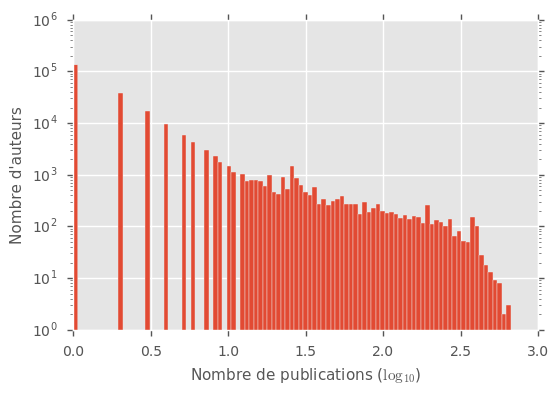

In [10]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.hist([np.log10(len(pubs)) 
          for pubs in pdb.author_pubs.values()],
        100, log=True)
plt.xlabel("Nombre de publications ($\log_{10}$)")
plt.ylabel("Nombre d'auteurs");

Afin de sélectioner les auteurs avec suffisament d'information bibliographique, une limite basse doit être imposé sur le nombre de publications par auteur. Pour inclure tout les professeurs, cette limite est fixée à 3 :

In [11]:
for prof in profs:
    print(prof, len(pdb.author_pubs[prof]))

Christian Delamarche 9
Malika Ainouche 28
Abdelkader Ainouche 22
Rumen Andonov 39
Anne Siegel 67
Yann Le Cunff 3
Vincent Claveau 55
Abdelhak El Amrani 26
Pierre Peterlongo 44
Armel Salmon 21
Thomas Darde 3
Antoine Rolland 39
Emmanuel Giudice 20
Antonio Mucherino 33
Olivier Dameron 44
Annabelle Monnier 16
Fouzia Moussouni 4
Claire Lemaitre 35


Inversement, il est souhaitable de retirer les auteurs qui ont plus de 300 publications : ce sont des noms très communs ou des chefs d'équipes qui publient sur des thématiques peu spécifiques :

In [12]:
print(' '.join('"%s":%d' % (author, len(pubs))
              for author, pubs in pdb.author_pubs.items()
              if len(pubs) >= 300))

"JA. Kadyk":348 "J. Strube":346 "Rk Mommsen":349 "A. Zallo":382 "Fabio Palombo":386 "F. Muheim":459 "BC. Voci":383 "M. Pierini":388 "Shu Wei Ye":376 "J. Stelzer":305 "Mark Watson":337 "William Foulkes":337 "Xianshu Wang":336 "Sung-Hee Kim":562 "Ts Mattison":386 "T. Kurca":315 "Ch De La Vaissiere":369 "Rs Dubitzky":355 "Rf Schwitters":379 "Malathi Krishnamurthy":324 "M. Morii":409 "B. Dahmes":354 "Keehyoung Joo":308 "Michael Steinke":317 "Hamid Band":384 "Je Brau":313 "Gregory Wagner":511 "Melissa Caroline Southey":319 "Mariangela Peruzzi":384 "P. Patteri":384 "BJ. Franek":498 "Andreas Hocker":564 "Sandra Swain":303 "Descales Bernard":313 "G. Cavoto":375 "V. Luth":375 "Per Jonsson":358 "M. Haire":306 "MA. Baak":375 "Hm Lacker":406 "GS. Muanza":379 "Steven Majewski":346 "Jean Pierre Wisniewski":311 "C. Patrignani":411 "John Bevan":313 "Joy Gary":405 "Jm Izen":409 "A. Olivas":351 "Pascal Gay":349 "Ch Yeche":311 "Michel Davier":513 "Hamel De Monchenault":390 "A. Santroni":376 "Klaus Peters

Les sélection des auteurs est réalisée en parcourant la relation `author_pubs` (auteur -> ensemble de publications):

In [13]:
authors = [] # Auteurs sélectionnés
publications = set() # Publications qui ont au moins un auteur sélectionné

for author, pubs in author_pubs.items():
    if 3 <= len(pubs) <= 300:
        authors.append(author)
        publications.update(pubs)

publications = list(publications) # Attribution implicite d'un indice aux publications

Ndocs = len(publications)
Nauthors = len(authors)

## Exportation

Les informations suivantes sont exportées :
* Liste des abstracts en englais (indices des publications)
* Liste des titres (indices des publications)
* Liste des auteurs (indices des auteurs)
* Relation auteurs / publications (matrice creuse booléene: indices des auteurs, indices des publications)
    
Dans un premier temps, les titres et les abstracts sont extraits:

In [14]:
abstracts = []
titles = []
for pub_idx, pub in enumerate(publications):
    assert pub.en_abstract
    abstracts.append(pub.en_abstract)
    
    en_titles = [ref.ref for ref in pub.refs if ref.reftype=='en_title']
    if en_titles:
        titles.append(max(en_titles, key=len))
    else:
        titles.append(None)
    
    pub.idx = pub_idx # Associe un indice a l'objet Publication

La matrice creuse de la relation auteurs / publications est produite de la façon suivante :

In [17]:
from scipy import sparse

Mauthor_pubs = sparse.dok_matrix((Nauthors, Ndocs), dtype=bool)
for author_idx, author in enumerate(authors):
    pub_idxs = [pub.idx for pub in author_pubs[author]]
    Mauthor_pubs[author_idx, pub_idxs] = 1
Mauthor_pubs = Mauthor_pubs.tocsr()

L'exportation est réalisée au format pickle :

In [18]:
import pickle, bz2

pickle.dump(dict(
    titles=titles,
    abstracts=abstracts,
    authors=authors,
    Mauthor_pubs=Mauthor_pubs,
    profs=profs,
    ), bz2.open('publications.pk.bz2', 'wb'))